## Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Requirements

In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=ad1029304362381f9786503557f765487d0a229088625a7320588ca1475b38ed
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


## Import Library

In [3]:
import os
import pickle
import numpy as np
from tqdm import tqdm
from deepface import DeepFace
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

25-01-08 00:01:08 - Directory /root/.deepface has been created
25-01-08 00:01:08 - Directory /root/.deepface/weights has been created


In [4]:
# Path dataset dan hasil ekstraksi
path_test = "/content/drive/MyDrive/S5/STKI/STKI-PROJECT-DROWSINESS/DatasetFinal/test"
path_output = "/content/drive/MyDrive/S5/STKI/STKI-PROJECT-DROWSINESS/DatasetFinal/model"

# Pastikan folder output ada
os.makedirs(path_output, exist_ok=True)

In [5]:
# Inisialisasi model
model_name = "VGG-Face"

# Inisialisasi model terlebih dahulu
DeepFace.build_model(model_name)

# Fungsi untuk ekstraksi fitur menggunakan DeepFace
def ekstraksi_fitur_test(folder_path):
    fitur = []
    label = []
    for kategori in ["Drowsy", "Non Drowsy"]:
        kategori_path = os.path.join(folder_path, kategori)
        for subfolder in os.listdir(kategori_path):
            subfolder_path = os.path.join(kategori_path, subfolder)
            for file in tqdm(os.listdir(subfolder_path), desc=f"Ekstraksi {kategori}/{subfolder}"):
                if file.endswith(".png"):
                    file_path = os.path.join(subfolder_path, file)
                    try:
                        # Ekstraksi fitur
                        embedding = DeepFace.represent(img_path=file_path, model_name=model_name, enforce_detection=False)
                        fitur.append(embedding[0]["embedding"])
                        label.append(kategori)
                        print(f"{file} pada folder {subfolder} dilakukan ekstraksi fitur dengan menggunakan {model_name}.")
                    except Exception as e:
                        print(f"Gagal memproses {file}: {e}")
    return np.array(fitur), np.array(label)

# Ekstraksi fitur dari folder test
print("Memulai ekstraksi fitur dari folder test...")
fitur_test, label_test = ekstraksi_fitur_test(path_test)

# Simpan hasil ekstraksi ke file pickle
output_file_test = os.path.join(path_output, "fitur_test_vggface.pkl")
with open(output_file_test, "wb") as f:
    pickle.dump({"features": fitur_test, "labels": label_test}, f)
print(f"Hasil ekstraksi disimpan di {output_file_test}")

25-01-08 00:03:16 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:08<00:00, 68.1MB/s]


Memulai ekstraksi fitur dari folder test...


Ekstraksi Drowsy/Y:   1%|          | 1/168 [00:01<04:04,  1.46s/it]

Y0011.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   1%|          | 2/168 [00:03<05:04,  1.83s/it]

Y0007.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   2%|▏         | 3/168 [00:04<04:02,  1.47s/it]

Y0004.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   2%|▏         | 4/168 [00:05<03:16,  1.20s/it]

Y0025.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   3%|▎         | 5/168 [00:06<02:49,  1.04s/it]

Y0021.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   4%|▎         | 6/168 [00:06<02:34,  1.05it/s]

Y0040.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   4%|▍         | 7/168 [00:07<02:36,  1.03it/s]

Y0049.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   5%|▍         | 8/168 [00:09<02:42,  1.02s/it]

Y0048.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   5%|▌         | 9/168 [00:10<02:58,  1.12s/it]

Y0070.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   6%|▌         | 10/168 [00:12<03:26,  1.31s/it]

Y0063.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   7%|▋         | 11/168 [00:14<04:02,  1.55s/it]

Y0064.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   7%|▋         | 12/168 [00:16<04:29,  1.73s/it]

Y0084.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   8%|▊         | 13/168 [00:17<04:03,  1.57s/it]

Y0129.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   8%|▊         | 14/168 [00:18<03:51,  1.50s/it]

Y0113.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   9%|▉         | 15/168 [00:20<03:31,  1.38s/it]

Y0127.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  10%|▉         | 16/168 [00:20<03:01,  1.19s/it]

Y0109.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  10%|█         | 17/168 [00:21<02:42,  1.07s/it]

Y0155.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  11%|█         | 18/168 [00:22<02:27,  1.01it/s]

Y0141.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  11%|█▏        | 19/168 [00:23<02:17,  1.08it/s]

Y0154.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  12%|█▏        | 20/168 [00:23<02:10,  1.13it/s]

Y0139.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  12%|█▎        | 21/168 [00:24<02:05,  1.17it/s]

Y0171.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  13%|█▎        | 22/168 [00:25<02:04,  1.17it/s]

Y0162.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  14%|█▎        | 23/168 [00:26<02:01,  1.20it/s]

Y0177.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  14%|█▍        | 24/168 [00:27<01:58,  1.21it/s]

Y0164.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  15%|█▍        | 25/168 [00:27<01:56,  1.23it/s]

Y0183.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  15%|█▌        | 26/168 [00:28<01:53,  1.25it/s]

Y0172.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  16%|█▌        | 27/168 [00:29<01:51,  1.26it/s]

Y0170.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  17%|█▋        | 28/168 [00:30<01:59,  1.17it/s]

Y0180.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  17%|█▋        | 29/168 [00:31<02:16,  1.02it/s]

Y0202.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  18%|█▊        | 30/168 [00:33<02:30,  1.09s/it]

Y0206.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  18%|█▊        | 31/168 [00:34<02:33,  1.12s/it]

Y0198.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  19%|█▉        | 32/168 [00:35<02:41,  1.19s/it]

Y0229.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  20%|█▉        | 33/168 [00:37<03:08,  1.40s/it]

Y0219.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  20%|██        | 34/168 [00:38<02:42,  1.21s/it]

Y0227.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  21%|██        | 35/168 [00:39<02:22,  1.07s/it]

Y0237.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  21%|██▏       | 36/168 [00:39<02:09,  1.02it/s]

Y0269.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  22%|██▏       | 37/168 [00:40<01:59,  1.09it/s]

Y0263.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  23%|██▎       | 38/168 [00:41<01:52,  1.15it/s]

Y0289.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  23%|██▎       | 39/168 [00:42<01:48,  1.19it/s]

Y0298.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  24%|██▍       | 40/168 [00:42<01:45,  1.22it/s]

Y0292.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  24%|██▍       | 41/168 [00:43<01:42,  1.24it/s]

Y0301.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  25%|██▌       | 42/168 [00:44<01:39,  1.27it/s]

Y0288.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  26%|██▌       | 43/168 [00:45<01:37,  1.29it/s]

Y0315.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  26%|██▌       | 44/168 [00:45<01:36,  1.29it/s]

Y0308.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  27%|██▋       | 45/168 [00:46<01:34,  1.30it/s]

Y0348.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  27%|██▋       | 46/168 [00:47<01:41,  1.20it/s]

Y0346.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  28%|██▊       | 47/168 [00:48<01:58,  1.02it/s]

Y0358.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  29%|██▊       | 48/168 [00:50<02:16,  1.14s/it]

Y0375.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  29%|██▉       | 49/168 [00:52<02:43,  1.38s/it]

Y0366.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  30%|██▉       | 50/168 [00:54<02:52,  1.46s/it]

Y0376.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  30%|███       | 51/168 [00:55<02:43,  1.40s/it]

Y0388.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  31%|███       | 52/168 [00:56<02:20,  1.21s/it]

Y0460.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  32%|███▏      | 53/168 [00:56<02:04,  1.08s/it]

Y0435.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  32%|███▏      | 54/168 [00:57<01:51,  1.02it/s]

Y0466.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  33%|███▎      | 55/168 [00:58<01:43,  1.10it/s]

Y0457.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  33%|███▎      | 56/168 [00:59<01:37,  1.14it/s]

Y0462.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  34%|███▍      | 57/168 [00:59<01:33,  1.19it/s]

Y0452.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  35%|███▍      | 58/168 [01:00<01:30,  1.22it/s]

Y0481.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  35%|███▌      | 59/168 [01:01<01:27,  1.25it/s]

Y0483.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  36%|███▌      | 60/168 [01:02<01:25,  1.27it/s]

Y0489.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  36%|███▋      | 61/168 [01:03<01:24,  1.27it/s]

Y0523.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  37%|███▋      | 62/168 [01:03<01:23,  1.27it/s]

Y0502.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  38%|███▊      | 63/168 [01:04<01:22,  1.28it/s]

Y0546.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  38%|███▊      | 64/168 [01:05<01:20,  1.29it/s]

Y0538.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  39%|███▊      | 65/168 [01:06<01:32,  1.11it/s]

Y0525.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  39%|███▉      | 66/168 [01:07<01:43,  1.01s/it]

Y0533.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  40%|███▉      | 67/168 [01:09<01:50,  1.09s/it]

Y0531.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  40%|████      | 68/168 [01:10<01:52,  1.12s/it]

Y0526.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  41%|████      | 69/168 [01:11<01:56,  1.18s/it]

Y0564.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  42%|████▏     | 70/168 [01:12<01:55,  1.17s/it]

Y0557.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  42%|████▏     | 71/168 [01:13<01:42,  1.06s/it]

Y0560.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  43%|████▎     | 72/168 [01:14<01:34,  1.02it/s]

Y0567.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  43%|████▎     | 73/168 [01:15<01:27,  1.09it/s]

Y0565.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  44%|████▍     | 74/168 [01:15<01:21,  1.15it/s]

Y0554.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  45%|████▍     | 75/168 [01:16<01:18,  1.18it/s]

Y0569.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  45%|████▌     | 76/168 [01:17<01:15,  1.22it/s]

Y0591.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  46%|████▌     | 77/168 [01:18<01:13,  1.24it/s]

Y0572.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  46%|████▋     | 78/168 [01:18<01:11,  1.25it/s]

Y0607.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  47%|████▋     | 79/168 [01:19<01:10,  1.26it/s]

Y0613.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  48%|████▊     | 80/168 [01:20<01:09,  1.26it/s]

Y0597.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  48%|████▊     | 81/168 [01:21<01:08,  1.27it/s]

Y0603.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  49%|████▉     | 82/168 [01:22<01:06,  1.28it/s]

Y0638.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  49%|████▉     | 83/168 [01:22<01:07,  1.25it/s]

Y0656.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  50%|█████     | 84/168 [01:24<01:19,  1.06it/s]

Y0655.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  51%|█████     | 85/168 [01:25<01:25,  1.03s/it]

Y0643.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  51%|█████     | 86/168 [01:26<01:31,  1.11s/it]

Y0689.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  52%|█████▏    | 87/168 [01:28<01:34,  1.17s/it]

Y0683.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  52%|█████▏    | 88/168 [01:29<01:33,  1.17s/it]

Y0674.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  53%|█████▎    | 89/168 [01:29<01:22,  1.05s/it]

Y0664.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  54%|█████▎    | 90/168 [01:30<01:15,  1.03it/s]

Y0692.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  54%|█████▍    | 91/168 [01:32<01:21,  1.05s/it]

Y0701.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  55%|█████▍    | 92/168 [01:33<01:25,  1.12s/it]

Y0734.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  55%|█████▌    | 93/168 [01:34<01:27,  1.16s/it]

Y0727.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  56%|█████▌    | 94/168 [01:35<01:29,  1.21s/it]

Y0731.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  57%|█████▋    | 95/168 [01:37<01:28,  1.21s/it]

Y0729.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  57%|█████▋    | 96/168 [01:37<01:17,  1.08s/it]

Y0737.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  58%|█████▊    | 97/168 [01:38<01:09,  1.02it/s]

Y0758.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  58%|█████▊    | 98/168 [01:39<01:05,  1.06it/s]

Y0759.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  59%|█████▉    | 99/168 [01:40<01:11,  1.04s/it]

Y0749.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  60%|█████▉    | 100/168 [01:41<01:14,  1.09s/it]

Y0784.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  60%|██████    | 101/168 [01:43<01:17,  1.16s/it]

Y0786.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  61%|██████    | 102/168 [01:44<01:17,  1.17s/it]

Y0766.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  61%|██████▏   | 103/168 [01:45<01:15,  1.17s/it]

Y0783.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  62%|██████▏   | 104/168 [01:46<01:06,  1.05s/it]

Y0781.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  62%|██████▎   | 105/168 [01:47<01:00,  1.04it/s]

Y0810.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  63%|██████▎   | 106/168 [01:47<00:55,  1.11it/s]

Y0790.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  64%|██████▎   | 107/168 [01:48<00:52,  1.16it/s]

Y0791.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  64%|██████▍   | 108/168 [01:49<00:49,  1.21it/s]

Y0794.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  65%|██████▍   | 109/168 [01:50<00:47,  1.25it/s]

Y0814.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  65%|██████▌   | 110/168 [01:50<00:46,  1.25it/s]

Y0823.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  66%|██████▌   | 111/168 [01:51<00:44,  1.27it/s]

Y0813.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  67%|██████▋   | 112/168 [01:52<00:43,  1.29it/s]

Y0827.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  67%|██████▋   | 113/168 [01:53<00:42,  1.30it/s]

Y0858.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  68%|██████▊   | 114/168 [01:53<00:41,  1.32it/s]

Y0861.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  68%|██████▊   | 115/168 [01:54<00:40,  1.32it/s]

Y0868.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  69%|██████▉   | 116/168 [01:55<00:39,  1.30it/s]

Y0845.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  70%|██████▉   | 117/168 [01:56<00:45,  1.11it/s]

Y0879.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  70%|███████   | 118/168 [01:57<00:49,  1.01it/s]

Y0887.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  71%|███████   | 119/168 [01:59<00:53,  1.08s/it]

Y0870.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  71%|███████▏  | 120/168 [02:00<00:54,  1.14s/it]

Y0886.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  72%|███████▏  | 121/168 [02:01<00:55,  1.19s/it]

Y0918.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  73%|███████▎  | 122/168 [02:02<00:51,  1.11s/it]

Y0906.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  73%|███████▎  | 123/168 [02:03<00:45,  1.01s/it]

Y0945.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  74%|███████▍  | 124/168 [02:04<00:41,  1.07it/s]

Y0948.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  74%|███████▍  | 125/168 [02:04<00:37,  1.13it/s]

Y0940.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  75%|███████▌  | 126/168 [02:05<00:35,  1.18it/s]

Y0964.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  76%|███████▌  | 127/168 [02:06<00:33,  1.23it/s]

Y0957.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  76%|███████▌  | 128/168 [02:07<00:31,  1.25it/s]

Y0975.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  77%|███████▋  | 129/168 [02:08<00:30,  1.28it/s]

Y0992.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  77%|███████▋  | 130/168 [02:08<00:29,  1.29it/s]

Y1013.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  78%|███████▊  | 131/168 [02:09<00:28,  1.30it/s]

Y1010.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  79%|███████▊  | 132/168 [02:10<00:27,  1.31it/s]

Y1014.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  79%|███████▉  | 133/168 [02:11<00:26,  1.32it/s]

Y1003.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  80%|███████▉  | 134/168 [02:11<00:25,  1.32it/s]

Y1027.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  80%|████████  | 135/168 [02:12<00:26,  1.26it/s]

Y1041.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  81%|████████  | 136/168 [02:13<00:29,  1.08it/s]

Y1024.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  82%|████████▏ | 137/168 [02:15<00:31,  1.02s/it]

Y1034.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  82%|████████▏ | 138/168 [02:16<00:32,  1.09s/it]

Y1038.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  83%|████████▎ | 139/168 [02:17<00:32,  1.13s/it]

Y1040.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  83%|████████▎ | 140/168 [02:18<00:32,  1.18s/it]

Y1047.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  84%|████████▍ | 141/168 [02:19<00:28,  1.06s/it]

Y1059.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  85%|████████▍ | 142/168 [02:20<00:25,  1.03it/s]

Y1076.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  85%|████████▌ | 143/168 [02:21<00:22,  1.10it/s]

Y1081.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  86%|████████▌ | 144/168 [02:21<00:20,  1.15it/s]

Y1073.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  86%|████████▋ | 145/168 [02:22<00:19,  1.20it/s]

Y1084.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  87%|████████▋ | 146/168 [02:23<00:17,  1.23it/s]

Y1090.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  88%|████████▊ | 147/168 [02:24<00:16,  1.26it/s]

Y1109.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  88%|████████▊ | 148/168 [02:25<00:15,  1.28it/s]

Y1102.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  89%|████████▊ | 149/168 [02:25<00:14,  1.30it/s]

Y1101.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  89%|████████▉ | 150/168 [02:26<00:13,  1.30it/s]

Y1098.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  90%|████████▉ | 151/168 [02:27<00:13,  1.30it/s]

Y1110.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  90%|█████████ | 152/168 [02:28<00:12,  1.31it/s]

Y1119.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  91%|█████████ | 153/168 [02:28<00:11,  1.31it/s]

Y1123.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  92%|█████████▏| 154/168 [02:29<00:11,  1.19it/s]

Y1139.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  92%|█████████▏| 155/168 [02:31<00:12,  1.04it/s]

Y1151.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  93%|█████████▎| 156/168 [02:32<00:12,  1.06s/it]

Y1162.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  93%|█████████▎| 157/168 [02:33<00:12,  1.11s/it]

Y1168.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  94%|█████████▍| 158/168 [02:34<00:11,  1.18s/it]

Y1177.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  95%|█████████▍| 159/168 [02:35<00:10,  1.12s/it]

Y1182.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  95%|█████████▌| 160/168 [02:36<00:08,  1.01s/it]

Y1203.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  96%|█████████▌| 161/168 [02:37<00:06,  1.07it/s]

Y1211.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  96%|█████████▋| 162/168 [02:38<00:05,  1.14it/s]

Y1196.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  97%|█████████▋| 163/168 [02:38<00:04,  1.18it/s]

Y1214.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  98%|█████████▊| 164/168 [02:39<00:03,  1.22it/s]

Y1217.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  98%|█████████▊| 165/168 [02:40<00:02,  1.25it/s]

Y1232.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  99%|█████████▉| 166/168 [02:41<00:01,  1.26it/s]

Y1228.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  99%|█████████▉| 167/168 [02:42<00:00,  1.27it/s]

Y1239.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y: 100%|██████████| 168/168 [02:42<00:00,  1.03it/s]


Y1242.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   0%|          | 1/263 [00:01<04:38,  1.06s/it]

X0031.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   1%|          | 2/263 [00:02<04:31,  1.04s/it]

X0028.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   1%|          | 3/263 [00:04<07:09,  1.65s/it]

X0018.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   2%|▏         | 4/263 [00:07<08:57,  2.07s/it]

X0038.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   2%|▏         | 5/263 [00:08<07:55,  1.84s/it]

X0068.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   2%|▏         | 6/263 [00:09<07:04,  1.65s/it]

X0072.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   3%|▎         | 7/263 [00:10<05:51,  1.37s/it]

X0062.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   3%|▎         | 8/263 [00:11<05:02,  1.19s/it]

X0084.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   3%|▎         | 9/263 [00:12<04:29,  1.06s/it]

X0067.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   4%|▍         | 10/263 [00:13<04:08,  1.02it/s]

X0076.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   4%|▍         | 11/263 [00:13<03:51,  1.09it/s]

X0080.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   5%|▍         | 12/263 [00:14<03:40,  1.14it/s]

X0089.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   5%|▍         | 13/263 [00:15<03:33,  1.17it/s]

X0103.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   5%|▌         | 14/263 [00:16<03:30,  1.18it/s]

X0090.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   6%|▌         | 15/263 [00:17<03:23,  1.22it/s]

X0128.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   6%|▌         | 16/263 [00:17<03:20,  1.23it/s]

X0112.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   6%|▋         | 17/263 [00:18<03:17,  1.24it/s]

X0131.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   7%|▋         | 18/263 [00:19<03:16,  1.25it/s]

X0152.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   7%|▋         | 19/263 [00:20<03:24,  1.20it/s]

X0178.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   8%|▊         | 20/263 [00:21<03:59,  1.01it/s]

X0177.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   8%|▊         | 21/263 [00:22<04:23,  1.09s/it]

X0181.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   8%|▊         | 22/263 [00:24<04:33,  1.14s/it]

X0185.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   9%|▊         | 23/263 [00:25<04:52,  1.22s/it]

X0208.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   9%|▉         | 24/263 [00:26<04:58,  1.25s/it]

X0226.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  10%|▉         | 25/263 [00:27<04:35,  1.16s/it]

X0235.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  10%|▉         | 26/263 [00:28<04:05,  1.03s/it]

X0244.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  10%|█         | 27/263 [00:29<03:47,  1.04it/s]

X0263.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  11%|█         | 28/263 [00:30<03:35,  1.09it/s]

X0250.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  11%|█         | 29/263 [00:31<03:25,  1.14it/s]

X0260.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  11%|█▏        | 30/263 [00:31<03:17,  1.18it/s]

X0281.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  12%|█▏        | 31/263 [00:32<03:10,  1.22it/s]

X0290.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  12%|█▏        | 32/263 [00:33<03:08,  1.23it/s]

X0284.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  13%|█▎        | 33/263 [00:34<03:06,  1.23it/s]

X0292.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  13%|█▎        | 34/263 [00:34<03:02,  1.26it/s]

X0308.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  13%|█▎        | 35/263 [00:35<03:00,  1.26it/s]

X0305.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  14%|█▎        | 36/263 [00:36<03:00,  1.25it/s]

X0297.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  14%|█▍        | 37/263 [00:37<03:00,  1.25it/s]

X0302.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  14%|█▍        | 38/263 [00:38<03:34,  1.05it/s]

X0343.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  15%|█▍        | 39/263 [00:39<03:53,  1.04s/it]

X0332.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  15%|█▌        | 40/263 [00:41<04:12,  1.13s/it]

X0333.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  16%|█▌        | 41/263 [00:42<04:23,  1.19s/it]

X0330.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  16%|█▌        | 42/263 [00:43<04:27,  1.21s/it]

X0339.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  16%|█▋        | 43/263 [00:44<04:03,  1.11s/it]

X0358.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  17%|█▋        | 44/263 [00:45<03:40,  1.01s/it]

X0361.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  17%|█▋        | 45/263 [00:46<03:25,  1.06it/s]

X0366.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  17%|█▋        | 46/263 [00:47<03:14,  1.11it/s]

X0386.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  18%|█▊        | 47/263 [00:47<03:08,  1.15it/s]

X0372.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  18%|█▊        | 48/263 [00:48<03:01,  1.19it/s]

X0391.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  19%|█▊        | 49/263 [00:49<02:59,  1.19it/s]

X0405.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  19%|█▉        | 50/263 [00:50<03:04,  1.16it/s]

X0402.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  19%|█▉        | 51/263 [00:51<03:30,  1.01it/s]

X0421.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  20%|█▉        | 52/263 [00:52<03:47,  1.08s/it]

X0412.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  20%|██        | 53/263 [00:54<04:05,  1.17s/it]

X0453.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  21%|██        | 54/263 [00:55<04:23,  1.26s/it]

X0444.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  21%|██        | 55/263 [00:57<04:39,  1.34s/it]

X0452.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  21%|██▏       | 56/263 [00:58<04:43,  1.37s/it]

X0479.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  22%|██▏       | 57/263 [01:00<04:45,  1.38s/it]

X0488.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  22%|██▏       | 58/263 [01:01<04:41,  1.38s/it]

X0497.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  22%|██▏       | 59/263 [01:02<04:37,  1.36s/it]

X0491.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  23%|██▎       | 60/263 [01:03<04:14,  1.25s/it]

X0506.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  23%|██▎       | 61/263 [01:04<03:43,  1.11s/it]

X0504.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  24%|██▎       | 62/263 [01:05<03:23,  1.01s/it]

X0509.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  24%|██▍       | 63/263 [01:06<03:08,  1.06it/s]

X0528.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  24%|██▍       | 64/263 [01:07<02:57,  1.12it/s]

X0530.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  25%|██▍       | 65/263 [01:07<02:50,  1.16it/s]

X0529.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  25%|██▌       | 66/263 [01:08<02:44,  1.19it/s]

X0546.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  25%|██▌       | 67/263 [01:09<02:41,  1.21it/s]

X0545.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  26%|██▌       | 68/263 [01:10<02:38,  1.23it/s]

X0549.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  26%|██▌       | 69/263 [01:10<02:37,  1.23it/s]

X0578.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  27%|██▋       | 70/263 [01:11<02:35,  1.24it/s]

X0556.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  27%|██▋       | 71/263 [01:12<02:34,  1.24it/s]

X0571.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  27%|██▋       | 72/263 [01:13<02:33,  1.24it/s]

X0573.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  28%|██▊       | 73/263 [01:14<02:58,  1.06it/s]

X0580.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  28%|██▊       | 74/263 [01:15<03:16,  1.04s/it]

X0557.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  29%|██▊       | 75/263 [01:17<03:33,  1.14s/it]

X0590.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  29%|██▉       | 76/263 [01:18<03:40,  1.18s/it]

X0589.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  29%|██▉       | 77/263 [01:19<03:42,  1.20s/it]

X0625.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  30%|██▉       | 78/263 [01:20<03:18,  1.07s/it]

X0624.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  30%|███       | 79/263 [01:21<03:03,  1.00it/s]

X0629.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  30%|███       | 80/263 [01:22<02:53,  1.05it/s]

X0631.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  31%|███       | 81/263 [01:23<02:45,  1.10it/s]

X0643.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  31%|███       | 82/263 [01:23<02:35,  1.16it/s]

X0671.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  32%|███▏      | 83/263 [01:24<02:31,  1.19it/s]

X0652.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  32%|███▏      | 84/263 [01:25<02:29,  1.20it/s]

X0657.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  32%|███▏      | 85/263 [01:26<02:25,  1.22it/s]

X0690.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  33%|███▎      | 86/263 [01:26<02:24,  1.23it/s]

X0684.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  33%|███▎      | 87/263 [01:27<02:22,  1.24it/s]

X0679.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  33%|███▎      | 88/263 [01:28<02:20,  1.24it/s]

X0696.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  34%|███▍      | 89/263 [01:29<02:19,  1.25it/s]

X0687.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  34%|███▍      | 90/263 [01:30<02:34,  1.12it/s]

X0709.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  35%|███▍      | 91/263 [01:31<02:55,  1.02s/it]

X0702.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  35%|███▍      | 92/263 [01:33<03:10,  1.11s/it]

X0707.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  35%|███▌      | 93/263 [01:34<03:16,  1.15s/it]

X0733.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  36%|███▌      | 94/263 [01:35<03:29,  1.24s/it]

X0790.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  36%|███▌      | 95/263 [01:36<03:11,  1.14s/it]

X0775.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  37%|███▋      | 96/263 [01:37<02:52,  1.04s/it]

X0776.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  37%|███▋      | 97/263 [01:38<02:38,  1.05it/s]

X0812.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  37%|███▋      | 98/263 [01:39<02:29,  1.10it/s]

X0816.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  38%|███▊      | 99/263 [01:39<02:23,  1.14it/s]

X0809.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  38%|███▊      | 100/263 [01:40<02:19,  1.17it/s]

X0819.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  38%|███▊      | 101/263 [01:41<02:15,  1.20it/s]

X0802.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  39%|███▉      | 102/263 [01:42<02:12,  1.21it/s]

X0841.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  39%|███▉      | 103/263 [01:43<02:11,  1.22it/s]

X0825.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  40%|███▉      | 104/263 [01:43<02:10,  1.22it/s]

X0826.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  40%|███▉      | 105/263 [01:44<02:08,  1.23it/s]

X0845.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  40%|████      | 106/263 [01:45<02:06,  1.24it/s]

X0839.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  41%|████      | 107/263 [01:46<02:08,  1.21it/s]

X0866.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  41%|████      | 108/263 [01:47<02:33,  1.01it/s]

X0864.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  41%|████▏     | 109/263 [01:49<02:47,  1.09s/it]

X0868.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  42%|████▏     | 110/263 [01:50<02:57,  1.16s/it]

X0859.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  42%|████▏     | 111/263 [01:51<03:09,  1.25s/it]

X0854.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  43%|████▎     | 112/263 [01:52<02:56,  1.17s/it]

X0878.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  43%|████▎     | 113/263 [01:53<02:39,  1.06s/it]

X0874.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  43%|████▎     | 114/263 [01:54<02:26,  1.02it/s]

X0884.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  44%|████▎     | 115/263 [01:55<02:15,  1.09it/s]

X0888.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  44%|████▍     | 116/263 [01:55<02:09,  1.14it/s]

X0881.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  44%|████▍     | 117/263 [01:56<02:05,  1.17it/s]

X0875.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  45%|████▍     | 118/263 [01:57<02:01,  1.19it/s]

X0938.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  45%|████▌     | 119/263 [01:58<01:58,  1.21it/s]

X0929.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  46%|████▌     | 120/263 [01:59<01:56,  1.23it/s]

X0918.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  46%|████▌     | 121/263 [01:59<01:54,  1.24it/s]

X0932.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  46%|████▋     | 122/263 [02:00<01:55,  1.22it/s]

X0940.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  47%|████▋     | 123/263 [02:01<01:53,  1.23it/s]

X0958.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  47%|████▋     | 124/263 [02:02<01:55,  1.21it/s]

X0949.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  48%|████▊     | 125/263 [02:03<02:13,  1.03it/s]

X0950.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  48%|████▊     | 126/263 [02:05<02:27,  1.08s/it]

X0960.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  48%|████▊     | 127/263 [02:06<02:36,  1.15s/it]

X0962.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  49%|████▊     | 128/263 [02:07<02:45,  1.22s/it]

X0948.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  49%|████▉     | 129/263 [02:08<02:36,  1.17s/it]

X0982.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  49%|████▉     | 130/263 [02:09<02:23,  1.08s/it]

X0976.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  50%|████▉     | 131/263 [02:10<02:11,  1.01it/s]

X0978.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  50%|█████     | 132/263 [02:11<02:02,  1.07it/s]

X0970.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  51%|█████     | 133/263 [02:12<01:56,  1.12it/s]

X0977.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  51%|█████     | 134/263 [02:12<01:52,  1.15it/s]

X0966.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  51%|█████▏    | 135/263 [02:13<01:49,  1.17it/s]

X1009.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  52%|█████▏    | 136/263 [02:14<01:46,  1.19it/s]

X1023.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  52%|█████▏    | 137/263 [02:15<01:43,  1.22it/s]

X1029.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  52%|█████▏    | 138/263 [02:16<01:41,  1.24it/s]

X1028.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  53%|█████▎    | 139/263 [02:16<01:40,  1.24it/s]

X1017.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  53%|█████▎    | 140/263 [02:17<01:37,  1.26it/s]

X1044.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  54%|█████▎    | 141/263 [02:18<01:35,  1.27it/s]

X1038.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  54%|█████▍    | 142/263 [02:19<01:52,  1.07it/s]

X1054.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  54%|█████▍    | 143/263 [02:21<02:05,  1.05s/it]

X1049.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  55%|█████▍    | 144/263 [02:22<02:13,  1.12s/it]

X1035.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  55%|█████▌    | 145/263 [02:23<02:21,  1.20s/it]

X1042.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  56%|█████▌    | 146/263 [02:24<02:18,  1.18s/it]

X1041.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  56%|█████▌    | 147/263 [02:25<02:03,  1.06s/it]

X1059.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  56%|█████▋    | 148/263 [02:26<01:53,  1.02it/s]

X1058.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  57%|█████▋    | 149/263 [02:27<01:46,  1.07it/s]

X1069.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  57%|█████▋    | 150/263 [02:27<01:39,  1.13it/s]

X1083.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  57%|█████▋    | 151/263 [02:28<01:36,  1.16it/s]

X1086.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  58%|█████▊    | 152/263 [02:29<01:33,  1.19it/s]

X1120.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  58%|█████▊    | 153/263 [02:30<01:32,  1.18it/s]

X1123.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  59%|█████▊    | 154/263 [02:31<01:30,  1.20it/s]

X1128.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  59%|█████▉    | 155/263 [02:32<01:28,  1.22it/s]

X1146.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  59%|█████▉    | 156/263 [02:32<01:26,  1.23it/s]

X1130.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  60%|█████▉    | 157/263 [02:33<01:25,  1.25it/s]

X1133.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  60%|██████    | 158/263 [02:34<01:23,  1.26it/s]

X1141.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  60%|██████    | 159/263 [02:35<01:32,  1.13it/s]

X1144.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  61%|██████    | 160/263 [02:36<01:45,  1.02s/it]

X1166.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  61%|██████    | 161/263 [02:38<01:54,  1.13s/it]

X1171.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  62%|██████▏   | 162/263 [02:39<02:00,  1.19s/it]

X1182.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  62%|██████▏   | 163/263 [02:40<01:57,  1.17s/it]

X1174.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  62%|██████▏   | 164/263 [02:41<01:44,  1.06s/it]

X1179.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  63%|██████▎   | 165/263 [02:42<01:36,  1.02it/s]

X1211.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  63%|██████▎   | 166/263 [02:43<01:30,  1.08it/s]

X1199.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  63%|██████▎   | 167/263 [02:43<01:24,  1.13it/s]

X1205.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  64%|██████▍   | 168/263 [02:44<01:21,  1.16it/s]

X1202.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  64%|██████▍   | 169/263 [02:45<01:19,  1.18it/s]

X1228.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  65%|██████▍   | 170/263 [02:46<01:17,  1.20it/s]

X1244.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  65%|██████▌   | 171/263 [02:47<01:15,  1.23it/s]

X1226.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  65%|██████▌   | 172/263 [02:47<01:13,  1.24it/s]

X1232.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  66%|██████▌   | 173/263 [02:48<01:12,  1.25it/s]

X1257.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  66%|██████▌   | 174/263 [02:49<01:11,  1.25it/s]

X1269.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  67%|██████▋   | 175/263 [02:50<01:09,  1.26it/s]

X1285.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  67%|██████▋   | 176/263 [02:51<01:18,  1.11it/s]

X1284.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  67%|██████▋   | 177/263 [02:52<01:26,  1.00s/it]

X1274.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  68%|██████▊   | 178/263 [02:53<01:33,  1.10s/it]

X1288.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  68%|██████▊   | 179/263 [02:55<01:37,  1.16s/it]

X1278.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  68%|██████▊   | 180/263 [02:56<01:40,  1.20s/it]

X1290.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  69%|██████▉   | 181/263 [02:57<01:42,  1.25s/it]

X1302.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  69%|██████▉   | 182/263 [02:59<01:43,  1.27s/it]

X1333.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  70%|██████▉   | 183/263 [03:00<01:42,  1.28s/it]

X1329.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  70%|██████▉   | 184/263 [03:01<01:42,  1.30s/it]

X1316.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  70%|███████   | 185/263 [03:02<01:36,  1.23s/it]

X1349.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  71%|███████   | 186/263 [03:03<01:24,  1.10s/it]

X1347.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  71%|███████   | 187/263 [03:04<01:16,  1.01s/it]

X1346.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  71%|███████▏  | 188/263 [03:05<01:11,  1.05it/s]

X1370.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  72%|███████▏  | 189/263 [03:06<01:06,  1.11it/s]

X1378.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  72%|███████▏  | 190/263 [03:07<01:10,  1.04it/s]

X1367.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  73%|███████▎  | 191/263 [03:08<01:17,  1.08s/it]

X1365.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  73%|███████▎  | 192/263 [03:09<01:22,  1.16s/it]

X1364.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  73%|███████▎  | 193/263 [03:11<01:24,  1.20s/it]

X1366.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  74%|███████▍  | 194/263 [03:12<01:28,  1.28s/it]

X1377.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  74%|███████▍  | 195/263 [03:13<01:17,  1.14s/it]

X1407.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  75%|███████▍  | 196/263 [03:14<01:09,  1.04s/it]

X1385.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  75%|███████▍  | 197/263 [03:15<01:04,  1.03it/s]

X1392.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  75%|███████▌  | 198/263 [03:15<00:59,  1.09it/s]

X1387.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  76%|███████▌  | 199/263 [03:16<00:56,  1.13it/s]

X1420.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  76%|███████▌  | 200/263 [03:17<00:53,  1.17it/s]

X1423.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  76%|███████▋  | 201/263 [03:18<00:52,  1.19it/s]

X1408.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  77%|███████▋  | 202/263 [03:19<00:50,  1.22it/s]

X1436.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  77%|███████▋  | 203/263 [03:19<00:48,  1.23it/s]

X1454.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  78%|███████▊  | 204/263 [03:20<00:47,  1.24it/s]

X1444.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  78%|███████▊  | 205/263 [03:21<00:46,  1.24it/s]

X1434.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  78%|███████▊  | 206/263 [03:22<00:45,  1.25it/s]

X1431.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  79%|███████▊  | 207/263 [03:23<00:46,  1.21it/s]

X1445.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  79%|███████▉  | 208/263 [03:24<00:52,  1.05it/s]

X1439.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  79%|███████▉  | 209/263 [03:25<00:56,  1.05s/it]

X1478.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  80%|███████▉  | 210/263 [03:26<01:00,  1.14s/it]

X1477.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  80%|████████  | 211/263 [03:28<01:02,  1.20s/it]

X1470.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  81%|████████  | 212/263 [03:29<00:58,  1.14s/it]

X1459.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  81%|████████  | 213/263 [03:30<00:51,  1.04s/it]

X1476.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  81%|████████▏ | 214/263 [03:30<00:47,  1.02it/s]

X1483.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  82%|████████▏ | 215/263 [03:31<00:44,  1.09it/s]

X1487.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  82%|████████▏ | 216/263 [03:32<00:41,  1.14it/s]

X1510.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  83%|████████▎ | 217/263 [03:33<00:39,  1.18it/s]

X1539.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  83%|████████▎ | 218/263 [03:34<00:37,  1.20it/s]

X1535.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  83%|████████▎ | 219/263 [03:34<00:36,  1.22it/s]

X1550.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  84%|████████▎ | 220/263 [03:35<00:34,  1.23it/s]

X1547.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  84%|████████▍ | 221/263 [03:36<00:33,  1.24it/s]

X1528.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  84%|████████▍ | 222/263 [03:37<00:33,  1.24it/s]

X1533.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  85%|████████▍ | 223/263 [03:38<00:32,  1.24it/s]

X1530.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  85%|████████▌ | 224/263 [03:38<00:30,  1.26it/s]

X1573.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  86%|████████▌ | 225/263 [03:40<00:34,  1.09it/s]

X1553.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  86%|████████▌ | 226/263 [03:41<00:36,  1.00it/s]

X1552.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  86%|████████▋ | 227/263 [03:42<00:39,  1.08s/it]

X1565.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  87%|████████▋ | 228/263 [03:43<00:40,  1.15s/it]

X1570.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  87%|████████▋ | 229/263 [03:45<00:39,  1.16s/it]

X1576.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  87%|████████▋ | 230/263 [03:45<00:34,  1.05s/it]

X1587.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  88%|████████▊ | 231/263 [03:46<00:31,  1.03it/s]

X1614.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  88%|████████▊ | 232/263 [03:47<00:28,  1.08it/s]

X1611.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  89%|████████▊ | 233/263 [03:48<00:26,  1.14it/s]

X1613.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  89%|████████▉ | 234/263 [03:49<00:24,  1.16it/s]

X1626.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  89%|████████▉ | 235/263 [03:49<00:23,  1.19it/s]

X1623.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  90%|████████▉ | 236/263 [03:50<00:22,  1.20it/s]

X1643.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  90%|█████████ | 237/263 [03:51<00:21,  1.22it/s]

X1633.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  90%|█████████ | 238/263 [03:52<00:20,  1.23it/s]

X1642.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  91%|█████████ | 239/263 [03:53<00:19,  1.25it/s]

X1666.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  91%|█████████▏| 240/263 [03:53<00:18,  1.25it/s]

X1649.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  92%|█████████▏| 241/263 [03:54<00:17,  1.25it/s]

X1654.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  92%|█████████▏| 242/263 [03:55<00:18,  1.13it/s]

X1664.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  92%|█████████▏| 243/263 [03:57<00:20,  1.02s/it]

X1657.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  93%|█████████▎| 244/263 [03:58<00:21,  1.12s/it]

X1678.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  93%|█████████▎| 245/263 [03:59<00:20,  1.16s/it]

X1680.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  94%|█████████▎| 246/263 [04:01<00:21,  1.25s/it]

X1677.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  94%|█████████▍| 247/263 [04:01<00:18,  1.14s/it]

X1684.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  94%|█████████▍| 248/263 [04:02<00:15,  1.04s/it]

X1689.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  95%|█████████▍| 249/263 [04:03<00:13,  1.03it/s]

X1669.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  95%|█████████▌| 250/263 [04:04<00:11,  1.09it/s]

X1695.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  95%|█████████▌| 251/263 [04:05<00:10,  1.14it/s]

X1708.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  96%|█████████▌| 252/263 [04:05<00:09,  1.17it/s]

X1704.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  96%|█████████▌| 253/263 [04:06<00:08,  1.19it/s]

X1703.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  97%|█████████▋| 254/263 [04:07<00:07,  1.20it/s]

X1739.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  97%|█████████▋| 255/263 [04:08<00:06,  1.22it/s]

X1735.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  97%|█████████▋| 256/263 [04:09<00:05,  1.23it/s]

X1732.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  98%|█████████▊| 257/263 [04:09<00:04,  1.23it/s]

X1726.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  98%|█████████▊| 258/263 [04:10<00:04,  1.23it/s]

X1727.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  98%|█████████▊| 259/263 [04:11<00:03,  1.20it/s]

X1723.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  99%|█████████▉| 260/263 [04:12<00:02,  1.03it/s]

X1729.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  99%|█████████▉| 261/263 [04:14<00:02,  1.06s/it]

X1716.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X: 100%|█████████▉| 262/263 [04:15<00:01,  1.12s/it]

X1746.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X: 100%|██████████| 263/263 [04:16<00:00,  1.02it/s]


X1741.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   1%|          | 1/175 [00:01<03:19,  1.15s/it]

W0013.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   1%|          | 2/175 [00:03<04:48,  1.67s/it]

W0004.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   2%|▏         | 3/175 [00:03<03:39,  1.28s/it]

W0037.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   2%|▏         | 4/175 [00:04<03:06,  1.09s/it]

W0036.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   3%|▎         | 5/175 [00:05<02:46,  1.02it/s]

W0033.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   3%|▎         | 6/175 [00:06<02:35,  1.09it/s]

W0032.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   4%|▍         | 7/175 [00:07<02:26,  1.15it/s]

W0044.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   5%|▍         | 8/175 [00:07<02:21,  1.18it/s]

W0060.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   5%|▌         | 9/175 [00:08<02:15,  1.22it/s]

W0062.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   6%|▌         | 10/175 [00:09<02:13,  1.24it/s]

W0070.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   6%|▋         | 11/175 [00:10<02:11,  1.25it/s]

W0079.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   7%|▋         | 12/175 [00:11<02:30,  1.09it/s]

W0105.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   7%|▋         | 13/175 [00:12<02:45,  1.02s/it]

W0112.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   8%|▊         | 14/175 [00:14<02:59,  1.11s/it]

W0095.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   9%|▊         | 15/175 [00:15<03:04,  1.15s/it]

W0109.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   9%|▉         | 16/175 [00:16<03:12,  1.21s/it]

W0092.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  10%|▉         | 17/175 [00:17<03:09,  1.20s/it]

W0124.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  10%|█         | 18/175 [00:18<02:49,  1.08s/it]

W0120.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  11%|█         | 19/175 [00:19<02:35,  1.00it/s]

W0131.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  11%|█▏        | 20/175 [00:20<02:25,  1.07it/s]

W0117.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  12%|█▏        | 21/175 [00:20<02:16,  1.12it/s]

W0146.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  13%|█▎        | 22/175 [00:21<02:11,  1.17it/s]

W0155.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  13%|█▎        | 23/175 [00:22<02:07,  1.19it/s]

W0168.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  14%|█▎        | 24/175 [00:23<02:05,  1.21it/s]

W0169.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  14%|█▍        | 25/175 [00:24<02:02,  1.23it/s]

W0196.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  15%|█▍        | 26/175 [00:24<02:00,  1.24it/s]

W0193.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  15%|█▌        | 27/175 [00:25<01:58,  1.25it/s]

W0210.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  16%|█▌        | 28/175 [00:26<01:57,  1.25it/s]

W0197.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  17%|█▋        | 29/175 [00:27<01:56,  1.26it/s]

W0209.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  17%|█▋        | 30/175 [00:28<02:02,  1.18it/s]

W0216.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  18%|█▊        | 31/175 [00:29<02:24,  1.00s/it]

W0235.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  18%|█▊        | 32/175 [00:30<02:35,  1.09s/it]

W0223.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  19%|█▉        | 33/175 [00:32<02:43,  1.15s/it]

W0231.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  19%|█▉        | 34/175 [00:33<02:50,  1.21s/it]

W0245.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  20%|██        | 35/175 [00:34<02:44,  1.17s/it]

W0263.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  21%|██        | 36/175 [00:35<02:26,  1.05s/it]

W0250.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  21%|██        | 37/175 [00:36<02:14,  1.03it/s]

W0252.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  22%|██▏       | 38/175 [00:36<02:05,  1.09it/s]

W0268.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  22%|██▏       | 39/175 [00:37<01:58,  1.15it/s]

W0279.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  23%|██▎       | 40/175 [00:38<01:54,  1.18it/s]

W0271.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  23%|██▎       | 41/175 [00:39<01:50,  1.22it/s]

W0280.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  24%|██▍       | 42/175 [00:40<01:48,  1.22it/s]

W0288.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  25%|██▍       | 43/175 [00:40<01:46,  1.24it/s]

W0310.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  25%|██▌       | 44/175 [00:41<01:45,  1.25it/s]

W0308.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  26%|██▌       | 45/175 [00:42<01:44,  1.24it/s]

W0311.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  26%|██▋       | 46/175 [00:43<01:44,  1.24it/s]

W0326.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  27%|██▋       | 47/175 [00:44<01:50,  1.15it/s]

W0318.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  27%|██▋       | 48/175 [00:45<02:11,  1.04s/it]

W0342.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  28%|██▊       | 49/175 [00:47<02:28,  1.18s/it]

W0352.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  29%|██▊       | 50/175 [00:48<02:38,  1.27s/it]

W0341.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  29%|██▉       | 51/175 [00:50<02:42,  1.31s/it]

W0356.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  30%|██▉       | 52/175 [00:51<02:44,  1.34s/it]

W0355.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  30%|███       | 53/175 [00:53<02:48,  1.38s/it]

W0348.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  31%|███       | 54/175 [00:54<02:46,  1.38s/it]

W0344.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  31%|███▏      | 55/175 [00:55<02:35,  1.29s/it]

W0347.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  32%|███▏      | 56/175 [00:56<02:16,  1.15s/it]

W0379.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  33%|███▎      | 57/175 [00:57<02:02,  1.04s/it]

W0370.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  33%|███▎      | 58/175 [00:57<01:51,  1.05it/s]

W0403.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  34%|███▎      | 59/175 [00:58<01:45,  1.10it/s]

W0390.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  34%|███▍      | 60/175 [00:59<01:40,  1.15it/s]

W0392.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  35%|███▍      | 61/175 [01:00<01:35,  1.19it/s]

W0396.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  35%|███▌      | 62/175 [01:00<01:32,  1.22it/s]

W0397.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  36%|███▌      | 63/175 [01:01<01:31,  1.23it/s]

W0424.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  37%|███▋      | 64/175 [01:02<01:30,  1.23it/s]

W0423.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  37%|███▋      | 65/175 [01:03<01:28,  1.24it/s]

W0412.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  38%|███▊      | 66/175 [01:04<01:27,  1.24it/s]

W0411.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  38%|███▊      | 67/175 [01:04<01:26,  1.25it/s]

W0445.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  39%|███▉      | 68/175 [01:06<01:35,  1.12it/s]

W0447.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  39%|███▉      | 69/175 [01:07<01:47,  1.01s/it]

W0438.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  40%|████      | 70/175 [01:08<01:56,  1.11s/it]

W0434.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  41%|████      | 71/175 [01:10<02:02,  1.17s/it]

W0473.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  41%|████      | 72/175 [01:11<02:06,  1.23s/it]

W0471.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  42%|████▏     | 73/175 [01:12<01:58,  1.17s/it]

W0465.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  42%|████▏     | 74/175 [01:13<01:46,  1.06s/it]

W0462.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  43%|████▎     | 75/175 [01:14<01:37,  1.02it/s]

W0490.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  43%|████▎     | 76/175 [01:14<01:32,  1.07it/s]

W0509.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  44%|████▍     | 77/175 [01:15<01:27,  1.12it/s]

W0510.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  45%|████▍     | 78/175 [01:16<01:23,  1.16it/s]

W0538.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  45%|████▌     | 79/175 [01:17<01:20,  1.20it/s]

W0549.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  46%|████▌     | 80/175 [01:17<01:18,  1.22it/s]

W0548.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  46%|████▋     | 81/175 [01:18<01:16,  1.23it/s]

W0577.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  47%|████▋     | 82/175 [01:19<01:14,  1.24it/s]

W0572.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  47%|████▋     | 83/175 [01:20<01:13,  1.25it/s]

W0567.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  48%|████▊     | 84/175 [01:21<01:12,  1.26it/s]

W0579.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  49%|████▊     | 85/175 [01:21<01:11,  1.27it/s]

W0582.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  49%|████▉     | 86/175 [01:23<01:21,  1.09it/s]

W0584.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  50%|████▉     | 87/175 [01:24<01:31,  1.03s/it]

W0586.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  50%|█████     | 88/175 [01:25<01:39,  1.14s/it]

W0623.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  51%|█████     | 89/175 [01:27<01:42,  1.19s/it]

W0607.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  51%|█████▏    | 90/175 [01:28<01:37,  1.15s/it]

W0624.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  52%|█████▏    | 91/175 [01:29<01:28,  1.05s/it]

W0601.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  53%|█████▎    | 92/175 [01:29<01:20,  1.03it/s]

W0641.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  53%|█████▎    | 93/175 [01:30<01:15,  1.09it/s]

W0637.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  54%|█████▎    | 94/175 [01:31<01:11,  1.13it/s]

W0655.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  54%|█████▍    | 95/175 [01:32<01:08,  1.16it/s]

W0664.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  55%|█████▍    | 96/175 [01:32<01:06,  1.19it/s]

W0650.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  55%|█████▌    | 97/175 [01:33<01:05,  1.19it/s]

W0684.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  56%|█████▌    | 98/175 [01:34<01:03,  1.21it/s]

W0685.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  57%|█████▋    | 99/175 [01:35<01:02,  1.22it/s]

W0689.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  57%|█████▋    | 100/175 [01:36<01:00,  1.23it/s]

W0694.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  58%|█████▊    | 101/175 [01:37<00:59,  1.24it/s]

W0707.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  58%|█████▊    | 102/175 [01:37<00:59,  1.23it/s]

W0710.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  59%|█████▉    | 103/175 [01:39<01:09,  1.04it/s]

W0722.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  59%|█████▉    | 104/175 [01:40<01:13,  1.04s/it]

W0699.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  60%|██████    | 105/175 [01:41<01:18,  1.13s/it]

W0750.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  61%|██████    | 106/175 [01:42<01:20,  1.17s/it]

W0737.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  61%|██████    | 107/175 [01:44<01:17,  1.14s/it]

W0739.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  62%|██████▏   | 108/175 [01:44<01:10,  1.05s/it]

W0734.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  62%|██████▏   | 109/175 [01:45<01:03,  1.04it/s]

W0735.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  63%|██████▎   | 110/175 [01:46<00:58,  1.11it/s]

W0771.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  63%|██████▎   | 111/175 [01:47<00:55,  1.15it/s]

W0772.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  64%|██████▍   | 112/175 [01:47<00:53,  1.18it/s]

W0768.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  65%|██████▍   | 113/175 [01:48<00:51,  1.21it/s]

W0774.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  65%|██████▌   | 114/175 [01:49<00:49,  1.23it/s]

W0780.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  66%|██████▌   | 115/175 [01:50<00:47,  1.25it/s]

W0802.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  66%|██████▋   | 116/175 [01:51<00:47,  1.25it/s]

W0823.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  67%|██████▋   | 117/175 [01:51<00:46,  1.26it/s]

W0820.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  67%|██████▋   | 118/175 [01:52<00:45,  1.25it/s]

W0824.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  68%|██████▊   | 119/175 [01:53<00:44,  1.27it/s]

W0816.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  69%|██████▊   | 120/175 [01:54<00:49,  1.10it/s]

W0819.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  69%|██████▉   | 121/175 [01:55<00:55,  1.03s/it]

W0831.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  70%|██████▉   | 122/175 [01:57<00:59,  1.13s/it]

W0827.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  70%|███████   | 123/175 [01:58<01:01,  1.17s/it]

W0829.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  71%|███████   | 124/175 [02:00<01:03,  1.25s/it]

W0845.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  71%|███████▏  | 125/175 [02:00<00:55,  1.12s/it]

W0858.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  72%|███████▏  | 126/175 [02:01<00:49,  1.02s/it]

W0872.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  73%|███████▎  | 127/175 [02:02<00:45,  1.05it/s]

W0860.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  73%|███████▎  | 128/175 [02:03<00:42,  1.10it/s]

W0866.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  74%|███████▎  | 129/175 [02:04<00:40,  1.14it/s]

W0889.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  74%|███████▍  | 130/175 [02:04<00:38,  1.17it/s]

W0916.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  75%|███████▍  | 131/175 [02:05<00:36,  1.19it/s]

W0919.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  75%|███████▌  | 132/175 [02:06<00:35,  1.20it/s]

W0922.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  76%|███████▌  | 133/175 [02:07<00:34,  1.21it/s]

W0940.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  77%|███████▋  | 134/175 [02:08<00:33,  1.22it/s]

W0934.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  77%|███████▋  | 135/175 [02:08<00:32,  1.23it/s]

W0933.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  78%|███████▊  | 136/175 [02:09<00:31,  1.24it/s]

W0950.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  78%|███████▊  | 137/175 [02:10<00:33,  1.15it/s]

W0968.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  79%|███████▉  | 138/175 [02:12<00:37,  1.02s/it]

W0954.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  79%|███████▉  | 139/175 [02:13<00:40,  1.12s/it]

W0997.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  80%|████████  | 140/175 [02:14<00:41,  1.18s/it]

W1000.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  81%|████████  | 141/175 [02:16<00:42,  1.25s/it]

W0992.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  81%|████████  | 142/175 [02:17<00:37,  1.14s/it]

W1017.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  82%|████████▏ | 143/175 [02:17<00:33,  1.03s/it]

W1022.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  82%|████████▏ | 144/175 [02:18<00:29,  1.04it/s]

W1020.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  83%|████████▎ | 145/175 [02:19<00:27,  1.10it/s]

W1016.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  83%|████████▎ | 146/175 [02:20<00:25,  1.14it/s]

W1004.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  84%|████████▍ | 147/175 [02:21<00:23,  1.17it/s]

W1021.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  85%|████████▍ | 148/175 [02:21<00:22,  1.20it/s]

W1001.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  85%|████████▌ | 149/175 [02:22<00:21,  1.21it/s]

W1009.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  86%|████████▌ | 150/175 [02:23<00:20,  1.24it/s]

W1015.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  86%|████████▋ | 151/175 [02:24<00:19,  1.24it/s]

W1047.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  87%|████████▋ | 152/175 [02:25<00:18,  1.24it/s]

W1029.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  87%|████████▋ | 153/175 [02:25<00:17,  1.24it/s]

W1037.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  88%|████████▊ | 154/175 [02:26<00:17,  1.21it/s]

W1056.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  89%|████████▊ | 155/175 [02:28<00:19,  1.03it/s]

W1054.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  89%|████████▉ | 156/175 [02:29<00:20,  1.07s/it]

W1057.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  90%|████████▉ | 157/175 [02:30<00:20,  1.15s/it]

W1081.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  90%|█████████ | 158/175 [02:31<00:20,  1.21s/it]

W1119.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  91%|█████████ | 159/175 [02:33<00:18,  1.18s/it]

W1109.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  91%|█████████▏| 160/175 [02:33<00:16,  1.08s/it]

W1100.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  92%|█████████▏| 161/175 [02:34<00:14,  1.00s/it]

W1099.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  93%|█████████▎| 162/175 [02:35<00:12,  1.05it/s]

W1139.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  93%|█████████▎| 163/175 [02:36<00:10,  1.10it/s]

W1141.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  94%|█████████▎| 164/175 [02:37<00:09,  1.13it/s]

W1127.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  94%|█████████▍| 165/175 [02:38<00:08,  1.17it/s]

W1137.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  95%|█████████▍| 166/175 [02:38<00:07,  1.19it/s]

W1120.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  95%|█████████▌| 167/175 [02:39<00:06,  1.21it/s]

W1161.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  96%|█████████▌| 168/175 [02:40<00:05,  1.23it/s]

W1147.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  97%|█████████▋| 169/175 [02:41<00:04,  1.22it/s]

W1183.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  97%|█████████▋| 170/175 [02:42<00:04,  1.23it/s]

W1170.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  98%|█████████▊| 171/175 [02:42<00:03,  1.22it/s]

W1191.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  98%|█████████▊| 172/175 [02:44<00:02,  1.04it/s]

W1182.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  99%|█████████▉| 173/175 [02:45<00:02,  1.06s/it]

W1171.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  99%|█████████▉| 174/175 [02:46<00:01,  1.17s/it]

W1202.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W: 100%|██████████| 175/175 [02:48<00:00,  1.04it/s]


W1200.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   1%|          | 1/99 [00:01<02:47,  1.71s/it]

V0006.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   2%|▏         | 2/99 [00:03<02:33,  1.59s/it]

V0004.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   3%|▎         | 3/99 [00:04<02:29,  1.56s/it]

V0017.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   4%|▍         | 4/99 [00:06<02:18,  1.46s/it]

V0022.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   5%|▌         | 5/99 [00:07<02:05,  1.34s/it]

V0027.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   6%|▌         | 6/99 [00:08<01:55,  1.24s/it]

V0024.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   7%|▋         | 7/99 [00:09<01:48,  1.18s/it]

V0030.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   8%|▊         | 8/99 [00:10<01:46,  1.17s/it]

V0049.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   9%|▉         | 9/99 [00:11<01:45,  1.17s/it]

V0041.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  10%|█         | 10/99 [00:13<01:55,  1.30s/it]

V0055.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  11%|█         | 11/99 [00:14<02:01,  1.38s/it]

V0046.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  12%|█▏        | 12/99 [00:16<02:08,  1.48s/it]

V0040.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  13%|█▎        | 13/99 [00:17<01:55,  1.34s/it]

V0079.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  14%|█▍        | 14/99 [00:18<01:49,  1.28s/it]

V0086.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  15%|█▌        | 15/99 [00:19<01:40,  1.19s/it]

V0074.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  16%|█▌        | 16/99 [00:20<01:34,  1.14s/it]

V0070.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  17%|█▋        | 17/99 [00:21<01:33,  1.14s/it]

V0078.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  18%|█▊        | 18/99 [00:22<01:31,  1.13s/it]

V0108.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  19%|█▉        | 19/99 [00:23<01:28,  1.10s/it]

V0100.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  20%|██        | 20/99 [00:25<01:27,  1.11s/it]

V0096.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  21%|██        | 21/99 [00:26<01:25,  1.09s/it]

V0123.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  22%|██▏       | 22/99 [00:27<01:27,  1.13s/it]

V0121.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  23%|██▎       | 23/99 [00:29<01:42,  1.34s/it]

V0129.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  24%|██▍       | 24/99 [00:31<01:55,  1.54s/it]

V0141.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  25%|██▌       | 25/99 [00:32<01:59,  1.62s/it]

V0146.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  26%|██▋       | 26/99 [00:34<01:52,  1.55s/it]

V0147.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  27%|██▋       | 27/99 [00:35<01:46,  1.48s/it]

V0151.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  28%|██▊       | 28/99 [00:36<01:42,  1.44s/it]

V0165.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  29%|██▉       | 29/99 [00:38<01:45,  1.50s/it]

V0182.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  30%|███       | 30/99 [00:39<01:39,  1.45s/it]

V0176.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  31%|███▏      | 31/99 [00:41<01:31,  1.34s/it]

V0172.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  32%|███▏      | 32/99 [00:42<01:23,  1.24s/it]

V0181.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  33%|███▎      | 33/99 [00:43<01:18,  1.19s/it]

V0204.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  34%|███▍      | 34/99 [00:44<01:26,  1.33s/it]

V0213.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  35%|███▌      | 35/99 [00:46<01:31,  1.43s/it]

V0229.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  36%|███▋      | 36/99 [00:47<01:31,  1.46s/it]

V0239.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  37%|███▋      | 37/99 [00:49<01:23,  1.35s/it]

V0237.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  38%|███▊      | 38/99 [00:50<01:16,  1.25s/it]

V0243.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  39%|███▉      | 39/99 [00:51<01:11,  1.19s/it]

V0256.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  40%|████      | 40/99 [00:52<01:07,  1.14s/it]

V0276.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  41%|████▏     | 41/99 [00:53<01:05,  1.12s/it]

V0267.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  42%|████▏     | 42/99 [00:54<01:01,  1.08s/it]

V0258.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  43%|████▎     | 43/99 [00:55<01:00,  1.08s/it]

V0261.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  44%|████▍     | 44/99 [00:56<00:59,  1.08s/it]

V0253.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  45%|████▌     | 45/99 [00:57<00:58,  1.09s/it]

V0292.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  46%|████▋     | 46/99 [00:58<00:59,  1.12s/it]

V0290.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  47%|████▋     | 47/99 [01:00<01:04,  1.24s/it]

V0286.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  48%|████▊     | 48/99 [01:01<01:09,  1.36s/it]

V0304.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  49%|████▉     | 49/99 [01:03<01:11,  1.43s/it]

V0322.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  51%|█████     | 50/99 [01:04<01:05,  1.33s/it]

V0309.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  52%|█████▏    | 51/99 [01:05<00:59,  1.24s/it]

V0321.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  53%|█████▎    | 52/99 [01:06<00:55,  1.17s/it]

V0338.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  54%|█████▎    | 53/99 [01:07<00:52,  1.14s/it]

V0328.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  55%|█████▍    | 54/99 [01:08<00:49,  1.10s/it]

V0352.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  56%|█████▌    | 55/99 [01:09<00:48,  1.10s/it]

V0369.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  57%|█████▋    | 56/99 [01:10<00:47,  1.10s/it]

V0361.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  58%|█████▊    | 57/99 [01:11<00:45,  1.09s/it]

V0387.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  59%|█████▊    | 58/99 [01:12<00:44,  1.08s/it]

V0390.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  60%|█████▉    | 59/99 [01:14<00:44,  1.12s/it]

V0380.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  61%|██████    | 60/99 [01:15<00:49,  1.26s/it]

V0392.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  62%|██████▏   | 61/99 [01:17<00:51,  1.34s/it]

V0377.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  63%|██████▎   | 62/99 [01:19<00:53,  1.45s/it]

V0391.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  64%|██████▎   | 63/99 [01:20<00:47,  1.33s/it]

V0402.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  65%|██████▍   | 64/99 [01:21<00:44,  1.27s/it]

V0406.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  66%|██████▌   | 65/99 [01:22<00:41,  1.21s/it]

V0404.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  67%|██████▋   | 66/99 [01:23<00:38,  1.15s/it]

V0423.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  68%|██████▊   | 67/99 [01:24<00:36,  1.16s/it]

V0421.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  69%|██████▊   | 68/99 [01:25<00:35,  1.14s/it]

V0419.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  70%|██████▉   | 69/99 [01:26<00:34,  1.14s/it]

V0444.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  71%|███████   | 70/99 [01:27<00:32,  1.14s/it]

V0453.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  72%|███████▏  | 71/99 [01:28<00:31,  1.12s/it]

V0463.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  73%|███████▎  | 72/99 [01:30<00:34,  1.27s/it]

V0466.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  74%|███████▎  | 73/99 [01:32<00:35,  1.38s/it]

V0475.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  75%|███████▍  | 74/99 [01:33<00:35,  1.41s/it]

V0481.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  76%|███████▌  | 75/99 [01:34<00:31,  1.33s/it]

V0478.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  77%|███████▋  | 76/99 [01:35<00:28,  1.23s/it]

V0480.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  78%|███████▊  | 77/99 [01:36<00:26,  1.19s/it]

V0496.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  79%|███████▉  | 78/99 [01:37<00:24,  1.16s/it]

V0532.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  80%|███████▉  | 79/99 [01:39<00:22,  1.14s/it]

V0531.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  81%|████████  | 80/99 [01:40<00:21,  1.12s/it]

V0521.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  82%|████████▏ | 81/99 [01:41<00:19,  1.08s/it]

V0549.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  83%|████████▎ | 82/99 [01:42<00:18,  1.09s/it]

V0557.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  84%|████████▍ | 83/99 [01:43<00:16,  1.06s/it]

V0554.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  85%|████████▍ | 84/99 [01:44<00:16,  1.07s/it]

V0539.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  86%|████████▌ | 85/99 [01:45<00:17,  1.23s/it]

V0583.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  87%|████████▋ | 86/99 [01:47<00:17,  1.36s/it]

V0566.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  88%|████████▊ | 87/99 [01:49<00:16,  1.41s/it]

V0560.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  89%|████████▉ | 88/99 [01:50<00:14,  1.32s/it]

V0611.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  90%|████████▉ | 89/99 [01:51<00:12,  1.21s/it]

V0600.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  91%|█████████ | 90/99 [01:52<00:10,  1.16s/it]

V0593.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  92%|█████████▏| 91/99 [01:53<00:08,  1.12s/it]

V0613.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  93%|█████████▎| 92/99 [01:54<00:07,  1.11s/it]

V0617.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  94%|█████████▍| 93/99 [01:55<00:06,  1.11s/it]

V0614.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  95%|█████████▍| 94/99 [01:56<00:05,  1.09s/it]

V0633.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  96%|█████████▌| 95/99 [01:57<00:04,  1.09s/it]

V0653.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  97%|█████████▋| 96/99 [01:58<00:03,  1.07s/it]

V0660.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  98%|█████████▊| 97/99 [01:59<00:02,  1.08s/it]

V0656.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  99%|█████████▉| 98/99 [02:01<00:01,  1.21s/it]

V0666.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V: 100%|██████████| 99/99 [02:02<00:00,  1.24s/it]


V0669.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   1%|          | 1/141 [00:01<04:02,  1.73s/it]

T0023.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   1%|▏         | 2/141 [00:04<05:37,  2.43s/it]

T0019.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   2%|▏         | 3/141 [00:05<04:27,  1.94s/it]

T0005.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   3%|▎         | 4/141 [00:07<03:49,  1.68s/it]

T0039.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   4%|▎         | 5/141 [00:08<03:36,  1.59s/it]

T0027.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   4%|▍         | 6/141 [00:09<03:04,  1.37s/it]

T0044.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   5%|▍         | 7/141 [00:10<02:39,  1.19s/it]

T0064.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   6%|▌         | 8/141 [00:11<02:21,  1.06s/it]

T0075.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   6%|▋         | 9/141 [00:12<02:09,  1.02it/s]

T0081.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   7%|▋         | 10/141 [00:12<02:01,  1.08it/s]

T0083.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   8%|▊         | 11/141 [00:13<01:54,  1.14it/s]

T0107.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   9%|▊         | 12/141 [00:14<02:04,  1.04it/s]

T0130.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   9%|▉         | 13/141 [00:16<02:17,  1.07s/it]

T0122.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  10%|▉         | 14/141 [00:17<02:24,  1.14s/it]

T0139.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  11%|█         | 15/141 [00:18<02:27,  1.17s/it]

T0145.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  11%|█▏        | 16/141 [00:20<02:35,  1.25s/it]

T0164.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  12%|█▏        | 17/141 [00:21<02:30,  1.21s/it]

T0161.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  13%|█▎        | 18/141 [00:22<02:13,  1.09s/it]

T0172.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  13%|█▎        | 19/141 [00:22<02:02,  1.00s/it]

T0181.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  14%|█▍        | 20/141 [00:23<01:53,  1.06it/s]

T0183.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  15%|█▍        | 21/141 [00:24<01:49,  1.10it/s]

T0211.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  16%|█▌        | 22/141 [00:25<01:43,  1.16it/s]

T0196.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  16%|█▋        | 23/141 [00:25<01:39,  1.19it/s]

T0213.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  17%|█▋        | 24/141 [00:26<01:37,  1.21it/s]

T0212.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  18%|█▊        | 25/141 [00:27<01:35,  1.21it/s]

T0209.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  18%|█▊        | 26/141 [00:28<01:32,  1.24it/s]

T0223.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  19%|█▉        | 27/141 [00:29<01:32,  1.23it/s]

T0242.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  20%|█▉        | 28/141 [00:29<01:30,  1.25it/s]

T0227.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  21%|██        | 29/141 [00:30<01:30,  1.23it/s]

T0241.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  21%|██▏       | 30/141 [00:32<01:43,  1.08it/s]

T0217.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  22%|██▏       | 31/141 [00:33<01:53,  1.03s/it]

T0231.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  23%|██▎       | 32/141 [00:34<02:03,  1.13s/it]

T0257.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  23%|██▎       | 33/141 [00:35<02:05,  1.16s/it]

T0250.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  24%|██▍       | 34/141 [00:37<02:10,  1.22s/it]

T0251.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  25%|██▍       | 35/141 [00:38<02:01,  1.15s/it]

T0279.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  26%|██▌       | 36/141 [00:39<01:49,  1.04s/it]

T0270.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  26%|██▌       | 37/141 [00:39<01:40,  1.04it/s]

T0275.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  27%|██▋       | 38/141 [00:40<01:34,  1.09it/s]

T0296.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  28%|██▊       | 39/141 [00:41<01:30,  1.13it/s]

T0301.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  28%|██▊       | 40/141 [00:42<01:27,  1.16it/s]

T0314.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  29%|██▉       | 41/141 [00:43<01:24,  1.18it/s]

T0298.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  30%|██▉       | 42/141 [00:43<01:22,  1.20it/s]

T0336.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  30%|███       | 43/141 [00:44<01:20,  1.22it/s]

T0332.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  31%|███       | 44/141 [00:45<01:19,  1.23it/s]

T0324.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  32%|███▏      | 45/141 [00:46<01:16,  1.25it/s]

T0326.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  33%|███▎      | 46/141 [00:47<01:16,  1.24it/s]

T0327.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  33%|███▎      | 47/141 [00:47<01:16,  1.23it/s]

T0325.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  34%|███▍      | 48/141 [00:49<01:28,  1.06it/s]

T0323.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  35%|███▍      | 49/141 [00:50<01:38,  1.07s/it]

T0329.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  35%|███▌      | 50/141 [00:51<01:46,  1.17s/it]

T0350.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  36%|███▌      | 51/141 [00:53<01:50,  1.22s/it]

T0347.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  37%|███▋      | 52/141 [00:54<01:48,  1.22s/it]

T0358.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  38%|███▊      | 53/141 [00:55<01:36,  1.10s/it]

T0348.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  38%|███▊      | 54/141 [00:56<01:27,  1.00s/it]

T0383.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  39%|███▉      | 55/141 [00:56<01:20,  1.06it/s]

T0367.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  40%|███▉      | 56/141 [00:57<01:16,  1.11it/s]

T0378.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  40%|████      | 57/141 [00:58<01:13,  1.15it/s]

T0372.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  41%|████      | 58/141 [00:59<01:10,  1.18it/s]

T0363.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  42%|████▏     | 59/141 [00:59<01:08,  1.20it/s]

T0369.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  43%|████▎     | 60/141 [01:00<01:06,  1.22it/s]

T0366.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  43%|████▎     | 61/141 [01:01<01:05,  1.22it/s]

T0404.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  44%|████▍     | 62/141 [01:02<01:04,  1.23it/s]

T0387.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  45%|████▍     | 63/141 [01:03<01:03,  1.24it/s]

T0399.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  45%|████▌     | 64/141 [01:04<01:02,  1.24it/s]

T0390.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  46%|████▌     | 65/141 [01:05<01:08,  1.12it/s]

T0393.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  47%|████▋     | 66/141 [01:06<01:17,  1.03s/it]

T0429.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  48%|████▊     | 67/141 [01:07<01:23,  1.13s/it]

T0418.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  48%|████▊     | 68/141 [01:09<01:26,  1.18s/it]

T0426.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  49%|████▉     | 69/141 [01:10<01:30,  1.25s/it]

T0419.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  50%|████▉     | 70/141 [01:11<01:23,  1.18s/it]

T0456.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  50%|█████     | 71/141 [01:12<01:15,  1.07s/it]

T0451.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  51%|█████     | 72/141 [01:13<01:08,  1.01it/s]

T0438.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  52%|█████▏    | 73/141 [01:13<01:03,  1.07it/s]

T0462.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  52%|█████▏    | 74/141 [01:14<00:59,  1.13it/s]

T0482.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  53%|█████▎    | 75/141 [01:15<00:56,  1.17it/s]

T0479.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  54%|█████▍    | 76/141 [01:16<00:54,  1.18it/s]

T0461.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  55%|█████▍    | 77/141 [01:17<00:52,  1.21it/s]

T0506.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  55%|█████▌    | 78/141 [01:17<00:50,  1.24it/s]

T0490.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  56%|█████▌    | 79/141 [01:18<00:49,  1.25it/s]

T0491.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  57%|█████▋    | 80/141 [01:19<00:48,  1.25it/s]

T0515.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  57%|█████▋    | 81/141 [01:20<00:48,  1.24it/s]

T0529.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  58%|█████▊    | 82/141 [01:21<00:47,  1.24it/s]

T0519.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  59%|█████▉    | 83/141 [01:22<00:55,  1.05it/s]

T0509.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  60%|█████▉    | 84/141 [01:23<01:01,  1.07s/it]

T0540.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  60%|██████    | 85/141 [01:25<01:05,  1.17s/it]

T0549.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  61%|██████    | 86/141 [01:26<01:07,  1.23s/it]

T0569.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  62%|██████▏   | 87/141 [01:27<01:08,  1.28s/it]

T0560.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  62%|██████▏   | 88/141 [01:28<01:01,  1.16s/it]

T0571.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  63%|██████▎   | 89/141 [01:29<00:54,  1.05s/it]

T0563.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  64%|██████▍   | 90/141 [01:30<00:49,  1.03it/s]

T0557.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  65%|██████▍   | 91/141 [01:31<00:46,  1.08it/s]

T0589.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  65%|██████▌   | 92/141 [01:32<00:43,  1.11it/s]

T0588.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  66%|██████▌   | 93/141 [01:32<00:41,  1.15it/s]

T0600.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  67%|██████▋   | 94/141 [01:33<00:39,  1.19it/s]

T0626.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  67%|██████▋   | 95/141 [01:34<00:38,  1.20it/s]

T0611.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  68%|██████▊   | 96/141 [01:35<00:37,  1.21it/s]

T0612.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  69%|██████▉   | 97/141 [01:36<00:36,  1.21it/s]

T0615.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  70%|██████▉   | 98/141 [01:36<00:34,  1.23it/s]

T0642.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  70%|███████   | 99/141 [01:37<00:33,  1.24it/s]

T0647.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  71%|███████   | 100/141 [01:38<00:34,  1.17it/s]

T0654.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  72%|███████▏  | 101/141 [01:39<00:40,  1.00s/it]

T0664.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  72%|███████▏  | 102/141 [01:41<00:42,  1.09s/it]

T0688.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  73%|███████▎  | 103/141 [01:42<00:44,  1.17s/it]

T0690.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  74%|███████▍  | 104/141 [01:44<00:46,  1.26s/it]

T0686.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  74%|███████▍  | 105/141 [01:45<00:43,  1.22s/it]

T0744.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  75%|███████▌  | 106/141 [01:45<00:37,  1.08s/it]

T0719.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  76%|███████▌  | 107/141 [01:46<00:33,  1.00it/s]

T0722.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  77%|███████▋  | 108/141 [01:47<00:30,  1.08it/s]

T0750.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  77%|███████▋  | 109/141 [01:48<00:28,  1.13it/s]

T0765.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  78%|███████▊  | 110/141 [01:49<00:26,  1.17it/s]

T0824.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  79%|███████▊  | 111/141 [01:49<00:24,  1.21it/s]

T0811.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  79%|███████▉  | 112/141 [01:50<00:23,  1.24it/s]

T0837.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  80%|████████  | 113/141 [01:51<00:22,  1.23it/s]

T0859.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  81%|████████  | 114/141 [01:52<00:21,  1.24it/s]

T0845.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  82%|████████▏ | 115/141 [01:52<00:20,  1.25it/s]

T0864.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  82%|████████▏ | 116/141 [01:53<00:20,  1.24it/s]

T0865.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  83%|████████▎ | 117/141 [01:54<00:19,  1.25it/s]

T0866.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  84%|████████▎ | 118/141 [01:55<00:20,  1.14it/s]

T0895.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  84%|████████▍ | 119/141 [01:56<00:22,  1.00s/it]

T0888.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  85%|████████▌ | 120/141 [01:58<00:23,  1.11s/it]

T0891.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  86%|████████▌ | 121/141 [01:59<00:22,  1.14s/it]

T0899.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  87%|████████▋ | 122/141 [02:00<00:22,  1.21s/it]

T0889.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  87%|████████▋ | 123/141 [02:02<00:21,  1.19s/it]

T0894.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  88%|████████▊ | 124/141 [02:02<00:18,  1.07s/it]

T0885.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  89%|████████▊ | 125/141 [02:03<00:15,  1.01it/s]

T0914.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  89%|████████▉ | 126/141 [02:04<00:13,  1.07it/s]

T0928.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  90%|█████████ | 127/141 [02:05<00:12,  1.13it/s]

T0918.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  91%|█████████ | 128/141 [02:06<00:11,  1.16it/s]

T0909.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  91%|█████████▏| 129/141 [02:06<00:10,  1.12it/s]

T0916.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  92%|█████████▏| 130/141 [02:08<00:11,  1.02s/it]

T0913.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  93%|█████████▎| 131/141 [02:09<00:11,  1.10s/it]

T0924.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  94%|█████████▎| 132/141 [02:10<00:10,  1.17s/it]

T0948.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  94%|█████████▍| 133/141 [02:12<00:09,  1.24s/it]

T0933.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  95%|█████████▌| 134/141 [02:13<00:09,  1.31s/it]

T0945.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  96%|█████████▌| 135/141 [02:15<00:07,  1.31s/it]

T0934.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  96%|█████████▋| 136/141 [02:16<00:06,  1.32s/it]

T0968.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  97%|█████████▋| 137/141 [02:17<00:05,  1.31s/it]

T0974.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  98%|█████████▊| 138/141 [02:19<00:03,  1.32s/it]

T0986.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  99%|█████████▊| 139/141 [02:20<00:02,  1.22s/it]

T1038.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  99%|█████████▉| 140/141 [02:20<00:01,  1.10s/it]

T1015.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T: 100%|██████████| 141/141 [02:21<00:00,  1.00s/it]


T1019.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   2%|▏         | 1/63 [00:00<01:00,  1.03it/s]

U0003.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   3%|▎         | 2/63 [00:02<01:03,  1.04s/it]

U0020.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   5%|▍         | 3/63 [00:03<01:01,  1.03s/it]

U0006.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   6%|▋         | 4/63 [00:04<01:00,  1.02s/it]

U0033.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   8%|▊         | 5/63 [00:05<01:00,  1.04s/it]

U0008.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  10%|▉         | 6/63 [00:06<00:58,  1.03s/it]

U0019.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  11%|█         | 7/63 [00:07<00:56,  1.01s/it]

U0048.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  13%|█▎        | 8/63 [00:08<00:59,  1.08s/it]

U0063.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  14%|█▍        | 9/63 [00:09<01:05,  1.21s/it]

U0053.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  16%|█▌        | 10/63 [00:11<01:08,  1.30s/it]

U0072.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  17%|█▋        | 11/63 [00:12<01:11,  1.38s/it]

U0074.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  19%|█▉        | 12/63 [00:14<01:09,  1.35s/it]

U0080.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  21%|██        | 13/63 [00:15<01:04,  1.28s/it]

U0086.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  22%|██▏       | 14/63 [00:16<00:58,  1.19s/it]

U0071.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  24%|██▍       | 15/63 [00:17<00:54,  1.14s/it]

U0078.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  25%|██▌       | 16/63 [00:18<00:51,  1.09s/it]

U0136.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  27%|██▋       | 17/63 [00:19<00:49,  1.08s/it]

U0158.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  29%|██▊       | 18/63 [00:20<00:47,  1.06s/it]

U0146.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  30%|███       | 19/63 [00:21<00:46,  1.07s/it]

U0143.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  32%|███▏      | 20/63 [00:22<00:45,  1.06s/it]

U0148.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  33%|███▎      | 21/63 [00:23<00:45,  1.07s/it]

U0153.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  35%|███▍      | 22/63 [00:25<00:49,  1.21s/it]

U0182.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  37%|███▋      | 23/63 [00:26<00:51,  1.30s/it]

U0171.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  38%|███▊      | 24/63 [00:28<00:52,  1.34s/it]

U0174.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  40%|███▉      | 25/63 [00:29<00:51,  1.35s/it]

U0173.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  41%|████▏     | 26/63 [00:30<00:45,  1.24s/it]

U0220.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  43%|████▎     | 27/63 [00:31<00:42,  1.19s/it]

U0221.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  44%|████▍     | 28/63 [00:32<00:39,  1.13s/it]

U0246.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  46%|████▌     | 29/63 [00:33<00:37,  1.09s/it]

U0243.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  48%|████▊     | 30/63 [00:34<00:35,  1.09s/it]

U0234.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  49%|████▉     | 31/63 [00:35<00:34,  1.09s/it]

U0229.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  51%|█████     | 32/63 [00:36<00:33,  1.08s/it]

U0225.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  52%|█████▏    | 33/63 [00:37<00:31,  1.05s/it]

U0277.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  54%|█████▍    | 34/63 [00:38<00:30,  1.04s/it]

U0264.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  56%|█████▌    | 35/63 [00:40<00:33,  1.19s/it]

U0284.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  57%|█████▋    | 36/63 [00:41<00:36,  1.34s/it]

U0266.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  59%|█████▊    | 37/63 [00:43<00:36,  1.40s/it]

U0276.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  60%|██████    | 38/63 [00:44<00:34,  1.38s/it]

U0303.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  62%|██████▏   | 39/63 [00:45<00:30,  1.26s/it]

U0311.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  63%|██████▎   | 40/63 [00:46<00:26,  1.16s/it]

U0344.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  65%|██████▌   | 41/63 [00:47<00:24,  1.12s/it]

U0330.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  67%|██████▋   | 42/63 [00:48<00:22,  1.09s/it]

U0379.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  68%|██████▊   | 43/63 [00:49<00:21,  1.07s/it]

U0380.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  70%|██████▉   | 44/63 [00:50<00:20,  1.06s/it]

U0401.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  71%|███████▏  | 45/63 [00:51<00:19,  1.06s/it]

U0385.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  73%|███████▎  | 46/63 [00:52<00:18,  1.07s/it]

U0423.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  75%|███████▍  | 47/63 [00:54<00:17,  1.07s/it]

U0421.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  76%|███████▌  | 48/63 [00:55<00:17,  1.17s/it]

U0429.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  78%|███████▊  | 49/63 [00:56<00:17,  1.26s/it]

U0436.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  79%|███████▉  | 50/63 [00:58<00:17,  1.35s/it]

U0438.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  81%|████████  | 51/63 [01:00<00:16,  1.40s/it]

U0453.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  83%|████████▎ | 52/63 [01:01<00:14,  1.28s/it]

U0450.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  84%|████████▍ | 53/63 [01:02<00:12,  1.22s/it]

U0454.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  86%|████████▌ | 54/63 [01:03<00:10,  1.16s/it]

U0443.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  87%|████████▋ | 55/63 [01:04<00:08,  1.12s/it]

U0445.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  89%|████████▉ | 56/63 [01:05<00:07,  1.08s/it]

U0455.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  90%|█████████ | 57/63 [01:06<00:06,  1.06s/it]

U0469.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  92%|█████████▏| 58/63 [01:07<00:05,  1.09s/it]

U0465.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  94%|█████████▎| 59/63 [01:08<00:04,  1.07s/it]

U0491.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  95%|█████████▌| 60/63 [01:09<00:03,  1.07s/it]

U0517.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  97%|█████████▋| 61/63 [01:10<00:02,  1.12s/it]

U0507.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  98%|█████████▊| 62/63 [01:12<00:01,  1.21s/it]

U0516.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U: 100%|██████████| 63/63 [01:13<00:00,  1.17s/it]


U0509.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   1%|▏         | 1/74 [00:01<01:58,  1.62s/it]

S0049.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   3%|▎         | 2/74 [00:02<01:38,  1.37s/it]

S0046.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   4%|▍         | 3/74 [00:03<01:27,  1.24s/it]

S0041.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   5%|▌         | 4/74 [00:04<01:21,  1.16s/it]

S0064.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   7%|▋         | 5/74 [00:05<01:15,  1.10s/it]

S0086.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   8%|▊         | 6/74 [00:07<01:16,  1.13s/it]

S0066.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   9%|▉         | 7/74 [00:08<01:14,  1.11s/it]

S0106.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  11%|█         | 8/74 [00:09<01:10,  1.07s/it]

S0096.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  12%|█▏        | 9/74 [00:10<01:09,  1.06s/it]

S0097.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  14%|█▎        | 10/74 [00:11<01:06,  1.05s/it]

S0109.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  15%|█▍        | 11/74 [00:12<01:05,  1.03s/it]

S0092.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  16%|█▌        | 12/74 [00:13<01:13,  1.19s/it]

S0133.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  18%|█▊        | 13/74 [00:15<01:19,  1.31s/it]

S0134.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  19%|█▉        | 14/74 [00:16<01:20,  1.34s/it]

S0120.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  20%|██        | 15/74 [00:18<01:20,  1.37s/it]

S0112.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  22%|██▏       | 16/74 [00:19<01:13,  1.26s/it]

S0126.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  23%|██▎       | 17/74 [00:20<01:07,  1.18s/it]

S0121.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  24%|██▍       | 18/74 [00:21<01:05,  1.17s/it]

S0135.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  26%|██▌       | 19/74 [00:22<01:04,  1.17s/it]

S0137.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  27%|██▋       | 20/74 [00:23<01:00,  1.12s/it]

S0170.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  28%|██▊       | 21/74 [00:24<00:57,  1.09s/it]

S0176.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  30%|██▉       | 22/74 [00:25<00:56,  1.08s/it]

S0169.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  31%|███       | 23/74 [00:26<00:55,  1.08s/it]

S0171.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  32%|███▏      | 24/74 [00:27<00:53,  1.07s/it]

S0191.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  34%|███▍      | 25/74 [00:29<00:58,  1.20s/it]

S0188.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  35%|███▌      | 26/74 [00:30<01:02,  1.29s/it]

S0184.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  36%|███▋      | 27/74 [00:32<01:03,  1.34s/it]

S0209.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  38%|███▊      | 28/74 [00:33<01:02,  1.36s/it]

S0224.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  39%|███▉      | 29/74 [00:34<00:56,  1.24s/it]

S0221.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  41%|████      | 30/74 [00:35<00:51,  1.17s/it]

S0244.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  42%|████▏     | 31/74 [00:36<00:50,  1.17s/it]

S0245.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  43%|████▎     | 32/74 [00:37<00:46,  1.12s/it]

S0246.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  45%|████▍     | 33/74 [00:39<00:49,  1.20s/it]

S0236.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  46%|████▌     | 34/74 [00:40<00:51,  1.28s/it]

S0241.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  47%|████▋     | 35/74 [00:42<00:52,  1.34s/it]

S0256.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  49%|████▊     | 36/74 [00:43<00:52,  1.38s/it]

S0259.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  50%|█████     | 37/74 [00:45<00:52,  1.42s/it]

S0263.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  51%|█████▏    | 38/74 [00:46<00:53,  1.48s/it]

S0260.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  53%|█████▎    | 39/74 [00:48<00:52,  1.50s/it]

S0273.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  54%|█████▍    | 40/74 [00:49<00:48,  1.43s/it]

S0272.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  55%|█████▌    | 41/74 [00:50<00:43,  1.32s/it]

S0258.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  57%|█████▋    | 42/74 [00:51<00:40,  1.25s/it]

S0271.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  58%|█████▊    | 43/74 [00:52<00:36,  1.17s/it]

S0257.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  59%|█████▉    | 44/74 [00:53<00:34,  1.13s/it]

S0296.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  61%|██████    | 45/74 [00:54<00:32,  1.14s/it]

S0323.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  62%|██████▏   | 46/74 [00:55<00:30,  1.09s/it]

S0321.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  64%|██████▎   | 47/74 [00:56<00:28,  1.06s/it]

S0324.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  65%|██████▍   | 48/74 [00:57<00:27,  1.06s/it]

S0310.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  66%|██████▌   | 49/74 [00:58<00:26,  1.05s/it]

S0304.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  68%|██████▊   | 50/74 [01:00<00:27,  1.15s/it]

S0334.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  69%|██████▉   | 51/74 [01:01<00:28,  1.24s/it]

S0354.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  70%|███████   | 52/74 [01:03<00:29,  1.32s/it]

S0353.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  72%|███████▏  | 53/74 [01:04<00:29,  1.40s/it]

S0363.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  73%|███████▎  | 54/74 [01:05<00:25,  1.28s/it]

S0364.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  74%|███████▍  | 55/74 [01:07<00:23,  1.26s/it]

S0362.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  76%|███████▌  | 56/74 [01:08<00:21,  1.20s/it]

S0376.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  77%|███████▋  | 57/74 [01:09<00:19,  1.16s/it]

S0386.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  78%|███████▊  | 58/74 [01:10<00:17,  1.10s/it]

S0373.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  80%|███████▉  | 59/74 [01:11<00:16,  1.08s/it]

S0379.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  81%|████████  | 60/74 [01:12<00:14,  1.07s/it]

S0381.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  82%|████████▏ | 61/74 [01:13<00:13,  1.04s/it]

S0372.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  84%|████████▍ | 62/74 [01:14<00:12,  1.04s/it]

S0391.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  85%|████████▌ | 63/74 [01:15<00:12,  1.10s/it]

S0409.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  86%|████████▋ | 64/74 [01:16<00:12,  1.24s/it]

S0410.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  88%|████████▊ | 65/74 [01:18<00:12,  1.36s/it]

S0422.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  89%|████████▉ | 66/74 [01:20<00:11,  1.48s/it]

S0417.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  91%|█████████ | 67/74 [01:21<00:09,  1.41s/it]

S0427.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  92%|█████████▏| 68/74 [01:22<00:07,  1.29s/it]

S0451.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  93%|█████████▎| 69/74 [01:23<00:06,  1.21s/it]

S0443.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  95%|█████████▍| 70/74 [01:24<00:04,  1.14s/it]

S0475.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  96%|█████████▌| 71/74 [01:25<00:03,  1.12s/it]

S0472.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  97%|█████████▋| 72/74 [01:26<00:02,  1.08s/it]

S0454.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  99%|█████████▊| 73/74 [01:27<00:01,  1.08s/it]

S0499.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S: 100%|██████████| 74/74 [01:28<00:00,  1.20s/it]


S0516.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   1%|          | 1/145 [00:00<02:23,  1.01it/s]

P0004.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   1%|▏         | 2/145 [00:03<03:53,  1.63s/it]

P0031.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   2%|▏         | 3/145 [00:04<03:33,  1.51s/it]

P0012.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   3%|▎         | 4/145 [00:05<03:21,  1.43s/it]

P0030.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   3%|▎         | 5/145 [00:07<03:11,  1.37s/it]

P0011.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   4%|▍         | 6/145 [00:08<03:11,  1.38s/it]

P0015.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   5%|▍         | 7/145 [00:09<03:05,  1.34s/it]

P0033.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   6%|▌         | 8/145 [00:10<02:44,  1.20s/it]

P0052.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   6%|▌         | 9/145 [00:11<02:25,  1.07s/it]

P0045.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   7%|▋         | 10/145 [00:12<02:12,  1.02it/s]

P0048.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   8%|▊         | 11/145 [00:12<02:04,  1.08it/s]

P0055.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   8%|▊         | 12/145 [00:13<01:58,  1.12it/s]

P0076.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   9%|▉         | 13/145 [00:14<01:54,  1.16it/s]

P0077.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  10%|▉         | 14/145 [00:15<01:50,  1.18it/s]

P0072.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  10%|█         | 15/145 [00:16<01:48,  1.19it/s]

P0093.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  11%|█         | 16/145 [00:16<01:47,  1.20it/s]

P0085.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  12%|█▏        | 17/145 [00:17<01:44,  1.22it/s]

P0099.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  12%|█▏        | 18/145 [00:18<01:43,  1.23it/s]

P0095.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  13%|█▎        | 19/145 [00:19<01:43,  1.22it/s]

P0102.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  14%|█▍        | 20/145 [00:20<01:48,  1.15it/s]

P0113.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  14%|█▍        | 21/145 [00:21<02:04,  1.01s/it]

P0112.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  15%|█▌        | 22/145 [00:23<02:15,  1.10s/it]

P0121.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  16%|█▌        | 23/145 [00:24<02:25,  1.20s/it]

P0136.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  17%|█▋        | 24/145 [00:25<02:31,  1.25s/it]

P0147.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  17%|█▋        | 25/145 [00:27<02:31,  1.26s/it]

P0188.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  18%|█▊        | 26/145 [00:27<02:13,  1.12s/it]

P0190.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  19%|█▊        | 27/145 [00:28<02:01,  1.03s/it]

P0197.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  19%|█▉        | 28/145 [00:29<01:52,  1.04it/s]

P0198.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  20%|██        | 29/145 [00:30<01:46,  1.09it/s]

P0231.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  21%|██        | 30/145 [00:31<01:40,  1.14it/s]

P0236.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  21%|██▏       | 31/145 [00:31<01:38,  1.16it/s]

P0232.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  22%|██▏       | 32/145 [00:32<01:35,  1.19it/s]

P0226.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  23%|██▎       | 33/145 [00:33<01:31,  1.22it/s]

P0225.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  23%|██▎       | 34/145 [00:34<01:30,  1.23it/s]

P0233.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  24%|██▍       | 35/145 [00:35<01:28,  1.24it/s]

P0264.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  25%|██▍       | 36/145 [00:35<01:28,  1.24it/s]

P0259.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  26%|██▌       | 37/145 [00:36<01:25,  1.26it/s]

P0284.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  26%|██▌       | 38/145 [00:37<01:32,  1.16it/s]

P0281.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  27%|██▋       | 39/145 [00:39<01:47,  1.01s/it]

P0292.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  28%|██▊       | 40/145 [00:40<01:56,  1.11s/it]

P0294.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  28%|██▊       | 41/145 [00:41<01:58,  1.14s/it]

P0298.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  29%|██▉       | 42/145 [00:42<02:02,  1.19s/it]

P0316.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  30%|██▉       | 43/145 [00:44<02:02,  1.20s/it]

P0324.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  30%|███       | 44/145 [00:44<01:48,  1.08s/it]

P0317.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  31%|███       | 45/145 [00:45<01:38,  1.01it/s]

P0352.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  32%|███▏      | 46/145 [00:46<01:30,  1.09it/s]

P0346.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  32%|███▏      | 47/145 [00:47<01:25,  1.14it/s]

P0361.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  33%|███▎      | 48/145 [00:48<01:22,  1.17it/s]

P0345.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  34%|███▍      | 49/145 [00:48<01:19,  1.20it/s]

P0344.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  34%|███▍      | 50/145 [00:49<01:17,  1.23it/s]

P0380.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  35%|███▌      | 51/145 [00:50<01:16,  1.23it/s]

P0368.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  36%|███▌      | 52/145 [00:51<01:14,  1.24it/s]

P0373.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  37%|███▋      | 53/145 [00:52<01:15,  1.22it/s]

P0388.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  37%|███▋      | 54/145 [00:52<01:13,  1.24it/s]

P0419.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  38%|███▊      | 55/145 [00:53<01:13,  1.23it/s]

P0428.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  39%|███▊      | 56/145 [00:54<01:14,  1.19it/s]

P0447.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  39%|███▉      | 57/145 [00:55<01:27,  1.00it/s]

P0450.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  40%|████      | 58/145 [00:57<01:35,  1.09s/it]

P0452.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  41%|████      | 59/145 [00:58<01:37,  1.14s/it]

P0464.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  41%|████▏     | 60/145 [00:59<01:41,  1.19s/it]

P0457.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  42%|████▏     | 61/145 [01:01<01:42,  1.22s/it]

P0459.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  43%|████▎     | 62/145 [01:02<01:38,  1.19s/it]

P0495.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  43%|████▎     | 63/145 [01:02<01:27,  1.07s/it]

P0485.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  44%|████▍     | 64/145 [01:03<01:19,  1.02it/s]

P0480.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  45%|████▍     | 65/145 [01:04<01:13,  1.09it/s]

P0500.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  46%|████▌     | 66/145 [01:05<01:09,  1.14it/s]

P0493.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  46%|████▌     | 67/145 [01:06<01:06,  1.18it/s]

P0498.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  47%|████▋     | 68/145 [01:06<01:04,  1.20it/s]

P0494.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  48%|████▊     | 69/145 [01:07<01:01,  1.23it/s]

P0502.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  48%|████▊     | 70/145 [01:08<00:59,  1.25it/s]

P0524.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  49%|████▉     | 71/145 [01:09<00:58,  1.26it/s]

P0518.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  50%|████▉     | 72/145 [01:09<00:57,  1.26it/s]

P0515.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  50%|█████     | 73/145 [01:10<00:56,  1.27it/s]

P0525.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  51%|█████     | 74/145 [01:11<00:55,  1.27it/s]

P0543.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  52%|█████▏    | 75/145 [01:12<00:58,  1.19it/s]

P0572.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  52%|█████▏    | 76/145 [01:13<01:07,  1.03it/s]

P0553.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  53%|█████▎    | 77/145 [01:15<01:12,  1.07s/it]

P0575.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  54%|█████▍    | 78/145 [01:16<01:15,  1.12s/it]

P0598.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  54%|█████▍    | 79/145 [01:17<01:18,  1.19s/it]

P0595.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  55%|█████▌    | 80/145 [01:19<01:22,  1.26s/it]

P0582.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  56%|█████▌    | 81/145 [01:20<01:24,  1.32s/it]

P0590.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  57%|█████▋    | 82/145 [01:21<01:23,  1.32s/it]

P0650.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  57%|█████▋    | 83/145 [01:23<01:19,  1.29s/it]

P0642.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  58%|█████▊    | 84/145 [01:24<01:19,  1.31s/it]

P0629.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  59%|█████▊    | 85/145 [01:25<01:14,  1.23s/it]

P0638.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  59%|█████▉    | 86/145 [01:26<01:04,  1.10s/it]

P0648.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  60%|██████    | 87/145 [01:27<00:58,  1.01s/it]

P0653.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  61%|██████    | 88/145 [01:27<00:53,  1.07it/s]

P0678.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  61%|██████▏   | 89/145 [01:28<00:49,  1.12it/s]

P0666.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  62%|██████▏   | 90/145 [01:29<00:47,  1.17it/s]

P0667.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  63%|██████▎   | 91/145 [01:30<00:45,  1.20it/s]

P0652.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  63%|██████▎   | 92/145 [01:30<00:43,  1.23it/s]

P0701.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  64%|██████▍   | 93/145 [01:32<00:46,  1.11it/s]

P0700.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  65%|██████▍   | 94/145 [01:33<00:51,  1.01s/it]

P0695.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  66%|██████▌   | 95/145 [01:34<00:55,  1.11s/it]

P0687.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  66%|██████▌   | 96/145 [01:35<00:56,  1.16s/it]

P0680.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  67%|██████▋   | 97/145 [01:37<00:59,  1.24s/it]

P0689.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  68%|██████▊   | 98/145 [01:38<00:55,  1.18s/it]

P0708.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  68%|██████▊   | 99/145 [01:39<00:48,  1.06s/it]

P0707.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  69%|██████▉   | 100/145 [01:39<00:43,  1.03it/s]

P0733.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  70%|██████▉   | 101/145 [01:40<00:40,  1.10it/s]

P0773.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  70%|███████   | 102/145 [01:41<00:37,  1.16it/s]

P0760.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  71%|███████   | 103/145 [01:42<00:35,  1.19it/s]

P0792.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  72%|███████▏  | 104/145 [01:43<00:33,  1.22it/s]

P0788.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  72%|███████▏  | 105/145 [01:43<00:32,  1.24it/s]

P0790.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  73%|███████▎  | 106/145 [01:44<00:30,  1.27it/s]

P0796.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  74%|███████▍  | 107/145 [01:45<00:29,  1.28it/s]

P0777.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  74%|███████▍  | 108/145 [01:46<00:28,  1.30it/s]

P0786.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  75%|███████▌  | 109/145 [01:46<00:27,  1.30it/s]

P0814.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  76%|███████▌  | 110/145 [01:47<00:26,  1.30it/s]

P0806.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  77%|███████▋  | 111/145 [01:48<00:27,  1.23it/s]

P0808.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  77%|███████▋  | 112/145 [01:49<00:31,  1.05it/s]

P0833.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  78%|███████▊  | 113/145 [01:51<00:33,  1.06s/it]

P0837.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  79%|███████▊  | 114/145 [01:52<00:35,  1.14s/it]

P0835.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  79%|███████▉  | 115/145 [01:53<00:36,  1.21s/it]

P0822.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  80%|████████  | 116/145 [01:54<00:34,  1.18s/it]

P0820.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  81%|████████  | 117/145 [01:55<00:29,  1.06s/it]

P0842.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  81%|████████▏ | 118/145 [01:56<00:26,  1.03it/s]

P0854.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  82%|████████▏ | 119/145 [01:57<00:23,  1.10it/s]

P0869.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  83%|████████▎ | 120/145 [01:58<00:21,  1.14it/s]

P0881.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  83%|████████▎ | 121/145 [01:58<00:20,  1.19it/s]

P0884.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  84%|████████▍ | 122/145 [01:59<00:18,  1.22it/s]

P0878.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  85%|████████▍ | 123/145 [02:00<00:17,  1.24it/s]

P0871.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  86%|████████▌ | 124/145 [02:01<00:16,  1.26it/s]

P0886.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  86%|████████▌ | 125/145 [02:01<00:15,  1.26it/s]

P0898.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  87%|████████▋ | 126/145 [02:02<00:14,  1.28it/s]

P0905.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  88%|████████▊ | 127/145 [02:03<00:14,  1.28it/s]

P0908.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  88%|████████▊ | 128/145 [02:04<00:13,  1.28it/s]

P0902.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  89%|████████▉ | 129/145 [02:05<00:13,  1.19it/s]

P0895.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  90%|████████▉ | 130/145 [02:06<00:14,  1.01it/s]

P0900.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  90%|█████████ | 131/145 [02:07<00:15,  1.08s/it]

P0923.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  91%|█████████ | 132/145 [02:09<00:14,  1.14s/it]

P0918.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  92%|█████████▏| 133/145 [02:10<00:14,  1.22s/it]

P0929.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  92%|█████████▏| 134/145 [02:11<00:12,  1.11s/it]

P0928.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  93%|█████████▎| 135/145 [02:12<00:10,  1.00s/it]

P0937.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  94%|█████████▍| 136/145 [02:12<00:08,  1.07it/s]

P0917.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  94%|█████████▍| 137/145 [02:13<00:07,  1.12it/s]

P0961.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  95%|█████████▌| 138/145 [02:14<00:06,  1.17it/s]

P0945.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  96%|█████████▌| 139/145 [02:15<00:04,  1.20it/s]

P0940.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  97%|█████████▋| 140/145 [02:16<00:04,  1.22it/s]

P0942.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  97%|█████████▋| 141/145 [02:16<00:03,  1.24it/s]

P0958.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  98%|█████████▊| 142/145 [02:17<00:02,  1.26it/s]

P0995.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  99%|█████████▊| 143/145 [02:18<00:01,  1.27it/s]

P0970.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  99%|█████████▉| 144/145 [02:19<00:00,  1.27it/s]

P1017.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P: 100%|██████████| 145/145 [02:19<00:00,  1.04it/s]


P0997.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   1%|          | 1/85 [00:01<01:44,  1.25s/it]

Q0009.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   2%|▏         | 2/85 [00:02<01:59,  1.44s/it]

Q0014.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   4%|▎         | 3/85 [00:04<02:02,  1.49s/it]

Q0030.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   5%|▍         | 4/85 [00:05<02:02,  1.51s/it]

Q0020.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   6%|▌         | 5/85 [00:06<01:46,  1.33s/it]

Q0036.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   7%|▋         | 6/85 [00:07<01:36,  1.22s/it]

Q0052.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   8%|▊         | 7/85 [00:08<01:29,  1.14s/it]

Q0037.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   9%|▉         | 8/85 [00:10<01:28,  1.15s/it]

Q0066.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  11%|█         | 9/85 [00:11<01:29,  1.18s/it]

Q0068.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  12%|█▏        | 10/85 [00:12<01:26,  1.15s/it]

Q0071.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  13%|█▎        | 11/85 [00:13<01:22,  1.11s/it]

Q0061.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  14%|█▍        | 12/85 [00:14<01:19,  1.08s/it]

Q0062.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  15%|█▌        | 13/85 [00:15<01:17,  1.07s/it]

Q0058.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  16%|█▋        | 14/85 [00:17<01:28,  1.25s/it]

Q0092.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  18%|█▊        | 15/85 [00:18<01:32,  1.33s/it]

Q0084.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  19%|█▉        | 16/85 [00:20<01:35,  1.38s/it]

Q0124.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  20%|██        | 17/85 [00:21<01:29,  1.32s/it]

Q0125.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  21%|██        | 18/85 [00:22<01:23,  1.24s/it]

Q0126.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  22%|██▏       | 19/85 [00:23<01:18,  1.18s/it]

Q0138.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  24%|██▎       | 20/85 [00:24<01:12,  1.12s/it]

Q0131.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  25%|██▍       | 21/85 [00:25<01:09,  1.09s/it]

Q0149.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  26%|██▌       | 22/85 [00:26<01:07,  1.08s/it]

Q0151.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  27%|██▋       | 23/85 [00:27<01:06,  1.07s/it]

Q0195.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  28%|██▊       | 24/85 [00:28<01:04,  1.06s/it]

Q0194.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  29%|██▉       | 25/85 [00:29<01:02,  1.05s/it]

Q0197.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  31%|███       | 26/85 [00:30<01:00,  1.03s/it]

Q0198.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  32%|███▏      | 27/85 [00:32<01:09,  1.21s/it]

Q0196.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  33%|███▎      | 28/85 [00:33<01:14,  1.30s/it]

Q0221.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  34%|███▍      | 29/85 [00:35<01:17,  1.38s/it]

Q0232.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  35%|███▌      | 30/85 [00:36<01:12,  1.31s/it]

Q0239.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  36%|███▋      | 31/85 [00:37<01:06,  1.23s/it]

Q0226.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  38%|███▊      | 32/85 [00:38<01:00,  1.15s/it]

Q0240.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  39%|███▉      | 33/85 [00:39<00:57,  1.10s/it]

Q0233.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  40%|████      | 34/85 [00:40<00:54,  1.07s/it]

Q0228.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  41%|████      | 35/85 [00:41<00:53,  1.06s/it]

Q0257.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  42%|████▏     | 36/85 [00:42<00:51,  1.06s/it]

Q0259.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  44%|████▎     | 37/85 [00:43<00:50,  1.06s/it]

Q0261.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  45%|████▍     | 38/85 [00:44<00:49,  1.04s/it]

Q0273.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  46%|████▌     | 39/85 [00:45<00:48,  1.05s/it]

Q0272.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  47%|████▋     | 40/85 [00:47<00:53,  1.18s/it]

Q0292.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  48%|████▊     | 41/85 [00:48<00:56,  1.29s/it]

Q0305.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  49%|████▉     | 42/85 [00:50<00:58,  1.36s/it]

Q0295.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  51%|█████     | 43/85 [00:51<00:55,  1.32s/it]

Q0304.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  52%|█████▏    | 44/85 [00:52<00:50,  1.23s/it]

Q0330.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  53%|█████▎    | 45/85 [00:53<00:46,  1.16s/it]

Q0321.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  54%|█████▍    | 46/85 [00:54<00:43,  1.10s/it]

Q0329.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  55%|█████▌    | 47/85 [00:55<00:41,  1.10s/it]

Q0315.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  56%|█████▋    | 48/85 [00:56<00:39,  1.06s/it]

Q0346.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  58%|█████▊    | 49/85 [00:57<00:38,  1.08s/it]

Q0358.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  59%|█████▉    | 50/85 [00:58<00:36,  1.05s/it]

Q0343.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  60%|██████    | 51/85 [00:59<00:36,  1.06s/it]

Q0372.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  61%|██████    | 52/85 [01:00<00:35,  1.06s/it]

Q0380.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  62%|██████▏   | 53/85 [01:02<00:38,  1.22s/it]

Q0383.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  64%|██████▎   | 54/85 [01:03<00:40,  1.32s/it]

Q0364.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  65%|██████▍   | 55/85 [01:05<00:43,  1.44s/it]

Q0373.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  66%|██████▌   | 56/85 [01:07<00:44,  1.53s/it]

Q0405.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  67%|██████▋   | 57/85 [01:09<00:44,  1.60s/it]

Q0404.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  68%|██████▊   | 58/85 [01:10<00:44,  1.63s/it]

Q0407.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  69%|██████▉   | 59/85 [01:11<00:38,  1.47s/it]

Q0387.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  71%|███████   | 60/85 [01:12<00:33,  1.36s/it]

Q0428.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  72%|███████▏  | 61/85 [01:14<00:30,  1.27s/it]

Q0427.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  73%|███████▎  | 62/85 [01:15<00:27,  1.21s/it]

Q0418.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  74%|███████▍  | 63/85 [01:16<00:25,  1.15s/it]

Q0429.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  75%|███████▌  | 64/85 [01:17<00:23,  1.12s/it]

Q0432.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  76%|███████▋  | 65/85 [01:18<00:22,  1.11s/it]

Q0410.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  78%|███████▊  | 66/85 [01:19<00:22,  1.19s/it]

Q0442.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  79%|███████▉  | 67/85 [01:21<00:23,  1.29s/it]

Q0452.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  80%|████████  | 68/85 [01:22<00:23,  1.37s/it]

Q0455.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  81%|████████  | 69/85 [01:24<00:21,  1.37s/it]

Q0466.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  82%|████████▏ | 70/85 [01:25<00:19,  1.28s/it]

Q0490.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  84%|████████▎ | 71/85 [01:26<00:16,  1.21s/it]

Q0472.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  85%|████████▍ | 72/85 [01:27<00:14,  1.15s/it]

Q0468.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  86%|████████▌ | 73/85 [01:28<00:13,  1.10s/it]

Q0494.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  87%|████████▋ | 74/85 [01:29<00:11,  1.07s/it]

Q0518.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  88%|████████▊ | 75/85 [01:30<00:10,  1.04s/it]

Q0533.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  89%|████████▉ | 76/85 [01:31<00:09,  1.03s/it]

Q0532.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  91%|█████████ | 77/85 [01:32<00:08,  1.04s/it]

Q0566.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  92%|█████████▏| 78/85 [01:33<00:07,  1.03s/it]

Q0565.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  93%|█████████▎| 79/85 [01:34<00:06,  1.10s/it]

Q0598.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  94%|█████████▍| 80/85 [01:36<00:06,  1.23s/it]

Q0595.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  95%|█████████▌| 81/85 [01:37<00:05,  1.36s/it]

Q0577.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  96%|█████████▋| 82/85 [01:39<00:04,  1.43s/it]

Q0600.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  98%|█████████▊| 83/85 [01:40<00:02,  1.32s/it]

Q0608.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  99%|█████████▉| 84/85 [01:41<00:01,  1.24s/it]

Q0615.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q: 100%|██████████| 85/85 [01:42<00:00,  1.21s/it]


Q0605.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:   3%|▎         | 1/32 [00:01<00:33,  1.07s/it]

R0026.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:   6%|▋         | 2/32 [00:02<00:30,  1.02s/it]

R0024.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:   9%|▉         | 3/32 [00:03<00:29,  1.03s/it]

R0008.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  12%|█▎        | 4/32 [00:04<00:29,  1.04s/it]

R0011.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  16%|█▌        | 5/32 [00:05<00:28,  1.05s/it]

R0014.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  19%|█▉        | 6/32 [00:06<00:27,  1.05s/it]

R0019.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  22%|██▏       | 7/32 [00:07<00:27,  1.10s/it]

R0022.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  25%|██▌       | 8/32 [00:09<00:30,  1.25s/it]

R0027.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  28%|██▊       | 9/32 [00:10<00:30,  1.33s/it]

R0028.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  31%|███▏      | 10/32 [00:12<00:30,  1.41s/it]

R0015.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  34%|███▍      | 11/32 [00:13<00:26,  1.28s/it]

R0046.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  38%|███▊      | 12/32 [00:14<00:23,  1.19s/it]

R0048.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  41%|████      | 13/32 [00:15<00:22,  1.18s/it]

R0043.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  44%|████▍     | 14/32 [00:16<00:20,  1.15s/it]

R0055.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  47%|████▋     | 15/32 [00:17<00:18,  1.11s/it]

R0061.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  50%|█████     | 16/32 [00:18<00:17,  1.10s/it]

R0068.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  53%|█████▎    | 17/32 [00:19<00:16,  1.07s/it]

R0071.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  56%|█████▋    | 18/32 [00:20<00:15,  1.07s/it]

R0148.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  59%|█████▉    | 19/32 [00:21<00:13,  1.05s/it]

R0087.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  62%|██████▎   | 20/32 [00:22<00:13,  1.12s/it]

R0151.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  66%|██████▌   | 21/32 [00:24<00:13,  1.22s/it]

R0160.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  69%|██████▉   | 22/32 [00:25<00:13,  1.34s/it]

R0154.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  72%|███████▏  | 23/32 [00:27<00:12,  1.42s/it]

R0173.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  75%|███████▌  | 24/32 [00:28<00:10,  1.30s/it]

R0172.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  78%|███████▊  | 25/32 [00:29<00:08,  1.21s/it]

R0191.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  81%|████████▏ | 26/32 [00:30<00:07,  1.20s/it]

R0226.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  84%|████████▍ | 27/32 [00:31<00:05,  1.16s/it]

R0213.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  88%|████████▊ | 28/32 [00:32<00:04,  1.12s/it]

R0227.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  91%|█████████ | 29/32 [00:33<00:03,  1.09s/it]

R0239.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  94%|█████████▍| 30/32 [00:34<00:02,  1.08s/it]

R0254.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  97%|█████████▋| 31/32 [00:35<00:01,  1.06s/it]

R0257.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R: 100%|██████████| 32/32 [00:36<00:00,  1.15s/it]


R0255.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   1%|          | 1/166 [00:01<02:54,  1.06s/it]

O0011.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   1%|          | 2/166 [00:04<05:58,  2.18s/it]

O0008.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   2%|▏         | 3/166 [00:05<04:53,  1.80s/it]

O0005.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   2%|▏         | 4/166 [00:06<04:27,  1.65s/it]

O0009.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   3%|▎         | 5/166 [00:07<03:53,  1.45s/it]

O0002.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   4%|▎         | 6/166 [00:08<03:14,  1.21s/it]

O0018.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   4%|▍         | 7/166 [00:09<02:49,  1.06s/it]

O0015.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   5%|▍         | 8/166 [00:10<02:33,  1.03it/s]

O0030.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   5%|▌         | 9/166 [00:10<02:21,  1.11it/s]

O0032.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   6%|▌         | 10/166 [00:11<02:15,  1.15it/s]

O0033.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   7%|▋         | 11/166 [00:12<02:10,  1.19it/s]

O0027.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   7%|▋         | 12/166 [00:13<02:08,  1.19it/s]

O0022.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   8%|▊         | 13/166 [00:14<02:05,  1.22it/s]

O0021.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   8%|▊         | 14/166 [00:14<02:01,  1.25it/s]

O0044.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   9%|▉         | 15/166 [00:15<01:59,  1.26it/s]

O0048.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  10%|▉         | 16/166 [00:16<01:57,  1.27it/s]

O0050.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  10%|█         | 17/166 [00:17<01:57,  1.27it/s]

O0045.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  11%|█         | 18/166 [00:18<02:03,  1.20it/s]

O0073.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  11%|█▏        | 19/166 [00:19<02:21,  1.04it/s]

O0068.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  12%|█▏        | 20/166 [00:20<02:32,  1.05s/it]

O0064.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  13%|█▎        | 21/166 [00:21<02:40,  1.10s/it]

O0069.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  13%|█▎        | 22/166 [00:23<02:45,  1.15s/it]

O0078.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  14%|█▍        | 23/166 [00:24<02:49,  1.19s/it]

O0094.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  14%|█▍        | 24/166 [00:25<02:30,  1.06s/it]

O0102.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  15%|█▌        | 25/166 [00:25<02:17,  1.02it/s]

O0130.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  16%|█▌        | 26/166 [00:26<02:07,  1.09it/s]

O0131.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  16%|█▋        | 27/166 [00:27<02:02,  1.13it/s]

O0145.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  17%|█▋        | 28/166 [00:28<01:56,  1.19it/s]

O0142.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  17%|█▋        | 29/166 [00:29<01:52,  1.21it/s]

O0152.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  18%|█▊        | 30/166 [00:29<01:50,  1.23it/s]

O0143.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  19%|█▊        | 31/166 [00:30<01:48,  1.24it/s]

O0166.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  19%|█▉        | 32/166 [00:31<01:46,  1.26it/s]

O0158.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  20%|█▉        | 33/166 [00:32<01:44,  1.27it/s]

O0172.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  20%|██        | 34/166 [00:32<01:43,  1.28it/s]

O0179.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  21%|██        | 35/166 [00:33<01:42,  1.27it/s]

O0198.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  22%|██▏       | 36/166 [00:34<01:40,  1.29it/s]

O0202.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  22%|██▏       | 37/166 [00:35<01:55,  1.12it/s]

O0178.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  23%|██▎       | 38/166 [00:36<02:08,  1.01s/it]

O0194.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  23%|██▎       | 39/166 [00:38<02:19,  1.10s/it]

O0218.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  24%|██▍       | 40/166 [00:39<02:21,  1.12s/it]

O0230.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  25%|██▍       | 41/166 [00:40<02:29,  1.19s/it]

O0208.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  25%|██▌       | 42/166 [00:41<02:25,  1.17s/it]

O0251.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  26%|██▌       | 43/166 [00:42<02:09,  1.05s/it]

O0235.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  27%|██▋       | 44/166 [00:43<01:58,  1.03it/s]

O0250.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  27%|██▋       | 45/166 [00:44<01:50,  1.09it/s]

O0273.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  28%|██▊       | 46/166 [00:45<01:45,  1.14it/s]

O0256.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  28%|██▊       | 47/166 [00:45<01:40,  1.18it/s]

O0270.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  29%|██▉       | 48/166 [00:46<01:38,  1.20it/s]

O0282.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  30%|██▉       | 49/166 [00:47<01:34,  1.23it/s]

O0258.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  30%|███       | 50/166 [00:48<01:32,  1.25it/s]

O0292.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  31%|███       | 51/166 [00:48<01:30,  1.27it/s]

O0290.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  31%|███▏      | 52/166 [00:49<01:29,  1.27it/s]

O0306.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  32%|███▏      | 53/166 [00:50<01:29,  1.27it/s]

O0293.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  33%|███▎      | 54/166 [00:51<01:44,  1.07it/s]

O0305.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  33%|███▎      | 55/166 [00:53<02:00,  1.08s/it]

O0295.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  34%|███▎      | 56/166 [00:54<02:10,  1.19s/it]

O0308.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  34%|███▍      | 57/166 [00:56<02:17,  1.26s/it]

O0310.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  35%|███▍      | 58/166 [00:57<02:20,  1.30s/it]

O0322.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  36%|███▌      | 59/166 [00:58<02:23,  1.34s/it]

O0349.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  36%|███▌      | 60/166 [01:00<02:25,  1.37s/it]

O0344.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  37%|███▋      | 61/166 [01:01<02:23,  1.37s/it]

O0339.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  37%|███▋      | 62/166 [01:02<02:06,  1.21s/it]

O0341.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  38%|███▊      | 63/166 [01:03<01:50,  1.08s/it]

O0359.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  39%|███▊      | 64/166 [01:04<01:40,  1.02it/s]

O0386.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  39%|███▉      | 65/166 [01:04<01:31,  1.10it/s]

O0402.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  40%|███▉      | 66/166 [01:05<01:26,  1.16it/s]

O0390.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  40%|████      | 67/166 [01:06<01:22,  1.20it/s]

O0394.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  41%|████      | 68/166 [01:07<01:19,  1.23it/s]

O0410.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  42%|████▏     | 69/166 [01:07<01:16,  1.26it/s]

O0417.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  42%|████▏     | 70/166 [01:08<01:15,  1.27it/s]

O0416.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  43%|████▎     | 71/166 [01:09<01:14,  1.28it/s]

O0425.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  43%|████▎     | 72/166 [01:10<01:12,  1.29it/s]

O0428.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  44%|████▍     | 73/166 [01:10<01:12,  1.29it/s]

O0443.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  45%|████▍     | 74/166 [01:11<01:11,  1.29it/s]

O0441.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  45%|████▌     | 75/166 [01:12<01:18,  1.16it/s]

O0437.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  46%|████▌     | 76/166 [01:14<01:28,  1.01it/s]

O0445.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  46%|████▋     | 77/166 [01:15<01:33,  1.05s/it]

O0456.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  47%|████▋     | 78/166 [01:16<01:38,  1.12s/it]

O0462.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  48%|████▊     | 79/166 [01:17<01:44,  1.20s/it]

O0460.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  48%|████▊     | 80/166 [01:18<01:40,  1.17s/it]

O0469.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  49%|████▉     | 81/166 [01:19<01:29,  1.05s/it]

O0488.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  49%|████▉     | 82/166 [01:20<01:20,  1.04it/s]

O0502.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  50%|█████     | 83/166 [01:21<01:14,  1.11it/s]

O0497.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  51%|█████     | 84/166 [01:22<01:10,  1.16it/s]

O0504.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  51%|█████     | 85/166 [01:22<01:07,  1.20it/s]

O0491.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  52%|█████▏    | 86/166 [01:23<01:04,  1.23it/s]

O0501.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  52%|█████▏    | 87/166 [01:24<01:02,  1.26it/s]

O0500.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  53%|█████▎    | 88/166 [01:25<01:01,  1.26it/s]

O0493.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  54%|█████▎    | 89/166 [01:25<01:00,  1.28it/s]

O0517.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  54%|█████▍    | 90/166 [01:26<00:59,  1.28it/s]

O0522.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  55%|█████▍    | 91/166 [01:27<00:59,  1.27it/s]

O0521.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  55%|█████▌    | 92/166 [01:28<00:57,  1.28it/s]

O0523.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  56%|█████▌    | 93/166 [01:29<01:00,  1.21it/s]

O0538.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  57%|█████▋    | 94/166 [01:30<01:08,  1.05it/s]

O0542.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  57%|█████▋    | 95/166 [01:31<01:11,  1.00s/it]

O0543.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  58%|█████▊    | 96/166 [01:32<01:17,  1.10s/it]

O0541.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  58%|█████▊    | 97/166 [01:34<01:20,  1.17s/it]

O0533.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  59%|█████▉    | 98/166 [01:35<01:22,  1.21s/it]

O0561.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  60%|█████▉    | 99/166 [01:36<01:11,  1.07s/it]

O0555.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  60%|██████    | 100/166 [01:37<01:05,  1.01it/s]

O0553.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  61%|██████    | 101/166 [01:37<01:00,  1.07it/s]

O0569.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  61%|██████▏   | 102/166 [01:38<00:56,  1.13it/s]

O0581.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  62%|██████▏   | 103/166 [01:39<00:53,  1.18it/s]

O0603.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  63%|██████▎   | 104/166 [01:40<00:51,  1.19it/s]

O0630.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  63%|██████▎   | 105/166 [01:40<00:50,  1.22it/s]

O0627.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  64%|██████▍   | 106/166 [01:41<00:48,  1.25it/s]

O0612.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  64%|██████▍   | 107/166 [01:42<00:46,  1.27it/s]

O0631.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  65%|██████▌   | 108/166 [01:43<00:45,  1.28it/s]

O0625.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  66%|██████▌   | 109/166 [01:44<00:44,  1.28it/s]

O0611.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  66%|██████▋   | 110/166 [01:44<00:43,  1.28it/s]

O0700.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  67%|██████▋   | 111/166 [01:45<00:43,  1.27it/s]

O0806.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  67%|██████▋   | 112/166 [01:46<00:51,  1.06it/s]

O0801.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  68%|██████▊   | 113/166 [01:48<00:54,  1.03s/it]

O0814.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  69%|██████▊   | 114/166 [01:49<00:57,  1.10s/it]

O0809.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  69%|██████▉   | 115/166 [01:50<00:58,  1.15s/it]

O0825.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  70%|██████▉   | 116/166 [01:51<01:00,  1.21s/it]

O0819.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  70%|███████   | 117/166 [01:52<00:53,  1.10s/it]

O0888.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  71%|███████   | 118/166 [01:53<00:47,  1.01it/s]

O0889.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  72%|███████▏  | 119/166 [01:54<00:43,  1.08it/s]

O0913.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  72%|███████▏  | 120/166 [01:55<00:40,  1.13it/s]

O0931.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  73%|███████▎  | 121/166 [01:55<00:38,  1.17it/s]

O0918.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  73%|███████▎  | 122/166 [01:56<00:36,  1.19it/s]

O0922.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  74%|███████▍  | 123/166 [01:57<00:35,  1.22it/s]

O0927.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  75%|███████▍  | 124/166 [01:58<00:33,  1.25it/s]

O0946.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  75%|███████▌  | 125/166 [01:59<00:32,  1.25it/s]

O1022.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  76%|███████▌  | 126/166 [01:59<00:31,  1.26it/s]

O1021.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  77%|███████▋  | 127/166 [02:00<00:30,  1.27it/s]

O1029.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  77%|███████▋  | 128/166 [02:01<00:29,  1.28it/s]

O1145.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  78%|███████▊  | 129/166 [02:02<00:28,  1.29it/s]

O1113.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  78%|███████▊  | 130/166 [02:03<00:33,  1.08it/s]

O1158.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  79%|███████▉  | 131/166 [02:04<00:35,  1.02s/it]

O1170.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  80%|███████▉  | 132/166 [02:05<00:37,  1.11s/it]

O1164.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  80%|████████  | 133/166 [02:07<00:39,  1.18s/it]

O1180.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  81%|████████  | 134/166 [02:08<00:36,  1.13s/it]

O1212.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  81%|████████▏ | 135/166 [02:09<00:31,  1.03s/it]

O1209.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  82%|████████▏ | 136/166 [02:09<00:28,  1.05it/s]

O1184.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  83%|████████▎ | 137/166 [02:10<00:25,  1.12it/s]

O1189.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  83%|████████▎ | 138/166 [02:11<00:23,  1.17it/s]

O1234.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  84%|████████▎ | 139/166 [02:12<00:22,  1.23it/s]

O1219.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  84%|████████▍ | 140/166 [02:12<00:20,  1.24it/s]

O1216.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  85%|████████▍ | 141/166 [02:13<00:20,  1.24it/s]

O1226.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  86%|████████▌ | 142/166 [02:14<00:19,  1.26it/s]

O1233.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  86%|████████▌ | 143/166 [02:15<00:18,  1.27it/s]

O1228.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  87%|████████▋ | 144/166 [02:16<00:17,  1.28it/s]

O1280.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  87%|████████▋ | 145/166 [02:16<00:16,  1.29it/s]

O1264.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  88%|████████▊ | 146/166 [02:17<00:15,  1.28it/s]

O1270.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  89%|████████▊ | 147/166 [02:18<00:15,  1.20it/s]

O1304.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  89%|████████▉ | 148/166 [02:19<00:17,  1.02it/s]

O1311.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  90%|████████▉ | 149/166 [02:21<00:18,  1.07s/it]

O1290.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  90%|█████████ | 150/166 [02:22<00:18,  1.13s/it]

O1297.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  91%|█████████ | 151/166 [02:23<00:17,  1.19s/it]

O1313.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  92%|█████████▏| 152/166 [02:24<00:15,  1.12s/it]

O1316.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  92%|█████████▏| 153/166 [02:25<00:13,  1.01s/it]

O1347.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  93%|█████████▎| 154/166 [02:26<00:11,  1.06it/s]

O1358.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  93%|█████████▎| 155/166 [02:27<00:09,  1.13it/s]

O1353.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  94%|█████████▍| 156/166 [02:27<00:08,  1.16it/s]

O1354.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  95%|█████████▍| 157/166 [02:28<00:07,  1.19it/s]

O1356.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  95%|█████████▌| 158/166 [02:29<00:06,  1.22it/s]

O1365.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  96%|█████████▌| 159/166 [02:30<00:05,  1.25it/s]

O1360.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  96%|█████████▋| 160/166 [02:30<00:04,  1.24it/s]

O1359.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  97%|█████████▋| 161/166 [02:31<00:03,  1.26it/s]

O1403.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  98%|█████████▊| 162/166 [02:32<00:03,  1.30it/s]

O1616.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  98%|█████████▊| 163/166 [02:33<00:02,  1.29it/s]

O1486.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  99%|█████████▉| 164/166 [02:33<00:01,  1.31it/s]

O1623.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  99%|█████████▉| 165/166 [02:34<00:00,  1.19it/s]

O1629.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O: 100%|██████████| 166/166 [02:36<00:00,  1.06it/s]


O1626.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   1%|          | 1/174 [00:01<04:33,  1.58s/it]

N0013.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   1%|          | 2/174 [00:04<06:47,  2.37s/it]

N0029.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   2%|▏         | 3/174 [00:05<04:43,  1.66s/it]

N0026.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   2%|▏         | 4/174 [00:06<03:44,  1.32s/it]

N0033.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   3%|▎         | 5/174 [00:06<03:10,  1.13s/it]

N0044.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   3%|▎         | 6/174 [00:07<02:52,  1.03s/it]

N0050.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   4%|▍         | 7/174 [00:08<02:38,  1.05it/s]

N0053.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   5%|▍         | 8/174 [00:09<02:30,  1.10it/s]

N0047.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   5%|▌         | 9/174 [00:10<02:23,  1.15it/s]

N0049.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   6%|▌         | 10/174 [00:10<02:18,  1.19it/s]

N0074.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   6%|▋         | 11/174 [00:11<02:14,  1.21it/s]

N0085.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   7%|▋         | 12/174 [00:12<02:12,  1.22it/s]

N0106.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   7%|▋         | 13/174 [00:13<02:10,  1.23it/s]

N0104.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   8%|▊         | 14/174 [00:14<02:07,  1.25it/s]

N0102.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   9%|▊         | 15/174 [00:15<02:16,  1.17it/s]

N0107.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   9%|▉         | 16/174 [00:16<02:36,  1.01it/s]

N0092.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  10%|▉         | 17/174 [00:17<02:51,  1.09s/it]

N0109.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  10%|█         | 18/174 [00:19<03:01,  1.16s/it]

N0126.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  11%|█         | 19/174 [00:20<03:08,  1.21s/it]

N0120.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  11%|█▏        | 20/174 [00:21<03:07,  1.22s/it]

N0138.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  12%|█▏        | 21/174 [00:22<02:46,  1.09s/it]

N0122.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  13%|█▎        | 22/174 [00:23<02:31,  1.01it/s]

N0131.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  13%|█▎        | 23/174 [00:23<02:21,  1.07it/s]

N0149.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  14%|█▍        | 24/174 [00:25<02:35,  1.04s/it]

N0148.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  14%|█▍        | 25/174 [00:26<02:43,  1.10s/it]

N0147.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  15%|█▍        | 26/174 [00:27<02:51,  1.16s/it]

N0163.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  16%|█▌        | 27/174 [00:28<02:52,  1.18s/it]

N0182.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  16%|█▌        | 28/174 [00:30<03:01,  1.25s/it]

N0189.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  17%|█▋        | 29/174 [00:31<02:53,  1.19s/it]

N0192.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  17%|█▋        | 30/174 [00:32<02:54,  1.21s/it]

N0207.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  18%|█▊        | 31/174 [00:33<02:54,  1.22s/it]

N0209.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  18%|█▊        | 32/174 [00:35<02:57,  1.25s/it]

N0231.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  19%|█▉        | 33/174 [00:36<02:54,  1.24s/it]

N0228.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  20%|█▉        | 34/174 [00:37<03:00,  1.29s/it]

N0253.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  20%|██        | 35/174 [00:38<02:48,  1.21s/it]

N0243.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  21%|██        | 36/174 [00:39<02:29,  1.08s/it]

N0255.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  21%|██▏       | 37/174 [00:40<02:16,  1.01it/s]

N0248.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  22%|██▏       | 38/174 [00:41<02:06,  1.07it/s]

N0270.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  22%|██▏       | 39/174 [00:42<02:00,  1.12it/s]

N0256.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  23%|██▎       | 40/174 [00:42<01:54,  1.17it/s]

N0285.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  24%|██▎       | 41/174 [00:43<01:51,  1.19it/s]

N0286.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  24%|██▍       | 42/174 [00:44<01:49,  1.20it/s]

N0289.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  25%|██▍       | 43/174 [00:45<01:48,  1.21it/s]

N0281.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  25%|██▌       | 44/174 [00:46<01:46,  1.22it/s]

N0280.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  26%|██▌       | 45/174 [00:46<01:45,  1.23it/s]

N0334.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  26%|██▋       | 46/174 [00:47<01:43,  1.23it/s]

N0331.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  27%|██▋       | 47/174 [00:48<01:42,  1.24it/s]

N0314.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  28%|██▊       | 48/174 [00:49<01:56,  1.08it/s]

N0306.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  28%|██▊       | 49/174 [00:50<02:10,  1.04s/it]

N0355.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  29%|██▊       | 50/174 [00:52<02:19,  1.13s/it]

N0357.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  29%|██▉       | 51/174 [00:53<02:25,  1.18s/it]

N0343.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  30%|██▉       | 52/174 [00:55<02:31,  1.25s/it]

N0380.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  30%|███       | 53/174 [00:56<02:21,  1.17s/it]

N0361.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  31%|███       | 54/174 [00:56<02:07,  1.06s/it]

N0365.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  32%|███▏      | 55/174 [00:57<01:56,  1.02it/s]

N0366.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  32%|███▏      | 56/174 [00:58<01:48,  1.09it/s]

N0400.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  33%|███▎      | 57/174 [00:59<01:43,  1.14it/s]

N0395.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  33%|███▎      | 58/174 [00:59<01:38,  1.17it/s]

N0416.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  34%|███▍      | 59/174 [01:00<01:35,  1.20it/s]

N0407.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  34%|███▍      | 60/174 [01:01<01:34,  1.21it/s]

N0415.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  35%|███▌      | 61/174 [01:02<01:32,  1.22it/s]

N0421.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  36%|███▌      | 62/174 [01:03<01:31,  1.23it/s]

N0412.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  36%|███▌      | 63/174 [01:03<01:30,  1.23it/s]

N0459.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  37%|███▋      | 64/174 [01:04<01:28,  1.24it/s]

N0454.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  37%|███▋      | 65/174 [01:05<01:27,  1.24it/s]

N0467.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  38%|███▊      | 66/174 [01:06<01:39,  1.08it/s]

N0471.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  39%|███▊      | 67/174 [01:08<01:50,  1.03s/it]

N0500.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  39%|███▉      | 68/174 [01:09<02:00,  1.14s/it]

N0480.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  40%|███▉      | 69/174 [01:10<02:06,  1.21s/it]

N0482.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  40%|████      | 70/174 [01:12<02:07,  1.23s/it]

N0491.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  41%|████      | 71/174 [01:12<01:54,  1.11s/it]

N0495.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  41%|████▏     | 72/174 [01:13<01:44,  1.03s/it]

N0511.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  42%|████▏     | 73/174 [01:14<01:36,  1.05it/s]

N0512.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  43%|████▎     | 74/174 [01:15<01:31,  1.09it/s]

N0523.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  43%|████▎     | 75/174 [01:16<01:28,  1.11it/s]

N0536.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  44%|████▎     | 76/174 [01:17<01:24,  1.16it/s]

N0528.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  44%|████▍     | 77/174 [01:17<01:22,  1.18it/s]

N0563.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  45%|████▍     | 78/174 [01:18<01:18,  1.22it/s]

N0557.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  45%|████▌     | 79/174 [01:19<01:17,  1.23it/s]

N0567.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  46%|████▌     | 80/174 [01:20<01:16,  1.23it/s]

N0565.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  47%|████▋     | 81/174 [01:21<01:15,  1.23it/s]

N0559.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  47%|████▋     | 82/174 [01:21<01:14,  1.24it/s]

N0583.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  48%|████▊     | 83/174 [01:22<01:19,  1.14it/s]

N0572.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  48%|████▊     | 84/174 [01:24<01:31,  1.02s/it]

N0584.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  49%|████▉     | 85/174 [01:25<01:38,  1.10s/it]

N0608.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  49%|████▉     | 86/174 [01:26<01:42,  1.16s/it]

N0618.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  50%|█████     | 87/174 [01:28<01:46,  1.23s/it]

N0611.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  51%|█████     | 88/174 [01:29<01:44,  1.21s/it]

N0641.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  51%|█████     | 89/174 [01:30<01:32,  1.09s/it]

N0622.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  52%|█████▏    | 90/174 [01:30<01:24,  1.01s/it]

N0634.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  52%|█████▏    | 91/174 [01:31<01:18,  1.05it/s]

N0643.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  53%|█████▎    | 92/174 [01:32<01:14,  1.10it/s]

N0646.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  53%|█████▎    | 93/174 [01:33<01:10,  1.15it/s]

N0651.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  54%|█████▍    | 94/174 [01:34<01:07,  1.18it/s]

N0652.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  55%|█████▍    | 95/174 [01:34<01:05,  1.20it/s]

N0668.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  55%|█████▌    | 96/174 [01:35<01:03,  1.23it/s]

N0688.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  56%|█████▌    | 97/174 [01:36<01:01,  1.24it/s]

N0674.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  56%|█████▋    | 98/174 [01:37<01:01,  1.24it/s]

N0669.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  57%|█████▋    | 99/174 [01:38<01:00,  1.23it/s]

N0690.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  57%|█████▋    | 100/174 [01:38<01:00,  1.23it/s]

N0706.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  58%|█████▊    | 101/174 [01:40<01:05,  1.12it/s]

N0709.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  59%|█████▊    | 102/174 [01:41<01:12,  1.01s/it]

N0726.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  59%|█████▉    | 103/174 [01:42<01:18,  1.10s/it]

N0751.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  60%|█████▉    | 104/174 [01:43<01:20,  1.15s/it]

N0744.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  60%|██████    | 105/174 [01:45<01:24,  1.23s/it]

N0746.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  61%|██████    | 106/174 [01:46<01:24,  1.24s/it]

N0779.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  61%|██████▏   | 107/174 [01:47<01:13,  1.10s/it]

N0759.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  62%|██████▏   | 108/174 [01:48<01:06,  1.01s/it]

N0789.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  63%|██████▎   | 109/174 [01:48<01:01,  1.06it/s]

N0791.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  63%|██████▎   | 110/174 [01:49<00:57,  1.11it/s]

N0804.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  64%|██████▍   | 111/174 [01:50<00:54,  1.16it/s]

N0797.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  64%|██████▍   | 112/174 [01:51<00:52,  1.19it/s]

N0821.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  65%|██████▍   | 113/174 [01:52<00:50,  1.22it/s]

N0820.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  66%|██████▌   | 114/174 [01:52<00:48,  1.24it/s]

N0818.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  66%|██████▌   | 115/174 [01:53<00:46,  1.27it/s]

N0844.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  67%|██████▋   | 116/174 [01:54<00:46,  1.26it/s]

N0836.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  67%|██████▋   | 117/174 [01:55<00:45,  1.25it/s]

N0851.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  68%|██████▊   | 118/174 [01:56<00:45,  1.24it/s]

N0868.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  68%|██████▊   | 119/174 [01:57<00:47,  1.15it/s]

N0876.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  69%|██████▉   | 120/174 [01:58<00:54,  1.00s/it]

N0897.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  70%|██████▉   | 121/174 [01:59<00:57,  1.08s/it]

N0894.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  70%|███████   | 122/174 [02:00<00:59,  1.14s/it]

N0885.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  71%|███████   | 123/174 [02:02<01:02,  1.23s/it]

N0886.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  71%|███████▏  | 124/174 [02:03<01:02,  1.24s/it]

N0903.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  72%|███████▏  | 125/174 [02:04<00:53,  1.10s/it]

N0909.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  72%|███████▏  | 126/174 [02:05<00:48,  1.01s/it]

N0934.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  73%|███████▎  | 127/174 [02:06<00:44,  1.06it/s]

N0924.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  74%|███████▎  | 128/174 [02:06<00:41,  1.11it/s]

N0933.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  74%|███████▍  | 129/174 [02:07<00:38,  1.16it/s]

N0939.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  75%|███████▍  | 130/174 [02:08<00:36,  1.19it/s]

N0928.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  75%|███████▌  | 131/174 [02:09<00:35,  1.20it/s]

N0942.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  76%|███████▌  | 132/174 [02:09<00:34,  1.21it/s]

N0938.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  76%|███████▋  | 133/174 [02:10<00:33,  1.23it/s]

N0926.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  77%|███████▋  | 134/174 [02:11<00:32,  1.24it/s]

N0947.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  78%|███████▊  | 135/174 [02:12<00:31,  1.24it/s]

N0969.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  78%|███████▊  | 136/174 [02:13<00:30,  1.24it/s]

N0968.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  79%|███████▊  | 137/174 [02:14<00:31,  1.17it/s]

N0962.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  79%|███████▉  | 138/174 [02:15<00:35,  1.02it/s]

N0958.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  80%|███████▉  | 139/174 [02:16<00:38,  1.09s/it]

N0952.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  80%|████████  | 140/174 [02:18<00:39,  1.16s/it]

N0957.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  81%|████████  | 141/174 [02:19<00:40,  1.22s/it]

N0989.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  82%|████████▏ | 142/174 [02:20<00:38,  1.21s/it]

N0972.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  82%|████████▏ | 143/174 [02:21<00:33,  1.08s/it]

N0987.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  83%|████████▎ | 144/174 [02:22<00:29,  1.01it/s]

N1010.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  83%|████████▎ | 145/174 [02:23<00:27,  1.05it/s]

N1017.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  84%|████████▍ | 146/174 [02:23<00:25,  1.10it/s]

N1007.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  84%|████████▍ | 147/174 [02:24<00:23,  1.14it/s]

N1001.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  85%|████████▌ | 148/174 [02:25<00:22,  1.17it/s]

N1005.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  86%|████████▌ | 149/174 [02:26<00:20,  1.20it/s]

N1013.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  86%|████████▌ | 150/174 [02:27<00:19,  1.21it/s]

N1027.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  87%|████████▋ | 151/174 [02:27<00:18,  1.23it/s]

N1041.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  87%|████████▋ | 152/174 [02:28<00:17,  1.23it/s]

N1030.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  88%|████████▊ | 153/174 [02:29<00:16,  1.25it/s]

N1058.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  89%|████████▊ | 154/174 [02:30<00:15,  1.26it/s]

N1060.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  89%|████████▉ | 155/174 [02:31<00:16,  1.15it/s]

N1059.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  90%|████████▉ | 156/174 [02:32<00:17,  1.01it/s]

N1067.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  90%|█████████ | 157/174 [02:33<00:19,  1.13s/it]

N1074.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  91%|█████████ | 158/174 [02:35<00:19,  1.22s/it]

N1065.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  91%|█████████▏| 159/174 [02:36<00:19,  1.29s/it]

N1103.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  92%|█████████▏| 160/174 [02:38<00:19,  1.36s/it]

N1109.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  93%|█████████▎| 161/174 [02:39<00:17,  1.37s/it]

N1090.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  93%|█████████▎| 162/174 [02:41<00:16,  1.39s/it]

N1108.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  94%|█████████▎| 163/174 [02:42<00:15,  1.37s/it]

N1094.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  94%|█████████▍| 164/174 [02:43<00:12,  1.22s/it]

N1091.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  95%|█████████▍| 165/174 [02:44<00:09,  1.09s/it]

N1130.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  95%|█████████▌| 166/174 [02:45<00:08,  1.00s/it]

N1127.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  96%|█████████▌| 167/174 [02:45<00:06,  1.06it/s]

N1134.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  97%|█████████▋| 168/174 [02:46<00:05,  1.11it/s]

N1142.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  97%|█████████▋| 169/174 [02:47<00:04,  1.14it/s]

N1158.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  98%|█████████▊| 170/174 [02:48<00:03,  1.17it/s]

N1147.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  98%|█████████▊| 171/174 [02:49<00:02,  1.18it/s]

N1137.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  99%|█████████▉| 172/174 [02:49<00:01,  1.21it/s]

N1139.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  99%|█████████▉| 173/174 [02:50<00:00,  1.22it/s]

N1146.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N: 100%|██████████| 174/174 [02:51<00:00,  1.01it/s]


N1174.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   1%|          | 1/118 [00:01<02:33,  1.31s/it]

M0008.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   2%|▏         | 2/118 [00:03<03:30,  1.82s/it]

M0001.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   3%|▎         | 3/118 [00:04<03:00,  1.57s/it]

M0021.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   3%|▎         | 4/118 [00:06<02:50,  1.50s/it]

M0017.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   4%|▍         | 5/118 [00:07<02:41,  1.43s/it]

M0028.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   5%|▌         | 6/118 [00:08<02:23,  1.28s/it]

M0013.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   6%|▌         | 7/118 [00:09<02:03,  1.11s/it]

M0060.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   7%|▋         | 8/118 [00:09<01:50,  1.01s/it]

M0039.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   8%|▊         | 9/118 [00:10<01:42,  1.07it/s]

M0061.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   8%|▊         | 10/118 [00:11<01:36,  1.12it/s]

M0038.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   9%|▉         | 11/118 [00:12<01:33,  1.15it/s]

M0054.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  10%|█         | 12/118 [00:13<01:28,  1.20it/s]

M0044.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  11%|█         | 13/118 [00:13<01:25,  1.23it/s]

M0087.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  12%|█▏        | 14/118 [00:14<01:23,  1.25it/s]

M0068.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  13%|█▎        | 15/118 [00:15<01:21,  1.26it/s]

M0084.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  14%|█▎        | 16/118 [00:16<01:20,  1.27it/s]

M0063.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  14%|█▍        | 17/118 [00:17<01:20,  1.26it/s]

M0075.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  15%|█▌        | 18/118 [00:17<01:19,  1.26it/s]

M0110.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  16%|█▌        | 19/118 [00:18<01:27,  1.13it/s]

M0117.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  17%|█▋        | 20/118 [00:20<01:37,  1.01it/s]

M0135.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  18%|█▊        | 21/118 [00:21<01:43,  1.07s/it]

M0157.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  19%|█▊        | 22/118 [00:22<01:48,  1.13s/it]

M0151.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  19%|█▉        | 23/118 [00:23<01:52,  1.18s/it]

M0155.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  20%|██        | 24/118 [00:25<01:54,  1.21s/it]

M0148.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  21%|██        | 25/118 [00:26<01:47,  1.16s/it]

M0149.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  22%|██▏       | 26/118 [00:27<01:35,  1.04s/it]

M0164.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  23%|██▎       | 27/118 [00:27<01:27,  1.04it/s]

M0144.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  24%|██▎       | 28/118 [00:28<01:22,  1.09it/s]

M0184.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  25%|██▍       | 29/118 [00:29<01:17,  1.15it/s]

M0180.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  25%|██▌       | 30/118 [00:30<01:13,  1.19it/s]

M0188.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  26%|██▋       | 31/118 [00:30<01:11,  1.22it/s]

M0172.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  27%|██▋       | 32/118 [00:31<01:09,  1.23it/s]

M0183.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  28%|██▊       | 33/118 [00:32<01:07,  1.25it/s]

M0171.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  29%|██▉       | 34/118 [00:33<01:06,  1.27it/s]

M0199.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  30%|██▉       | 35/118 [00:34<01:05,  1.27it/s]

M0235.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  31%|███       | 36/118 [00:34<01:04,  1.27it/s]

M0234.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  31%|███▏      | 37/118 [00:35<01:04,  1.26it/s]

M0217.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  32%|███▏      | 38/118 [00:36<01:07,  1.18it/s]

M0221.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  33%|███▎      | 39/118 [00:38<01:19,  1.01s/it]

M0227.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  34%|███▍      | 40/118 [00:39<01:24,  1.08s/it]

M0237.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  35%|███▍      | 41/118 [00:40<01:27,  1.14s/it]

M0264.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  36%|███▌      | 42/118 [00:41<01:31,  1.20s/it]

M0266.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  36%|███▋      | 43/118 [00:43<01:30,  1.20s/it]

M0253.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  37%|███▋      | 44/118 [00:43<01:20,  1.09s/it]

M0267.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  38%|███▊      | 45/118 [00:44<01:13,  1.00s/it]

M0281.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  39%|███▉      | 46/118 [00:45<01:07,  1.06it/s]

M0290.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  40%|███▉      | 47/118 [00:46<01:03,  1.12it/s]

M0284.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  41%|████      | 48/118 [00:47<01:01,  1.14it/s]

M0299.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  42%|████▏     | 49/118 [00:47<00:58,  1.17it/s]

M0294.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  42%|████▏     | 50/118 [00:48<00:56,  1.20it/s]

M0323.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  43%|████▎     | 51/118 [00:49<00:55,  1.22it/s]

M0298.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  44%|████▍     | 52/118 [00:50<00:53,  1.23it/s]

M0343.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  45%|████▍     | 53/118 [00:51<00:52,  1.25it/s]

M0335.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  46%|████▌     | 54/118 [00:51<00:51,  1.24it/s]

M0363.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  47%|████▋     | 55/118 [00:52<00:50,  1.24it/s]

M0358.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  47%|████▋     | 56/118 [00:53<00:50,  1.23it/s]

M0371.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  48%|████▊     | 57/118 [00:54<00:58,  1.04it/s]

M0366.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  49%|████▉     | 58/118 [00:56<01:03,  1.06s/it]

M0364.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  50%|█████     | 59/118 [00:57<01:06,  1.12s/it]

M0390.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  51%|█████     | 60/118 [00:58<01:07,  1.17s/it]

M0386.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  52%|█████▏    | 61/118 [00:59<01:07,  1.19s/it]

M0397.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  53%|█████▎    | 62/118 [01:00<01:02,  1.12s/it]

M0393.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  53%|█████▎    | 63/118 [01:01<00:55,  1.02s/it]

M0395.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  54%|█████▍    | 64/118 [01:02<00:51,  1.05it/s]

M0396.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  55%|█████▌    | 65/118 [01:03<00:47,  1.12it/s]

M0415.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  56%|█████▌    | 66/118 [01:04<00:45,  1.15it/s]

M0408.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  57%|█████▋    | 67/118 [01:04<00:42,  1.19it/s]

M0465.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  58%|█████▊    | 68/118 [01:05<00:41,  1.21it/s]

M0458.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  58%|█████▊    | 69/118 [01:06<00:39,  1.23it/s]

M0454.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  59%|█████▉    | 70/118 [01:07<00:38,  1.26it/s]

M0491.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  60%|██████    | 71/118 [01:07<00:37,  1.27it/s]

M0487.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  61%|██████    | 72/118 [01:08<00:36,  1.27it/s]

M0485.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  62%|██████▏   | 73/118 [01:09<00:35,  1.28it/s]

M0471.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  63%|██████▎   | 74/118 [01:10<00:34,  1.27it/s]

M0501.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  64%|██████▎   | 75/118 [01:11<00:38,  1.12it/s]

M0505.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  64%|██████▍   | 76/118 [01:12<00:42,  1.01s/it]

M0493.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  65%|██████▌   | 77/118 [01:13<00:45,  1.11s/it]

M0534.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  66%|██████▌   | 78/118 [01:15<00:45,  1.13s/it]

M0525.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  67%|██████▋   | 79/118 [01:16<00:46,  1.20s/it]

M0556.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  68%|██████▊   | 80/118 [01:17<00:42,  1.11s/it]

M0551.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  69%|██████▊   | 81/118 [01:18<00:37,  1.00s/it]

M0550.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  69%|██████▉   | 82/118 [01:18<00:33,  1.08it/s]

M0561.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  70%|███████   | 83/118 [01:19<00:31,  1.13it/s]

M0539.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  71%|███████   | 84/118 [01:20<00:29,  1.17it/s]

M0549.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  72%|███████▏  | 85/118 [01:21<00:27,  1.21it/s]

M0563.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  73%|███████▎  | 86/118 [01:22<00:25,  1.23it/s]

M0582.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  74%|███████▎  | 87/118 [01:22<00:24,  1.24it/s]

M0583.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  75%|███████▍  | 88/118 [01:23<00:23,  1.26it/s]

M0607.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  75%|███████▌  | 89/118 [01:24<00:22,  1.26it/s]

M0587.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  76%|███████▋  | 90/118 [01:25<00:22,  1.26it/s]

M0621.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  77%|███████▋  | 91/118 [01:25<00:21,  1.28it/s]

M0614.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  78%|███████▊  | 92/118 [01:26<00:20,  1.28it/s]

M0631.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  79%|███████▉  | 93/118 [01:27<00:22,  1.10it/s]

M0650.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  80%|███████▉  | 94/118 [01:29<00:24,  1.01s/it]

M0653.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  81%|████████  | 95/118 [01:30<00:25,  1.10s/it]

M0655.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  81%|████████▏ | 96/118 [01:31<00:25,  1.15s/it]

M0656.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  82%|████████▏ | 97/118 [01:33<00:25,  1.22s/it]

M0646.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  83%|████████▎ | 98/118 [01:34<00:22,  1.11s/it]

M0677.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  84%|████████▍ | 99/118 [01:34<00:19,  1.02s/it]

M0685.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  85%|████████▍ | 100/118 [01:35<00:17,  1.05it/s]

M0690.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  86%|████████▌ | 101/118 [01:36<00:15,  1.11it/s]

M0730.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  86%|████████▋ | 102/118 [01:37<00:13,  1.16it/s]

M0725.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  87%|████████▋ | 103/118 [01:37<00:12,  1.19it/s]

M0729.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  88%|████████▊ | 104/118 [01:38<00:11,  1.21it/s]

M0723.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  89%|████████▉ | 105/118 [01:39<00:10,  1.23it/s]

M0727.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  90%|████████▉ | 106/118 [01:40<00:09,  1.26it/s]

M0731.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  91%|█████████ | 107/118 [01:41<00:08,  1.25it/s]

M0749.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  92%|█████████▏| 108/118 [01:41<00:07,  1.26it/s]

M0746.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  92%|█████████▏| 109/118 [01:42<00:07,  1.26it/s]

M0742.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  93%|█████████▎| 110/118 [01:43<00:06,  1.28it/s]

M0770.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  94%|█████████▍| 111/118 [01:44<00:06,  1.10it/s]

M0764.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  95%|█████████▍| 112/118 [01:45<00:06,  1.02s/it]

M0794.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  96%|█████████▌| 113/118 [01:47<00:05,  1.10s/it]

M0813.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  97%|█████████▋| 114/118 [01:48<00:04,  1.14s/it]

M0814.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  97%|█████████▋| 115/118 [01:49<00:03,  1.22s/it]

M0812.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  98%|█████████▊| 116/118 [01:51<00:02,  1.25s/it]

M0793.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  99%|█████████▉| 117/118 [01:52<00:01,  1.28s/it]

M0802.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


M0801.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   1%|          | 1/111 [00:01<02:55,  1.59s/it]

L0034.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   2%|▏         | 2/111 [00:03<02:56,  1.62s/it]

L0041.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   3%|▎         | 3/111 [00:04<02:16,  1.26s/it]

L0029.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   4%|▎         | 4/111 [00:04<01:57,  1.09s/it]

L0037.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   5%|▍         | 5/111 [00:05<01:46,  1.00s/it]

L0057.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   5%|▌         | 6/111 [00:06<01:38,  1.07it/s]

L0065.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   6%|▋         | 7/111 [00:07<01:48,  1.05s/it]

L0072.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   7%|▋         | 8/111 [00:09<01:57,  1.14s/it]

L0050.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   8%|▊         | 9/111 [00:10<02:04,  1.22s/it]

L0086.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   9%|▉         | 10/111 [00:11<02:06,  1.25s/it]

L0077.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  10%|▉         | 11/111 [00:13<02:06,  1.26s/it]

L0082.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  11%|█         | 12/111 [00:14<01:52,  1.13s/it]

L0074.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  12%|█▏        | 13/111 [00:14<01:41,  1.04s/it]

L0112.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  13%|█▎        | 14/111 [00:15<01:34,  1.03it/s]

L0117.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  14%|█▎        | 15/111 [00:16<01:29,  1.08it/s]

L0136.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  14%|█▍        | 16/111 [00:17<01:24,  1.12it/s]

L0137.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  15%|█▌        | 17/111 [00:18<01:22,  1.14it/s]

L0145.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  16%|█▌        | 18/111 [00:18<01:19,  1.17it/s]

L0165.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  17%|█▋        | 19/111 [00:19<01:17,  1.18it/s]

L0153.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  18%|█▊        | 20/111 [00:20<01:17,  1.18it/s]

L0166.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  19%|█▉        | 21/111 [00:21<01:15,  1.20it/s]

L0168.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  20%|█▉        | 22/111 [00:22<01:14,  1.20it/s]

L0151.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  21%|██        | 23/111 [00:23<01:13,  1.19it/s]

L0178.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  22%|██▏       | 24/111 [00:24<01:25,  1.01it/s]

L0195.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  23%|██▎       | 25/111 [00:25<01:34,  1.09s/it]

L0185.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  23%|██▎       | 26/111 [00:27<01:38,  1.16s/it]

L0179.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  24%|██▍       | 27/111 [00:28<01:41,  1.21s/it]

L0222.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  25%|██▌       | 28/111 [00:29<01:41,  1.23s/it]

L0201.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  26%|██▌       | 29/111 [00:30<01:30,  1.11s/it]

L0203.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  27%|██▋       | 30/111 [00:31<01:23,  1.03s/it]

L0240.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  28%|██▊       | 31/111 [00:32<01:17,  1.04it/s]

L0254.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  29%|██▉       | 32/111 [00:32<01:12,  1.09it/s]

L0271.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  30%|██▉       | 33/111 [00:33<01:09,  1.12it/s]

L0264.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  31%|███       | 34/111 [00:34<01:07,  1.14it/s]

L0251.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  32%|███▏      | 35/111 [00:35<01:05,  1.16it/s]

L0266.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  32%|███▏      | 36/111 [00:36<01:03,  1.17it/s]

L0284.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  33%|███▎      | 37/111 [00:37<01:01,  1.20it/s]

L0297.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  34%|███▍      | 38/111 [00:37<01:00,  1.20it/s]

L0296.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  35%|███▌      | 39/111 [00:38<00:59,  1.21it/s]

L0318.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  36%|███▌      | 40/111 [00:39<00:58,  1.21it/s]

L0312.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  37%|███▋      | 41/111 [00:40<01:07,  1.03it/s]

L0323.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  38%|███▊      | 42/111 [00:42<01:14,  1.08s/it]

L0315.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  39%|███▊      | 43/111 [00:43<01:18,  1.16s/it]

L0316.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  40%|███▉      | 44/111 [00:44<01:21,  1.22s/it]

L0327.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  41%|████      | 45/111 [00:46<01:23,  1.27s/it]

L0334.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  41%|████▏     | 46/111 [00:47<01:16,  1.17s/it]

L0338.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  42%|████▏     | 47/111 [00:48<01:08,  1.06s/it]

L0328.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  43%|████▎     | 48/111 [00:48<01:02,  1.01it/s]

L0333.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  44%|████▍     | 49/111 [00:49<00:58,  1.06it/s]

L0394.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  45%|████▌     | 50/111 [00:50<00:55,  1.11it/s]

L0408.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  46%|████▌     | 51/111 [00:51<00:52,  1.14it/s]

L0402.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  47%|████▋     | 52/111 [00:52<00:51,  1.15it/s]

L0415.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  48%|████▊     | 53/111 [00:53<00:49,  1.17it/s]

L0420.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  49%|████▊     | 54/111 [00:53<00:48,  1.17it/s]

L0417.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  50%|████▉     | 55/111 [00:54<00:47,  1.18it/s]

L0451.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  50%|█████     | 56/111 [00:55<00:46,  1.18it/s]

L0463.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  51%|█████▏    | 57/111 [00:56<00:45,  1.19it/s]

L0443.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  52%|█████▏    | 58/111 [00:57<00:47,  1.12it/s]

L0481.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  53%|█████▎    | 59/111 [00:58<00:53,  1.03s/it]

L0488.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  54%|█████▍    | 60/111 [01:00<00:58,  1.14s/it]

L0473.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  55%|█████▍    | 61/111 [01:01<01:00,  1.20s/it]

L0485.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  56%|█████▌    | 62/111 [01:02<01:01,  1.25s/it]

L0465.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  57%|█████▋    | 63/111 [01:03<00:55,  1.16s/it]

L0475.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  58%|█████▊    | 64/111 [01:04<00:49,  1.06s/it]

L0486.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  59%|█████▊    | 65/111 [01:05<00:45,  1.01it/s]

L0497.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  59%|█████▉    | 66/111 [01:06<00:42,  1.06it/s]

L0523.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  60%|██████    | 67/111 [01:07<00:39,  1.11it/s]

L0538.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  61%|██████▏   | 68/111 [01:07<00:37,  1.13it/s]

L0554.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  62%|██████▏   | 69/111 [01:08<00:36,  1.16it/s]

L0555.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  63%|██████▎   | 70/111 [01:09<00:34,  1.18it/s]

L0572.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  64%|██████▍   | 71/111 [01:10<00:33,  1.20it/s]

L0592.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  65%|██████▍   | 72/111 [01:11<00:32,  1.20it/s]

L0581.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  66%|██████▌   | 73/111 [01:11<00:31,  1.22it/s]

L0611.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  67%|██████▋   | 74/111 [01:12<00:30,  1.21it/s]

L0650.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  68%|██████▊   | 75/111 [01:13<00:32,  1.11it/s]

L0644.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  68%|██████▊   | 76/111 [01:15<00:36,  1.04s/it]

L0660.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  69%|██████▉   | 77/111 [01:16<00:38,  1.14s/it]

L0654.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  70%|███████   | 78/111 [01:17<00:38,  1.18s/it]

L0691.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  71%|███████   | 79/111 [01:19<00:40,  1.26s/it]

L0686.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  72%|███████▏  | 80/111 [01:20<00:38,  1.23s/it]

L0683.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  73%|███████▎  | 81/111 [01:21<00:33,  1.11s/it]

L0684.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  74%|███████▍  | 82/111 [01:22<00:29,  1.02s/it]

L0681.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  75%|███████▍  | 83/111 [01:22<00:26,  1.04it/s]

L0689.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  76%|███████▌  | 84/111 [01:23<00:25,  1.07it/s]

L0714.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  77%|███████▋  | 85/111 [01:24<00:23,  1.11it/s]

L0730.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  77%|███████▋  | 86/111 [01:25<00:22,  1.14it/s]

L0703.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  78%|███████▊  | 87/111 [01:26<00:20,  1.15it/s]

L0704.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  79%|███████▉  | 88/111 [01:27<00:19,  1.17it/s]

L0709.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  80%|████████  | 89/111 [01:27<00:18,  1.18it/s]

L0724.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  81%|████████  | 90/111 [01:28<00:17,  1.20it/s]

L0748.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  82%|████████▏ | 91/111 [01:29<00:16,  1.20it/s]

L0756.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  83%|████████▎ | 92/111 [01:30<00:16,  1.17it/s]

L0745.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  84%|████████▍ | 93/111 [01:31<00:18,  1.02s/it]

L0755.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  85%|████████▍ | 94/111 [01:33<00:18,  1.10s/it]

L0735.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  86%|████████▌ | 95/111 [01:34<00:18,  1.18s/it]

L0781.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  86%|████████▋ | 96/111 [01:35<00:18,  1.23s/it]

L0762.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  87%|████████▋ | 97/111 [01:36<00:16,  1.16s/it]

L0790.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  88%|████████▊ | 98/111 [01:37<00:13,  1.06s/it]

L0813.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  89%|████████▉ | 99/111 [01:38<00:11,  1.02it/s]

L0796.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  90%|█████████ | 100/111 [01:39<00:10,  1.07it/s]

L0807.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  91%|█████████ | 101/111 [01:40<00:08,  1.12it/s]

L0800.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  92%|█████████▏| 102/111 [01:40<00:07,  1.14it/s]

L0814.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  93%|█████████▎| 103/111 [01:41<00:06,  1.16it/s]

L0832.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  94%|█████████▎| 104/111 [01:42<00:05,  1.18it/s]

L0825.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  95%|█████████▍| 105/111 [01:43<00:05,  1.19it/s]

L0837.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  95%|█████████▌| 106/111 [01:44<00:04,  1.21it/s]

L0822.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  96%|█████████▋| 107/111 [01:45<00:03,  1.21it/s]

L0818.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  97%|█████████▋| 108/111 [01:45<00:02,  1.21it/s]

L0823.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  98%|█████████▊| 109/111 [01:46<00:01,  1.14it/s]

L0852.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  99%|█████████▉| 110/111 [01:48<00:01,  1.02s/it]

L0873.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L: 100%|██████████| 111/111 [01:49<00:00,  1.01it/s]


L0880.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   1%|          | 1/95 [00:01<02:29,  1.59s/it]

K0014.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   2%|▏         | 2/95 [00:02<02:06,  1.36s/it]

K0029.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   3%|▎         | 3/95 [00:03<01:53,  1.23s/it]

K0036.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   4%|▍         | 4/95 [00:04<01:48,  1.19s/it]

K0047.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   5%|▌         | 5/95 [00:05<01:41,  1.12s/it]

K0042.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   6%|▋         | 6/95 [00:07<01:39,  1.11s/it]

K0046.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   7%|▋         | 7/95 [00:08<01:35,  1.08s/it]

K0058.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   8%|▊         | 8/95 [00:09<01:34,  1.09s/it]

K0071.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   9%|▉         | 9/95 [00:10<01:30,  1.06s/it]

K0065.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  11%|█         | 10/95 [00:11<01:28,  1.04s/it]

K0091.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  12%|█▏        | 11/95 [00:12<01:27,  1.04s/it]

K0086.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  13%|█▎        | 12/95 [00:13<01:41,  1.22s/it]

K0097.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  14%|█▎        | 13/95 [00:15<01:51,  1.36s/it]

K0094.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  15%|█▍        | 14/95 [00:17<01:57,  1.45s/it]

K0085.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  16%|█▌        | 15/95 [00:18<02:02,  1.53s/it]

K0119.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  17%|█▋        | 16/95 [00:20<02:05,  1.59s/it]

K0130.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  18%|█▊        | 17/95 [00:22<02:07,  1.64s/it]

K0135.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  19%|█▉        | 18/95 [00:23<01:54,  1.49s/it]

K0141.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  20%|██        | 19/95 [00:24<01:42,  1.35s/it]

K0160.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  21%|██        | 20/95 [00:25<01:33,  1.25s/it]

K0163.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  22%|██▏       | 21/95 [00:26<01:28,  1.19s/it]

K0182.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  23%|██▎       | 22/95 [00:27<01:24,  1.16s/it]

K0184.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  24%|██▍       | 23/95 [00:28<01:20,  1.12s/it]

K0188.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  25%|██▌       | 24/95 [00:29<01:19,  1.12s/it]

K0200.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  26%|██▋       | 25/95 [00:30<01:15,  1.09s/it]

K0191.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  27%|██▋       | 26/95 [00:32<01:18,  1.13s/it]

K0180.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  28%|██▊       | 27/95 [00:33<01:24,  1.24s/it]

K0199.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  29%|██▉       | 28/95 [00:35<01:30,  1.36s/it]

K0178.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  31%|███       | 29/95 [00:36<01:36,  1.46s/it]

K0197.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  32%|███▏      | 30/95 [00:38<01:26,  1.34s/it]

K0210.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  33%|███▎      | 31/95 [00:38<01:18,  1.23s/it]

K0216.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  34%|███▎      | 32/95 [00:39<01:13,  1.16s/it]

K0211.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  35%|███▍      | 33/95 [00:41<01:11,  1.15s/it]

K0223.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  36%|███▌      | 34/95 [00:42<01:07,  1.11s/it]

K0218.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  37%|███▋      | 35/95 [00:43<01:04,  1.08s/it]

K0225.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  38%|███▊      | 36/95 [00:44<01:03,  1.07s/it]

K0206.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  39%|███▉      | 37/95 [00:45<01:00,  1.05s/it]

K0230.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  40%|████      | 38/95 [00:46<00:58,  1.03s/it]

K0239.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  41%|████      | 39/95 [00:47<00:58,  1.04s/it]

K0235.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  42%|████▏     | 40/95 [00:48<01:06,  1.21s/it]

K0232.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  43%|████▎     | 41/95 [00:50<01:12,  1.34s/it]

K0247.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  44%|████▍     | 42/95 [00:52<01:17,  1.46s/it]

K0244.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  45%|████▌     | 43/95 [00:53<01:09,  1.34s/it]

K0237.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  46%|████▋     | 44/95 [00:54<01:04,  1.26s/it]

K0253.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  47%|████▋     | 45/95 [00:55<00:59,  1.19s/it]

K0271.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  48%|████▊     | 46/95 [00:56<00:57,  1.17s/it]

K0250.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  49%|████▉     | 47/95 [00:57<00:55,  1.15s/it]

K0268.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  51%|█████     | 48/95 [00:58<00:54,  1.15s/it]

K0294.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  52%|█████▏    | 49/95 [00:59<00:51,  1.12s/it]

K0284.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  53%|█████▎    | 50/95 [01:00<00:50,  1.12s/it]

K0291.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  54%|█████▎    | 51/95 [01:01<00:48,  1.10s/it]

K0288.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  55%|█████▍    | 52/95 [01:03<00:50,  1.18s/it]

K0286.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  56%|█████▌    | 53/95 [01:05<00:56,  1.33s/it]

K0303.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  57%|█████▋    | 54/95 [01:06<00:57,  1.40s/it]

K0335.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  58%|█████▊    | 55/95 [01:07<00:55,  1.38s/it]

K0333.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  59%|█████▉    | 56/95 [01:09<00:50,  1.29s/it]

K0358.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  60%|██████    | 57/95 [01:10<00:47,  1.24s/it]

K0354.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  61%|██████    | 58/95 [01:11<00:43,  1.19s/it]

K0357.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  62%|██████▏   | 59/95 [01:12<00:40,  1.13s/it]

K0356.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  63%|██████▎   | 60/95 [01:13<00:38,  1.09s/it]

K0346.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  64%|██████▍   | 61/95 [01:14<00:36,  1.06s/it]

K0385.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  65%|██████▌   | 62/95 [01:15<00:34,  1.05s/it]

K0415.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  66%|██████▋   | 63/95 [01:16<00:32,  1.03s/it]

K0398.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  67%|██████▋   | 64/95 [01:17<00:31,  1.02s/it]

K0396.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  68%|██████▊   | 65/95 [01:18<00:34,  1.15s/it]

K0425.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  69%|██████▉   | 66/95 [01:20<00:37,  1.30s/it]

K0447.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  71%|███████   | 67/95 [01:21<00:38,  1.36s/it]

K0461.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  72%|███████▏  | 68/95 [01:22<00:35,  1.31s/it]

K0456.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  73%|███████▎  | 69/95 [01:24<00:32,  1.23s/it]

K0475.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  74%|███████▎  | 70/95 [01:25<00:29,  1.19s/it]

K0477.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  75%|███████▍  | 71/95 [01:26<00:27,  1.13s/it]

K0504.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  76%|███████▌  | 72/95 [01:27<00:25,  1.09s/it]

K0500.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  77%|███████▋  | 73/95 [01:28<00:23,  1.07s/it]

K0495.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  78%|███████▊  | 74/95 [01:29<00:22,  1.05s/it]

K0498.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  79%|███████▉  | 75/95 [01:30<00:20,  1.04s/it]

K0502.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  80%|████████  | 76/95 [01:31<00:19,  1.05s/it]

K0530.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  81%|████████  | 77/95 [01:32<00:18,  1.03s/it]

K0525.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  82%|████████▏ | 78/95 [01:33<00:21,  1.24s/it]

K0567.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  83%|████████▎ | 79/95 [01:35<00:21,  1.33s/it]

K0566.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  84%|████████▍ | 80/95 [01:36<00:20,  1.38s/it]

K0553.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  85%|████████▌ | 81/95 [01:38<00:18,  1.32s/it]

K0559.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  86%|████████▋ | 82/95 [01:39<00:15,  1.23s/it]

K0551.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  87%|████████▋ | 83/95 [01:40<00:13,  1.16s/it]

K0571.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  88%|████████▊ | 84/95 [01:41<00:12,  1.13s/it]

K0580.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  89%|████████▉ | 85/95 [01:42<00:10,  1.09s/it]

K0569.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  91%|█████████ | 86/95 [01:43<00:09,  1.07s/it]

K0578.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  92%|█████████▏| 87/95 [01:44<00:08,  1.06s/it]

K0573.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  93%|█████████▎| 88/95 [01:46<00:09,  1.34s/it]

K0614.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  94%|█████████▎| 89/95 [01:48<00:08,  1.49s/it]

K0604.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  95%|█████████▍| 90/95 [01:50<00:09,  1.81s/it]

K0605.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  96%|█████████▌| 91/95 [01:52<00:06,  1.72s/it]

K0609.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  97%|█████████▋| 92/95 [01:53<00:04,  1.58s/it]

K0633.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  98%|█████████▊| 93/95 [01:54<00:02,  1.41s/it]

K0629.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  99%|█████████▉| 94/95 [01:55<00:01,  1.31s/it]

K0639.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K: 100%|██████████| 95/95 [01:56<00:00,  1.23s/it]


K0634.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   1%|          | 1/165 [00:01<02:54,  1.06s/it]

I0019.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   1%|          | 2/165 [00:03<04:23,  1.62s/it]

I0014.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   2%|▏         | 3/165 [00:03<03:25,  1.27s/it]

I0009.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   2%|▏         | 4/165 [00:04<02:54,  1.08s/it]

I0003.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   3%|▎         | 5/165 [00:05<02:35,  1.03it/s]

I0007.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   4%|▎         | 6/165 [00:06<02:26,  1.08it/s]

I0040.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   4%|▍         | 7/165 [00:07<02:44,  1.04s/it]

I0033.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   5%|▍         | 8/165 [00:08<02:56,  1.13s/it]

I0061.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   5%|▌         | 9/165 [00:10<03:06,  1.20s/it]

I0053.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   6%|▌         | 10/165 [00:11<03:06,  1.20s/it]

I0070.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   7%|▋         | 11/165 [00:12<03:08,  1.23s/it]

I0064.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   7%|▋         | 12/165 [00:13<02:51,  1.12s/it]

I0049.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   8%|▊         | 13/165 [00:14<02:37,  1.03s/it]

I0059.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   8%|▊         | 14/165 [00:15<02:26,  1.03it/s]

I0051.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   9%|▉         | 15/165 [00:16<02:19,  1.07it/s]

I0086.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  10%|▉         | 16/165 [00:16<02:13,  1.12it/s]

I0105.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  10%|█         | 17/165 [00:17<02:09,  1.14it/s]

I0112.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  11%|█         | 18/165 [00:18<02:04,  1.18it/s]

I0111.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  12%|█▏        | 19/165 [00:19<01:59,  1.22it/s]

I0124.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  12%|█▏        | 20/165 [00:20<01:57,  1.24it/s]

I0106.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  13%|█▎        | 21/165 [00:20<01:55,  1.24it/s]

I0161.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  13%|█▎        | 22/165 [00:21<01:56,  1.23it/s]

I0158.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  14%|█▍        | 23/165 [00:22<01:52,  1.26it/s]

I0188.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  15%|█▍        | 24/165 [00:23<01:56,  1.21it/s]

I0164.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  15%|█▌        | 25/165 [00:24<02:14,  1.04it/s]

I0178.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  16%|█▌        | 26/165 [00:25<02:27,  1.06s/it]

I0191.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  16%|█▋        | 27/165 [00:27<02:35,  1.13s/it]

I0207.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  17%|█▋        | 28/165 [00:28<02:40,  1.17s/it]

I0194.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  18%|█▊        | 29/165 [00:29<02:51,  1.26s/it]

I0193.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  18%|█▊        | 30/165 [00:31<02:56,  1.31s/it]

I0234.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  19%|█▉        | 31/165 [00:32<02:55,  1.31s/it]

I0235.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  19%|█▉        | 32/165 [00:33<02:52,  1.30s/it]

I0232.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  20%|██        | 33/165 [00:35<02:53,  1.32s/it]

I0252.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  21%|██        | 34/165 [00:36<02:50,  1.30s/it]

I0277.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  21%|██        | 35/165 [00:37<02:30,  1.16s/it]

I0275.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  22%|██▏       | 36/165 [00:38<02:15,  1.05s/it]

I0268.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  22%|██▏       | 37/165 [00:39<02:06,  1.01it/s]

I0262.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  23%|██▎       | 38/165 [00:39<01:57,  1.08it/s]

I0279.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  24%|██▎       | 39/165 [00:40<01:51,  1.13it/s]

I0284.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  24%|██▍       | 40/165 [00:41<01:51,  1.12it/s]

I0303.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  25%|██▍       | 41/165 [00:42<02:07,  1.03s/it]

I0289.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  25%|██▌       | 42/165 [00:44<02:16,  1.11s/it]

I0318.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  26%|██▌       | 43/165 [00:45<02:25,  1.20s/it]

I0308.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  27%|██▋       | 44/165 [00:46<02:32,  1.26s/it]

I0331.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  27%|██▋       | 45/165 [00:48<02:30,  1.25s/it]

I0348.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  28%|██▊       | 46/165 [00:49<02:12,  1.11s/it]

I0338.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  28%|██▊       | 47/165 [00:49<02:00,  1.02s/it]

I0339.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  29%|██▉       | 48/165 [00:50<01:50,  1.05it/s]

I0343.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  30%|██▉       | 49/165 [00:51<01:45,  1.10it/s]

I0352.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  30%|███       | 50/165 [00:52<01:40,  1.15it/s]

I0459.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  31%|███       | 51/165 [00:53<01:37,  1.17it/s]

I0482.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  32%|███▏      | 52/165 [00:53<01:33,  1.21it/s]

I0497.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  32%|███▏      | 53/165 [00:54<01:31,  1.22it/s]

I0493.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  33%|███▎      | 54/165 [00:55<01:29,  1.24it/s]

I0475.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  33%|███▎      | 55/165 [00:56<01:28,  1.24it/s]

I0484.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  34%|███▍      | 56/165 [00:56<01:27,  1.25it/s]

I0498.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  35%|███▍      | 57/165 [00:57<01:25,  1.27it/s]

I0506.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  35%|███▌      | 58/165 [00:58<01:28,  1.22it/s]

I0509.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  36%|███▌      | 59/165 [00:59<01:39,  1.07it/s]

I0519.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  36%|███▋      | 60/165 [01:01<01:49,  1.04s/it]

I0522.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  37%|███▋      | 61/165 [01:02<01:55,  1.11s/it]

I0508.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  38%|███▊      | 62/165 [01:03<01:58,  1.15s/it]

I0511.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  38%|███▊      | 63/165 [01:04<02:01,  1.19s/it]

I0500.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  39%|███▉      | 64/165 [01:05<01:54,  1.14s/it]

I0544.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  39%|███▉      | 65/165 [01:06<01:43,  1.03s/it]

I0543.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  40%|████      | 66/165 [01:07<01:35,  1.04it/s]

I0533.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  41%|████      | 67/165 [01:08<01:29,  1.09it/s]

I0526.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  41%|████      | 68/165 [01:09<01:26,  1.12it/s]

I0535.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  42%|████▏     | 69/165 [01:09<01:22,  1.16it/s]

I0560.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  42%|████▏     | 70/165 [01:10<01:20,  1.18it/s]

I0556.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  43%|████▎     | 71/165 [01:11<01:18,  1.20it/s]

I0574.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  44%|████▎     | 72/165 [01:12<01:15,  1.22it/s]

I0587.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  44%|████▍     | 73/165 [01:13<01:13,  1.25it/s]

I0600.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  45%|████▍     | 74/165 [01:13<01:13,  1.24it/s]

I0596.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  45%|████▌     | 75/165 [01:14<01:11,  1.25it/s]

I0597.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  46%|████▌     | 76/165 [01:15<01:12,  1.23it/s]

I0613.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  47%|████▋     | 77/165 [01:16<01:24,  1.04it/s]

I0624.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  47%|████▋     | 78/165 [01:18<01:30,  1.04s/it]

I0618.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  48%|████▊     | 79/165 [01:19<01:37,  1.13s/it]

I0627.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  48%|████▊     | 80/165 [01:20<01:38,  1.15s/it]

I0635.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  49%|████▉     | 81/165 [01:22<01:43,  1.23s/it]

I0657.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  50%|████▉     | 82/165 [01:23<01:40,  1.21s/it]

I0661.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  50%|█████     | 83/165 [01:24<01:31,  1.12s/it]

I0653.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  51%|█████     | 84/165 [01:24<01:22,  1.02s/it]

I0664.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  52%|█████▏    | 85/165 [01:25<01:16,  1.05it/s]

I0677.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  52%|█████▏    | 86/165 [01:26<01:11,  1.11it/s]

I0670.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  53%|█████▎    | 87/165 [01:27<01:08,  1.15it/s]

I0676.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  53%|█████▎    | 88/165 [01:28<01:04,  1.19it/s]

I0678.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  54%|█████▍    | 89/165 [01:28<01:03,  1.19it/s]

I0680.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  55%|█████▍    | 90/165 [01:29<01:02,  1.20it/s]

I0697.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  55%|█████▌    | 91/165 [01:30<01:00,  1.22it/s]

I0700.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  56%|█████▌    | 92/165 [01:31<00:59,  1.22it/s]

I0690.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  56%|█████▋    | 93/165 [01:32<00:58,  1.24it/s]

I0689.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  57%|█████▋    | 94/165 [01:32<00:59,  1.20it/s]

I0724.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  58%|█████▊    | 95/165 [01:34<01:09,  1.01it/s]

I0750.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  58%|█████▊    | 96/165 [01:35<01:14,  1.08s/it]

I0752.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  59%|█████▉    | 97/165 [01:36<01:18,  1.15s/it]

I0764.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  59%|█████▉    | 98/165 [01:38<01:20,  1.21s/it]

I0783.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  60%|██████    | 99/165 [01:39<01:20,  1.22s/it]

I0801.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  61%|██████    | 100/165 [01:40<01:10,  1.08s/it]

I0784.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  61%|██████    | 101/165 [01:41<01:03,  1.01it/s]

I0803.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  62%|██████▏   | 102/165 [01:41<00:59,  1.06it/s]

I0810.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  62%|██████▏   | 103/165 [01:42<00:55,  1.11it/s]

I0822.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  63%|██████▎   | 104/165 [01:43<00:52,  1.16it/s]

I0804.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  64%|██████▎   | 105/165 [01:44<00:50,  1.18it/s]

I0812.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  64%|██████▍   | 106/165 [01:45<00:49,  1.19it/s]

I0832.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  65%|██████▍   | 107/165 [01:45<00:47,  1.21it/s]

I0877.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  65%|██████▌   | 108/165 [01:46<00:46,  1.22it/s]

I0876.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  66%|██████▌   | 109/165 [01:47<00:45,  1.23it/s]

I0887.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  67%|██████▋   | 110/165 [01:48<00:44,  1.24it/s]

I0882.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  67%|██████▋   | 111/165 [01:49<00:43,  1.25it/s]

I0881.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  68%|██████▊   | 112/165 [01:50<00:45,  1.16it/s]

I0888.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  68%|██████▊   | 113/165 [01:51<00:50,  1.04it/s]

I0913.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  69%|██████▉   | 114/165 [01:52<00:53,  1.05s/it]

I0916.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  70%|██████▉   | 115/165 [01:53<00:55,  1.12s/it]

I0896.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  70%|███████   | 116/165 [01:55<00:58,  1.19s/it]

I0910.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  71%|███████   | 117/165 [01:56<00:59,  1.24s/it]

I0920.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  72%|███████▏  | 118/165 [01:57<00:52,  1.12s/it]

I0927.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  72%|███████▏  | 119/165 [01:58<00:46,  1.02s/it]

I0932.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  73%|███████▎  | 120/165 [01:58<00:42,  1.05it/s]

I0935.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  73%|███████▎  | 121/165 [01:59<00:39,  1.11it/s]

I0934.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  74%|███████▍  | 122/165 [02:00<00:37,  1.15it/s]

I0924.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  75%|███████▍  | 123/165 [02:01<00:35,  1.19it/s]

I0945.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  75%|███████▌  | 124/165 [02:02<00:34,  1.20it/s]

I0951.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  76%|███████▌  | 125/165 [02:02<00:33,  1.21it/s]

I0938.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  76%|███████▋  | 126/165 [02:03<00:31,  1.23it/s]

I0958.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  77%|███████▋  | 127/165 [02:04<00:30,  1.26it/s]

I0978.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  78%|███████▊  | 128/165 [02:05<00:29,  1.26it/s]

I0983.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  78%|███████▊  | 129/165 [02:06<00:28,  1.27it/s]

I0984.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  79%|███████▉  | 130/165 [02:06<00:28,  1.23it/s]

I0987.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  79%|███████▉  | 131/165 [02:08<00:32,  1.04it/s]

I0985.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  80%|████████  | 132/165 [02:09<00:35,  1.06s/it]

I0986.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  81%|████████  | 133/165 [02:10<00:37,  1.16s/it]

I0981.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  81%|████████  | 134/165 [02:12<00:37,  1.22s/it]

I1011.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  82%|████████▏ | 135/165 [02:13<00:37,  1.24s/it]

I1013.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  82%|████████▏ | 136/165 [02:14<00:32,  1.11s/it]

I1058.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  83%|████████▎ | 137/165 [02:15<00:28,  1.00s/it]

I1055.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  84%|████████▎ | 138/165 [02:15<00:25,  1.07it/s]

I1036.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  84%|████████▍ | 139/165 [02:16<00:23,  1.11it/s]

I1061.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  85%|████████▍ | 140/165 [02:17<00:21,  1.16it/s]

I1065.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  85%|████████▌ | 141/165 [02:18<00:20,  1.19it/s]

I1071.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  86%|████████▌ | 142/165 [02:19<00:18,  1.23it/s]

I1092.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  87%|████████▋ | 143/165 [02:19<00:17,  1.24it/s]

I1087.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  87%|████████▋ | 144/165 [02:20<00:16,  1.25it/s]

I1111.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  88%|████████▊ | 145/165 [02:21<00:15,  1.25it/s]

I1128.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  88%|████████▊ | 146/165 [02:22<00:15,  1.26it/s]

I1131.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  89%|████████▉ | 147/165 [02:22<00:14,  1.26it/s]

I1112.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  90%|████████▉ | 148/165 [02:23<00:14,  1.19it/s]

I1157.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  90%|█████████ | 149/165 [02:25<00:15,  1.01it/s]

I1181.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  91%|█████████ | 150/165 [02:26<00:16,  1.08s/it]

I1184.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  92%|█████████▏| 151/165 [02:27<00:15,  1.14s/it]

I1186.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  92%|█████████▏| 152/165 [02:29<00:15,  1.21s/it]

I1190.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  93%|█████████▎| 153/165 [02:30<00:14,  1.20s/it]

I1195.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  93%|█████████▎| 154/165 [02:31<00:11,  1.08s/it]

I1223.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  94%|█████████▍| 155/165 [02:31<00:09,  1.00it/s]

I1213.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  95%|█████████▍| 156/165 [02:32<00:08,  1.06it/s]

I1217.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  95%|█████████▌| 157/165 [02:33<00:07,  1.11it/s]

I1208.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  96%|█████████▌| 158/165 [02:34<00:06,  1.14it/s]

I1225.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  96%|█████████▋| 159/165 [02:35<00:05,  1.19it/s]

I1238.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  97%|█████████▋| 160/165 [02:35<00:04,  1.20it/s]

I1228.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  98%|█████████▊| 161/165 [02:36<00:03,  1.20it/s]

I1230.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  98%|█████████▊| 162/165 [02:37<00:02,  1.20it/s]

I1233.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  99%|█████████▉| 163/165 [02:38<00:01,  1.12it/s]

I1258.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  99%|█████████▉| 164/165 [02:39<00:01,  1.01s/it]

I1283.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I: 100%|██████████| 165/165 [02:41<00:00,  1.02it/s]


I1279.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   1%|▏         | 1/72 [00:01<01:58,  1.67s/it]

J0002.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   3%|▎         | 2/72 [00:03<01:59,  1.71s/it]

J0019.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   4%|▍         | 3/72 [00:05<01:54,  1.66s/it]

J0018.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   6%|▌         | 4/72 [00:06<01:52,  1.65s/it]

J0034.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   7%|▋         | 5/72 [00:07<01:41,  1.51s/it]

J0038.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   8%|▊         | 6/72 [00:08<01:28,  1.35s/it]

J0045.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  10%|▉         | 7/72 [00:09<01:19,  1.22s/it]

J0041.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  11%|█         | 8/72 [00:10<01:14,  1.16s/it]

J0055.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  12%|█▎        | 9/72 [00:11<01:10,  1.12s/it]

J0047.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  14%|█▍        | 10/72 [00:12<01:06,  1.08s/it]

J0063.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  15%|█▌        | 11/72 [00:13<01:03,  1.04s/it]

J0062.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  17%|█▋        | 12/72 [00:14<01:02,  1.05s/it]

J0087.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  18%|█▊        | 13/72 [00:15<00:59,  1.01s/it]

J0085.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  19%|█▉        | 14/72 [00:17<01:01,  1.05s/it]

J0088.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  21%|██        | 15/72 [00:18<01:03,  1.12s/it]

J0094.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  22%|██▏       | 16/72 [00:19<01:08,  1.21s/it]

J0098.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  24%|██▎       | 17/72 [00:21<01:12,  1.32s/it]

J0122.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  25%|██▌       | 18/72 [00:22<01:14,  1.39s/it]

J0113.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  26%|██▋       | 19/72 [00:23<01:09,  1.31s/it]

J0126.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  28%|██▊       | 20/72 [00:25<01:03,  1.23s/it]

J0149.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  29%|██▉       | 21/72 [00:26<00:59,  1.17s/it]

J0138.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  31%|███       | 22/72 [00:27<00:56,  1.13s/it]

J0146.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  32%|███▏      | 23/72 [00:28<00:53,  1.09s/it]

J0157.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  33%|███▎      | 24/72 [00:29<00:50,  1.05s/it]

J0171.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  35%|███▍      | 25/72 [00:30<00:48,  1.04s/it]

J0163.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  36%|███▌      | 26/72 [00:31<00:46,  1.02s/it]

J0166.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  38%|███▊      | 27/72 [00:32<00:45,  1.01s/it]

J0162.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  39%|███▉      | 28/72 [00:33<00:44,  1.02s/it]

J0175.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  40%|████      | 29/72 [00:34<00:50,  1.16s/it]

J0195.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  42%|████▏     | 30/72 [00:36<00:53,  1.28s/it]

J0206.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  43%|████▎     | 31/72 [00:37<00:56,  1.38s/it]

J0208.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  44%|████▍     | 32/72 [00:38<00:53,  1.34s/it]

J0227.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  46%|████▌     | 33/72 [00:40<00:49,  1.26s/it]

J0214.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  47%|████▋     | 34/72 [00:41<00:45,  1.20s/it]

J0205.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  49%|████▊     | 35/72 [00:42<00:41,  1.13s/it]

J0222.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  50%|█████     | 36/72 [00:43<00:39,  1.08s/it]

J0215.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  51%|█████▏    | 37/72 [00:44<00:36,  1.05s/it]

J0240.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  53%|█████▎    | 38/72 [00:44<00:34,  1.02s/it]

J0247.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  54%|█████▍    | 39/72 [00:46<00:34,  1.03s/it]

J0253.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  56%|█████▌    | 40/72 [00:47<00:33,  1.04s/it]

J0234.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  57%|█████▋    | 41/72 [00:48<00:32,  1.04s/it]

J0252.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  58%|█████▊    | 42/72 [00:49<00:34,  1.13s/it]

J0276.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  60%|█████▉    | 43/72 [00:50<00:35,  1.24s/it]

J0268.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  61%|██████    | 44/72 [00:52<00:36,  1.31s/it]

J0261.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  62%|██████▎   | 45/72 [00:54<00:38,  1.42s/it]

J0273.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  64%|██████▍   | 46/72 [00:55<00:34,  1.33s/it]

J0283.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  65%|██████▌   | 47/72 [00:56<00:31,  1.26s/it]

J0320.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  67%|██████▋   | 48/72 [00:57<00:29,  1.22s/it]

J0309.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  68%|██████▊   | 49/72 [00:58<00:26,  1.16s/it]

J0324.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  69%|██████▉   | 50/72 [00:59<00:24,  1.11s/it]

J0339.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  71%|███████   | 51/72 [01:00<00:22,  1.09s/it]

J0334.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  72%|███████▏  | 52/72 [01:01<00:21,  1.06s/it]

J0322.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  74%|███████▎  | 53/72 [01:02<00:19,  1.04s/it]

J0361.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  75%|███████▌  | 54/72 [01:03<00:18,  1.02s/it]

J0364.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  76%|███████▋  | 55/72 [01:04<00:17,  1.02s/it]

J0348.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  78%|███████▊  | 56/72 [01:06<00:18,  1.17s/it]

J0369.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  79%|███████▉  | 57/72 [01:07<00:19,  1.30s/it]

J0356.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  81%|████████  | 58/72 [01:09<00:19,  1.39s/it]

J0380.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  82%|████████▏ | 59/72 [01:10<00:17,  1.36s/it]

J0374.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  83%|████████▎ | 60/72 [01:11<00:15,  1.26s/it]

J0372.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  85%|████████▍ | 61/72 [01:12<00:13,  1.21s/it]

J0377.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  86%|████████▌ | 62/72 [01:13<00:11,  1.17s/it]

J0404.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  88%|████████▊ | 63/72 [01:14<00:10,  1.14s/it]

J0426.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  89%|████████▉ | 64/72 [01:15<00:08,  1.10s/it]

J0431.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  90%|█████████ | 65/72 [01:16<00:07,  1.06s/it]

J0425.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  92%|█████████▏| 66/72 [01:17<00:06,  1.04s/it]

J0440.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  93%|█████████▎| 67/72 [01:18<00:05,  1.04s/it]

J0454.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  94%|█████████▍| 68/72 [01:19<00:04,  1.05s/it]

J0445.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  96%|█████████▌| 69/72 [01:21<00:03,  1.14s/it]

J0464.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  97%|█████████▋| 70/72 [01:22<00:02,  1.21s/it]

J0442.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  99%|█████████▊| 71/72 [01:24<00:01,  1.30s/it]

J0477.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J: 100%|██████████| 72/72 [01:25<00:00,  1.19s/it]


J0470.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   1%|▏         | 1/77 [00:01<01:34,  1.24s/it]

H0021.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   3%|▎         | 2/77 [00:02<01:24,  1.13s/it]

H0057.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   4%|▍         | 3/77 [00:03<01:22,  1.11s/it]

H0044.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   5%|▌         | 4/77 [00:04<01:18,  1.07s/it]

H0051.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   6%|▋         | 5/77 [00:05<01:14,  1.04s/it]

H0066.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   8%|▊         | 6/77 [00:06<01:12,  1.01s/it]

H0067.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   9%|▉         | 7/77 [00:07<01:10,  1.01s/it]

H0081.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  10%|█         | 8/77 [00:08<01:12,  1.05s/it]

H0065.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  12%|█▏        | 9/77 [00:09<01:09,  1.02s/it]

H0082.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  13%|█▎        | 10/77 [00:10<01:10,  1.06s/it]

H0075.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  14%|█▍        | 11/77 [00:11<01:16,  1.17s/it]

H0073.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  16%|█▌        | 12/77 [00:13<01:23,  1.28s/it]

H0108.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  17%|█▋        | 13/77 [00:14<01:25,  1.34s/it]

H0113.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  18%|█▊        | 14/77 [00:16<01:27,  1.38s/it]

H0169.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  19%|█▉        | 15/77 [00:17<01:19,  1.28s/it]

H0152.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  21%|██        | 16/77 [00:18<01:12,  1.19s/it]

H0162.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  22%|██▏       | 17/77 [00:19<01:08,  1.15s/it]

H0163.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  23%|██▎       | 18/77 [00:20<01:05,  1.10s/it]

H0190.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  25%|██▍       | 19/77 [00:21<01:01,  1.07s/it]

H0180.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  26%|██▌       | 20/77 [00:22<01:00,  1.06s/it]

H0191.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  27%|██▋       | 21/77 [00:23<00:58,  1.04s/it]

H0192.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  29%|██▊       | 22/77 [00:24<00:56,  1.02s/it]

H0186.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  30%|██▉       | 23/77 [00:25<00:54,  1.01s/it]

H0184.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  31%|███       | 24/77 [00:26<00:54,  1.03s/it]

H0215.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  32%|███▏      | 25/77 [00:28<01:01,  1.19s/it]

H0196.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  34%|███▍      | 26/77 [00:29<01:04,  1.27s/it]

H0207.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  35%|███▌      | 27/77 [00:31<01:05,  1.31s/it]

H0209.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  36%|███▋      | 28/77 [00:32<01:03,  1.30s/it]

H0246.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  38%|███▊      | 29/77 [00:33<00:58,  1.22s/it]

H0241.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  39%|███▉      | 30/77 [00:34<00:53,  1.14s/it]

H0232.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  40%|████      | 31/77 [00:35<00:50,  1.09s/it]

H0253.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  42%|████▏     | 32/77 [00:36<00:47,  1.06s/it]

H0279.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  43%|████▎     | 33/77 [00:37<00:46,  1.05s/it]

H0254.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  44%|████▍     | 34/77 [00:38<00:44,  1.04s/it]

H0278.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  45%|████▌     | 35/77 [00:39<00:44,  1.06s/it]

H0280.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  47%|████▋     | 36/77 [00:40<00:43,  1.06s/it]

H0263.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  48%|████▊     | 37/77 [00:41<00:41,  1.04s/it]

H0308.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  49%|████▉     | 38/77 [00:42<00:42,  1.08s/it]

H0302.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  51%|█████     | 39/77 [00:44<00:47,  1.24s/it]

H0318.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  52%|█████▏    | 40/77 [00:46<00:52,  1.42s/it]

H0325.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  53%|█████▎    | 41/77 [00:47<00:53,  1.49s/it]

H0313.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  55%|█████▍    | 42/77 [00:49<00:54,  1.57s/it]

H0337.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  56%|█████▌    | 43/77 [00:51<00:54,  1.60s/it]

H0312.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  57%|█████▋    | 44/77 [00:52<00:52,  1.60s/it]

H0317.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  58%|█████▊    | 45/77 [00:53<00:44,  1.41s/it]

H0359.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  60%|█████▉    | 46/77 [00:54<00:39,  1.27s/it]

H0361.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  61%|██████    | 47/77 [00:55<00:35,  1.18s/it]

H0391.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  62%|██████▏   | 48/77 [00:56<00:32,  1.11s/it]

H0376.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  64%|██████▎   | 49/77 [00:57<00:30,  1.11s/it]

H0404.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  65%|██████▍   | 50/77 [00:58<00:29,  1.08s/it]

H0398.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  66%|██████▌   | 51/77 [00:59<00:27,  1.05s/it]

H0424.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  68%|██████▊   | 52/77 [01:00<00:25,  1.03s/it]

H0425.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  69%|██████▉   | 53/77 [01:01<00:24,  1.02s/it]

H0440.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  70%|███████   | 54/77 [01:03<00:27,  1.19s/it]

H0445.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  71%|███████▏  | 55/77 [01:04<00:28,  1.28s/it]

H0422.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  73%|███████▎  | 56/77 [01:06<00:27,  1.33s/it]

H0444.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  74%|███████▍  | 57/77 [01:07<00:26,  1.35s/it]

H0435.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  75%|███████▌  | 58/77 [01:08<00:23,  1.26s/it]

H0423.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  77%|███████▋  | 59/77 [01:09<00:21,  1.17s/it]

H0457.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  78%|███████▊  | 60/77 [01:10<00:18,  1.10s/it]

H0456.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  79%|███████▉  | 61/77 [01:11<00:17,  1.08s/it]

H0451.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  81%|████████  | 62/77 [01:12<00:16,  1.07s/it]

H0467.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  82%|████████▏ | 63/77 [01:13<00:14,  1.04s/it]

H0474.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  83%|████████▎ | 64/77 [01:14<00:13,  1.02s/it]

H0497.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  84%|████████▍ | 65/77 [01:15<00:12,  1.01s/it]

H0506.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  86%|████████▌ | 66/77 [01:16<00:10,  1.01it/s]

H0503.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  87%|████████▋ | 67/77 [01:17<00:10,  1.05s/it]

H0482.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  88%|████████▊ | 68/77 [01:19<00:10,  1.19s/it]

H0536.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  90%|████████▉ | 69/77 [01:20<00:10,  1.31s/it]

H0549.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  91%|█████████ | 70/77 [01:22<00:09,  1.41s/it]

H0548.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  92%|█████████▏| 71/77 [01:23<00:08,  1.35s/it]

H0525.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  94%|█████████▎| 72/77 [01:24<00:06,  1.24s/it]

H0581.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  95%|█████████▍| 73/77 [01:25<00:04,  1.16s/it]

H0587.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  96%|█████████▌| 74/77 [01:26<00:03,  1.14s/it]

H0567.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  97%|█████████▋| 75/77 [01:27<00:02,  1.10s/it]

H0653.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  99%|█████████▊| 76/77 [01:28<00:01,  1.08s/it]

H0657.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H: 100%|██████████| 77/77 [01:29<00:00,  1.17s/it]


H0654.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   2%|▏         | 1/63 [00:01<01:02,  1.00s/it]

F0004.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   3%|▎         | 2/63 [00:02<01:02,  1.03s/it]

F0010.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   5%|▍         | 3/63 [00:03<01:02,  1.04s/it]

F0007.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   6%|▋         | 4/63 [00:04<01:12,  1.24s/it]

F0005.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   8%|▊         | 5/63 [00:06<01:18,  1.36s/it]

F0035.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  10%|▉         | 6/63 [00:07<01:18,  1.38s/it]

F0031.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  11%|█         | 7/63 [00:08<01:16,  1.37s/it]

F0033.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  13%|█▎        | 8/63 [00:09<01:08,  1.24s/it]

F0026.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  14%|█▍        | 9/63 [00:10<01:03,  1.17s/it]

F0024.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  16%|█▌        | 10/63 [00:12<00:59,  1.13s/it]

F0044.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  17%|█▋        | 11/63 [00:15<01:29,  1.73s/it]

F0040.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  19%|█▉        | 12/63 [00:16<01:16,  1.50s/it]

F0075.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  21%|██        | 13/63 [00:17<01:07,  1.36s/it]

F0074.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  22%|██▏       | 14/63 [00:18<01:00,  1.24s/it]

F0077.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  24%|██▍       | 15/63 [00:19<00:57,  1.20s/it]

F0107.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  25%|██▌       | 16/63 [00:20<01:00,  1.30s/it]

F0099.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  27%|██▋       | 17/63 [00:22<01:02,  1.36s/it]

F0097.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  29%|██▊       | 18/63 [00:23<01:03,  1.41s/it]

F0101.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  30%|███       | 19/63 [00:25<01:00,  1.37s/it]

F0106.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  32%|███▏      | 20/63 [00:26<00:54,  1.27s/it]

F0086.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  33%|███▎      | 21/63 [00:27<00:50,  1.20s/it]

F0125.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  35%|███▍      | 22/63 [00:28<00:47,  1.15s/it]

F0122.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  37%|███▋      | 23/63 [00:29<00:45,  1.14s/it]

F0121.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  38%|███▊      | 24/63 [00:30<00:43,  1.12s/it]

F0142.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  40%|███▉      | 25/63 [00:31<00:41,  1.10s/it]

F0158.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  41%|████▏     | 26/63 [00:32<00:39,  1.06s/it]

F0156.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  43%|████▎     | 27/63 [00:33<00:38,  1.07s/it]

F0137.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  44%|████▍     | 28/63 [00:34<00:37,  1.06s/it]

F0143.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  46%|████▌     | 29/63 [00:36<00:41,  1.21s/it]

F0138.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  48%|████▊     | 30/63 [00:37<00:43,  1.31s/it]

F0161.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  49%|████▉     | 31/63 [00:39<00:43,  1.36s/it]

F0163.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  51%|█████     | 32/63 [00:40<00:42,  1.38s/it]

F0162.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  52%|█████▏    | 33/63 [00:41<00:38,  1.27s/it]

F0189.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  54%|█████▍    | 34/63 [00:42<00:34,  1.20s/it]

F0191.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  56%|█████▌    | 35/63 [00:43<00:32,  1.17s/it]

F0187.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  57%|█████▋    | 36/63 [00:44<00:32,  1.19s/it]

F0186.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  59%|█████▊    | 37/63 [00:45<00:29,  1.13s/it]

F0224.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  60%|██████    | 38/63 [00:46<00:27,  1.11s/it]

F0226.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  62%|██████▏   | 39/63 [00:47<00:26,  1.10s/it]

F0218.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  63%|██████▎   | 40/63 [00:48<00:24,  1.07s/it]

F0250.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  65%|██████▌   | 41/63 [00:49<00:22,  1.04s/it]

F0232.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  67%|██████▋   | 42/63 [00:51<00:24,  1.18s/it]

F0273.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  68%|██████▊   | 43/63 [00:52<00:25,  1.27s/it]

F0257.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  70%|██████▉   | 44/63 [00:54<00:25,  1.33s/it]

F0277.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  71%|███████▏  | 45/63 [00:55<00:24,  1.35s/it]

F0259.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  73%|███████▎  | 46/63 [00:56<00:21,  1.26s/it]

F0274.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  75%|███████▍  | 47/63 [00:57<00:19,  1.21s/it]

F0285.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  76%|███████▌  | 48/63 [00:58<00:17,  1.16s/it]

F0281.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  78%|███████▊  | 49/63 [00:59<00:15,  1.11s/it]

F0307.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  79%|███████▉  | 50/63 [01:01<00:14,  1.11s/it]

F0321.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  81%|████████  | 51/63 [01:02<00:13,  1.08s/it]

F0316.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  83%|████████▎ | 52/63 [01:03<00:11,  1.08s/it]

F0342.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  84%|████████▍ | 53/63 [01:04<00:10,  1.07s/it]

F0335.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  86%|████████▌ | 54/63 [01:05<00:09,  1.04s/it]

F0333.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  87%|████████▋ | 55/63 [01:06<00:09,  1.13s/it]

F0332.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  89%|████████▉ | 56/63 [01:08<00:08,  1.24s/it]

F0349.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  90%|█████████ | 57/63 [01:09<00:07,  1.32s/it]

F0351.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  92%|█████████▏| 58/63 [01:11<00:06,  1.38s/it]

F0358.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  94%|█████████▎| 59/63 [01:12<00:05,  1.31s/it]

F0361.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  95%|█████████▌| 60/63 [01:13<00:03,  1.23s/it]

F0364.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  97%|█████████▋| 61/63 [01:14<00:02,  1.18s/it]

F0370.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  98%|█████████▊| 62/63 [01:15<00:01,  1.12s/it]

F0384.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F: 100%|██████████| 63/63 [01:16<00:00,  1.21s/it]


F0403.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   1%|▏         | 1/76 [00:00<01:09,  1.08it/s]

G0005.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   3%|▎         | 2/76 [00:01<01:08,  1.08it/s]

G0022.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   4%|▍         | 3/76 [00:02<01:09,  1.06it/s]

G0034.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   5%|▌         | 4/76 [00:03<01:08,  1.06it/s]

G0090.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   7%|▋         | 5/76 [00:04<01:09,  1.03it/s]

G0095.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   8%|▊         | 6/76 [00:06<01:19,  1.13s/it]

G0108.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   9%|▉         | 7/76 [00:07<01:25,  1.24s/it]

G0112.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  11%|█         | 8/76 [00:09<01:29,  1.31s/it]

G0093.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  12%|█▏        | 9/76 [00:10<01:33,  1.39s/it]

G0154.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  13%|█▎        | 10/76 [00:12<01:35,  1.45s/it]

G0158.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  14%|█▍        | 11/76 [00:13<01:37,  1.50s/it]

G0148.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  16%|█▌        | 12/76 [00:15<01:35,  1.49s/it]

G0143.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  17%|█▋        | 13/76 [00:16<01:28,  1.40s/it]

G0149.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  18%|█▊        | 14/76 [00:17<01:18,  1.27s/it]

G0163.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  20%|█▉        | 15/76 [00:18<01:11,  1.17s/it]

G0169.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  21%|██        | 16/76 [00:19<01:07,  1.12s/it]

G0173.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  22%|██▏       | 17/76 [00:20<01:04,  1.09s/it]

G0179.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  24%|██▎       | 18/76 [00:21<01:00,  1.05s/it]

G0211.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  25%|██▌       | 19/76 [00:22<00:58,  1.02s/it]

G0197.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  26%|██▋       | 20/76 [00:23<00:59,  1.06s/it]

G0239.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  28%|██▊       | 21/76 [00:25<01:06,  1.22s/it]

G0225.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  29%|██▉       | 22/76 [00:26<01:10,  1.30s/it]

G0242.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  30%|███       | 23/76 [00:28<01:12,  1.37s/it]

G0228.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  32%|███▏      | 24/76 [00:29<01:04,  1.24s/it]

G0230.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  33%|███▎      | 25/76 [00:30<00:58,  1.15s/it]

G0254.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  34%|███▍      | 26/76 [00:31<00:54,  1.10s/it]

G0248.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  36%|███▌      | 27/76 [00:31<00:51,  1.05s/it]

G0252.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  37%|███▋      | 28/76 [00:32<00:49,  1.02s/it]

G0266.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  38%|███▊      | 29/76 [00:33<00:47,  1.01s/it]

G0245.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  39%|███▉      | 30/76 [00:34<00:47,  1.02s/it]

G0269.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  41%|████      | 31/76 [00:35<00:45,  1.01s/it]

G0285.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  42%|████▏     | 32/76 [00:36<00:44,  1.01s/it]

G0276.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  43%|████▎     | 33/76 [00:37<00:43,  1.02s/it]

G0307.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  45%|████▍     | 34/76 [00:39<00:46,  1.10s/it]

G0295.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  46%|████▌     | 35/76 [00:40<00:49,  1.21s/it]

G0311.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  47%|████▋     | 36/76 [00:42<00:51,  1.30s/it]

G0328.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  49%|████▊     | 37/76 [00:43<00:53,  1.38s/it]

G0326.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  50%|█████     | 38/76 [00:44<00:48,  1.27s/it]

G0316.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  51%|█████▏    | 39/76 [00:45<00:43,  1.18s/it]

G0315.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  53%|█████▎    | 40/76 [00:46<00:40,  1.12s/it]

G0324.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  54%|█████▍    | 41/76 [00:47<00:39,  1.12s/it]

G0343.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  55%|█████▌    | 42/76 [00:48<00:37,  1.09s/it]

G0357.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  57%|█████▋    | 43/76 [00:49<00:34,  1.05s/it]

G0379.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  58%|█████▊    | 44/76 [00:50<00:32,  1.03s/it]

G0372.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  59%|█████▉    | 45/76 [00:51<00:31,  1.01s/it]

G0403.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  61%|██████    | 46/76 [00:52<00:30,  1.01s/it]

G0410.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  62%|██████▏   | 47/76 [00:53<00:28,  1.01it/s]

G0390.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  63%|██████▎   | 48/76 [00:55<00:30,  1.11s/it]

G0393.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  64%|██████▍   | 49/76 [00:56<00:31,  1.17s/it]

G0391.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  66%|██████▌   | 50/76 [00:57<00:32,  1.25s/it]

G0412.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  67%|██████▋   | 51/76 [00:59<00:33,  1.33s/it]

G0435.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  68%|██████▊   | 52/76 [01:00<00:30,  1.27s/it]

G0453.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  70%|██████▉   | 53/76 [01:01<00:27,  1.18s/it]

G0438.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  71%|███████   | 54/76 [01:02<00:25,  1.15s/it]

G0455.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  72%|███████▏  | 55/76 [01:03<00:23,  1.13s/it]

G0456.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  74%|███████▎  | 56/76 [01:04<00:21,  1.08s/it]

G0452.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  75%|███████▌  | 57/76 [01:05<00:19,  1.04s/it]

G0454.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  76%|███████▋  | 58/76 [01:06<00:18,  1.04s/it]

G0451.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  78%|███████▊  | 59/76 [01:07<00:17,  1.05s/it]

G0469.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  79%|███████▉  | 60/76 [01:08<00:16,  1.06s/it]

G0463.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  80%|████████  | 61/76 [01:09<00:15,  1.02s/it]

G0458.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  82%|████████▏ | 62/76 [01:10<00:15,  1.09s/it]

G0475.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  83%|████████▎ | 63/76 [01:12<00:15,  1.23s/it]

G0478.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  84%|████████▍ | 64/76 [01:13<00:15,  1.29s/it]

G0482.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  86%|████████▌ | 65/76 [01:15<00:15,  1.37s/it]

G0502.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  87%|████████▋ | 66/76 [01:16<00:13,  1.32s/it]

G0498.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  88%|████████▊ | 67/76 [01:17<00:10,  1.21s/it]

G0489.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  89%|████████▉ | 68/76 [01:18<00:09,  1.13s/it]

G0501.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  91%|█████████ | 69/76 [01:19<00:07,  1.08s/it]

G0483.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  92%|█████████▏| 70/76 [01:20<00:06,  1.05s/it]

G0524.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  93%|█████████▎| 71/76 [01:21<00:05,  1.02s/it]

G0508.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  95%|█████████▍| 72/76 [01:22<00:04,  1.01s/it]

G0518.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  96%|█████████▌| 73/76 [01:23<00:02,  1.00it/s]

G0523.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  97%|█████████▋| 74/76 [01:24<00:02,  1.07s/it]

G0533.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  99%|█████████▊| 75/76 [01:25<00:01,  1.04s/it]

G0535.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G: 100%|██████████| 76/76 [01:26<00:00,  1.14s/it]


G0529.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   1%|          | 1/147 [00:01<03:31,  1.45s/it]

E0002.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   1%|▏         | 2/147 [00:03<04:51,  2.01s/it]

E0003.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   2%|▏         | 3/147 [00:05<04:15,  1.78s/it]

E0019.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   3%|▎         | 4/147 [00:06<03:32,  1.48s/it]

E0022.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   3%|▎         | 5/147 [00:07<02:53,  1.22s/it]

E0013.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   4%|▍         | 6/147 [00:07<02:29,  1.06s/it]

E0042.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   5%|▍         | 7/147 [00:08<02:15,  1.03it/s]

E0024.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   5%|▌         | 8/147 [00:09<02:07,  1.09it/s]

E0036.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   6%|▌         | 9/147 [00:10<02:01,  1.14it/s]

E0045.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   7%|▋         | 10/147 [00:11<01:55,  1.19it/s]

E0049.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   7%|▋         | 11/147 [00:11<01:52,  1.21it/s]

E0048.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   8%|▊         | 12/147 [00:12<01:51,  1.21it/s]

E0063.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   9%|▉         | 13/147 [00:13<01:50,  1.22it/s]

E0092.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  10%|▉         | 14/147 [00:14<01:47,  1.24it/s]

E0082.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  10%|█         | 15/147 [00:14<01:44,  1.26it/s]

E0090.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  11%|█         | 16/147 [00:15<01:43,  1.27it/s]

E0077.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  12%|█▏        | 17/147 [00:16<01:53,  1.15it/s]

E0110.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  12%|█▏        | 18/147 [00:18<02:08,  1.01it/s]

E0107.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  13%|█▎        | 19/147 [00:19<02:18,  1.08s/it]

E0109.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  14%|█▎        | 20/147 [00:20<02:25,  1.14s/it]

E0112.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  14%|█▍        | 21/147 [00:22<02:31,  1.21s/it]

E0126.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  15%|█▍        | 22/147 [00:23<02:30,  1.21s/it]

E0118.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  16%|█▌        | 23/147 [00:24<02:24,  1.17s/it]

E0159.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  16%|█▋        | 24/147 [00:25<02:10,  1.06s/it]

E0153.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  17%|█▋        | 25/147 [00:25<01:59,  1.02it/s]

E0183.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  18%|█▊        | 26/147 [00:26<01:50,  1.09it/s]

E0204.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  18%|█▊        | 27/147 [00:27<01:45,  1.14it/s]

E0198.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  19%|█▉        | 28/147 [00:28<01:40,  1.18it/s]

E0212.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  20%|█▉        | 29/147 [00:29<01:37,  1.21it/s]

E0233.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  20%|██        | 30/147 [00:29<01:35,  1.22it/s]

E0219.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  21%|██        | 31/147 [00:30<01:32,  1.25it/s]

E0227.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  22%|██▏       | 32/147 [00:31<01:31,  1.26it/s]

E0236.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  22%|██▏       | 33/147 [00:32<01:29,  1.27it/s]

E0252.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  23%|██▎       | 34/147 [00:32<01:29,  1.27it/s]

E0266.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  24%|██▍       | 35/147 [00:33<01:29,  1.26it/s]

E0277.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  24%|██▍       | 36/147 [00:34<01:37,  1.14it/s]

E0279.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  25%|██▌       | 37/147 [00:36<01:51,  1.01s/it]

E0268.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  26%|██▌       | 38/147 [00:37<01:58,  1.09s/it]

E0271.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  27%|██▋       | 39/147 [00:38<02:03,  1.15s/it]

E0301.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  27%|██▋       | 40/147 [00:39<02:06,  1.18s/it]

E0313.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  28%|██▊       | 41/147 [00:41<02:07,  1.20s/it]

E0319.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  29%|██▊       | 42/147 [00:42<01:57,  1.11s/it]

E0350.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  29%|██▉       | 43/147 [00:42<01:44,  1.01s/it]

E0349.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  30%|██▉       | 44/147 [00:43<01:36,  1.06it/s]

E0348.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  31%|███       | 45/147 [00:44<01:31,  1.12it/s]

E0341.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  31%|███▏      | 46/147 [00:45<01:27,  1.15it/s]

E0358.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  32%|███▏      | 47/147 [00:46<01:23,  1.20it/s]

E0356.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  33%|███▎      | 48/147 [00:46<01:21,  1.21it/s]

E0383.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  33%|███▎      | 49/147 [00:47<01:19,  1.23it/s]

E0389.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  34%|███▍      | 50/147 [00:48<01:17,  1.25it/s]

E0380.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  35%|███▍      | 51/147 [00:49<01:16,  1.26it/s]

E0384.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  35%|███▌      | 52/147 [00:49<01:14,  1.28it/s]

E0402.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  36%|███▌      | 53/147 [00:50<01:15,  1.25it/s]

E0445.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  37%|███▋      | 54/147 [00:51<01:14,  1.26it/s]

E0435.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  37%|███▋      | 55/147 [00:52<01:23,  1.10it/s]

E0434.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  38%|███▊      | 56/147 [00:53<01:31,  1.00s/it]

E0441.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  39%|███▉      | 57/147 [00:55<01:38,  1.09s/it]

E0437.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  39%|███▉      | 58/147 [00:56<01:40,  1.13s/it]

E0428.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  40%|████      | 59/147 [00:57<01:45,  1.20s/it]

E0462.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  41%|████      | 60/147 [00:59<01:46,  1.22s/it]

E0448.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  41%|████▏     | 61/147 [00:59<01:36,  1.12s/it]

E0458.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  42%|████▏     | 62/147 [01:00<01:25,  1.01s/it]

E0470.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  43%|████▎     | 63/147 [01:01<01:20,  1.05it/s]

E0456.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  44%|████▎     | 64/147 [01:02<01:16,  1.09it/s]

E0459.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  44%|████▍     | 65/147 [01:03<01:13,  1.12it/s]

E0466.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  45%|████▍     | 66/147 [01:03<01:09,  1.16it/s]

E0464.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  46%|████▌     | 67/147 [01:04<01:06,  1.20it/s]

E0500.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  46%|████▋     | 68/147 [01:05<01:04,  1.22it/s]

E0494.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  47%|████▋     | 69/147 [01:06<01:03,  1.24it/s]

E0525.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  48%|████▊     | 70/147 [01:07<01:00,  1.27it/s]

E0522.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  48%|████▊     | 71/147 [01:07<01:00,  1.26it/s]

E0529.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  49%|████▉     | 72/147 [01:08<00:59,  1.27it/s]

E0528.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  50%|████▉     | 73/147 [01:09<01:00,  1.23it/s]

E0530.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  50%|█████     | 74/147 [01:10<01:06,  1.09it/s]

E0536.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  51%|█████     | 75/147 [01:11<01:12,  1.01s/it]

E0550.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  52%|█████▏    | 76/147 [01:13<01:18,  1.10s/it]

E0552.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  52%|█████▏    | 77/147 [01:14<01:19,  1.14s/it]

E0574.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  53%|█████▎    | 78/147 [01:15<01:19,  1.16s/it]

E0556.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  54%|█████▎    | 79/147 [01:16<01:15,  1.10s/it]

E0576.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  54%|█████▍    | 80/147 [01:17<01:07,  1.01s/it]

E0553.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  55%|█████▌    | 81/147 [01:18<01:02,  1.05it/s]

E0573.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  56%|█████▌    | 82/147 [01:19<00:58,  1.10it/s]

E0563.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  56%|█████▋    | 83/147 [01:19<00:54,  1.17it/s]

E0590.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  57%|█████▋    | 84/147 [01:20<00:51,  1.22it/s]

E0595.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  58%|█████▊    | 85/147 [01:21<00:50,  1.22it/s]

E0613.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  59%|█████▊    | 86/147 [01:22<00:48,  1.26it/s]

E0606.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  59%|█████▉    | 87/147 [01:22<00:46,  1.29it/s]

E0622.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  60%|█████▉    | 88/147 [01:23<00:46,  1.28it/s]

E0617.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  61%|██████    | 89/147 [01:24<00:45,  1.28it/s]

E0635.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  61%|██████    | 90/147 [01:25<00:44,  1.29it/s]

E0631.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  62%|██████▏   | 91/147 [01:25<00:44,  1.27it/s]

E0642.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  63%|██████▎   | 92/147 [01:26<00:47,  1.17it/s]

E0639.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  63%|██████▎   | 93/147 [01:28<00:52,  1.02it/s]

E0636.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  64%|██████▍   | 94/147 [01:29<00:53,  1.01s/it]

E0654.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  65%|██████▍   | 95/147 [01:30<00:57,  1.10s/it]

E0694.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  65%|██████▌   | 96/147 [01:31<00:59,  1.16s/it]

E0675.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  66%|██████▌   | 97/147 [01:33<00:58,  1.17s/it]

E0679.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  67%|██████▋   | 98/147 [01:34<00:53,  1.09s/it]

E0690.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  67%|██████▋   | 99/147 [01:34<00:47,  1.01it/s]

E0706.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  68%|██████▊   | 100/147 [01:35<00:43,  1.08it/s]

E0720.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  69%|██████▊   | 101/147 [01:36<00:40,  1.13it/s]

E0700.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  69%|██████▉   | 102/147 [01:37<00:38,  1.16it/s]

E0738.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  70%|███████   | 103/147 [01:37<00:37,  1.19it/s]

E0732.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  71%|███████   | 104/147 [01:38<00:35,  1.23it/s]

E0727.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  71%|███████▏  | 105/147 [01:39<00:33,  1.25it/s]

E0729.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  72%|███████▏  | 106/147 [01:40<00:32,  1.25it/s]

E0755.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  73%|███████▎  | 107/147 [01:41<00:32,  1.25it/s]

E0759.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  73%|███████▎  | 108/147 [01:41<00:31,  1.25it/s]

E0753.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  74%|███████▍  | 109/147 [01:42<00:30,  1.24it/s]

E0762.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  75%|███████▍  | 110/147 [01:43<00:29,  1.24it/s]

E0768.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  76%|███████▌  | 111/147 [01:44<00:33,  1.08it/s]

E0760.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  76%|███████▌  | 112/147 [01:46<00:36,  1.04s/it]

E0785.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  77%|███████▋  | 113/147 [01:47<00:38,  1.12s/it]

E0784.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  78%|███████▊  | 114/147 [01:48<00:38,  1.16s/it]

E0810.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  78%|███████▊  | 115/147 [01:49<00:39,  1.23s/it]

E0808.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  79%|███████▉  | 116/147 [01:51<00:38,  1.23s/it]

E0807.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  80%|███████▉  | 117/147 [01:51<00:32,  1.08s/it]

E0777.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  80%|████████  | 118/147 [01:52<00:28,  1.01it/s]

E0780.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  81%|████████  | 119/147 [01:53<00:25,  1.09it/s]

E0836.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  82%|████████▏ | 120/147 [01:54<00:23,  1.15it/s]

E0832.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  82%|████████▏ | 121/147 [01:54<00:21,  1.20it/s]

E0821.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  83%|████████▎ | 122/147 [01:55<00:20,  1.22it/s]

E0863.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  84%|████████▎ | 123/147 [01:56<00:19,  1.23it/s]

E0866.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  84%|████████▍ | 124/147 [01:57<00:18,  1.25it/s]

E0894.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  85%|████████▌ | 125/147 [01:58<00:17,  1.25it/s]

E0893.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  86%|████████▌ | 126/147 [01:58<00:16,  1.27it/s]

E0892.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  86%|████████▋ | 127/147 [01:59<00:15,  1.28it/s]

E0906.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  87%|████████▋ | 128/147 [02:00<00:14,  1.29it/s]

E0895.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  88%|████████▊ | 129/147 [02:01<00:14,  1.26it/s]

E0914.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  88%|████████▊ | 130/147 [02:02<00:16,  1.05it/s]

E0937.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  89%|████████▉ | 131/147 [02:03<00:16,  1.03s/it]

E0936.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  90%|████████▉ | 132/147 [02:05<00:16,  1.11s/it]

E0915.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  90%|█████████ | 133/147 [02:06<00:15,  1.14s/it]

E0920.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  91%|█████████ | 134/147 [02:07<00:15,  1.21s/it]

E0927.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  92%|█████████▏| 135/147 [02:08<00:14,  1.18s/it]

E0963.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  93%|█████████▎| 136/147 [02:09<00:11,  1.05s/it]

E0941.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  93%|█████████▎| 137/147 [02:10<00:09,  1.02it/s]

E0988.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  94%|█████████▍| 138/147 [02:11<00:08,  1.09it/s]

E0978.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  95%|█████████▍| 139/147 [02:11<00:07,  1.14it/s]

E0974.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  95%|█████████▌| 140/147 [02:12<00:05,  1.19it/s]

E0968.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  96%|█████████▌| 141/147 [02:13<00:04,  1.23it/s]

E0970.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  97%|█████████▋| 142/147 [02:14<00:03,  1.26it/s]

E1003.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  97%|█████████▋| 143/147 [02:14<00:03,  1.26it/s]

E1001.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  98%|█████████▊| 144/147 [02:15<00:02,  1.25it/s]

E1021.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  99%|█████████▊| 145/147 [02:16<00:01,  1.25it/s]

E0991.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  99%|█████████▉| 146/147 [02:17<00:00,  1.26it/s]

E1027.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E: 100%|██████████| 147/147 [02:18<00:00,  1.06it/s]


E1035.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   0%|          | 1/214 [00:01<05:26,  1.53s/it]

A0005.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   1%|          | 2/214 [00:03<05:24,  1.53s/it]

A0008.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   1%|▏         | 3/214 [00:06<08:26,  2.40s/it]

A0030.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   2%|▏         | 4/214 [00:07<06:58,  1.99s/it]

A0031.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   2%|▏         | 5/214 [00:08<05:34,  1.60s/it]

A0035.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   3%|▎         | 6/214 [00:09<04:37,  1.34s/it]

A0047.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   3%|▎         | 7/214 [00:10<04:01,  1.17s/it]

A0058.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   4%|▎         | 8/214 [00:11<03:38,  1.06s/it]

A0056.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   4%|▍         | 9/214 [00:12<03:24,  1.00it/s]

A0057 (1).png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   5%|▍         | 10/214 [00:12<03:16,  1.04it/s]

A0060.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   5%|▌         | 11/214 [00:13<03:07,  1.08it/s]

A0069.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   6%|▌         | 12/214 [00:14<03:02,  1.10it/s]

A0057.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   6%|▌         | 13/214 [00:15<02:55,  1.14it/s]

A0071.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   7%|▋         | 14/214 [00:16<02:51,  1.16it/s]

A0080.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   7%|▋         | 15/214 [00:17<02:47,  1.19it/s]

A0073.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   7%|▋         | 16/214 [00:17<02:45,  1.20it/s]

A0082.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   8%|▊         | 17/214 [00:18<02:56,  1.12it/s]

A0087.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   8%|▊         | 18/214 [00:20<03:19,  1.02s/it]

A0077.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   9%|▉         | 19/214 [00:21<03:39,  1.12s/it]

A0098.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   9%|▉         | 20/214 [00:22<03:47,  1.17s/it]

A0090.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  10%|▉         | 21/214 [00:24<04:00,  1.25s/it]

A0105.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  10%|█         | 22/214 [00:25<04:00,  1.25s/it]

A0091.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  11%|█         | 23/214 [00:26<03:43,  1.17s/it]

A0115.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  11%|█         | 24/214 [00:27<03:22,  1.07s/it]

A0165.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  12%|█▏        | 25/214 [00:28<03:08,  1.00it/s]

A0166.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  12%|█▏        | 26/214 [00:29<02:55,  1.07it/s]

A0183.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  13%|█▎        | 27/214 [00:29<02:48,  1.11it/s]

A0177.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  13%|█▎        | 28/214 [00:30<02:41,  1.15it/s]

A0184.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  14%|█▎        | 29/214 [00:31<02:35,  1.19it/s]

A0203.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  14%|█▍        | 30/214 [00:32<02:32,  1.21it/s]

A0197.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  14%|█▍        | 31/214 [00:33<02:34,  1.19it/s]

A0224.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  15%|█▍        | 32/214 [00:33<02:32,  1.19it/s]

A0225.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  15%|█▌        | 33/214 [00:34<02:31,  1.20it/s]

A0236.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  16%|█▌        | 34/214 [00:35<02:28,  1.21it/s]

A0243.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  16%|█▋        | 35/214 [00:36<02:37,  1.14it/s]

A0238.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  17%|█▋        | 36/214 [00:37<03:03,  1.03s/it]

A0257.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  17%|█▋        | 37/214 [00:39<03:19,  1.13s/it]

A0250.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  18%|█▊        | 38/214 [00:40<03:24,  1.16s/it]

A0256.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  18%|█▊        | 39/214 [00:41<03:37,  1.24s/it]

A0273.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  19%|█▊        | 40/214 [00:43<03:38,  1.26s/it]

A0288.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  19%|█▉        | 41/214 [00:44<03:25,  1.19s/it]

A0309.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  20%|█▉        | 42/214 [00:45<03:04,  1.07s/it]

A0326.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  20%|██        | 43/214 [00:45<02:50,  1.00it/s]

A0329.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  21%|██        | 44/214 [00:46<02:40,  1.06it/s]

A0346.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  21%|██        | 45/214 [00:47<02:32,  1.10it/s]

A0333.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  21%|██▏       | 46/214 [00:48<02:27,  1.14it/s]

A0350.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  22%|██▏       | 47/214 [00:49<02:25,  1.14it/s]

A0361.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  22%|██▏       | 48/214 [00:50<02:42,  1.02it/s]

A0365.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  23%|██▎       | 49/214 [00:51<02:57,  1.07s/it]

A0358.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  23%|██▎       | 50/214 [00:53<03:06,  1.14s/it]

A0356.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  24%|██▍       | 51/214 [00:54<03:14,  1.19s/it]

A0364.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  24%|██▍       | 52/214 [00:55<03:24,  1.26s/it]

A0357.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  25%|██▍       | 53/214 [00:57<03:31,  1.31s/it]

A0359.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  25%|██▌       | 54/214 [00:58<03:35,  1.35s/it]

A0389.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  26%|██▌       | 55/214 [01:00<03:40,  1.38s/it]

A0379.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  26%|██▌       | 56/214 [01:01<03:35,  1.37s/it]

A0371.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  27%|██▋       | 57/214 [01:02<03:33,  1.36s/it]

A0381.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  27%|██▋       | 58/214 [01:04<03:29,  1.35s/it]

A0376.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  28%|██▊       | 59/214 [01:05<03:10,  1.23s/it]

A0393.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  28%|██▊       | 60/214 [01:05<02:49,  1.10s/it]

A0416.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  29%|██▊       | 61/214 [01:06<02:35,  1.02s/it]

A0428.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  29%|██▉       | 62/214 [01:07<02:25,  1.05it/s]

A0420.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  29%|██▉       | 63/214 [01:08<02:17,  1.10it/s]

A0410.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  30%|██▉       | 64/214 [01:09<02:11,  1.14it/s]

A0430.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  30%|███       | 65/214 [01:09<02:07,  1.17it/s]

A0452.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  31%|███       | 66/214 [01:10<02:05,  1.18it/s]

A0468.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  31%|███▏      | 67/214 [01:11<02:02,  1.20it/s]

A0472.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  32%|███▏      | 68/214 [01:12<02:02,  1.20it/s]

A0483.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  32%|███▏      | 69/214 [01:13<02:01,  1.19it/s]

A0475.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  33%|███▎      | 70/214 [01:13<01:58,  1.22it/s]

A0503.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  33%|███▎      | 71/214 [01:14<01:59,  1.20it/s]

A0500.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  34%|███▎      | 72/214 [01:16<02:20,  1.01it/s]

A0494.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  34%|███▍      | 73/214 [01:17<02:32,  1.08s/it]

A0508.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  35%|███▍      | 74/214 [01:18<02:42,  1.16s/it]

A0506.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  35%|███▌      | 75/214 [01:20<02:47,  1.21s/it]

A0527.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  36%|███▌      | 76/214 [01:21<02:53,  1.25s/it]

A0525.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  36%|███▌      | 77/214 [01:22<02:39,  1.17s/it]

A0521.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  36%|███▋      | 78/214 [01:23<02:25,  1.07s/it]

A0514.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  37%|███▋      | 79/214 [01:24<02:14,  1.00it/s]

A0543.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  37%|███▋      | 80/214 [01:24<02:06,  1.06it/s]

A0531.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  38%|███▊      | 81/214 [01:25<02:01,  1.10it/s]

A0528.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  38%|███▊      | 82/214 [01:26<01:56,  1.13it/s]

A0545.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  39%|███▉      | 83/214 [01:27<01:52,  1.17it/s]

A0562.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  39%|███▉      | 84/214 [01:28<01:49,  1.19it/s]

A0557.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  40%|███▉      | 85/214 [01:29<01:47,  1.20it/s]

A0550.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  40%|████      | 86/214 [01:29<01:46,  1.20it/s]

A0561.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  41%|████      | 87/214 [01:30<01:45,  1.21it/s]

A0574.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  41%|████      | 88/214 [01:31<01:45,  1.19it/s]

A0586.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  42%|████▏     | 89/214 [01:32<01:51,  1.12it/s]

A0580.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  42%|████▏     | 90/214 [01:33<02:03,  1.00it/s]

A0603.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  43%|████▎     | 91/214 [01:35<02:14,  1.09s/it]

A0588.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  43%|████▎     | 92/214 [01:36<02:20,  1.15s/it]

A0597.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  43%|████▎     | 93/214 [01:37<02:27,  1.22s/it]

A0599.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  44%|████▍     | 94/214 [01:39<02:29,  1.25s/it]

A0621.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  44%|████▍     | 95/214 [01:39<02:12,  1.11s/it]

A0624.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  45%|████▍     | 96/214 [01:40<02:00,  1.02s/it]

A0637.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  45%|████▌     | 97/214 [01:41<01:54,  1.02it/s]

A0644.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  46%|████▌     | 98/214 [01:42<01:50,  1.05it/s]

A0640.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  46%|████▋     | 99/214 [01:43<01:44,  1.10it/s]

A0627.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  47%|████▋     | 100/214 [01:44<01:41,  1.13it/s]

A0631.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  47%|████▋     | 101/214 [01:44<01:37,  1.16it/s]

A0680.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  48%|████▊     | 102/214 [01:45<01:35,  1.17it/s]

A0676.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  48%|████▊     | 103/214 [01:46<01:33,  1.19it/s]

A0667.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  49%|████▊     | 104/214 [01:47<01:31,  1.21it/s]

A0668.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  49%|████▉     | 105/214 [01:48<01:28,  1.24it/s]

A0690.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  50%|████▉     | 106/214 [01:48<01:28,  1.22it/s]

A0696.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  50%|█████     | 107/214 [01:50<01:38,  1.09it/s]

A0686.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  50%|█████     | 108/214 [01:51<01:50,  1.04s/it]

A0709.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  51%|█████     | 109/214 [01:52<01:57,  1.12s/it]

A0718.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  51%|█████▏    | 110/214 [01:53<01:58,  1.14s/it]

A0723.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  52%|█████▏    | 111/214 [01:55<02:04,  1.21s/it]

A0732.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  52%|█████▏    | 112/214 [01:56<01:56,  1.14s/it]

A0749.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  53%|█████▎    | 113/214 [01:57<01:45,  1.04s/it]

A0752.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  53%|█████▎    | 114/214 [01:58<01:39,  1.00it/s]

A0758.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  54%|█████▎    | 115/214 [01:58<01:33,  1.06it/s]

A0753.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  54%|█████▍    | 116/214 [01:59<01:29,  1.10it/s]

A0769.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  55%|█████▍    | 117/214 [02:00<01:25,  1.13it/s]

A0775.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  55%|█████▌    | 118/214 [02:01<01:24,  1.14it/s]

A0794.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  56%|█████▌    | 119/214 [02:02<01:21,  1.16it/s]

A0786.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  56%|█████▌    | 120/214 [02:02<01:19,  1.18it/s]

A0788.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  57%|█████▋    | 121/214 [02:03<01:18,  1.18it/s]

A0787.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  57%|█████▋    | 122/214 [02:04<01:17,  1.18it/s]

A0816.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  57%|█████▋    | 123/214 [02:05<01:16,  1.18it/s]

A0804.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  58%|█████▊    | 124/214 [02:06<01:22,  1.09it/s]

A0810.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  58%|█████▊    | 125/214 [02:07<01:32,  1.04s/it]

A0813.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  59%|█████▉    | 126/214 [02:09<01:38,  1.12s/it]

A0814.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  59%|█████▉    | 127/214 [02:10<01:42,  1.18s/it]

A0802.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  60%|█████▉    | 128/214 [02:11<01:47,  1.25s/it]

A0832.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  60%|██████    | 129/214 [02:13<01:47,  1.27s/it]

A0818.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  61%|██████    | 130/214 [02:14<01:34,  1.13s/it]

A0835.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  61%|██████    | 131/214 [02:14<01:25,  1.03s/it]

A0838.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  62%|██████▏   | 132/214 [02:15<01:19,  1.04it/s]

A0852.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  62%|██████▏   | 133/214 [02:16<01:14,  1.09it/s]

A0849.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  63%|██████▎   | 134/214 [02:17<01:11,  1.13it/s]

A0839.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  63%|██████▎   | 135/214 [02:18<01:08,  1.15it/s]

A0837.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  64%|██████▎   | 136/214 [02:18<01:05,  1.18it/s]

A0848.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  64%|██████▍   | 137/214 [02:19<01:04,  1.19it/s]

A0855.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  64%|██████▍   | 138/214 [02:20<01:03,  1.20it/s]

A0858.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  65%|██████▍   | 139/214 [02:21<01:01,  1.21it/s]

A0864.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  65%|██████▌   | 140/214 [02:22<01:00,  1.22it/s]

A0907.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  66%|██████▌   | 141/214 [02:23<00:59,  1.22it/s]

A0917.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  66%|██████▋   | 142/214 [02:24<01:06,  1.08it/s]

A0927.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  67%|██████▋   | 143/214 [02:25<01:14,  1.05s/it]

A0953.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  67%|██████▋   | 144/214 [02:26<01:18,  1.12s/it]

A0949.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  68%|██████▊   | 145/214 [02:28<01:20,  1.16s/it]

A0944.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  68%|██████▊   | 146/214 [02:29<01:23,  1.23s/it]

A0959.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  69%|██████▊   | 147/214 [02:30<01:20,  1.20s/it]

A0971.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  69%|██████▉   | 148/214 [02:31<01:11,  1.09s/it]

A0969.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  70%|██████▉   | 149/214 [02:32<01:05,  1.01s/it]

A0983.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  70%|███████   | 150/214 [02:33<01:00,  1.06it/s]

A0979.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  71%|███████   | 151/214 [02:33<00:56,  1.11it/s]

A0978.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  71%|███████   | 152/214 [02:34<00:54,  1.14it/s]

A1012.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  71%|███████▏  | 153/214 [02:35<00:52,  1.16it/s]

A0994.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  72%|███████▏  | 154/214 [02:36<00:50,  1.18it/s]

A1031.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  72%|███████▏  | 155/214 [02:37<00:48,  1.21it/s]

A1027.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  73%|███████▎  | 156/214 [02:37<00:47,  1.22it/s]

A1018.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  73%|███████▎  | 157/214 [02:38<00:46,  1.23it/s]

A1052.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  74%|███████▍  | 158/214 [02:39<00:45,  1.23it/s]

A1044.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  74%|███████▍  | 159/214 [02:40<00:44,  1.23it/s]

A1043.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  75%|███████▍  | 160/214 [02:41<00:49,  1.08it/s]

A1042.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  75%|███████▌  | 161/214 [02:42<00:54,  1.03s/it]

A1069.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  76%|███████▌  | 162/214 [02:44<00:58,  1.12s/it]

A1057.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  76%|███████▌  | 163/214 [02:45<00:59,  1.16s/it]

A1062.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  77%|███████▋  | 164/214 [02:46<01:01,  1.24s/it]

A1086.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  77%|███████▋  | 165/214 [02:47<00:57,  1.17s/it]

A1087.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  78%|███████▊  | 166/214 [02:48<00:51,  1.06s/it]

A1094.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  78%|███████▊  | 167/214 [02:49<00:46,  1.01it/s]

A1088.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  79%|███████▊  | 168/214 [02:50<00:43,  1.07it/s]

A1093.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  79%|███████▉  | 169/214 [02:51<00:40,  1.10it/s]

A1083.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  79%|███████▉  | 170/214 [02:51<00:38,  1.13it/s]

A1084.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  80%|███████▉  | 171/214 [02:52<00:36,  1.17it/s]

A1097.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  80%|████████  | 172/214 [02:53<00:35,  1.19it/s]

A1110.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  81%|████████  | 173/214 [02:54<00:34,  1.19it/s]

A1106.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  81%|████████▏ | 174/214 [02:55<00:32,  1.22it/s]

A1117.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  82%|████████▏ | 175/214 [02:55<00:31,  1.23it/s]

A1130.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  82%|████████▏ | 176/214 [02:56<00:30,  1.23it/s]

A1115.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  83%|████████▎ | 177/214 [02:57<00:30,  1.20it/s]

A1131.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  83%|████████▎ | 178/214 [02:58<00:34,  1.04it/s]

A1122.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  84%|████████▎ | 179/214 [03:00<00:36,  1.06s/it]

A1121.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  84%|████████▍ | 180/214 [03:01<00:39,  1.16s/it]

A1123.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  85%|████████▍ | 181/214 [03:03<00:41,  1.26s/it]

A1155.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  85%|████████▌ | 182/214 [03:04<00:41,  1.31s/it]

A1151.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  86%|████████▌ | 183/214 [03:05<00:42,  1.36s/it]

A1160.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  86%|████████▌ | 184/214 [03:07<00:41,  1.39s/it]

A1157.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  86%|████████▋ | 185/214 [03:08<00:39,  1.36s/it]

A1174.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  87%|████████▋ | 186/214 [03:10<00:38,  1.39s/it]

A1183.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  87%|████████▋ | 187/214 [03:11<00:35,  1.33s/it]

A1189.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  88%|████████▊ | 188/214 [03:12<00:30,  1.19s/it]

A1229.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  88%|████████▊ | 189/214 [03:13<00:27,  1.11s/it]

A1214.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  89%|████████▉ | 190/214 [03:14<00:25,  1.04s/it]

A1232.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  89%|████████▉ | 191/214 [03:14<00:22,  1.02it/s]

A1244.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  90%|████████▉ | 192/214 [03:15<00:20,  1.07it/s]

A1247.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  90%|█████████ | 193/214 [03:16<00:18,  1.11it/s]

A1249.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  91%|█████████ | 194/214 [03:17<00:17,  1.13it/s]

A1241.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  91%|█████████ | 195/214 [03:18<00:18,  1.05it/s]

A1242.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  92%|█████████▏| 196/214 [03:19<00:19,  1.07s/it]

A1235.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  92%|█████████▏| 197/214 [03:21<00:19,  1.15s/it]

A1248.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  93%|█████████▎| 198/214 [03:22<00:18,  1.19s/it]

A1266.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  93%|█████████▎| 199/214 [03:23<00:18,  1.26s/it]

A1274.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  93%|█████████▎| 200/214 [03:25<00:17,  1.25s/it]

A1277.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  94%|█████████▍| 201/214 [03:25<00:14,  1.13s/it]

A1275.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  94%|█████████▍| 202/214 [03:26<00:12,  1.04s/it]

A1292.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  95%|█████████▍| 203/214 [03:27<00:10,  1.02it/s]

A1315.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  95%|█████████▌| 204/214 [03:28<00:09,  1.07it/s]

A1346.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  96%|█████████▌| 205/214 [03:29<00:08,  1.11it/s]

A1345.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  96%|█████████▋| 206/214 [03:30<00:06,  1.15it/s]

A1369.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  97%|█████████▋| 207/214 [03:30<00:05,  1.17it/s]

A1365.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  97%|█████████▋| 208/214 [03:31<00:05,  1.17it/s]

A1363.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  98%|█████████▊| 209/214 [03:32<00:04,  1.19it/s]

A1390.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  98%|█████████▊| 210/214 [03:33<00:03,  1.21it/s]

A1383.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  99%|█████████▊| 211/214 [03:34<00:02,  1.20it/s]

A1393.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  99%|█████████▉| 212/214 [03:35<00:01,  1.20it/s]

A1400.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A: 100%|█████████▉| 213/214 [03:36<00:00,  1.09it/s]

A1389.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A: 100%|██████████| 214/214 [03:37<00:00,  1.02s/it]


A1408.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   2%|▏         | 1/48 [00:01<01:11,  1.53s/it]

B0013.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   4%|▍         | 2/48 [00:03<01:10,  1.53s/it]

B0015.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   6%|▋         | 3/48 [00:04<01:04,  1.43s/it]

B0017.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   8%|▊         | 4/48 [00:05<00:56,  1.29s/it]

B0006.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  10%|█         | 5/48 [00:06<00:52,  1.22s/it]

B0003.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  12%|█▎        | 6/48 [00:07<00:48,  1.15s/it]

B0018.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  15%|█▍        | 7/48 [00:08<00:44,  1.08s/it]

B0016.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  17%|█▋        | 8/48 [00:09<00:43,  1.08s/it]

B0030.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  19%|█▉        | 9/48 [00:10<00:41,  1.05s/it]

B0022.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  21%|██        | 10/48 [00:11<00:39,  1.03s/it]

B0020.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  23%|██▎       | 11/48 [00:12<00:39,  1.06s/it]

B0040.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  25%|██▌       | 12/48 [00:13<00:37,  1.05s/it]

B0042.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  27%|██▋       | 13/48 [00:15<00:39,  1.14s/it]

B0043.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  29%|██▉       | 14/48 [00:16<00:42,  1.25s/it]

B0049.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  31%|███▏      | 15/48 [00:18<00:43,  1.32s/it]

B0054.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  33%|███▎      | 16/48 [00:19<00:44,  1.39s/it]

B0050.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  35%|███▌      | 17/48 [00:20<00:41,  1.34s/it]

B0087.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  38%|███▊      | 18/48 [00:21<00:36,  1.23s/it]

B0089.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  40%|███▉      | 19/48 [00:22<00:33,  1.16s/it]

B0097.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  42%|████▏     | 20/48 [00:23<00:30,  1.10s/it]

B0127.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  44%|████▍     | 21/48 [00:24<00:29,  1.07s/it]

B0135.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  46%|████▌     | 22/48 [00:25<00:27,  1.07s/it]

B0113.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  48%|████▊     | 23/48 [00:26<00:26,  1.06s/it]

B0140.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  50%|█████     | 24/48 [00:27<00:25,  1.05s/it]

B0146.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  52%|█████▏    | 25/48 [00:28<00:23,  1.02s/it]

B0148.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  54%|█████▍    | 26/48 [00:29<00:22,  1.00s/it]

B0159.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  56%|█████▋    | 27/48 [00:30<00:22,  1.06s/it]

B0164.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  58%|█████▊    | 28/48 [00:32<00:23,  1.18s/it]

B0165.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  60%|██████    | 29/48 [00:34<00:24,  1.30s/it]

B0175.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  62%|██████▎   | 30/48 [00:35<00:24,  1.38s/it]

B0202.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  65%|██████▍   | 31/48 [00:36<00:22,  1.35s/it]

B0186.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  67%|██████▋   | 32/48 [00:37<00:19,  1.24s/it]

B0191.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  69%|██████▉   | 33/48 [00:38<00:17,  1.19s/it]

B0208.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  71%|███████   | 34/48 [00:40<00:16,  1.16s/it]

B0213.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  73%|███████▎  | 35/48 [00:41<00:14,  1.13s/it]

B0251.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  75%|███████▌  | 36/48 [00:42<00:13,  1.16s/it]

B0237.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  77%|███████▋  | 37/48 [00:43<00:12,  1.14s/it]

B0233.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  79%|███████▉  | 38/48 [00:44<00:10,  1.10s/it]

B0254.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  81%|████████▏ | 39/48 [00:45<00:09,  1.05s/it]

B0262.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  83%|████████▎ | 40/48 [00:46<00:08,  1.02s/it]

B0271.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  85%|████████▌ | 41/48 [00:47<00:08,  1.18s/it]

B0287.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  88%|████████▊ | 42/48 [00:49<00:07,  1.28s/it]

B0302.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  90%|████████▉ | 43/48 [00:50<00:06,  1.30s/it]

B0284.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  92%|█████████▏| 44/48 [00:52<00:05,  1.36s/it]

B0300.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  94%|█████████▍| 45/48 [00:53<00:03,  1.29s/it]

B0303.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  96%|█████████▌| 46/48 [00:54<00:02,  1.25s/it]

B0281.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  98%|█████████▊| 47/48 [00:55<00:01,  1.20s/it]

B0316.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B: 100%|██████████| 48/48 [00:56<00:00,  1.18s/it]


B0312.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   2%|▏         | 1/53 [00:00<00:51,  1.01it/s]

C0007.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   4%|▍         | 2/53 [00:02<00:52,  1.03s/it]

C0008.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   6%|▌         | 3/53 [00:03<00:50,  1.02s/it]

C0029.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   8%|▊         | 4/53 [00:04<00:49,  1.02s/it]

C0015.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   9%|▉         | 5/53 [00:05<00:48,  1.01s/it]

C0047.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  11%|█▏        | 6/53 [00:06<00:55,  1.17s/it]

C0043.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  13%|█▎        | 7/53 [00:08<00:58,  1.27s/it]

C0052.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  15%|█▌        | 8/53 [00:09<01:01,  1.36s/it]

C0041.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  17%|█▋        | 9/53 [00:11<01:03,  1.44s/it]

C0059.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  19%|█▉        | 10/53 [00:12<00:57,  1.33s/it]

C0074.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  21%|██        | 11/53 [00:13<00:52,  1.24s/it]

C0076.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  23%|██▎       | 12/53 [00:14<00:48,  1.19s/it]

C0072.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  25%|██▍       | 13/53 [00:15<00:45,  1.14s/it]

C0075.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  26%|██▋       | 14/53 [00:16<00:43,  1.12s/it]

C0058.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  28%|██▊       | 15/53 [00:17<00:40,  1.07s/it]

C0111.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  30%|███       | 16/53 [00:18<00:39,  1.07s/it]

C0131.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  32%|███▏      | 17/53 [00:19<00:38,  1.07s/it]

C0161.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  34%|███▍      | 18/53 [00:20<00:36,  1.05s/it]

C0162.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  36%|███▌      | 19/53 [00:21<00:37,  1.11s/it]

C0148.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  38%|███▊      | 20/53 [00:23<00:41,  1.25s/it]

C0184.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  40%|███▉      | 21/53 [00:25<00:43,  1.35s/it]

C0182.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  42%|████▏     | 22/53 [00:26<00:44,  1.42s/it]

C0188.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  43%|████▎     | 23/53 [00:27<00:40,  1.35s/it]

C0207.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  45%|████▌     | 24/53 [00:28<00:35,  1.24s/it]

C0200 (1).png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  47%|████▋     | 25/53 [00:29<00:32,  1.17s/it]

C0204.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  49%|████▉     | 26/53 [00:30<00:30,  1.12s/it]

C0200.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  51%|█████     | 27/53 [00:31<00:28,  1.10s/it]

C0216.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  53%|█████▎    | 28/53 [00:32<00:26,  1.07s/it]

C0219.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  55%|█████▍    | 29/53 [00:33<00:25,  1.07s/it]

C0224.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  57%|█████▋    | 30/53 [00:34<00:24,  1.06s/it]

C0243.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  58%|█████▊    | 31/53 [00:35<00:22,  1.02s/it]

C0248.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  60%|██████    | 32/53 [00:36<00:21,  1.01s/it]

C0261.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  62%|██████▏   | 33/53 [00:38<00:22,  1.15s/it]

C0258.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  64%|██████▍   | 34/53 [00:39<00:24,  1.27s/it]

C0245.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  66%|██████▌   | 35/53 [00:41<00:24,  1.37s/it]

C0242.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  68%|██████▊   | 36/53 [00:43<00:24,  1.45s/it]

C0286.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  70%|██████▉   | 37/53 [00:44<00:24,  1.50s/it]

C0282.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  72%|███████▏  | 38/53 [00:46<00:22,  1.53s/it]

C0280.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  74%|███████▎  | 39/53 [00:48<00:22,  1.58s/it]

C0287.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  75%|███████▌  | 40/53 [00:49<00:18,  1.43s/it]

C0309.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  77%|███████▋  | 41/53 [00:50<00:15,  1.32s/it]

C0307.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  79%|███████▉  | 42/53 [00:51<00:13,  1.25s/it]

C0291.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  81%|████████  | 43/53 [00:52<00:11,  1.18s/it]

C0306.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  83%|████████▎ | 44/53 [00:53<00:10,  1.14s/it]

C0298.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  85%|████████▍ | 45/53 [00:54<00:08,  1.10s/it]

C0295.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  87%|████████▋ | 46/53 [00:55<00:08,  1.27s/it]

C0314.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  89%|████████▊ | 47/53 [00:57<00:08,  1.37s/it]

C0324.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  91%|█████████ | 48/53 [00:59<00:07,  1.43s/it]

C0327.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  92%|█████████▏| 49/53 [01:00<00:05,  1.41s/it]

C0329.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  94%|█████████▍| 50/53 [01:01<00:03,  1.33s/it]

C0345.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  96%|█████████▌| 51/53 [01:02<00:02,  1.25s/it]

C0352.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  98%|█████████▊| 52/53 [01:03<00:01,  1.19s/it]

C0343.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C: 100%|██████████| 53/53 [01:04<00:00,  1.22s/it]


C0358.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:   4%|▎         | 1/28 [00:01<00:27,  1.02s/it]

D0003.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:   7%|▋         | 2/28 [00:02<00:26,  1.01s/it]

D0016.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  11%|█         | 3/28 [00:03<00:25,  1.01s/it]

D0008.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  14%|█▍        | 4/28 [00:04<00:26,  1.11s/it]

D0023.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  18%|█▊        | 5/28 [00:05<00:25,  1.09s/it]

D0045.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  21%|██▏       | 6/28 [00:06<00:27,  1.24s/it]

D0067.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  25%|██▌       | 7/28 [00:08<00:29,  1.39s/it]

D0079.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  29%|██▊       | 8/28 [00:10<00:28,  1.41s/it]

D0073.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  32%|███▏      | 9/28 [00:11<00:26,  1.40s/it]

D0084.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  36%|███▌      | 10/28 [00:12<00:23,  1.30s/it]

D0066.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  39%|███▉      | 11/28 [00:13<00:20,  1.22s/it]

D0086.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  43%|████▎     | 12/28 [00:14<00:18,  1.17s/it]

D0110.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  46%|████▋     | 13/28 [00:15<00:17,  1.14s/it]

D0106.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  50%|█████     | 14/28 [00:16<00:15,  1.11s/it]

D0113.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  54%|█████▎    | 15/28 [00:17<00:14,  1.09s/it]

D0101.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  57%|█████▋    | 16/28 [00:18<00:13,  1.10s/it]

D0104.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  61%|██████    | 17/28 [00:19<00:12,  1.10s/it]

D0135.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  64%|██████▍   | 18/28 [00:20<00:10,  1.08s/it]

D0136.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  68%|██████▊   | 19/28 [00:22<00:10,  1.17s/it]

D0122.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  71%|███████▏  | 20/28 [00:23<00:09,  1.22s/it]

D0124.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  75%|███████▌  | 21/28 [00:25<00:09,  1.30s/it]

D0131.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  79%|███████▊  | 22/28 [00:26<00:08,  1.40s/it]

D0142.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  82%|████████▏ | 23/28 [00:28<00:06,  1.36s/it]

D0147.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  86%|████████▌ | 24/28 [00:29<00:05,  1.27s/it]

D0156.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  89%|████████▉ | 25/28 [00:30<00:03,  1.17s/it]

D0183.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  93%|█████████▎| 26/28 [00:31<00:02,  1.14s/it]

D0174.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  96%|█████████▋| 27/28 [00:32<00:01,  1.11s/it]

D0185.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D: 100%|██████████| 28/28 [00:33<00:00,  1.19s/it]


D0184.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   0%|          | 1/203 [00:01<03:24,  1.01s/it]

ZC0007.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   1%|          | 2/203 [00:02<03:21,  1.00s/it]

ZC0032.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   1%|▏         | 3/203 [00:03<04:33,  1.37s/it]

ZC0030.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   2%|▏         | 4/203 [00:05<04:26,  1.34s/it]

ZC0014.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   2%|▏         | 5/203 [00:06<04:30,  1.37s/it]

ZC0025.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   3%|▎         | 6/203 [00:07<04:33,  1.39s/it]

ZC0049.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   3%|▎         | 7/203 [00:09<04:25,  1.35s/it]

ZC0034.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   4%|▍         | 8/203 [00:10<04:29,  1.38s/it]

ZC0040.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   4%|▍         | 9/203 [00:11<04:21,  1.35s/it]

ZC0047.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   5%|▍         | 10/203 [00:13<04:05,  1.27s/it]

ZC0073.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   5%|▌         | 11/203 [00:13<03:38,  1.14s/it]

ZC0068.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   6%|▌         | 12/203 [00:14<03:20,  1.05s/it]

ZC0061.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   6%|▋         | 13/203 [00:15<03:07,  1.01it/s]

ZC0070.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   7%|▋         | 14/203 [00:16<02:58,  1.06it/s]

ZC0067.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   7%|▋         | 15/203 [00:17<02:51,  1.09it/s]

ZC0080.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   8%|▊         | 16/203 [00:18<02:48,  1.11it/s]

ZC0083.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   8%|▊         | 17/203 [00:18<02:42,  1.14it/s]

ZC0093.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   9%|▉         | 18/203 [00:19<02:37,  1.17it/s]

ZC0086.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   9%|▉         | 19/203 [00:20<02:35,  1.19it/s]

ZC0078.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  10%|▉         | 20/203 [00:21<02:30,  1.21it/s]

ZC0106.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  10%|█         | 21/203 [00:22<02:29,  1.22it/s]

ZC0141.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  11%|█         | 22/203 [00:23<02:37,  1.15it/s]

ZC0142.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  11%|█▏        | 23/203 [00:24<03:06,  1.04s/it]

ZC0135.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  12%|█▏        | 24/203 [00:25<03:23,  1.14s/it]

ZC0130.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  12%|█▏        | 25/203 [00:27<03:34,  1.20s/it]

ZC0136.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  13%|█▎        | 26/203 [00:28<03:43,  1.26s/it]

ZC0161.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  13%|█▎        | 27/203 [00:30<03:45,  1.28s/it]

ZC0153.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  14%|█▍        | 28/203 [00:31<03:33,  1.22s/it]

ZC0155.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  14%|█▍        | 29/203 [00:31<03:11,  1.10s/it]

ZC0176.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  15%|█▍        | 30/203 [00:32<02:54,  1.01s/it]

ZC0187.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  15%|█▌        | 31/203 [00:33<02:44,  1.04it/s]

ZC0178.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  16%|█▌        | 32/203 [00:34<02:37,  1.09it/s]

ZC0189.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  16%|█▋        | 33/203 [00:35<02:30,  1.13it/s]

ZC0203.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  17%|█▋        | 34/203 [00:36<02:28,  1.14it/s]

ZC0205.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  17%|█▋        | 35/203 [00:36<02:25,  1.15it/s]

ZC0221.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  18%|█▊        | 36/203 [00:37<02:22,  1.17it/s]

ZC0220.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  18%|█▊        | 37/203 [00:38<02:17,  1.20it/s]

ZC0250.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  19%|█▊        | 38/203 [00:39<02:16,  1.21it/s]

ZC0293.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  19%|█▉        | 39/203 [00:40<02:15,  1.21it/s]

ZC0278.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  20%|█▉        | 40/203 [00:41<02:25,  1.12it/s]

ZC0277.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  20%|██        | 41/203 [00:42<02:44,  1.02s/it]

ZC0288.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  21%|██        | 42/203 [00:43<02:58,  1.11s/it]

ZC0308.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  21%|██        | 43/203 [00:45<03:04,  1.16s/it]

ZC0306.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  22%|██▏       | 44/203 [00:46<03:13,  1.22s/it]

ZC0307.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  22%|██▏       | 45/203 [00:47<03:18,  1.25s/it]

ZC0319.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  23%|██▎       | 46/203 [00:48<03:07,  1.19s/it]

ZC0310.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  23%|██▎       | 47/203 [00:49<02:47,  1.07s/it]

ZC0318.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  24%|██▎       | 48/203 [00:50<02:34,  1.00it/s]

ZC0330.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  24%|██▍       | 49/203 [00:51<02:25,  1.06it/s]

ZC0328.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  25%|██▍       | 50/203 [00:52<02:18,  1.10it/s]

ZC0329.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  25%|██▌       | 51/203 [00:52<02:15,  1.12it/s]

ZC0335.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  26%|██▌       | 52/203 [00:53<02:11,  1.15it/s]

ZC0357.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  26%|██▌       | 53/203 [00:54<02:09,  1.16it/s]

ZC0353.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  27%|██▋       | 54/203 [00:55<02:05,  1.19it/s]

ZC0345.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  27%|██▋       | 55/203 [00:56<02:02,  1.21it/s]

ZC0351.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  28%|██▊       | 56/203 [00:57<02:01,  1.21it/s]

ZC0363.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  28%|██▊       | 57/203 [00:57<02:00,  1.21it/s]

ZC0362.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  29%|██▊       | 58/203 [00:58<02:06,  1.15it/s]

ZC0385.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  29%|██▉       | 59/203 [01:00<02:25,  1.01s/it]

ZC0371.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  30%|██▉       | 60/203 [01:01<02:36,  1.09s/it]

ZC0366.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  30%|███       | 61/203 [01:02<02:46,  1.17s/it]

ZC0394.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  31%|███       | 62/203 [01:04<02:51,  1.22s/it]

ZC0390.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  31%|███       | 63/203 [01:05<02:54,  1.24s/it]

ZC0386.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  32%|███▏      | 64/203 [01:06<02:47,  1.20s/it]

ZC0435.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  32%|███▏      | 65/203 [01:07<02:29,  1.08s/it]

ZC0445.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  33%|███▎      | 66/203 [01:08<02:17,  1.01s/it]

ZC0443.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  33%|███▎      | 67/203 [01:08<02:07,  1.07it/s]

ZC0439.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  33%|███▎      | 68/203 [01:09<02:08,  1.05it/s]

ZC0465.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  34%|███▍      | 69/203 [01:10<02:01,  1.10it/s]

ZC0469.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  34%|███▍      | 70/203 [01:11<01:57,  1.13it/s]

ZC0494.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  35%|███▍      | 71/203 [01:12<01:54,  1.15it/s]

ZC0485.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  35%|███▌      | 72/203 [01:13<01:50,  1.18it/s]

ZC0519.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  36%|███▌      | 73/203 [01:14<01:48,  1.19it/s]

ZC0525.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  36%|███▋      | 74/203 [01:14<01:48,  1.19it/s]

ZC0534.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  37%|███▋      | 75/203 [01:15<01:47,  1.20it/s]

ZC0545.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  37%|███▋      | 76/203 [01:16<01:50,  1.15it/s]

ZC0557.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  38%|███▊      | 77/203 [01:18<02:09,  1.03s/it]

ZC0552.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  38%|███▊      | 78/203 [01:19<02:29,  1.20s/it]

ZC0592.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  39%|███▉      | 79/203 [01:21<02:39,  1.29s/it]

ZC0586.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  39%|███▉      | 80/203 [01:22<02:45,  1.35s/it]

ZC0596.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  40%|███▉      | 81/203 [01:24<02:50,  1.40s/it]

ZC0614.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  40%|████      | 82/203 [01:25<02:54,  1.45s/it]

ZC0633.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  41%|████      | 83/203 [01:27<02:56,  1.47s/it]

ZC0639.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  41%|████▏     | 84/203 [01:28<02:54,  1.47s/it]

ZC0647.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  42%|████▏     | 85/203 [01:29<02:47,  1.42s/it]

ZC0654.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  42%|████▏     | 86/203 [01:30<02:25,  1.24s/it]

ZC0646.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  43%|████▎     | 87/203 [01:31<02:09,  1.12s/it]

ZC0641.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  43%|████▎     | 88/203 [01:32<01:58,  1.03s/it]

ZC0635.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  44%|████▍     | 89/203 [01:33<01:49,  1.04it/s]

ZC0666.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  44%|████▍     | 90/203 [01:34<01:43,  1.09it/s]

ZC0659.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  45%|████▍     | 91/203 [01:34<01:38,  1.14it/s]

ZC0658.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  45%|████▌     | 92/203 [01:35<01:35,  1.17it/s]

ZC0669.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  46%|████▌     | 93/203 [01:36<01:33,  1.18it/s]

ZC0660.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  46%|████▋     | 94/203 [01:37<01:32,  1.17it/s]

ZC0690.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  47%|████▋     | 95/203 [01:38<01:31,  1.18it/s]

ZC0679.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  47%|████▋     | 96/203 [01:39<01:29,  1.19it/s]

ZC0696.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  48%|████▊     | 97/203 [01:40<01:38,  1.08it/s]

ZC0691.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  48%|████▊     | 98/203 [01:41<01:48,  1.04s/it]

ZC0718.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  49%|████▉     | 99/203 [01:42<01:57,  1.13s/it]

ZC0709.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  49%|████▉     | 100/203 [01:44<02:00,  1.17s/it]

ZC0735.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  50%|████▉     | 101/203 [01:45<02:04,  1.22s/it]

ZC0730.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  50%|█████     | 102/203 [01:46<01:53,  1.12s/it]

ZC0739.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  51%|█████     | 103/203 [01:47<01:42,  1.02s/it]

ZC0723.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  51%|█████     | 104/203 [01:47<01:35,  1.04it/s]

ZC0722.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  52%|█████▏    | 105/203 [01:48<01:30,  1.09it/s]

ZC0748.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  52%|█████▏    | 106/203 [01:49<01:26,  1.12it/s]

ZC0758.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  53%|█████▎    | 107/203 [01:50<01:23,  1.15it/s]

ZC0765.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  53%|█████▎    | 108/203 [01:51<01:20,  1.17it/s]

ZC0747.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  54%|█████▎    | 109/203 [01:51<01:18,  1.19it/s]

ZC0772.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  54%|█████▍    | 110/203 [01:52<01:17,  1.19it/s]

ZC0769.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  55%|█████▍    | 111/203 [01:53<01:18,  1.18it/s]

ZC0801.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  55%|█████▌    | 112/203 [01:54<01:16,  1.20it/s]

ZC0803.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  56%|█████▌    | 113/203 [01:55<01:14,  1.20it/s]

ZC0798.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  56%|█████▌    | 114/203 [01:56<01:19,  1.11it/s]

ZC0808.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  57%|█████▋    | 115/203 [01:57<01:30,  1.03s/it]

ZC0819.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  57%|█████▋    | 116/203 [01:59<01:36,  1.11s/it]

ZC0830.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  58%|█████▊    | 117/203 [02:00<01:39,  1.16s/it]

ZC0825.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  58%|█████▊    | 118/203 [02:01<01:46,  1.26s/it]

ZC0838.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  59%|█████▊    | 119/203 [02:02<01:39,  1.19s/it]

ZC0851.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  59%|█████▉    | 120/203 [02:03<01:29,  1.08s/it]

ZC0846.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  60%|█████▉    | 121/203 [02:04<01:21,  1.00it/s]

ZC0848.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  60%|██████    | 122/203 [02:05<01:16,  1.05it/s]

ZC0841.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  61%|██████    | 123/203 [02:06<01:12,  1.10it/s]

ZC0879.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  61%|██████    | 124/203 [02:06<01:09,  1.13it/s]

ZC0886.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  62%|██████▏   | 125/203 [02:07<01:07,  1.15it/s]

ZC0920.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  62%|██████▏   | 126/203 [02:08<01:06,  1.16it/s]

ZC0914.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  63%|██████▎   | 127/203 [02:09<01:04,  1.18it/s]

ZC0941.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  63%|██████▎   | 128/203 [02:10<01:03,  1.19it/s]

ZC0940.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  64%|██████▎   | 129/203 [02:11<01:01,  1.21it/s]

ZC0950.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  64%|██████▍   | 130/203 [02:11<01:00,  1.22it/s]

ZC0955.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  65%|██████▍   | 131/203 [02:12<01:02,  1.16it/s]

ZC0935.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  65%|██████▌   | 132/203 [02:14<01:11,  1.01s/it]

ZC0931.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  66%|██████▌   | 133/203 [02:15<01:18,  1.12s/it]

ZC0945.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  66%|██████▌   | 134/203 [02:16<01:21,  1.18s/it]

ZC0977.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  67%|██████▋   | 135/203 [02:18<01:24,  1.24s/it]

ZC0967.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  67%|██████▋   | 136/203 [02:19<01:19,  1.19s/it]

ZC0975.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  67%|██████▋   | 137/203 [02:20<01:11,  1.08s/it]

ZC0962.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  68%|██████▊   | 138/203 [02:20<01:05,  1.01s/it]

ZC1003.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  68%|██████▊   | 139/203 [02:21<01:01,  1.05it/s]

ZC0997.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  69%|██████▉   | 140/203 [02:22<00:57,  1.10it/s]

ZC0985.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  69%|██████▉   | 141/203 [02:23<00:56,  1.10it/s]

ZC1014.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  70%|██████▉   | 142/203 [02:24<00:53,  1.13it/s]

ZC1031.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  70%|███████   | 143/203 [02:25<00:52,  1.15it/s]

ZC1012.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  71%|███████   | 144/203 [02:25<00:50,  1.17it/s]

ZC1045.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  71%|███████▏  | 145/203 [02:26<00:48,  1.19it/s]

ZC1034.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  72%|███████▏  | 146/203 [02:27<00:47,  1.19it/s]

ZC1049.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  72%|███████▏  | 147/203 [02:28<00:46,  1.20it/s]

ZC1050.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  73%|███████▎  | 148/203 [02:29<00:48,  1.13it/s]

ZC1037.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  73%|███████▎  | 149/203 [02:30<00:55,  1.04s/it]

ZC1068.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  74%|███████▍  | 150/203 [02:32<00:59,  1.12s/it]

ZC1056.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  74%|███████▍  | 151/203 [02:33<01:01,  1.19s/it]

ZC1074.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  75%|███████▍  | 152/203 [02:34<01:03,  1.24s/it]

ZC1067.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  75%|███████▌  | 153/203 [02:35<00:58,  1.18s/it]

ZC1075.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  76%|███████▌  | 154/203 [02:36<00:52,  1.07s/it]

ZC1069.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  76%|███████▋  | 155/203 [02:37<00:48,  1.00s/it]

ZC1104.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  77%|███████▋  | 156/203 [02:38<00:43,  1.07it/s]

ZC1114.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  77%|███████▋  | 157/203 [02:39<00:41,  1.11it/s]

ZC1101.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  78%|███████▊  | 158/203 [02:39<00:39,  1.14it/s]

ZC1110.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  78%|███████▊  | 159/203 [02:40<00:37,  1.16it/s]

ZC1113.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  79%|███████▉  | 160/203 [02:41<00:36,  1.17it/s]

ZC1129.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  79%|███████▉  | 161/203 [02:42<00:35,  1.17it/s]

ZC1127.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  80%|███████▉  | 162/203 [02:43<00:34,  1.17it/s]

ZC1157.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  80%|████████  | 163/203 [02:44<00:34,  1.17it/s]

ZC1166.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  81%|████████  | 164/203 [02:45<00:33,  1.18it/s]

ZC1163.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  81%|████████▏ | 165/203 [02:46<00:34,  1.11it/s]

ZC1161.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  82%|████████▏ | 166/203 [02:47<00:38,  1.03s/it]

ZC1158.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  82%|████████▏ | 167/203 [02:48<00:40,  1.13s/it]

ZC1164.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  83%|████████▎ | 168/203 [02:50<00:41,  1.19s/it]

ZC1182.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  83%|████████▎ | 169/203 [02:51<00:42,  1.24s/it]

ZC1185.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  84%|████████▎ | 170/203 [02:52<00:38,  1.17s/it]

ZC1172.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  84%|████████▍ | 171/203 [02:53<00:34,  1.06s/it]

ZC1186.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  85%|████████▍ | 172/203 [02:54<00:31,  1.01s/it]

ZC1180.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  85%|████████▌ | 173/203 [02:54<00:28,  1.06it/s]

ZC1174.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  86%|████████▌ | 174/203 [02:55<00:26,  1.11it/s]

ZC1173.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  86%|████████▌ | 175/203 [02:56<00:24,  1.14it/s]

ZC1200.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  87%|████████▋ | 176/203 [02:57<00:23,  1.17it/s]

ZC1207.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  87%|████████▋ | 177/203 [02:58<00:22,  1.18it/s]

ZC1211.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  88%|████████▊ | 178/203 [02:59<00:21,  1.19it/s]

ZC1194.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  88%|████████▊ | 179/203 [02:59<00:20,  1.19it/s]

ZC1199.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  89%|████████▊ | 180/203 [03:00<00:19,  1.21it/s]

ZC1231.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  89%|████████▉ | 181/203 [03:01<00:18,  1.20it/s]

ZC1235.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  90%|████████▉ | 182/203 [03:02<00:18,  1.16it/s]

ZC1226.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  90%|█████████ | 183/203 [03:03<00:20,  1.00s/it]

ZC1260.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  91%|█████████ | 184/203 [03:05<00:20,  1.09s/it]

ZC1259.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  91%|█████████ | 185/203 [03:06<00:20,  1.17s/it]

ZC1251.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  92%|█████████▏| 186/203 [03:07<00:20,  1.23s/it]

ZC1238.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  92%|█████████▏| 187/203 [03:08<00:18,  1.15s/it]

ZC1246.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  93%|█████████▎| 188/203 [03:09<00:15,  1.06s/it]

ZC1262.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  93%|█████████▎| 189/203 [03:10<00:13,  1.00it/s]

ZC1298.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  94%|█████████▎| 190/203 [03:11<00:12,  1.07it/s]

ZC1295.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  94%|█████████▍| 191/203 [03:12<00:10,  1.11it/s]

ZC1286.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  95%|█████████▍| 192/203 [03:12<00:09,  1.14it/s]

ZC1307.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  95%|█████████▌| 193/203 [03:13<00:08,  1.16it/s]

ZC1288.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  96%|█████████▌| 194/203 [03:14<00:07,  1.17it/s]

ZC1318.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  96%|█████████▌| 195/203 [03:15<00:06,  1.19it/s]

ZC1345.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  97%|█████████▋| 196/203 [03:16<00:05,  1.17it/s]

ZC1356.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  97%|█████████▋| 197/203 [03:17<00:05,  1.16it/s]

ZC1334.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  98%|█████████▊| 198/203 [03:17<00:04,  1.17it/s]

ZC1353.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  98%|█████████▊| 199/203 [03:18<00:03,  1.12it/s]

ZC1346.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  99%|█████████▊| 200/203 [03:20<00:03,  1.02s/it]

ZC1340.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  99%|█████████▉| 201/203 [03:21<00:02,  1.10s/it]

ZC1344.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC: 100%|█████████▉| 202/203 [03:22<00:01,  1.17s/it]

ZC1336.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC: 100%|██████████| 203/203 [03:24<00:00,  1.01s/it]


ZC1342.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   0%|          | 1/234 [00:01<04:24,  1.14s/it]

ZB0020.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   1%|          | 2/234 [00:02<04:21,  1.13s/it]

ZB0023.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   1%|▏         | 3/234 [00:04<07:07,  1.85s/it]

ZB0038.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   2%|▏         | 4/234 [00:05<05:31,  1.44s/it]

ZB0055.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   2%|▏         | 5/234 [00:06<04:50,  1.27s/it]

ZB0064.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   3%|▎         | 6/234 [00:08<04:55,  1.30s/it]

ZB0069.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   3%|▎         | 7/234 [00:09<04:57,  1.31s/it]

ZB0061.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   3%|▎         | 8/234 [00:10<04:53,  1.30s/it]

ZB0068.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   4%|▍         | 9/234 [00:12<04:56,  1.32s/it]

ZB0065.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   4%|▍         | 10/234 [00:13<04:58,  1.33s/it]

ZB0059.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   5%|▍         | 11/234 [00:14<04:59,  1.34s/it]

ZB0095.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   5%|▌         | 12/234 [00:16<05:01,  1.36s/it]

ZB0085.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   6%|▌         | 13/234 [00:17<04:53,  1.33s/it]

ZB0109.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   6%|▌         | 14/234 [00:18<04:49,  1.31s/it]

ZB0102.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   6%|▋         | 15/234 [00:20<04:46,  1.31s/it]

ZB0106.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   7%|▋         | 16/234 [00:21<04:32,  1.25s/it]

ZB0120.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   7%|▋         | 17/234 [00:21<04:00,  1.11s/it]

ZB0153.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   8%|▊         | 18/234 [00:22<03:38,  1.01s/it]

ZB0154.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   8%|▊         | 19/234 [00:23<03:22,  1.06it/s]

ZB0162.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   9%|▊         | 20/234 [00:24<03:09,  1.13it/s]

ZB0159.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   9%|▉         | 21/234 [00:25<03:02,  1.17it/s]

ZB0167.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   9%|▉         | 22/234 [00:25<02:58,  1.19it/s]

ZB0182.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  10%|▉         | 23/234 [00:26<02:53,  1.22it/s]

ZB0174.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  10%|█         | 24/234 [00:27<02:48,  1.25it/s]

ZB0170.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  11%|█         | 25/234 [00:28<02:47,  1.25it/s]

ZB0203.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  11%|█         | 26/234 [00:28<02:45,  1.26it/s]

ZB0193.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  12%|█▏        | 27/234 [00:29<02:48,  1.23it/s]

ZB0190.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  12%|█▏        | 28/234 [00:30<02:44,  1.25it/s]

ZB0207.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  12%|█▏        | 29/234 [00:31<02:58,  1.15it/s]

ZB0220.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  13%|█▎        | 30/234 [00:32<03:18,  1.03it/s]

ZB0235.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  13%|█▎        | 31/234 [00:34<03:34,  1.06s/it]

ZB0257.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  14%|█▎        | 32/234 [00:35<03:43,  1.11s/it]

ZB0276.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  14%|█▍        | 33/234 [00:36<03:48,  1.14s/it]

ZB0259.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  15%|█▍        | 34/234 [00:37<03:59,  1.20s/it]

ZB0278.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  15%|█▍        | 35/234 [00:38<03:55,  1.18s/it]

ZB0275.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  15%|█▌        | 36/234 [00:39<03:31,  1.07s/it]

ZB0279.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  16%|█▌        | 37/234 [00:40<03:13,  1.02it/s]

ZB0286.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  16%|█▌        | 38/234 [00:41<03:03,  1.07it/s]

ZB0293.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  17%|█▋        | 39/234 [00:42<02:53,  1.12it/s]

ZB0292.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  17%|█▋        | 40/234 [00:42<02:46,  1.17it/s]

ZB0281.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  18%|█▊        | 41/234 [00:43<02:40,  1.20it/s]

ZB0301.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  18%|█▊        | 42/234 [00:44<02:36,  1.23it/s]

ZB0298.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  18%|█▊        | 43/234 [00:45<02:33,  1.24it/s]

ZB0321.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  19%|█▉        | 44/234 [00:46<02:31,  1.26it/s]

ZB0302.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  19%|█▉        | 45/234 [00:46<02:29,  1.27it/s]

ZB0322.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  20%|█▉        | 46/234 [00:47<02:26,  1.28it/s]

ZB0308.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  20%|██        | 47/234 [00:48<02:26,  1.28it/s]

ZB0317.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  21%|██        | 48/234 [00:49<02:33,  1.21it/s]

ZB0318.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  21%|██        | 49/234 [00:50<02:55,  1.05it/s]

ZB0337.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  21%|██▏       | 50/234 [00:51<03:09,  1.03s/it]

ZB0326.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  22%|██▏       | 51/234 [00:53<03:20,  1.10s/it]

ZB0363.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  22%|██▏       | 52/234 [00:54<03:27,  1.14s/it]

ZB0349.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  23%|██▎       | 53/234 [00:55<03:30,  1.16s/it]

ZB0350.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  23%|██▎       | 54/234 [00:56<03:13,  1.08s/it]

ZB0389.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  24%|██▎       | 55/234 [00:57<02:55,  1.02it/s]

ZB0392.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  24%|██▍       | 56/234 [00:57<02:44,  1.08it/s]

ZB0403.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  24%|██▍       | 57/234 [00:58<02:35,  1.14it/s]

ZB0404.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  25%|██▍       | 58/234 [00:59<02:28,  1.18it/s]

ZB0409.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  25%|██▌       | 59/234 [01:00<02:26,  1.20it/s]

ZB0425.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  26%|██▌       | 60/234 [01:01<02:22,  1.22it/s]

ZB0411.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  26%|██▌       | 61/234 [01:01<02:20,  1.23it/s]

ZB0414.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  26%|██▋       | 62/234 [01:02<02:18,  1.24it/s]

ZB0449.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  27%|██▋       | 63/234 [01:03<02:15,  1.26it/s]

ZB0441.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  27%|██▋       | 64/234 [01:04<02:14,  1.27it/s]

ZB0430.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  28%|██▊       | 65/234 [01:04<02:12,  1.27it/s]

ZB0448.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  28%|██▊       | 66/234 [01:05<02:11,  1.28it/s]

ZB0456.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  29%|██▊       | 67/234 [01:06<02:31,  1.10it/s]

ZB0470.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  29%|██▉       | 68/234 [01:08<02:44,  1.01it/s]

ZB0484.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  29%|██▉       | 69/234 [01:09<02:59,  1.09s/it]

ZB0494.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  30%|██▉       | 70/234 [01:10<03:06,  1.14s/it]

ZB0476.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  30%|███       | 71/234 [01:12<03:17,  1.21s/it]

ZB0487.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  31%|███       | 72/234 [01:13<03:17,  1.22s/it]

ZB0508.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  31%|███       | 73/234 [01:14<02:54,  1.08s/it]

ZB0518.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  32%|███▏      | 74/234 [01:14<02:38,  1.01it/s]

ZB0504.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  32%|███▏      | 75/234 [01:15<02:27,  1.08it/s]

ZB0547.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  32%|███▏      | 76/234 [01:16<02:19,  1.13it/s]

ZB0546.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  33%|███▎      | 77/234 [01:17<02:13,  1.18it/s]

ZB0538.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  33%|███▎      | 78/234 [01:17<02:10,  1.20it/s]

ZB0548.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  34%|███▍      | 79/234 [01:18<02:06,  1.22it/s]

ZB0556.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  34%|███▍      | 80/234 [01:19<02:03,  1.25it/s]

ZB0572.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  35%|███▍      | 81/234 [01:20<02:01,  1.26it/s]

ZB0559.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  35%|███▌      | 82/234 [01:21<02:01,  1.25it/s]

ZB0554.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  35%|███▌      | 83/234 [01:22<02:10,  1.16it/s]

ZB0583.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  36%|███▌      | 84/234 [01:22<02:07,  1.18it/s]

ZB0610.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  36%|███▋      | 85/234 [01:24<02:20,  1.06it/s]

ZB0608.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  37%|███▋      | 86/234 [01:25<02:35,  1.05s/it]

ZB0613.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  37%|███▋      | 87/234 [01:26<02:44,  1.12s/it]

ZB0609.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  38%|███▊      | 88/234 [01:27<02:50,  1.17s/it]

ZB0605.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  38%|███▊      | 89/234 [01:29<02:59,  1.24s/it]

ZB0650.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  38%|███▊      | 90/234 [01:30<03:01,  1.26s/it]

ZB0657.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  39%|███▉      | 91/234 [01:31<02:40,  1.12s/it]

ZB0640.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  39%|███▉      | 92/234 [01:32<02:25,  1.03s/it]

ZB0645.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  40%|███▉      | 93/234 [01:33<02:17,  1.03it/s]

ZB0666.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  40%|████      | 94/234 [01:33<02:10,  1.08it/s]

ZB0679.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  41%|████      | 95/234 [01:34<02:03,  1.12it/s]

ZB0688.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  41%|████      | 96/234 [01:35<01:58,  1.16it/s]

ZB0705.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  41%|████▏     | 97/234 [01:36<01:54,  1.20it/s]

ZB0691.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  42%|████▏     | 98/234 [01:37<01:51,  1.22it/s]

ZB0715.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  42%|████▏     | 99/234 [01:37<01:49,  1.23it/s]

ZB0725.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  43%|████▎     | 100/234 [01:38<01:48,  1.24it/s]

ZB0762.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  43%|████▎     | 101/234 [01:39<01:45,  1.26it/s]

ZB0750.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  44%|████▎     | 102/234 [01:40<01:44,  1.26it/s]

ZB0755.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  44%|████▍     | 103/234 [01:41<01:53,  1.15it/s]

ZB0773.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  44%|████▍     | 104/234 [01:42<02:10,  1.00s/it]

ZB0793.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  45%|████▍     | 105/234 [01:43<02:23,  1.11s/it]

ZB0812.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  45%|████▌     | 106/234 [01:45<02:28,  1.16s/it]

ZB0808.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  46%|████▌     | 107/234 [01:46<02:34,  1.22s/it]

ZB0796.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  46%|████▌     | 108/234 [01:47<02:33,  1.21s/it]

ZB0799.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  47%|████▋     | 109/234 [01:48<02:15,  1.09s/it]

ZB0801.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  47%|████▋     | 110/234 [01:49<02:03,  1.00it/s]

ZB0831.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  47%|████▋     | 111/234 [01:50<01:55,  1.07it/s]

ZB0821.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  48%|████▊     | 112/234 [01:50<01:49,  1.11it/s]

ZB0825.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  48%|████▊     | 113/234 [01:51<01:45,  1.15it/s]

ZB0851.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  49%|████▊     | 114/234 [01:52<01:42,  1.17it/s]

ZB0848.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  49%|████▉     | 115/234 [01:53<01:39,  1.20it/s]

ZB0849.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  50%|████▉     | 116/234 [01:54<01:37,  1.21it/s]

ZB0860.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  50%|█████     | 117/234 [01:55<01:36,  1.22it/s]

ZB0867.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  50%|█████     | 118/234 [01:55<01:34,  1.23it/s]

ZB0883.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  51%|█████     | 119/234 [01:56<01:33,  1.24it/s]

ZB0878.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  51%|█████▏    | 120/234 [01:57<01:31,  1.25it/s]

ZB0877.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  52%|█████▏    | 121/234 [01:58<01:40,  1.12it/s]

ZB0870.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  52%|█████▏    | 122/234 [01:59<01:54,  1.02s/it]

ZB0895.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  53%|█████▎    | 123/234 [02:01<02:00,  1.09s/it]

ZB0900.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  53%|█████▎    | 124/234 [02:02<02:06,  1.15s/it]

ZB0922.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  53%|█████▎    | 125/234 [02:03<02:12,  1.21s/it]

ZB0914.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  54%|█████▍    | 126/234 [02:05<02:15,  1.25s/it]

ZB0918.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  54%|█████▍    | 127/234 [02:05<01:59,  1.12s/it]

ZB0917.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  55%|█████▍    | 128/234 [02:06<01:48,  1.03s/it]

ZB0949.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  55%|█████▌    | 129/234 [02:07<01:41,  1.04it/s]

ZB0952.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  56%|█████▌    | 130/234 [02:08<01:34,  1.10it/s]

ZB0944.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  56%|█████▌    | 131/234 [02:09<01:30,  1.14it/s]

ZB0962.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  56%|█████▋    | 132/234 [02:09<01:26,  1.17it/s]

ZB0965.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  57%|█████▋    | 133/234 [02:10<01:24,  1.19it/s]

ZB0992.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  57%|█████▋    | 134/234 [02:11<01:22,  1.21it/s]

ZB1000.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  58%|█████▊    | 135/234 [02:12<01:20,  1.23it/s]

ZB1009.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  58%|█████▊    | 136/234 [02:13<01:19,  1.23it/s]

ZB1014.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  59%|█████▊    | 137/234 [02:13<01:18,  1.24it/s]

ZB1006.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  59%|█████▉    | 138/234 [02:14<01:17,  1.24it/s]

ZB1011.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  59%|█████▉    | 139/234 [02:15<01:23,  1.13it/s]

ZB1010.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  60%|█████▉    | 140/234 [02:17<01:34,  1.00s/it]

ZB1005.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  60%|██████    | 141/234 [02:18<01:41,  1.09s/it]

ZB1013.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  61%|██████    | 142/234 [02:19<01:44,  1.14s/it]

ZB1041.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  61%|██████    | 143/234 [02:20<01:46,  1.17s/it]

ZB1034.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  62%|██████▏   | 144/234 [02:22<01:53,  1.26s/it]

ZB1029.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  62%|██████▏   | 145/234 [02:23<01:55,  1.30s/it]

ZB1027.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  62%|██████▏   | 146/234 [02:24<01:53,  1.29s/it]

ZB1035.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  63%|██████▎   | 147/234 [02:26<01:52,  1.29s/it]

ZB1044.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  63%|██████▎   | 148/234 [02:27<01:52,  1.30s/it]

ZB1038.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  64%|██████▎   | 149/234 [02:28<01:50,  1.31s/it]

ZB1030.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  64%|██████▍   | 150/234 [02:29<01:38,  1.17s/it]

ZB1025.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  65%|██████▍   | 151/234 [02:30<01:28,  1.07s/it]

ZB1066.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  65%|██████▍   | 152/234 [02:31<01:21,  1.01it/s]

ZB1064.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  65%|██████▌   | 153/234 [02:32<01:15,  1.07it/s]

ZB1061.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  66%|██████▌   | 154/234 [02:32<01:11,  1.12it/s]

ZB1065.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  66%|██████▌   | 155/234 [02:33<01:12,  1.09it/s]

ZB1051.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  67%|██████▋   | 156/234 [02:35<01:20,  1.03s/it]

ZB1077.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  67%|██████▋   | 157/234 [02:36<01:26,  1.12s/it]

ZB1086.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  68%|██████▊   | 158/234 [02:37<01:28,  1.17s/it]

ZB1082.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  68%|██████▊   | 159/234 [02:39<01:31,  1.23s/it]

ZB1093.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  68%|██████▊   | 160/234 [02:40<01:30,  1.23s/it]

ZB1087.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  69%|██████▉   | 161/234 [02:41<01:19,  1.09s/it]

ZB1113.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  69%|██████▉   | 162/234 [02:42<01:12,  1.01s/it]

ZB1096.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  70%|██████▉   | 163/234 [02:42<01:06,  1.06it/s]

ZB1109.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  70%|███████   | 164/234 [02:43<01:02,  1.12it/s]

ZB1137.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  71%|███████   | 165/234 [02:44<00:58,  1.17it/s]

ZB1127.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  71%|███████   | 166/234 [02:45<00:56,  1.20it/s]

ZB1124.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  71%|███████▏  | 167/234 [02:45<00:55,  1.21it/s]

ZB1122.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  72%|███████▏  | 168/234 [02:46<00:54,  1.22it/s]

ZB1131.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  72%|███████▏  | 169/234 [02:47<00:53,  1.22it/s]

ZB1158.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  73%|███████▎  | 170/234 [02:48<00:51,  1.24it/s]

ZB1148.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  73%|███████▎  | 171/234 [02:49<00:50,  1.25it/s]

ZB1166.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  74%|███████▎  | 172/234 [02:49<00:50,  1.24it/s]

ZB1147.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  74%|███████▍  | 173/234 [02:50<00:52,  1.15it/s]

ZB1164.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  74%|███████▍  | 174/234 [02:52<00:59,  1.01it/s]

ZB1159.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  75%|███████▍  | 175/234 [02:53<01:05,  1.10s/it]

ZB1188.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  75%|███████▌  | 176/234 [02:54<01:07,  1.16s/it]

ZB1189.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  76%|███████▌  | 177/234 [02:56<01:10,  1.23s/it]

ZB1185.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  76%|███████▌  | 178/234 [02:57<01:08,  1.22s/it]

ZB1231.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  76%|███████▋  | 179/234 [02:58<01:00,  1.09s/it]

ZB1226.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  77%|███████▋  | 180/234 [02:59<00:54,  1.00s/it]

ZB1249.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  77%|███████▋  | 181/234 [02:59<00:50,  1.05it/s]

ZB1248.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  78%|███████▊  | 182/234 [03:00<00:47,  1.09it/s]

ZB1244.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  78%|███████▊  | 183/234 [03:01<00:44,  1.14it/s]

ZB1240.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  79%|███████▊  | 184/234 [03:02<00:42,  1.18it/s]

ZB1281.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  79%|███████▉  | 185/234 [03:03<00:41,  1.19it/s]

ZB1276.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  79%|███████▉  | 186/234 [03:03<00:39,  1.20it/s]

ZB1274.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  80%|███████▉  | 187/234 [03:04<00:38,  1.22it/s]

ZB1270.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  80%|████████  | 188/234 [03:05<00:36,  1.24it/s]

ZB1273.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  81%|████████  | 189/234 [03:06<00:36,  1.25it/s]

ZB1301.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  81%|████████  | 190/234 [03:07<00:35,  1.25it/s]

ZB1294.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  82%|████████▏ | 191/234 [03:08<00:37,  1.14it/s]

ZB1306.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  82%|████████▏ | 192/234 [03:09<00:42,  1.02s/it]

ZB1295.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  82%|████████▏ | 193/234 [03:10<00:45,  1.11s/it]

ZB1296.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  83%|████████▎ | 194/234 [03:12<00:45,  1.14s/it]

ZB1333.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  83%|████████▎ | 195/234 [03:13<00:46,  1.19s/it]

ZB1316.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  84%|████████▍ | 196/234 [03:14<00:46,  1.22s/it]

ZB1399.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  84%|████████▍ | 197/234 [03:15<00:41,  1.13s/it]

ZB1390.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  85%|████████▍ | 198/234 [03:16<00:37,  1.03s/it]

ZB1392.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  85%|████████▌ | 199/234 [03:17<00:33,  1.04it/s]

ZB1421.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  85%|████████▌ | 200/234 [03:17<00:31,  1.09it/s]

ZB1405.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  86%|████████▌ | 201/234 [03:18<00:29,  1.13it/s]

ZB1414.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  86%|████████▋ | 202/234 [03:19<00:27,  1.16it/s]

ZB1417.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  87%|████████▋ | 203/234 [03:20<00:25,  1.20it/s]

ZB1437.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  87%|████████▋ | 204/234 [03:21<00:24,  1.21it/s]

ZB1445.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  88%|████████▊ | 205/234 [03:21<00:23,  1.22it/s]

ZB1427.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  88%|████████▊ | 206/234 [03:22<00:22,  1.23it/s]

ZB1458.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  88%|████████▊ | 207/234 [03:23<00:21,  1.25it/s]

ZB1463.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  89%|████████▉ | 208/234 [03:24<00:20,  1.25it/s]

ZB1485.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  89%|████████▉ | 209/234 [03:25<00:20,  1.21it/s]

ZB1492.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  90%|████████▉ | 210/234 [03:26<00:23,  1.03it/s]

ZB1491.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  90%|█████████ | 211/234 [03:27<00:24,  1.06s/it]

ZB1475.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  91%|█████████ | 212/234 [03:29<00:25,  1.14s/it]

ZB1507.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  91%|█████████ | 213/234 [03:30<00:25,  1.19s/it]

ZB1505.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  91%|█████████▏| 214/234 [03:31<00:24,  1.23s/it]

ZB1528.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  92%|█████████▏| 215/234 [03:32<00:22,  1.17s/it]

ZB1538.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  92%|█████████▏| 216/234 [03:33<00:19,  1.06s/it]

ZB1525.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  93%|█████████▎| 217/234 [03:34<00:16,  1.02it/s]

ZB1537.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  93%|█████████▎| 218/234 [03:35<00:14,  1.08it/s]

ZB1531.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  94%|█████████▎| 219/234 [03:36<00:13,  1.12it/s]

ZB1552.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  94%|█████████▍| 220/234 [03:36<00:12,  1.15it/s]

ZB1560.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  94%|█████████▍| 221/234 [03:37<00:10,  1.18it/s]

ZB1568.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  95%|█████████▍| 222/234 [03:38<00:09,  1.21it/s]

ZB1551.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  95%|█████████▌| 223/234 [03:39<00:09,  1.22it/s]

ZB1550.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  96%|█████████▌| 224/234 [03:40<00:08,  1.22it/s]

ZB1570.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  96%|█████████▌| 225/234 [03:40<00:07,  1.24it/s]

ZB1584.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  97%|█████████▋| 226/234 [03:41<00:06,  1.23it/s]

ZB1609.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  97%|█████████▋| 227/234 [03:42<00:05,  1.24it/s]

ZB1603.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  97%|█████████▋| 228/234 [03:43<00:05,  1.05it/s]

ZB1616.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  98%|█████████▊| 229/234 [03:44<00:05,  1.04s/it]

ZB1597.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  98%|█████████▊| 230/234 [03:46<00:04,  1.14s/it]

ZB1600.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  99%|█████████▊| 231/234 [03:47<00:03,  1.16s/it]

ZB1625.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  99%|█████████▉| 232/234 [03:48<00:02,  1.23s/it]

ZB1631.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB: 100%|█████████▉| 233/234 [03:50<00:01,  1.21s/it]

ZB1648.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB: 100%|██████████| 234/234 [03:50<00:00,  1.01it/s]


ZB1643.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   1%|          | 1/94 [00:01<01:44,  1.12s/it]

ZA0011.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   2%|▏         | 2/94 [00:02<01:35,  1.04s/it]

ZA0014.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   3%|▎         | 3/94 [00:03<01:35,  1.05s/it]

ZA0022.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   4%|▍         | 4/94 [00:04<01:34,  1.05s/it]

ZA0021.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   5%|▌         | 5/94 [00:05<01:38,  1.11s/it]

ZA0030.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   6%|▋         | 6/94 [00:06<01:39,  1.13s/it]

ZA0023.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   7%|▋         | 7/94 [00:07<01:37,  1.13s/it]

ZA0035.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   9%|▊         | 8/94 [00:08<01:36,  1.12s/it]

ZA0028.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  10%|▉         | 9/94 [00:10<01:49,  1.29s/it]

ZA0047.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  11%|█         | 10/94 [00:11<01:53,  1.35s/it]

ZA0095.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  12%|█▏        | 11/94 [00:13<01:55,  1.39s/it]

ZA0079.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  13%|█▎        | 12/94 [00:14<01:54,  1.39s/it]

ZA0091.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  14%|█▍        | 13/94 [00:15<01:42,  1.27s/it]

ZA0101.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  15%|█▍        | 14/94 [00:16<01:34,  1.18s/it]

ZA0089.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  16%|█▌        | 15/94 [00:17<01:29,  1.14s/it]

ZA0105.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  17%|█▋        | 16/94 [00:18<01:24,  1.09s/it]

ZA0090.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  18%|█▊        | 17/94 [00:19<01:22,  1.08s/it]

ZA0116.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  19%|█▉        | 18/94 [00:20<01:20,  1.06s/it]

ZA0128.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  20%|██        | 19/94 [00:22<01:21,  1.08s/it]

ZA0126.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  21%|██▏       | 20/94 [00:22<01:17,  1.05s/it]

ZA0146.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  22%|██▏       | 21/94 [00:24<01:19,  1.10s/it]

ZA0136.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  23%|██▎       | 22/94 [00:25<01:22,  1.15s/it]

ZA0140.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  24%|██▍       | 23/94 [00:26<01:29,  1.26s/it]

ZA0164.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  26%|██▌       | 24/94 [00:28<01:33,  1.34s/it]

ZA0163.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  27%|██▋       | 25/94 [00:30<01:39,  1.44s/it]

ZA0162.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  28%|██▊       | 26/94 [00:31<01:32,  1.36s/it]

ZA0203.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  29%|██▊       | 27/94 [00:32<01:23,  1.25s/it]

ZA0225.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  30%|██▉       | 28/94 [00:33<01:19,  1.21s/it]

ZA0264.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  31%|███       | 29/94 [00:34<01:14,  1.15s/it]

ZA0271.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  32%|███▏      | 30/94 [00:35<01:11,  1.12s/it]

ZA0265.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  33%|███▎      | 31/94 [00:36<01:06,  1.06s/it]

ZA0266.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  34%|███▍      | 32/94 [00:37<01:04,  1.03s/it]

ZA0267.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  35%|███▌      | 33/94 [00:38<01:02,  1.02s/it]

ZA0257.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  36%|███▌      | 34/94 [00:39<01:01,  1.02s/it]

ZA0262.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  37%|███▋      | 35/94 [00:40<01:00,  1.03s/it]

ZA0290.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  38%|███▊      | 36/94 [00:41<01:03,  1.09s/it]

ZA0275.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  39%|███▉      | 37/94 [00:43<01:09,  1.22s/it]

ZA0289.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  40%|████      | 38/94 [00:44<01:13,  1.31s/it]

ZA0318.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  41%|████▏     | 39/94 [00:46<01:17,  1.41s/it]

ZA0307.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  43%|████▎     | 40/94 [00:48<01:20,  1.50s/it]

ZA0343.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  44%|████▎     | 41/94 [00:49<01:20,  1.52s/it]

ZA0391.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  45%|████▍     | 42/94 [00:51<01:18,  1.51s/it]

ZA0389.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  46%|████▌     | 43/94 [00:52<01:15,  1.48s/it]

ZA0379.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  47%|████▋     | 44/94 [00:53<01:06,  1.33s/it]

ZA0373.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  48%|████▊     | 45/94 [00:54<01:00,  1.24s/it]

ZA0394.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  49%|████▉     | 46/94 [00:55<00:56,  1.18s/it]

ZA0473.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  50%|█████     | 47/94 [00:56<00:52,  1.12s/it]

ZA0469.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  51%|█████     | 48/94 [00:57<00:49,  1.08s/it]

ZA0470.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  52%|█████▏    | 49/94 [00:58<00:52,  1.16s/it]

ZA0520.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  53%|█████▎    | 50/94 [01:00<00:56,  1.28s/it]

ZA0528.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  54%|█████▍    | 51/94 [01:01<00:57,  1.33s/it]

ZA0592.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  55%|█████▌    | 52/94 [01:03<00:56,  1.35s/it]

ZA0639.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  56%|█████▋    | 53/94 [01:04<00:50,  1.24s/it]

ZA0659.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  57%|█████▋    | 54/94 [01:05<00:47,  1.20s/it]

ZA0673.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  59%|█████▊    | 55/94 [01:06<00:44,  1.15s/it]

ZA0675.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  60%|█████▉    | 56/94 [01:07<00:43,  1.13s/it]

ZA0702.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  61%|██████    | 57/94 [01:08<00:40,  1.11s/it]

ZA0721.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  62%|██████▏   | 58/94 [01:09<00:38,  1.07s/it]

ZA0726.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  63%|██████▎   | 59/94 [01:10<00:37,  1.07s/it]

ZA0728.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  64%|██████▍   | 60/94 [01:11<00:35,  1.05s/it]

ZA0729.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  65%|██████▍   | 61/94 [01:12<00:34,  1.04s/it]

ZA0746.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  66%|██████▌   | 62/94 [01:13<00:34,  1.06s/it]

ZA0748.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  67%|██████▋   | 63/94 [01:15<00:37,  1.22s/it]

ZA0753.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  68%|██████▊   | 64/94 [01:16<00:39,  1.32s/it]

ZA0751.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  69%|██████▉   | 65/94 [01:18<00:40,  1.40s/it]

ZA0745.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  70%|███████   | 66/94 [01:19<00:38,  1.36s/it]

ZA0770.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  71%|███████▏  | 67/94 [01:20<00:33,  1.24s/it]

ZA0760.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  72%|███████▏  | 68/94 [01:21<00:30,  1.18s/it]

ZA0766.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  73%|███████▎  | 69/94 [01:22<00:28,  1.12s/it]

ZA0761.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  74%|███████▍  | 70/94 [01:23<00:26,  1.10s/it]

ZA0780.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  76%|███████▌  | 71/94 [01:24<00:24,  1.07s/it]

ZA0788.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  77%|███████▋  | 72/94 [01:25<00:22,  1.03s/it]

ZA0793.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  78%|███████▊  | 73/94 [01:26<00:21,  1.02s/it]

ZA0798.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  79%|███████▊  | 74/94 [01:27<00:20,  1.01s/it]

ZA0783.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  80%|███████▉  | 75/94 [01:28<00:19,  1.01s/it]

ZA0785.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  81%|████████  | 76/94 [01:30<00:19,  1.09s/it]

ZA0786.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  82%|████████▏ | 77/94 [01:31<00:20,  1.20s/it]

ZA0856.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  83%|████████▎ | 78/94 [01:33<00:20,  1.31s/it]

ZA0881.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  84%|████████▍ | 79/94 [01:34<00:20,  1.36s/it]

ZA0890.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  85%|████████▌ | 80/94 [01:35<00:18,  1.33s/it]

ZA0924.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  86%|████████▌ | 81/94 [01:36<00:16,  1.25s/it]

ZA0900.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  87%|████████▋ | 82/94 [01:37<00:14,  1.18s/it]

ZA0918.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  88%|████████▊ | 83/94 [01:38<00:12,  1.14s/it]

ZA0923.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  89%|████████▉ | 84/94 [01:39<00:11,  1.11s/it]

ZA0898.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  90%|█████████ | 85/94 [01:40<00:09,  1.08s/it]

ZA0906.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  91%|█████████▏| 86/94 [01:42<00:08,  1.08s/it]

ZA0965.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  93%|█████████▎| 87/94 [01:50<00:23,  3.35s/it]

ZA0956.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  94%|█████████▎| 88/94 [01:51<00:15,  2.65s/it]

ZA0962.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  95%|█████████▍| 89/94 [01:52<00:10,  2.14s/it]

ZA0934.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  96%|█████████▌| 90/94 [01:53<00:07,  1.82s/it]

ZA0981.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  97%|█████████▋| 91/94 [01:54<00:04,  1.62s/it]

ZA0982.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  98%|█████████▊| 92/94 [01:55<00:02,  1.45s/it]

ZA1073.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  99%|█████████▉| 93/94 [01:56<00:01,  1.32s/it]

ZA1045.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA: 100%|██████████| 94/94 [01:58<00:00,  1.26s/it]

ZA1052.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.



Ekstraksi Non Drowsy/y:   0%|          | 1/225 [00:01<06:14,  1.67s/it]

y0001.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   1%|          | 2/225 [00:03<06:23,  1.72s/it]

y0009.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   1%|▏         | 3/225 [00:05<07:38,  2.06s/it]

y0014.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   2%|▏         | 4/225 [00:07<07:00,  1.90s/it]

y0021.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   2%|▏         | 5/225 [00:08<05:30,  1.50s/it]

y0018.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   3%|▎         | 6/225 [00:09<04:38,  1.27s/it]

y0047.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   3%|▎         | 7/225 [00:09<04:03,  1.12s/it]

y0038.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   4%|▎         | 8/225 [00:10<03:40,  1.01s/it]

y0045.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   4%|▍         | 9/225 [00:11<03:27,  1.04it/s]

y0074.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   4%|▍         | 10/225 [00:12<03:16,  1.09it/s]

y0070.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   5%|▍         | 11/225 [00:13<03:10,  1.13it/s]

y0061.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   5%|▌         | 12/225 [00:14<03:04,  1.15it/s]

y0078.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   6%|▌         | 13/225 [00:14<02:59,  1.18it/s]

y0077.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   6%|▌         | 14/225 [00:15<02:56,  1.20it/s]

y0094.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   7%|▋         | 15/225 [00:16<03:12,  1.09it/s]

y0127.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   7%|▋         | 16/225 [00:18<03:34,  1.03s/it]

y0108.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   8%|▊         | 17/225 [00:19<03:50,  1.11s/it]

y0145.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   8%|▊         | 18/225 [00:20<03:58,  1.15s/it]

y0149.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   8%|▊         | 19/225 [00:22<04:12,  1.23s/it]

y0166.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   9%|▉         | 20/225 [00:23<04:12,  1.23s/it]

y0168.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   9%|▉         | 21/225 [00:24<04:03,  1.19s/it]

y0178.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  10%|▉         | 22/225 [00:25<03:38,  1.08s/it]

y0162.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  10%|█         | 23/225 [00:26<03:25,  1.02s/it]

y0164.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  11%|█         | 24/225 [00:26<03:13,  1.04it/s]

y0184.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  11%|█         | 25/225 [00:27<03:03,  1.09it/s]

y0210.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  12%|█▏        | 26/225 [00:28<02:54,  1.14it/s]

y0217.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  12%|█▏        | 27/225 [00:29<02:50,  1.16it/s]

y0224.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  12%|█▏        | 28/225 [00:30<02:47,  1.18it/s]

y0221.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  13%|█▎        | 29/225 [00:30<02:42,  1.20it/s]

y0238.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  13%|█▎        | 30/225 [00:31<02:41,  1.21it/s]

y0248.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  14%|█▍        | 31/225 [00:32<02:39,  1.22it/s]

y0252.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  14%|█▍        | 32/225 [00:33<02:38,  1.22it/s]

y0250.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  15%|█▍        | 33/225 [00:34<02:39,  1.20it/s]

y0275.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  15%|█▌        | 34/225 [00:35<03:02,  1.05it/s]

y0296.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  16%|█▌        | 35/225 [00:36<03:20,  1.05s/it]

y0283.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  16%|█▌        | 36/225 [00:38<03:37,  1.15s/it]

y0323.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  16%|█▋        | 37/225 [00:39<03:44,  1.19s/it]

y0302.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  17%|█▋        | 38/225 [00:40<03:52,  1.24s/it]

y0318.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  17%|█▋        | 39/225 [00:41<03:47,  1.22s/it]

y0320.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  18%|█▊        | 40/225 [00:42<03:22,  1.10s/it]

y0327.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  18%|█▊        | 41/225 [00:43<03:05,  1.01s/it]

y0339.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  19%|█▊        | 42/225 [00:44<02:53,  1.05it/s]

y0330.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  19%|█▉        | 43/225 [00:45<02:45,  1.10it/s]

y0344.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  20%|█▉        | 44/225 [00:45<02:38,  1.14it/s]

y0328.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  20%|██        | 45/225 [00:46<02:33,  1.17it/s]

y0347.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  20%|██        | 46/225 [00:47<02:30,  1.19it/s]

y0356.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  21%|██        | 47/225 [00:48<02:27,  1.21it/s]

y0368.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  21%|██▏       | 48/225 [00:49<02:24,  1.23it/s]

y0351.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  22%|██▏       | 49/225 [00:49<02:21,  1.24it/s]

y0367.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  22%|██▏       | 50/225 [00:50<02:21,  1.23it/s]

y0375.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  23%|██▎       | 51/225 [00:51<02:20,  1.24it/s]

y0390.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  23%|██▎       | 52/225 [00:52<02:35,  1.11it/s]

y0394.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  24%|██▎       | 53/225 [00:53<02:54,  1.02s/it]

y0403.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  24%|██▍       | 54/225 [00:55<03:08,  1.10s/it]

y0412.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  24%|██▍       | 55/225 [00:56<03:14,  1.15s/it]

y0415.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  25%|██▍       | 56/225 [00:57<03:26,  1.22s/it]

y0410.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  25%|██▌       | 57/225 [00:59<03:26,  1.23s/it]

y0401.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  26%|██▌       | 58/225 [01:00<03:16,  1.18s/it]

y0406.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  26%|██▌       | 59/225 [01:01<02:56,  1.06s/it]

y0409.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  27%|██▋       | 60/225 [01:01<02:43,  1.01it/s]

y0407.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  27%|██▋       | 61/225 [01:02<02:44,  1.01s/it]

y0408.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  28%|██▊       | 62/225 [01:04<02:59,  1.10s/it]

y0418.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  28%|██▊       | 63/225 [01:05<03:08,  1.16s/it]

y0433.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  28%|██▊       | 64/225 [01:06<03:15,  1.21s/it]

y0434.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  29%|██▉       | 65/225 [01:08<03:21,  1.26s/it]

y0431.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  29%|██▉       | 66/225 [01:09<03:20,  1.26s/it]

y0440.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  30%|██▉       | 67/225 [01:10<03:17,  1.25s/it]

y0452.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  30%|███       | 68/225 [01:12<03:19,  1.27s/it]

y0439.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  31%|███       | 69/225 [01:13<03:21,  1.29s/it]

y0455.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  31%|███       | 70/225 [01:14<03:17,  1.28s/it]

y0469.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  32%|███▏      | 71/225 [01:15<03:20,  1.30s/it]

y0478.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  32%|███▏      | 72/225 [01:17<03:18,  1.30s/it]

y0474.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  32%|███▏      | 73/225 [01:18<03:03,  1.20s/it]

y0491.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  33%|███▎      | 74/225 [01:19<02:44,  1.09s/it]

y0485.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  33%|███▎      | 75/225 [01:19<02:30,  1.00s/it]

y0494.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  34%|███▍      | 76/225 [01:20<02:21,  1.05it/s]

y0486.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  34%|███▍      | 77/225 [01:21<02:14,  1.10it/s]

y0511.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  35%|███▍      | 78/225 [01:22<02:08,  1.14it/s]

y0519.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  35%|███▌      | 79/225 [01:23<02:04,  1.17it/s]

y0522.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  36%|███▌      | 80/225 [01:23<02:01,  1.19it/s]

y0536.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  36%|███▌      | 81/225 [01:24<01:59,  1.21it/s]

y0538.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  36%|███▋      | 82/225 [01:25<01:56,  1.22it/s]

y0539.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  37%|███▋      | 83/225 [01:26<01:55,  1.23it/s]

y0564.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  37%|███▋      | 84/225 [01:27<01:54,  1.23it/s]

y0554.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  38%|███▊      | 85/225 [01:28<01:56,  1.20it/s]

y0551.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  38%|███▊      | 86/225 [01:29<02:16,  1.02it/s]

y0567.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  39%|███▊      | 87/225 [01:30<02:28,  1.08s/it]

y0573.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  39%|███▉      | 88/225 [01:31<02:37,  1.15s/it]

y0595.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  40%|███▉      | 89/225 [01:33<02:43,  1.20s/it]

y0594.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  40%|████      | 90/225 [01:34<02:47,  1.24s/it]

y0575.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  40%|████      | 91/225 [01:35<02:33,  1.15s/it]

y0603.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  41%|████      | 92/225 [01:36<02:19,  1.05s/it]

y0616.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  41%|████▏     | 93/225 [01:37<02:08,  1.02it/s]

y0607.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  42%|████▏     | 94/225 [01:37<02:00,  1.09it/s]

y0620.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  42%|████▏     | 95/225 [01:38<01:54,  1.14it/s]

y0636.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  43%|████▎     | 96/225 [01:39<01:51,  1.15it/s]

y0628.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  43%|████▎     | 97/225 [01:40<01:49,  1.17it/s]

y0642.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  44%|████▎     | 98/225 [01:41<01:46,  1.19it/s]

y0659.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  44%|████▍     | 99/225 [01:42<01:45,  1.20it/s]

y0662.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  44%|████▍     | 100/225 [01:42<01:42,  1.22it/s]

y0657.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  45%|████▍     | 101/225 [01:43<01:41,  1.23it/s]

y0644.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  45%|████▌     | 102/225 [01:44<01:40,  1.23it/s]

y0663.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  46%|████▌     | 103/225 [01:45<01:42,  1.19it/s]

y0649.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  46%|████▌     | 104/225 [01:46<01:59,  1.01it/s]

y0671.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  47%|████▋     | 105/225 [01:47<02:11,  1.09s/it]

y0697.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  47%|████▋     | 106/225 [01:49<02:15,  1.14s/it]

y0702.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  48%|████▊     | 107/225 [01:50<02:21,  1.20s/it]

y0692.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  48%|████▊     | 108/225 [01:51<02:26,  1.25s/it]

y0738.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  48%|████▊     | 109/225 [01:52<02:12,  1.14s/it]

y0745.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  49%|████▉     | 110/225 [01:53<01:59,  1.04s/it]

y0778.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  49%|████▉     | 111/225 [01:54<01:49,  1.04it/s]

y0767.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  50%|████▉     | 112/225 [01:55<01:43,  1.09it/s]

y0769.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  50%|█████     | 113/225 [01:56<01:39,  1.13it/s]

y0777.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  51%|█████     | 114/225 [01:56<01:36,  1.16it/s]

y0765.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  51%|█████     | 115/225 [01:57<01:33,  1.18it/s]

y0764.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  52%|█████▏    | 116/225 [01:58<01:31,  1.20it/s]

y0785.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  52%|█████▏    | 117/225 [01:59<01:29,  1.20it/s]

y0800.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  52%|█████▏    | 118/225 [02:00<01:27,  1.22it/s]

y0794.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  53%|█████▎    | 119/225 [02:00<01:26,  1.23it/s]

y0787.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  53%|█████▎    | 120/225 [02:01<01:25,  1.22it/s]

y0802.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  54%|█████▍    | 121/225 [02:02<01:29,  1.16it/s]

y0791.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  54%|█████▍    | 122/225 [02:04<01:43,  1.00s/it]

y0814.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  55%|█████▍    | 123/225 [02:05<01:52,  1.10s/it]

y0821.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  55%|█████▌    | 124/225 [02:06<01:58,  1.17s/it]

y0806.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  56%|█████▌    | 125/225 [02:08<02:04,  1.25s/it]

y0828.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  56%|█████▌    | 126/225 [02:09<01:57,  1.19s/it]

y0834.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  56%|█████▋    | 127/225 [02:09<01:45,  1.08s/it]

y0856.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  57%|█████▋    | 128/225 [02:10<01:35,  1.01it/s]

y0857.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  57%|█████▋    | 129/225 [02:11<01:29,  1.08it/s]

y0869.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  58%|█████▊    | 130/225 [02:12<01:25,  1.11it/s]

y0877.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  58%|█████▊    | 131/225 [02:13<01:22,  1.15it/s]

y0891.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  59%|█████▊    | 132/225 [02:13<01:18,  1.19it/s]

y0875.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  59%|█████▉    | 133/225 [02:14<01:15,  1.22it/s]

y0902.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  60%|█████▉    | 134/225 [02:15<01:14,  1.22it/s]

y0898.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  60%|██████    | 135/225 [02:16<01:14,  1.22it/s]

y0895.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  60%|██████    | 136/225 [02:17<01:12,  1.22it/s]

y0910.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  61%|██████    | 137/225 [02:17<01:11,  1.23it/s]

y0921.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  61%|██████▏   | 138/225 [02:18<01:12,  1.20it/s]

y0925.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  62%|██████▏   | 139/225 [02:20<01:25,  1.01it/s]

y0933.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  62%|██████▏   | 140/225 [02:21<01:32,  1.09s/it]

y0955.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  63%|██████▎   | 141/225 [02:22<01:36,  1.15s/it]

y0956.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  63%|██████▎   | 142/225 [02:24<01:40,  1.22s/it]

y0954.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  64%|██████▎   | 143/225 [02:25<01:41,  1.24s/it]

y0965.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  64%|██████▍   | 144/225 [02:26<01:29,  1.11s/it]

y0969.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  64%|██████▍   | 145/225 [02:27<01:22,  1.03s/it]

y0963.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  65%|██████▍   | 146/225 [02:27<01:16,  1.04it/s]

y0979.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  65%|██████▌   | 147/225 [02:28<01:11,  1.09it/s]

y0970.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  66%|██████▌   | 148/225 [02:29<01:08,  1.13it/s]

y0999.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  66%|██████▌   | 149/225 [02:30<01:05,  1.15it/s]

y0992.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  67%|██████▋   | 150/225 [02:31<01:04,  1.17it/s]

y1001.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  67%|██████▋   | 151/225 [02:32<01:02,  1.18it/s]

y1029.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  68%|██████▊   | 152/225 [02:32<01:01,  1.19it/s]

y1017.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  68%|██████▊   | 153/225 [02:33<01:00,  1.20it/s]

y1013.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  68%|██████▊   | 154/225 [02:34<00:58,  1.21it/s]

y1016.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  69%|██████▉   | 155/225 [02:35<00:57,  1.21it/s]

y1021.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  69%|██████▉   | 156/225 [02:36<01:06,  1.04it/s]

y1038.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  70%|██████▉   | 157/225 [02:37<01:11,  1.05s/it]

y1042.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  70%|███████   | 158/225 [02:39<01:17,  1.15s/it]

y1036.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  71%|███████   | 159/225 [02:40<01:19,  1.20s/it]

y1043.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  71%|███████   | 160/225 [02:41<01:20,  1.24s/it]

y1045.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  72%|███████▏  | 161/225 [02:42<01:12,  1.14s/it]

y1051.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  72%|███████▏  | 162/225 [02:43<01:05,  1.04s/it]

y1039.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  72%|███████▏  | 163/225 [02:44<01:00,  1.03it/s]

y1048.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  73%|███████▎  | 164/225 [02:45<00:56,  1.08it/s]

y1062.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  73%|███████▎  | 165/225 [02:46<00:53,  1.12it/s]

y1073.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  74%|███████▍  | 166/225 [02:46<00:51,  1.15it/s]

y1057.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  74%|███████▍  | 167/225 [02:47<00:49,  1.18it/s]

y1074.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  75%|███████▍  | 168/225 [02:48<00:48,  1.19it/s]

y1086.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  75%|███████▌  | 169/225 [02:49<00:46,  1.19it/s]

y1100.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  76%|███████▌  | 170/225 [02:50<00:45,  1.20it/s]

y1097.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  76%|███████▌  | 171/225 [02:50<00:44,  1.22it/s]

y1112.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  76%|███████▋  | 172/225 [02:51<00:42,  1.24it/s]

y1113.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  77%|███████▋  | 173/225 [02:52<00:43,  1.19it/s]

y1106.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  77%|███████▋  | 174/225 [02:53<00:50,  1.02it/s]

y1125.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  78%|███████▊  | 175/225 [02:55<00:53,  1.08s/it]

y1143.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  78%|███████▊  | 176/225 [02:56<00:55,  1.14s/it]

y1165.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  79%|███████▊  | 177/225 [02:57<00:57,  1.19s/it]

y1166.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  79%|███████▉  | 178/225 [02:58<00:55,  1.17s/it]

y1156.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  80%|███████▉  | 179/225 [02:59<00:48,  1.06s/it]

y1189.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  80%|████████  | 180/225 [03:00<00:44,  1.01it/s]

y1190.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  80%|████████  | 181/225 [03:01<00:41,  1.07it/s]

y1179.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  81%|████████  | 182/225 [03:02<00:38,  1.12it/s]

y1205.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  81%|████████▏ | 183/225 [03:03<00:36,  1.15it/s]

y1215.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  82%|████████▏ | 184/225 [03:03<00:34,  1.17it/s]

y1228.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  82%|████████▏ | 185/225 [03:04<00:33,  1.19it/s]

y1235.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  83%|████████▎ | 186/225 [03:05<00:32,  1.20it/s]

y1240.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  83%|████████▎ | 187/225 [03:06<00:31,  1.20it/s]

y1219.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  84%|████████▎ | 188/225 [03:07<00:30,  1.20it/s]

y1249.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  84%|████████▍ | 189/225 [03:07<00:29,  1.21it/s]

y1244.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  84%|████████▍ | 190/225 [03:08<00:28,  1.21it/s]

y1287.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  85%|████████▍ | 191/225 [03:10<00:32,  1.04it/s]

y1269.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  85%|████████▌ | 192/225 [03:11<00:34,  1.04s/it]

y1303.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  86%|████████▌ | 193/225 [03:12<00:36,  1.14s/it]

y1291.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  86%|████████▌ | 194/225 [03:13<00:36,  1.17s/it]

y1295.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  87%|████████▋ | 195/225 [03:15<00:35,  1.18s/it]

y1308.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  87%|████████▋ | 196/225 [03:15<00:30,  1.06s/it]

y1306.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  88%|████████▊ | 197/225 [03:16<00:27,  1.01it/s]

y1332.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  88%|████████▊ | 198/225 [03:17<00:25,  1.05it/s]

y1321.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  88%|████████▊ | 199/225 [03:18<00:28,  1.08s/it]

y1319.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  89%|████████▉ | 200/225 [03:20<00:28,  1.14s/it]

y1312.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  89%|████████▉ | 201/225 [03:21<00:28,  1.19s/it]

y1380.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  90%|████████▉ | 202/225 [03:22<00:28,  1.24s/it]

y1367.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  90%|█████████ | 203/225 [03:24<00:27,  1.27s/it]

y1373.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  91%|█████████ | 204/225 [03:25<00:24,  1.17s/it]

y1390.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  91%|█████████ | 205/225 [03:26<00:24,  1.22s/it]

y1395.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  92%|█████████▏| 206/225 [03:27<00:23,  1.23s/it]

y1411.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  92%|█████████▏| 207/225 [03:29<00:22,  1.26s/it]

y1410.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  92%|█████████▏| 208/225 [03:30<00:21,  1.27s/it]

y1424.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  93%|█████████▎| 209/225 [03:31<00:20,  1.30s/it]

y1453.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  93%|█████████▎| 210/225 [03:32<00:17,  1.16s/it]

y1445.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  94%|█████████▍| 211/225 [03:33<00:14,  1.06s/it]

y1451.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  94%|█████████▍| 212/225 [03:34<00:12,  1.01it/s]

y1446.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  95%|█████████▍| 213/225 [03:35<00:11,  1.07it/s]

y1474.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  95%|█████████▌| 214/225 [03:35<00:09,  1.11it/s]

y1467.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  96%|█████████▌| 215/225 [03:36<00:08,  1.14it/s]

y1473.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  96%|█████████▌| 216/225 [03:37<00:07,  1.17it/s]

y1491.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  96%|█████████▋| 217/225 [03:38<00:06,  1.19it/s]

y1493.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  97%|█████████▋| 218/225 [03:39<00:05,  1.20it/s]

y1495.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  97%|█████████▋| 219/225 [03:39<00:05,  1.19it/s]

y1500.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  98%|█████████▊| 220/225 [03:40<00:04,  1.20it/s]

y1492.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  98%|█████████▊| 221/225 [03:41<00:03,  1.21it/s]

y1485.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  99%|█████████▊| 222/225 [03:42<00:02,  1.10it/s]

y1506.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  99%|█████████▉| 223/225 [03:43<00:02,  1.02s/it]

y1504.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y: 100%|█████████▉| 224/225 [03:45<00:01,  1.11s/it]

y1512.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y: 100%|██████████| 225/225 [03:46<00:00,  1.01s/it]


y1524.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   1%|          | 1/172 [00:01<04:43,  1.66s/it]

x0006.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   1%|          | 2/172 [00:03<05:15,  1.86s/it]

x0002.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   2%|▏         | 3/172 [00:04<04:00,  1.42s/it]

x0018.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   2%|▏         | 4/172 [00:05<03:21,  1.20s/it]

x0005.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   3%|▎         | 5/172 [00:06<02:55,  1.05s/it]

x0014.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   3%|▎         | 6/172 [00:07<02:42,  1.02it/s]

x0032.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   4%|▍         | 7/172 [00:07<02:32,  1.08it/s]

x0031.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   5%|▍         | 8/172 [00:08<02:27,  1.11it/s]

x0041.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   5%|▌         | 9/172 [00:09<02:23,  1.13it/s]

x0044.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   6%|▌         | 10/172 [00:10<02:20,  1.15it/s]

x0050.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   6%|▋         | 11/172 [00:11<02:18,  1.16it/s]

x0096.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   7%|▋         | 12/172 [00:12<02:23,  1.12it/s]

x0075.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   8%|▊         | 13/172 [00:13<02:45,  1.04s/it]

x0130.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   8%|▊         | 14/172 [00:14<02:58,  1.13s/it]

x0158.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   9%|▊         | 15/172 [00:16<03:07,  1.20s/it]

x0149.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   9%|▉         | 16/172 [00:17<03:15,  1.25s/it]

x0155.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  10%|▉         | 17/172 [00:18<03:11,  1.23s/it]

x0150.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  10%|█         | 18/172 [00:19<02:50,  1.10s/it]

x0176.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  11%|█         | 19/172 [00:20<02:36,  1.02s/it]

x0191.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  12%|█▏        | 20/172 [00:21<02:27,  1.03it/s]

x0192.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  12%|█▏        | 21/172 [00:22<02:19,  1.08it/s]

x0214.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  13%|█▎        | 22/172 [00:22<02:14,  1.12it/s]

x0199.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  13%|█▎        | 23/172 [00:23<02:09,  1.15it/s]

x0203.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  14%|█▍        | 24/172 [00:24<02:07,  1.16it/s]

x0223.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  15%|█▍        | 25/172 [00:25<02:07,  1.16it/s]

x0242.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  15%|█▌        | 26/172 [00:26<02:06,  1.15it/s]

x0218.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  16%|█▌        | 27/172 [00:27<02:04,  1.17it/s]

x0232.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  16%|█▋        | 28/172 [00:28<02:02,  1.18it/s]

x0249.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  17%|█▋        | 29/172 [00:28<02:05,  1.14it/s]

x0254.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  17%|█▋        | 30/172 [00:30<02:27,  1.04s/it]

x0285.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  18%|█▊        | 31/172 [00:31<02:40,  1.14s/it]

x0281.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  19%|█▊        | 32/172 [00:33<02:47,  1.20s/it]

x0292.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  19%|█▉        | 33/172 [00:34<02:56,  1.27s/it]

x0284.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  20%|█▉        | 34/172 [00:35<02:55,  1.27s/it]

x0291.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  20%|██        | 35/172 [00:36<02:36,  1.14s/it]

x0308.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  21%|██        | 36/172 [00:37<02:23,  1.05s/it]

x0312.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  22%|██▏       | 37/172 [00:38<02:13,  1.01it/s]

x0303.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  22%|██▏       | 38/172 [00:39<02:07,  1.05it/s]

x0311.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  23%|██▎       | 39/172 [00:40<02:02,  1.08it/s]

x0322.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  23%|██▎       | 40/172 [00:40<01:58,  1.11it/s]

x0296.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  24%|██▍       | 41/172 [00:41<01:55,  1.14it/s]

x0319.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  24%|██▍       | 42/172 [00:42<01:54,  1.14it/s]

x0341.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  25%|██▌       | 43/172 [00:43<01:52,  1.15it/s]

x0350.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  26%|██▌       | 44/172 [00:44<01:50,  1.16it/s]

x0338.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  26%|██▌       | 45/172 [00:45<01:48,  1.17it/s]

x0330.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  27%|██▋       | 46/172 [00:46<01:52,  1.12it/s]

x0378.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  27%|██▋       | 47/172 [00:47<02:09,  1.03s/it]

x0361.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  28%|██▊       | 48/172 [00:48<02:17,  1.11s/it]

x0388.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  28%|██▊       | 49/172 [00:50<02:24,  1.18s/it]

x0384.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  29%|██▉       | 50/172 [00:51<02:33,  1.26s/it]

x0403.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  30%|██▉       | 51/172 [00:52<02:34,  1.27s/it]

x0410.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  30%|███       | 52/172 [00:53<02:20,  1.17s/it]

x0400.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  31%|███       | 53/172 [00:54<02:07,  1.07s/it]

x0391.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  31%|███▏      | 54/172 [00:55<01:58,  1.00s/it]

x0432.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  32%|███▏      | 55/172 [00:56<01:51,  1.05it/s]

x0417.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  33%|███▎      | 56/172 [00:57<01:45,  1.09it/s]

x0456.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  33%|███▎      | 57/172 [00:57<01:42,  1.12it/s]

x0462.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  34%|███▎      | 58/172 [00:58<01:39,  1.15it/s]

x0451.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  34%|███▍      | 59/172 [00:59<01:37,  1.15it/s]

x0463.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  35%|███▍      | 60/172 [01:00<01:36,  1.16it/s]

x0459.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  35%|███▌      | 61/172 [01:01<01:34,  1.17it/s]

x0469.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  36%|███▌      | 62/172 [01:02<01:33,  1.17it/s]

x0473.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  37%|███▋      | 63/172 [01:03<01:32,  1.18it/s]

x0474.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  37%|███▋      | 64/172 [01:04<01:46,  1.01it/s]

x0485.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  38%|███▊      | 65/172 [01:05<01:55,  1.08s/it]

x0486.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  38%|███▊      | 66/172 [01:06<02:03,  1.17s/it]

x0489.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  39%|███▉      | 67/172 [01:08<02:06,  1.20s/it]

x0509.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  40%|███▉      | 68/172 [01:09<02:07,  1.23s/it]

x0501.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  40%|████      | 69/172 [01:10<01:57,  1.15s/it]

x0529.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  41%|████      | 70/172 [01:11<01:47,  1.06s/it]

x0533.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  41%|████▏     | 71/172 [01:12<01:40,  1.01it/s]

x0534.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  42%|████▏     | 72/172 [01:13<01:35,  1.05it/s]

x0568.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  42%|████▏     | 73/172 [01:13<01:31,  1.08it/s]

x0594.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  43%|████▎     | 74/172 [01:14<01:28,  1.11it/s]

x0557.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  44%|████▎     | 75/172 [01:15<01:25,  1.13it/s]

x0561.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  44%|████▍     | 76/172 [01:16<01:24,  1.14it/s]

x0681.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  45%|████▍     | 77/172 [01:17<01:22,  1.15it/s]

x0677.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  45%|████▌     | 78/172 [01:18<01:20,  1.16it/s]

x0678.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  46%|████▌     | 79/172 [01:18<01:19,  1.18it/s]

x0672.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  47%|████▋     | 80/172 [01:19<01:17,  1.19it/s]

x0703.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  47%|████▋     | 81/172 [01:21<01:27,  1.04it/s]

x0719.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  48%|████▊     | 82/172 [01:22<01:34,  1.05s/it]

x0702.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  48%|████▊     | 83/172 [01:23<01:41,  1.14s/it]

x0751.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  49%|████▉     | 84/172 [01:25<01:45,  1.20s/it]

x0781.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  49%|████▉     | 85/172 [01:26<01:46,  1.23s/it]

x0766.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  50%|█████     | 86/172 [01:27<01:36,  1.12s/it]

x0774.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  51%|█████     | 87/172 [01:28<01:28,  1.04s/it]

x0786.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  51%|█████     | 88/172 [01:28<01:22,  1.02it/s]

x0804.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  52%|█████▏    | 89/172 [01:29<01:17,  1.07it/s]

x0824.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  52%|█████▏    | 90/172 [01:30<01:14,  1.11it/s]

x0800.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  53%|█████▎    | 91/172 [01:31<01:11,  1.13it/s]

x0790.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  53%|█████▎    | 92/172 [01:32<01:09,  1.15it/s]

x0837.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  54%|█████▍    | 93/172 [01:32<01:07,  1.18it/s]

x0838.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  55%|█████▍    | 94/172 [01:33<01:06,  1.18it/s]

x0839.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  55%|█████▌    | 95/172 [01:34<01:05,  1.18it/s]

x0854.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  56%|█████▌    | 96/172 [01:35<01:04,  1.18it/s]

x0849.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  56%|█████▋    | 97/172 [01:36<01:03,  1.19it/s]

x0876.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  57%|█████▋    | 98/172 [01:37<01:11,  1.03it/s]

x0889.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  58%|█████▊    | 99/172 [01:38<01:18,  1.07s/it]

x0874.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  58%|█████▊    | 100/172 [01:40<01:24,  1.17s/it]

x0891.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  59%|█████▊    | 101/172 [01:41<01:25,  1.20s/it]

x0914.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  59%|█████▉    | 102/172 [01:43<01:28,  1.26s/it]

x0905.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  60%|█████▉    | 103/172 [01:43<01:18,  1.14s/it]

x0904.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  60%|██████    | 104/172 [01:44<01:11,  1.05s/it]

x0930.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  61%|██████    | 105/172 [01:45<01:06,  1.00it/s]

x0921.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  62%|██████▏   | 106/172 [01:46<01:02,  1.05it/s]

x0936.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  62%|██████▏   | 107/172 [01:47<00:59,  1.09it/s]

x0927.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  63%|██████▎   | 108/172 [01:48<00:56,  1.13it/s]

x0937.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  63%|██████▎   | 109/172 [01:48<00:54,  1.16it/s]

x0933.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  64%|██████▍   | 110/172 [01:49<00:53,  1.15it/s]

x0944.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  65%|██████▍   | 111/172 [01:50<00:58,  1.04it/s]

x0987.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  65%|██████▌   | 112/172 [01:52<01:03,  1.06s/it]

x0964.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  66%|██████▌   | 113/172 [01:53<01:07,  1.15s/it]

x0979.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  66%|██████▋   | 114/172 [01:55<01:12,  1.25s/it]

x0941.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  67%|██████▋   | 115/172 [01:56<01:14,  1.31s/it]

x0958.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  67%|██████▋   | 116/172 [01:57<01:15,  1.35s/it]

x0965.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  68%|██████▊   | 117/172 [01:59<01:14,  1.35s/it]

x0990.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  69%|██████▊   | 118/172 [02:00<01:11,  1.32s/it]

x1001.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  69%|██████▉   | 119/172 [02:01<01:10,  1.34s/it]

x1003.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  70%|██████▉   | 120/172 [02:03<01:05,  1.26s/it]

x1012.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  70%|███████   | 121/172 [02:03<00:58,  1.14s/it]

x1020.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  71%|███████   | 122/172 [02:04<00:52,  1.05s/it]

x1033.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  72%|███████▏  | 123/172 [02:05<00:48,  1.01it/s]

x1049.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  72%|███████▏  | 124/172 [02:06<00:45,  1.06it/s]

x1045.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  73%|███████▎  | 125/172 [02:07<00:42,  1.10it/s]

x1071.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  73%|███████▎  | 126/172 [02:08<00:40,  1.13it/s]

x1039.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  74%|███████▍  | 127/172 [02:08<00:39,  1.15it/s]

x1068.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  74%|███████▍  | 128/172 [02:09<00:38,  1.16it/s]

x1069.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  75%|███████▌  | 129/172 [02:10<00:37,  1.16it/s]

x1104.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  76%|███████▌  | 130/172 [02:11<00:35,  1.17it/s]

x1114.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  76%|███████▌  | 131/172 [02:12<00:34,  1.17it/s]

x1133.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  77%|███████▋  | 132/172 [02:13<00:36,  1.08it/s]

x1127.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  77%|███████▋  | 133/172 [02:14<00:40,  1.05s/it]

x1130.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  78%|███████▊  | 134/172 [02:16<00:43,  1.14s/it]

x1117.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  78%|███████▊  | 135/172 [02:17<00:44,  1.20s/it]

x1147.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  79%|███████▉  | 136/172 [02:18<00:46,  1.29s/it]

x1163.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  80%|███████▉  | 137/172 [02:20<00:43,  1.23s/it]

x1206.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  80%|████████  | 138/172 [02:20<00:38,  1.12s/it]

x1229.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  81%|████████  | 139/172 [02:21<00:35,  1.07s/it]

x1249.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  81%|████████▏ | 140/172 [02:22<00:31,  1.00it/s]

x1262.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  82%|████████▏ | 141/172 [02:23<00:29,  1.05it/s]

x1248.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  83%|████████▎ | 142/172 [02:24<00:27,  1.08it/s]

x1258.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  83%|████████▎ | 143/172 [02:25<00:26,  1.10it/s]

x1274.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  84%|████████▎ | 144/172 [02:26<00:24,  1.12it/s]

x1271.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  84%|████████▍ | 145/172 [02:26<00:23,  1.15it/s]

x1277.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  85%|████████▍ | 146/172 [02:27<00:22,  1.17it/s]

x1278.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  85%|████████▌ | 147/172 [02:28<00:20,  1.20it/s]

x1287.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  86%|████████▌ | 148/172 [02:29<00:19,  1.20it/s]

x1300.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  87%|████████▋ | 149/172 [02:30<00:20,  1.10it/s]

x1303.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  87%|████████▋ | 150/172 [02:31<00:22,  1.04s/it]

x1298.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  88%|████████▊ | 151/172 [02:33<00:23,  1.14s/it]

x1310.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  88%|████████▊ | 152/172 [02:34<00:23,  1.18s/it]

x1302.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  89%|████████▉ | 153/172 [02:35<00:23,  1.25s/it]

x1335.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  90%|████████▉ | 154/172 [02:36<00:21,  1.20s/it]

x1319.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  90%|█████████ | 155/172 [02:37<00:18,  1.09s/it]

x1338.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  91%|█████████ | 156/172 [02:38<00:16,  1.00s/it]

x1371.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  91%|█████████▏| 157/172 [02:39<00:14,  1.05it/s]

x1361.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  92%|█████████▏| 158/172 [02:40<00:12,  1.08it/s]

x1360.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  92%|█████████▏| 159/172 [02:41<00:11,  1.10it/s]

x1365.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  93%|█████████▎| 160/172 [02:41<00:10,  1.14it/s]

x1411.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  94%|█████████▎| 161/172 [02:42<00:09,  1.16it/s]

x1421.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  94%|█████████▍| 162/172 [02:43<00:08,  1.17it/s]

x1427.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  95%|█████████▍| 163/172 [02:44<00:07,  1.17it/s]

x1439.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  95%|█████████▌| 164/172 [02:45<00:06,  1.18it/s]

x1479.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  96%|█████████▌| 165/172 [02:46<00:05,  1.18it/s]

x1449.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  97%|█████████▋| 166/172 [02:47<00:05,  1.10it/s]

x1456.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  97%|█████████▋| 167/172 [02:48<00:05,  1.05s/it]

x1492.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  98%|█████████▊| 168/172 [02:49<00:04,  1.14s/it]

x1506.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  98%|█████████▊| 169/172 [02:51<00:03,  1.19s/it]

x1486.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  99%|█████████▉| 170/172 [02:52<00:02,  1.26s/it]

x1489.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  99%|█████████▉| 171/172 [02:53<00:01,  1.19s/it]

x1511.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x: 100%|██████████| 172/172 [02:54<00:00,  1.01s/it]


x1509.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   1%|          | 1/151 [00:01<02:45,  1.10s/it]

v0008.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   1%|▏         | 2/151 [00:03<03:58,  1.60s/it]

v0012.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   2%|▏         | 3/151 [00:03<03:06,  1.26s/it]

v0001.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   3%|▎         | 4/151 [00:04<02:42,  1.10s/it]

v0024.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   3%|▎         | 5/151 [00:05<02:28,  1.02s/it]

v0032.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   4%|▍         | 6/151 [00:06<02:19,  1.04it/s]

v0048.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   5%|▍         | 7/151 [00:07<02:13,  1.08it/s]

v0036.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   5%|▌         | 8/151 [00:08<02:10,  1.09it/s]

v0050.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   6%|▌         | 9/151 [00:09<02:14,  1.06it/s]

v0065.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   7%|▋         | 10/151 [00:10<02:33,  1.09s/it]

v0051.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   7%|▋         | 11/151 [00:12<02:44,  1.17s/it]

v0063.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   8%|▊         | 12/151 [00:13<02:51,  1.23s/it]

v0092.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   9%|▊         | 13/151 [00:14<03:00,  1.31s/it]

v0090.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   9%|▉         | 14/151 [00:16<02:58,  1.30s/it]

v0080.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  10%|▉         | 15/151 [00:17<02:38,  1.17s/it]

v0079.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  11%|█         | 16/151 [00:17<02:26,  1.08s/it]

v0084.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  11%|█▏        | 17/151 [00:18<02:16,  1.02s/it]

v0099.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  12%|█▏        | 18/151 [00:19<02:08,  1.03it/s]

v0118.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  13%|█▎        | 19/151 [00:20<02:03,  1.07it/s]

v0124.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  13%|█▎        | 20/151 [00:21<01:58,  1.10it/s]

v0132.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  14%|█▍        | 21/151 [00:22<01:55,  1.13it/s]

v0148.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  15%|█▍        | 22/151 [00:23<01:54,  1.13it/s]

v0149.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  15%|█▌        | 23/151 [00:23<01:51,  1.14it/s]

v0139.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  16%|█▌        | 24/151 [00:24<01:50,  1.15it/s]

v0138.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  17%|█▋        | 25/151 [00:25<01:48,  1.16it/s]

v0140.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  17%|█▋        | 26/151 [00:26<01:53,  1.10it/s]

v0141.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  18%|█▊        | 27/151 [00:27<02:10,  1.05s/it]

v0163.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  19%|█▊        | 28/151 [00:29<02:22,  1.16s/it]

v0173.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  19%|█▉        | 29/151 [00:30<02:29,  1.22s/it]

v0158.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  20%|█▉        | 30/151 [00:32<02:37,  1.30s/it]

v0170.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  21%|██        | 31/151 [00:33<02:35,  1.30s/it]

v0156.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  21%|██        | 32/151 [00:34<02:17,  1.16s/it]

v0157.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  22%|██▏       | 33/151 [00:35<02:05,  1.07s/it]

v0188.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  23%|██▎       | 34/151 [00:36<01:57,  1.00s/it]

v0185.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  23%|██▎       | 35/151 [00:36<01:51,  1.04it/s]

v0214.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  24%|██▍       | 36/151 [00:37<01:47,  1.07it/s]

v0203.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  25%|██▍       | 37/151 [00:38<01:44,  1.09it/s]

v0201.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  25%|██▌       | 38/151 [00:39<01:41,  1.11it/s]

v0228.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  26%|██▌       | 39/151 [00:40<01:39,  1.12it/s]

v0226.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  26%|██▋       | 40/151 [00:41<01:37,  1.14it/s]

v0221.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  27%|██▋       | 41/151 [00:42<01:35,  1.15it/s]

v0239.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  28%|██▊       | 42/151 [00:42<01:34,  1.15it/s]

v0254.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  28%|██▊       | 43/151 [00:44<01:40,  1.08it/s]

v0247.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  29%|██▉       | 44/151 [00:45<01:52,  1.05s/it]

v0275.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  30%|██▉       | 45/151 [00:46<02:00,  1.14s/it]

v0280.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  30%|███       | 46/151 [00:48<02:05,  1.20s/it]

v0287.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  31%|███       | 47/151 [00:49<02:09,  1.25s/it]

v0299.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  32%|███▏      | 48/151 [00:50<02:12,  1.28s/it]

v0303.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  32%|███▏      | 49/151 [00:51<01:58,  1.16s/it]

v0314.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  33%|███▎      | 50/151 [00:52<01:47,  1.07s/it]

v0323.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  34%|███▍      | 51/151 [00:53<01:40,  1.00s/it]

v0335.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  34%|███▍      | 52/151 [00:54<01:34,  1.04it/s]

v0347.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  35%|███▌      | 53/151 [00:55<01:30,  1.08it/s]

v0345.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  36%|███▌      | 54/151 [00:55<01:28,  1.10it/s]

v0362.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  36%|███▋      | 55/151 [00:56<01:25,  1.12it/s]

v0355.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  37%|███▋      | 56/151 [00:57<01:23,  1.14it/s]

v0353.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  38%|███▊      | 57/151 [00:58<01:21,  1.16it/s]

v0379.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  38%|███▊      | 58/151 [00:59<01:19,  1.17it/s]

v0382.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  39%|███▉      | 59/151 [01:00<01:18,  1.18it/s]

v0391.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  40%|███▉      | 60/151 [01:01<01:19,  1.14it/s]

v0398.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  40%|████      | 61/151 [01:02<01:33,  1.04s/it]

v0413.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  41%|████      | 62/151 [01:03<01:41,  1.15s/it]

v0404.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  42%|████▏     | 63/151 [01:05<01:47,  1.22s/it]

v0415.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  42%|████▏     | 64/151 [01:06<01:54,  1.32s/it]

v0396.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  43%|████▎     | 65/151 [01:08<01:51,  1.30s/it]

v0395.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  44%|████▎     | 66/151 [01:08<01:38,  1.16s/it]

v0406.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  44%|████▍     | 67/151 [01:09<01:30,  1.08s/it]

v0416.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  45%|████▌     | 68/151 [01:10<01:23,  1.01s/it]

v0418.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  46%|████▌     | 69/151 [01:11<01:18,  1.05it/s]

v0452.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  46%|████▋     | 70/151 [01:12<01:15,  1.08it/s]

v0446.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  47%|████▋     | 71/151 [01:13<01:11,  1.12it/s]

v0437.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  48%|████▊     | 72/151 [01:14<01:15,  1.05it/s]

v0455.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  48%|████▊     | 73/151 [01:15<01:23,  1.07s/it]

v0472.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  49%|████▉     | 74/151 [01:16<01:29,  1.16s/it]

v0480.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  50%|████▉     | 75/151 [01:18<01:33,  1.23s/it]

v0481.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  50%|█████     | 76/151 [01:19<01:38,  1.31s/it]

v0479.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  51%|█████     | 77/151 [01:21<01:40,  1.36s/it]

v0492.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  52%|█████▏    | 78/151 [01:22<01:40,  1.38s/it]

v0489.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  52%|█████▏    | 79/151 [01:24<01:39,  1.39s/it]

v0521.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  53%|█████▎    | 80/151 [01:25<01:38,  1.39s/it]

v0530.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  54%|█████▎    | 81/151 [01:26<01:35,  1.37s/it]

v0556.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  54%|█████▍    | 82/151 [01:27<01:23,  1.21s/it]

v0555.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  55%|█████▍    | 83/151 [01:28<01:15,  1.11s/it]

v0558.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  56%|█████▌    | 84/151 [01:29<01:09,  1.03s/it]

v0561.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  56%|█████▋    | 85/151 [01:30<01:04,  1.03it/s]

v0560.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  57%|█████▋    | 86/151 [01:31<01:01,  1.06it/s]

v0578.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  58%|█████▊    | 87/151 [01:32<00:58,  1.09it/s]

v0599.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  58%|█████▊    | 88/151 [01:32<00:57,  1.10it/s]

v0590.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  59%|█████▉    | 89/151 [01:33<00:55,  1.12it/s]

v0585.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  60%|█████▉    | 90/151 [01:34<00:53,  1.14it/s]

v0582.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  60%|██████    | 91/151 [01:35<00:51,  1.16it/s]

v0589.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  61%|██████    | 92/151 [01:36<00:50,  1.16it/s]

v0616.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  62%|██████▏   | 93/151 [01:37<00:53,  1.09it/s]

v0614.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  62%|██████▏   | 94/151 [01:38<01:01,  1.07s/it]

v0602.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  63%|██████▎   | 95/151 [01:40<01:06,  1.18s/it]

v0639.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  64%|██████▎   | 96/151 [01:41<01:07,  1.22s/it]

v0629.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  64%|██████▍   | 97/151 [01:43<01:10,  1.31s/it]

v0642.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  65%|██████▍   | 98/151 [01:44<01:08,  1.29s/it]

v0631.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  66%|██████▌   | 99/151 [01:45<00:59,  1.15s/it]

v0651.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  66%|██████▌   | 100/151 [01:45<00:53,  1.06s/it]

v0660.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  67%|██████▋   | 101/151 [01:46<00:49,  1.01it/s]

v0682.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  68%|██████▊   | 102/151 [01:47<00:46,  1.06it/s]

v0672.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  68%|██████▊   | 103/151 [01:48<00:43,  1.09it/s]

v0673.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  69%|██████▉   | 104/151 [01:49<00:42,  1.12it/s]

v0689.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  70%|██████▉   | 105/151 [01:50<00:40,  1.13it/s]

v0667.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  70%|███████   | 106/151 [01:51<00:39,  1.15it/s]

v0693.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  71%|███████   | 107/151 [01:51<00:38,  1.15it/s]

v0694.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  72%|███████▏  | 108/151 [01:52<00:36,  1.16it/s]

v0697.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  72%|███████▏  | 109/151 [01:53<00:35,  1.17it/s]

v0700.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  73%|███████▎  | 110/151 [01:54<00:37,  1.09it/s]

v0725.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  74%|███████▎  | 111/151 [01:56<00:42,  1.06s/it]

v0710.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  74%|███████▍  | 112/151 [01:57<00:44,  1.13s/it]

v0735.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  75%|███████▍  | 113/151 [01:58<00:45,  1.19s/it]

v0750.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  75%|███████▌  | 114/151 [02:00<00:46,  1.26s/it]

v0758.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  76%|███████▌  | 115/151 [02:01<00:46,  1.28s/it]

v0755.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  77%|███████▋  | 116/151 [02:02<00:41,  1.17s/it]

v0775.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  77%|███████▋  | 117/151 [02:03<00:36,  1.09s/it]

v0783.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  78%|███████▊  | 118/151 [02:04<00:33,  1.02s/it]

v0779.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  79%|███████▉  | 119/151 [02:04<00:30,  1.04it/s]

v0812.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  79%|███████▉  | 120/151 [02:05<00:28,  1.08it/s]

v0803.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  80%|████████  | 121/151 [02:06<00:27,  1.10it/s]

v0837.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  81%|████████  | 122/151 [02:07<00:25,  1.12it/s]

v0831.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  81%|████████▏ | 123/151 [02:08<00:24,  1.14it/s]

v0835.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  82%|████████▏ | 124/151 [02:09<00:23,  1.14it/s]

v0845.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  83%|████████▎ | 125/151 [02:10<00:22,  1.15it/s]

v0861.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  83%|████████▎ | 126/151 [02:10<00:21,  1.15it/s]

v0848.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  84%|████████▍ | 127/151 [02:11<00:21,  1.14it/s]

v0853.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  85%|████████▍ | 128/151 [02:13<00:23,  1.01s/it]

v0875.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  85%|████████▌ | 129/151 [02:14<00:24,  1.11s/it]

v0882.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  86%|████████▌ | 130/151 [02:15<00:25,  1.20s/it]

v0872.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  87%|████████▋ | 131/151 [02:17<00:25,  1.26s/it]

v0901.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  87%|████████▋ | 132/151 [02:18<00:24,  1.29s/it]

v0898.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  88%|████████▊ | 133/151 [02:19<00:21,  1.19s/it]

v0906.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  89%|████████▊ | 134/151 [02:20<00:18,  1.09s/it]

v0903.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  89%|████████▉ | 135/151 [02:21<00:16,  1.01s/it]

v0908.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  90%|█████████ | 136/151 [02:22<00:14,  1.04it/s]

v0900.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  91%|█████████ | 137/151 [02:22<00:12,  1.08it/s]

v0928.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  91%|█████████▏| 138/151 [02:23<00:11,  1.11it/s]

v0922.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  92%|█████████▏| 139/151 [02:24<00:10,  1.13it/s]

v0917.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  93%|█████████▎| 140/151 [02:25<00:09,  1.15it/s]

v0918.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  93%|█████████▎| 141/151 [02:26<00:08,  1.16it/s]

v0911.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  94%|█████████▍| 142/151 [02:27<00:07,  1.16it/s]

v0950.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  95%|█████████▍| 143/151 [02:28<00:06,  1.16it/s]

v0953.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  95%|█████████▌| 144/151 [02:28<00:06,  1.15it/s]

v0963.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  96%|█████████▌| 145/151 [02:30<00:06,  1.02s/it]

v0967.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  97%|█████████▋| 146/151 [02:31<00:05,  1.11s/it]

v0961.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  97%|█████████▋| 147/151 [02:33<00:04,  1.20s/it]

v0996.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  98%|█████████▊| 148/151 [02:34<00:03,  1.25s/it]

v0982.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  99%|█████████▊| 149/151 [02:35<00:02,  1.26s/it]

v0986.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  99%|█████████▉| 150/151 [02:36<00:01,  1.13s/it]

v1001.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v: 100%|██████████| 151/151 [02:37<00:00,  1.04s/it]


v0984.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   1%|▏         | 1/75 [00:01<01:16,  1.04s/it]

w0008.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   3%|▎         | 2/75 [00:02<01:18,  1.08s/it]

w0002.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   4%|▍         | 3/75 [00:03<01:20,  1.12s/it]

w0004.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   5%|▌         | 4/75 [00:04<01:18,  1.10s/it]

w0038.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   7%|▋         | 5/75 [00:05<01:15,  1.07s/it]

w0056.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   8%|▊         | 6/75 [00:06<01:14,  1.08s/it]

w0035.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   9%|▉         | 7/75 [00:07<01:11,  1.05s/it]

w0073.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  11%|█         | 8/75 [00:08<01:18,  1.17s/it]

w0197.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  12%|█▏        | 9/75 [00:10<01:22,  1.25s/it]

w0199.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  13%|█▎        | 10/75 [00:11<01:27,  1.35s/it]

w0209.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  15%|█▍        | 11/75 [00:13<01:33,  1.47s/it]

w0207.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  16%|█▌        | 12/75 [00:14<01:26,  1.37s/it]

w0208.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  17%|█▋        | 13/75 [00:15<01:18,  1.26s/it]

w0313.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  19%|█▊        | 14/75 [00:16<01:13,  1.21s/it]

w0234.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  20%|██        | 15/75 [00:17<01:09,  1.16s/it]

w0238.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  21%|██▏       | 16/75 [00:19<01:07,  1.14s/it]

w0232.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  23%|██▎       | 17/75 [00:19<01:02,  1.08s/it]

w0307.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  24%|██▍       | 18/75 [00:21<01:01,  1.09s/it]

w0308.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  25%|██▌       | 19/75 [00:22<00:59,  1.07s/it]

w0312.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  27%|██▋       | 20/75 [00:23<00:59,  1.09s/it]

w0325.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  28%|██▊       | 21/75 [00:24<00:59,  1.10s/it]

w0324.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  29%|██▉       | 22/75 [00:25<01:05,  1.24s/it]

w0376.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  31%|███       | 23/75 [00:27<01:12,  1.39s/it]

w0366.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  32%|███▏      | 24/75 [00:29<01:13,  1.45s/it]

w0343.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  33%|███▎      | 25/75 [00:30<01:08,  1.38s/it]

w0345.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  35%|███▍      | 26/75 [00:31<01:04,  1.32s/it]

w0351.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  36%|███▌      | 27/75 [00:32<00:59,  1.24s/it]

w0364.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  37%|███▋      | 28/75 [00:33<00:57,  1.22s/it]

w0380.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  39%|███▊      | 29/75 [00:34<00:54,  1.18s/it]

w0400.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  40%|████      | 30/75 [00:36<00:51,  1.15s/it]

w0411.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  41%|████▏     | 31/75 [00:37<00:49,  1.12s/it]

w0414.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  43%|████▎     | 32/75 [00:38<00:47,  1.11s/it]

w0461.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  44%|████▍     | 33/75 [00:39<00:45,  1.08s/it]

w0460.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  45%|████▌     | 34/75 [00:40<00:45,  1.10s/it]

w0511.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  47%|████▋     | 35/75 [00:41<00:49,  1.25s/it]

w0513.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  48%|████▊     | 36/75 [00:43<00:53,  1.37s/it]

w0509.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  49%|████▉     | 37/75 [00:45<00:55,  1.46s/it]

w0517.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  51%|█████     | 38/75 [00:46<00:51,  1.40s/it]

w0539.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  52%|█████▏    | 39/75 [00:47<00:46,  1.30s/it]

w0571.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  53%|█████▎    | 40/75 [00:48<00:42,  1.21s/it]

w0574.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  55%|█████▍    | 41/75 [00:49<00:39,  1.16s/it]

w0546.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  56%|█████▌    | 42/75 [00:50<00:37,  1.12s/it]

w0585.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  57%|█████▋    | 43/75 [00:51<00:34,  1.09s/it]

w0602.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  59%|█████▊    | 44/75 [00:52<00:32,  1.06s/it]

w0586.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  60%|██████    | 45/75 [00:53<00:31,  1.04s/it]

w0583.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  61%|██████▏   | 46/75 [00:54<00:32,  1.12s/it]

w0590.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  63%|██████▎   | 47/75 [00:56<00:35,  1.26s/it]

w0614.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  64%|██████▍   | 48/75 [00:58<00:38,  1.42s/it]

w0663.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  65%|██████▌   | 49/75 [01:00<00:39,  1.50s/it]

w0653.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  67%|██████▋   | 50/75 [01:01<00:38,  1.56s/it]

w0686.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  68%|██████▊   | 51/75 [01:03<00:38,  1.61s/it]

w0681.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  69%|██████▉   | 52/75 [01:04<00:35,  1.54s/it]

w0678.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  71%|███████   | 53/75 [01:05<00:30,  1.40s/it]

w0679.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  72%|███████▏  | 54/75 [01:06<00:27,  1.29s/it]

w0723.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  73%|███████▎  | 55/75 [01:08<00:24,  1.23s/it]

w0709.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  75%|███████▍  | 56/75 [01:09<00:22,  1.19s/it]

w0730.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  76%|███████▌  | 57/75 [01:10<00:20,  1.14s/it]

w0711.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  77%|███████▋  | 58/75 [01:11<00:19,  1.17s/it]

w0765.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  79%|███████▊  | 59/75 [01:12<00:18,  1.15s/it]

w0755.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  80%|████████  | 60/75 [01:13<00:16,  1.10s/it]

w0735.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  81%|████████▏ | 61/75 [01:14<00:15,  1.11s/it]

w0789.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  83%|████████▎ | 62/75 [01:16<00:16,  1.25s/it]

w0780.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  84%|████████▍ | 63/75 [01:17<00:16,  1.37s/it]

w0790.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  85%|████████▌ | 64/75 [01:19<00:15,  1.45s/it]

w0777.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  87%|████████▋ | 65/75 [01:20<00:14,  1.41s/it]

w0813.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  88%|████████▊ | 66/75 [01:21<00:11,  1.32s/it]

w0820.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  89%|████████▉ | 67/75 [01:23<00:10,  1.29s/it]

w0810.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  91%|█████████ | 68/75 [01:24<00:08,  1.24s/it]

w0822.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  92%|█████████▏| 69/75 [01:25<00:07,  1.19s/it]

w0811.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  93%|█████████▎| 70/75 [01:26<00:05,  1.14s/it]

w0849.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  95%|█████████▍| 71/75 [01:27<00:04,  1.10s/it]

w0874.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  96%|█████████▌| 72/75 [01:28<00:03,  1.09s/it]

w0857.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  97%|█████████▋| 73/75 [01:29<00:02,  1.07s/it]

w0872.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  99%|█████████▊| 74/75 [01:30<00:01,  1.06s/it]

w0876.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w: 100%|██████████| 75/75 [01:32<00:00,  1.23s/it]


w0886.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   1%|▏         | 1/77 [00:01<01:59,  1.57s/it]

u0008.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   3%|▎         | 2/77 [00:03<01:53,  1.51s/it]

u0016.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   4%|▍         | 3/77 [00:04<01:44,  1.41s/it]

u0021.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   5%|▌         | 4/77 [00:05<01:34,  1.30s/it]

u0029.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   6%|▋         | 5/77 [00:07<01:40,  1.39s/it]

u0012.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   8%|▊         | 6/77 [00:08<01:29,  1.26s/it]

u0051.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   9%|▉         | 7/77 [00:09<01:22,  1.18s/it]

u0042.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  10%|█         | 8/77 [00:10<01:20,  1.17s/it]

u0050.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  12%|█▏        | 9/77 [00:11<01:16,  1.12s/it]

u0078.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  13%|█▎        | 10/77 [00:12<01:13,  1.09s/it]

u0055.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  14%|█▍        | 11/77 [00:13<01:11,  1.08s/it]

u0074.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  16%|█▌        | 12/77 [00:14<01:12,  1.12s/it]

u0056.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  17%|█▋        | 13/77 [00:15<01:18,  1.23s/it]

u0065.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  18%|█▊        | 14/77 [00:17<01:24,  1.34s/it]

u0068.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  19%|█▉        | 15/77 [00:19<01:26,  1.40s/it]

u0084.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  21%|██        | 16/77 [00:20<01:23,  1.37s/it]

u0085.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  22%|██▏       | 17/77 [00:21<01:14,  1.25s/it]

u0129.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  23%|██▎       | 18/77 [00:22<01:09,  1.18s/it]

u0137.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  25%|██▍       | 19/77 [00:23<01:05,  1.13s/it]

u0132.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  26%|██▌       | 20/77 [00:24<01:02,  1.10s/it]

u0143.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  27%|██▋       | 21/77 [00:25<01:00,  1.08s/it]

u0161.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  29%|██▊       | 22/77 [00:26<00:58,  1.06s/it]

u0162.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  30%|██▉       | 23/77 [00:27<00:57,  1.06s/it]

u0151.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  31%|███       | 24/77 [00:28<00:55,  1.05s/it]

u0153.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  32%|███▏      | 25/77 [00:29<00:55,  1.06s/it]

u0163.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  34%|███▍      | 26/77 [00:31<01:00,  1.18s/it]

u0185.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  35%|███▌      | 27/77 [00:32<01:03,  1.27s/it]

u0186.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  36%|███▋      | 28/77 [00:34<01:05,  1.33s/it]

u0208.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  38%|███▊      | 29/77 [00:35<01:07,  1.41s/it]

u0198.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  39%|███▉      | 30/77 [00:36<01:00,  1.29s/it]

u0195.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  40%|████      | 31/77 [00:37<00:56,  1.22s/it]

u0201.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  42%|████▏     | 32/77 [00:38<00:51,  1.15s/it]

u0190.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  43%|████▎     | 33/77 [00:39<00:48,  1.11s/it]

u0226.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  44%|████▍     | 34/77 [00:40<00:46,  1.09s/it]

u0211.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  45%|████▌     | 35/77 [00:41<00:45,  1.08s/it]

u0243.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  47%|████▋     | 36/77 [00:42<00:43,  1.06s/it]

u0233.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  48%|████▊     | 37/77 [00:43<00:42,  1.06s/it]

u0241.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  49%|████▉     | 38/77 [00:45<00:41,  1.07s/it]

u0255.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  51%|█████     | 39/77 [00:46<00:41,  1.09s/it]

u0273.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  52%|█████▏    | 40/77 [00:47<00:44,  1.20s/it]

u0289.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  53%|█████▎    | 41/77 [00:49<00:47,  1.31s/it]

u0287.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  55%|█████▍    | 42/77 [00:50<00:47,  1.35s/it]

u0276.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  56%|█████▌    | 43/77 [00:52<00:46,  1.38s/it]

u0279.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  57%|█████▋    | 44/77 [00:53<00:42,  1.30s/it]

u0319.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  58%|█████▊    | 45/77 [00:54<00:39,  1.22s/it]

u0303.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  60%|█████▉    | 46/77 [00:55<00:37,  1.21s/it]

u0322.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  61%|██████    | 47/77 [00:56<00:35,  1.19s/it]

u0321.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  62%|██████▏   | 48/77 [00:57<00:34,  1.21s/it]

u0336.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  64%|██████▎   | 49/77 [00:58<00:32,  1.15s/it]

u0320.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  65%|██████▍   | 50/77 [00:59<00:29,  1.11s/it]

u0327.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  66%|██████▌   | 51/77 [01:00<00:28,  1.10s/it]

u0351.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  68%|██████▊   | 52/77 [01:01<00:26,  1.06s/it]

u0369.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  69%|██████▉   | 53/77 [01:03<00:28,  1.19s/it]

u0364.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  70%|███████   | 54/77 [01:04<00:29,  1.27s/it]

u0365.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  71%|███████▏  | 55/77 [01:06<00:29,  1.35s/it]

u0374.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  73%|███████▎  | 56/77 [01:07<00:28,  1.36s/it]

u0388.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  74%|███████▍  | 57/77 [01:08<00:24,  1.24s/it]

u0401.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  75%|███████▌  | 58/77 [01:09<00:22,  1.18s/it]

u0406.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  77%|███████▋  | 59/77 [01:10<00:20,  1.12s/it]

u0392.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  78%|███████▊  | 60/77 [01:11<00:18,  1.07s/it]

u0393.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  79%|███████▉  | 61/77 [01:12<00:16,  1.04s/it]

u0454.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  81%|████████  | 62/77 [01:13<00:15,  1.04s/it]

u0444.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  82%|████████▏ | 63/77 [01:14<00:14,  1.02s/it]

u0445.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  83%|████████▎ | 64/77 [01:15<00:13,  1.01s/it]

u0441.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  84%|████████▍ | 65/77 [01:16<00:12,  1.03s/it]

u0436.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  86%|████████▌ | 66/77 [01:17<00:11,  1.07s/it]

u0442.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  87%|████████▋ | 67/77 [01:19<00:12,  1.21s/it]

u0456.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  88%|████████▊ | 68/77 [01:20<00:11,  1.32s/it]

u0466.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  90%|████████▉ | 69/77 [01:22<00:11,  1.41s/it]

u0475.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  91%|█████████ | 70/77 [01:23<00:09,  1.36s/it]

u0455.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  92%|█████████▏| 71/77 [01:24<00:07,  1.28s/it]

u0464.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  94%|█████████▎| 72/77 [01:25<00:05,  1.19s/it]

u0479.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  95%|█████████▍| 73/77 [01:26<00:04,  1.13s/it]

u0490.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  96%|█████████▌| 74/77 [01:27<00:03,  1.09s/it]

u0485.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  97%|█████████▋| 75/77 [01:29<00:02,  1.11s/it]

u0477.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  99%|█████████▊| 76/77 [01:30<00:01,  1.10s/it]

u0489.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u: 100%|██████████| 77/77 [01:31<00:00,  1.18s/it]


u0510.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   1%|▏         | 1/79 [00:01<01:20,  1.03s/it]

r0007.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   3%|▎         | 2/79 [00:02<01:19,  1.03s/it]

r0013.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   4%|▍         | 3/79 [00:03<01:38,  1.29s/it]

r0003.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   5%|▌         | 4/79 [00:05<01:44,  1.40s/it]

r0016.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   6%|▋         | 5/79 [00:06<01:48,  1.47s/it]

r0017.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   8%|▊         | 6/79 [00:08<01:45,  1.44s/it]

r0035.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   9%|▉         | 7/79 [00:09<01:33,  1.30s/it]

r0038.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  10%|█         | 8/79 [00:10<01:29,  1.25s/it]

r0039.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  11%|█▏        | 9/79 [00:11<01:24,  1.21s/it]

r0036.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  13%|█▎        | 10/79 [00:13<01:32,  1.34s/it]

r0040.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  14%|█▍        | 11/79 [00:14<01:36,  1.42s/it]

r0050.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  15%|█▌        | 12/79 [00:16<01:40,  1.50s/it]

r0047.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  16%|█▋        | 13/79 [00:17<01:35,  1.45s/it]

r0048.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  18%|█▊        | 14/79 [00:19<01:34,  1.46s/it]

r0074.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  19%|█▉        | 15/79 [00:20<01:36,  1.51s/it]

r0081.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  20%|██        | 16/79 [00:22<01:36,  1.53s/it]

r0106.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  22%|██▏       | 17/79 [00:23<01:32,  1.49s/it]

r0095.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  23%|██▎       | 18/79 [00:24<01:21,  1.34s/it]

r0087.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  24%|██▍       | 19/79 [00:25<01:15,  1.25s/it]

r0113.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  25%|██▌       | 20/79 [00:26<01:10,  1.19s/it]

r0133.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  27%|██▋       | 21/79 [00:27<01:06,  1.15s/it]

r0141.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  28%|██▊       | 22/79 [00:28<01:03,  1.12s/it]

r0139.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  29%|██▉       | 23/79 [00:29<01:00,  1.09s/it]

r0147.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  30%|███       | 24/79 [00:31<01:00,  1.09s/it]

r0160.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  32%|███▏      | 25/79 [00:32<00:58,  1.08s/it]

r0163.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  33%|███▎      | 26/79 [00:33<00:56,  1.06s/it]

r0165.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  34%|███▍      | 27/79 [00:34<01:04,  1.24s/it]

r0207.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  35%|███▌      | 28/79 [00:36<01:07,  1.33s/it]

r0200.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  37%|███▋      | 29/79 [00:37<01:10,  1.41s/it]

r0203.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  38%|███▊      | 30/79 [00:39<01:08,  1.40s/it]

r0215.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  39%|███▉      | 31/79 [00:40<01:01,  1.28s/it]

r0235.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  41%|████      | 32/79 [00:41<00:56,  1.20s/it]

r0234.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  42%|████▏     | 33/79 [00:42<00:52,  1.14s/it]

r0220.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  43%|████▎     | 34/79 [00:43<00:50,  1.13s/it]

r0244.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  44%|████▍     | 35/79 [00:44<00:49,  1.13s/it]

r0245.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  46%|████▌     | 36/79 [00:45<00:46,  1.08s/it]

r0241.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  47%|████▋     | 37/79 [00:46<00:45,  1.09s/it]

r0260.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  48%|████▊     | 38/79 [00:47<00:43,  1.06s/it]

r0270.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  49%|████▉     | 39/79 [00:48<00:41,  1.04s/it]

r0266.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  51%|█████     | 40/79 [00:49<00:43,  1.11s/it]

r0271.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  52%|█████▏    | 41/79 [00:51<00:47,  1.25s/it]

r0262.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  53%|█████▎    | 42/79 [00:53<00:49,  1.34s/it]

r0295.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  54%|█████▍    | 43/79 [00:54<00:50,  1.41s/it]

r0280.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  56%|█████▌    | 44/79 [00:55<00:46,  1.32s/it]

r0284.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  57%|█████▋    | 45/79 [00:56<00:42,  1.24s/it]

r0321.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  58%|█████▊    | 46/79 [00:57<00:38,  1.18s/it]

r0313.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  59%|█████▉    | 47/79 [00:58<00:36,  1.15s/it]

r0306.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  61%|██████    | 48/79 [00:59<00:34,  1.11s/it]

r0337.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  62%|██████▏   | 49/79 [01:01<00:33,  1.11s/it]

r0326.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  63%|██████▎   | 50/79 [01:02<00:30,  1.07s/it]

r0328.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  65%|██████▍   | 51/79 [01:03<00:29,  1.06s/it]

r0375.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  66%|██████▌   | 52/79 [01:04<00:29,  1.10s/it]

r0376.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  67%|██████▋   | 53/79 [01:05<00:28,  1.10s/it]

r0383.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  68%|██████▊   | 54/79 [01:06<00:31,  1.24s/it]

r0404.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  70%|██████▉   | 55/79 [01:08<00:31,  1.32s/it]

r0407.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  71%|███████   | 56/79 [01:10<00:32,  1.39s/it]

r0406.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  72%|███████▏  | 57/79 [01:11<00:29,  1.36s/it]

r0424.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  73%|███████▎  | 58/79 [01:12<00:26,  1.26s/it]

r0431.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  75%|███████▍  | 59/79 [01:13<00:24,  1.21s/it]

r0436.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  76%|███████▌  | 60/79 [01:14<00:21,  1.14s/it]

r0441.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  77%|███████▋  | 61/79 [01:15<00:19,  1.10s/it]

r0457.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  78%|███████▊  | 62/79 [01:16<00:18,  1.09s/it]

r0462.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  80%|███████▉  | 63/79 [01:17<00:16,  1.06s/it]

r0479.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  81%|████████  | 64/79 [01:18<00:16,  1.07s/it]

r0470.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  82%|████████▏ | 65/79 [01:19<00:14,  1.04s/it]

r0475.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  84%|████████▎ | 66/79 [01:20<00:13,  1.02s/it]

r0477.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  85%|████████▍ | 67/79 [01:21<00:12,  1.08s/it]

r0473.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  86%|████████▌ | 68/79 [01:23<00:13,  1.26s/it]

r0466.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  87%|████████▋ | 69/79 [01:24<00:13,  1.34s/it]

r0471.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  89%|████████▊ | 70/79 [01:26<00:12,  1.42s/it]

r0490.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  90%|████████▉ | 71/79 [01:27<00:10,  1.37s/it]

r0487.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  91%|█████████ | 72/79 [01:28<00:08,  1.27s/it]

r0499.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  92%|█████████▏| 73/79 [01:29<00:07,  1.19s/it]

r0518.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  94%|█████████▎| 74/79 [01:30<00:05,  1.16s/it]

r0506.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  95%|█████████▍| 75/79 [01:31<00:04,  1.13s/it]

r0515.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  96%|█████████▌| 76/79 [01:32<00:03,  1.10s/it]

r0536.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  97%|█████████▋| 77/79 [01:34<00:02,  1.08s/it]

r0534.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  99%|█████████▊| 78/79 [01:35<00:01,  1.07s/it]

r0526.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r: 100%|██████████| 79/79 [01:36<00:00,  1.22s/it]


r0533.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   1%|▏         | 1/70 [00:01<01:15,  1.09s/it]

s0004.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   3%|▎         | 2/70 [00:02<01:28,  1.31s/it]

s0025.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   4%|▍         | 3/70 [00:04<01:33,  1.40s/it]

s0017.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   6%|▌         | 4/70 [00:05<01:34,  1.44s/it]

s0009.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   7%|▋         | 5/70 [00:07<01:34,  1.45s/it]

s0016.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   9%|▊         | 6/70 [00:08<01:24,  1.31s/it]

s0037.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  10%|█         | 7/70 [00:09<01:17,  1.23s/it]

s0040.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  11%|█▏        | 8/70 [00:10<01:11,  1.15s/it]

s0027.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  13%|█▎        | 9/70 [00:11<01:08,  1.12s/it]

s0032.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  14%|█▍        | 10/70 [00:12<01:06,  1.10s/it]

s0030.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  16%|█▌        | 11/70 [00:13<01:03,  1.07s/it]

s0033.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  17%|█▋        | 12/70 [00:14<01:01,  1.05s/it]

s0047.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  19%|█▊        | 13/70 [00:15<00:59,  1.04s/it]

s0054.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  20%|██        | 14/70 [00:16<00:58,  1.04s/it]

s0064.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  21%|██▏       | 15/70 [00:17<01:04,  1.18s/it]

s0074.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  23%|██▎       | 16/70 [00:19<01:09,  1.28s/it]

s0075.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  24%|██▍       | 17/70 [00:20<01:12,  1.36s/it]

s0098.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  26%|██▌       | 18/70 [00:22<01:14,  1.43s/it]

s0106.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  27%|██▋       | 19/70 [00:23<01:09,  1.36s/it]

s0101.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  29%|██▊       | 20/70 [00:24<01:02,  1.25s/it]

s0134.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  30%|███       | 21/70 [00:25<00:57,  1.18s/it]

s0144.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  31%|███▏      | 22/70 [00:26<00:54,  1.13s/it]

s0151.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  33%|███▎      | 23/70 [00:27<00:51,  1.09s/it]

s0152.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  34%|███▍      | 24/70 [00:28<00:48,  1.05s/it]

s0146.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  36%|███▌      | 25/70 [00:29<00:47,  1.06s/it]

s0157.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  37%|███▋      | 26/70 [00:30<00:46,  1.05s/it]

s0156.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  39%|███▊      | 27/70 [00:31<00:45,  1.06s/it]

s0167.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  40%|████      | 28/70 [00:32<00:43,  1.05s/it]

s0160.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  41%|████▏     | 29/70 [00:34<00:45,  1.10s/it]

s0163.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  43%|████▎     | 30/70 [00:35<00:50,  1.25s/it]

s0170.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  44%|████▍     | 31/70 [00:37<00:52,  1.34s/it]

s0183.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  46%|████▌     | 32/70 [00:38<00:55,  1.45s/it]

s0195.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  47%|████▋     | 33/70 [00:40<00:50,  1.35s/it]

s0211.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  49%|████▊     | 34/70 [00:41<00:44,  1.25s/it]

s0198.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  50%|█████     | 35/70 [00:42<00:41,  1.20s/it]

s0197.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  51%|█████▏    | 36/70 [00:43<00:38,  1.13s/it]

s0218.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  53%|█████▎    | 37/70 [00:44<00:36,  1.09s/it]

s0213.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  54%|█████▍    | 38/70 [00:45<00:34,  1.07s/it]

s0230.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  56%|█████▌    | 39/70 [00:46<00:32,  1.05s/it]

s0221.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  57%|█████▋    | 40/70 [00:47<00:31,  1.04s/it]

s0232.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  59%|█████▊    | 41/70 [00:48<00:30,  1.05s/it]

s0222.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  60%|██████    | 42/70 [00:49<00:29,  1.04s/it]

s0251.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  61%|██████▏   | 43/70 [00:50<00:32,  1.19s/it]

s0276.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  63%|██████▎   | 44/70 [00:52<00:34,  1.32s/it]

s0272.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  64%|██████▍   | 45/70 [00:53<00:34,  1.38s/it]

s0284.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  66%|██████▌   | 46/70 [00:55<00:33,  1.40s/it]

s0332.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  67%|██████▋   | 47/70 [00:56<00:31,  1.37s/it]

s0318.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  69%|██████▊   | 48/70 [00:58<00:30,  1.41s/it]

s0329.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  70%|███████   | 49/70 [00:59<00:29,  1.43s/it]

s0343.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  71%|███████▏  | 50/70 [01:01<00:29,  1.47s/it]

s0345.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  73%|███████▎  | 51/70 [01:02<00:26,  1.42s/it]

s0361.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  74%|███████▍  | 52/70 [01:03<00:23,  1.30s/it]

s0360.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  76%|███████▌  | 53/70 [01:04<00:20,  1.22s/it]

s0342.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  77%|███████▋  | 54/70 [01:05<00:19,  1.22s/it]

s0384.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  79%|███████▊  | 55/70 [01:07<00:19,  1.31s/it]

s0400.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  80%|████████  | 56/70 [01:08<00:19,  1.37s/it]

s0414.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  81%|████████▏ | 57/70 [01:10<00:18,  1.44s/it]

s0425.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  83%|████████▎ | 58/70 [01:11<00:16,  1.39s/it]

s0421.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  84%|████████▍ | 59/70 [01:12<00:14,  1.28s/it]

s0439.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  86%|████████▌ | 60/70 [01:13<00:11,  1.20s/it]

s0453.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  87%|████████▋ | 61/70 [01:14<00:10,  1.15s/it]

s0441.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  89%|████████▊ | 62/70 [01:15<00:08,  1.11s/it]

s0450.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  90%|█████████ | 63/70 [01:16<00:07,  1.08s/it]

s0456.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  91%|█████████▏| 64/70 [01:17<00:06,  1.07s/it]

s0479.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  93%|█████████▎| 65/70 [01:18<00:05,  1.06s/it]

s0475.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  94%|█████████▍| 66/70 [01:19<00:04,  1.07s/it]

s0462.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  96%|█████████▌| 67/70 [01:21<00:03,  1.08s/it]

s0472.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  97%|█████████▋| 68/70 [01:22<00:02,  1.23s/it]

s0492.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  99%|█████████▊| 69/70 [01:24<00:01,  1.34s/it]

s0482.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s: 100%|██████████| 70/70 [01:25<00:00,  1.23s/it]


s0486.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   1%|          | 1/102 [00:01<02:28,  1.47s/it]

o0008.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   2%|▏         | 2/102 [00:03<02:30,  1.51s/it]

o0011.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   3%|▎         | 3/102 [00:03<02:00,  1.21s/it]

o0009.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   4%|▍         | 4/102 [00:04<01:44,  1.07s/it]

o0025.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   5%|▍         | 5/102 [00:05<01:35,  1.02it/s]

o0029.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   6%|▌         | 6/102 [00:06<01:29,  1.07it/s]

o0024.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   7%|▋         | 7/102 [00:07<01:25,  1.11it/s]

o0023.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   8%|▊         | 8/102 [00:08<01:23,  1.13it/s]

o0051.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   9%|▉         | 9/102 [00:08<01:21,  1.15it/s]

o0035.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  10%|▉         | 10/102 [00:09<01:19,  1.16it/s]

o0069.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  11%|█         | 11/102 [00:10<01:17,  1.18it/s]

o0057.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  12%|█▏        | 12/102 [00:11<01:16,  1.18it/s]

o0072.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  13%|█▎        | 13/102 [00:12<01:27,  1.02it/s]

o0061.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  14%|█▎        | 14/102 [00:14<01:35,  1.08s/it]

o0062.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  15%|█▍        | 15/102 [00:15<01:41,  1.16s/it]

o0067.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  16%|█▌        | 16/102 [00:16<01:44,  1.22s/it]

o0090.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  17%|█▋        | 17/102 [00:18<01:47,  1.26s/it]

o0086.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  18%|█▊        | 18/102 [00:18<01:36,  1.15s/it]

o0093.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  19%|█▊        | 19/102 [00:19<01:27,  1.05s/it]

o0092.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  20%|█▉        | 20/102 [00:20<01:21,  1.01it/s]

o0115.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  21%|██        | 21/102 [00:21<01:17,  1.04it/s]

o0108.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  22%|██▏       | 22/102 [00:22<01:14,  1.07it/s]

o0119.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  23%|██▎       | 23/102 [00:23<01:11,  1.10it/s]

o0122.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  24%|██▎       | 24/102 [00:24<01:09,  1.12it/s]

o0129.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  25%|██▍       | 25/102 [00:24<01:07,  1.14it/s]

o0135.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  25%|██▌       | 26/102 [00:25<01:05,  1.16it/s]

o0143.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  26%|██▋       | 27/102 [00:26<01:03,  1.17it/s]

o0131.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  27%|██▋       | 28/102 [00:27<01:02,  1.18it/s]

o0145.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  28%|██▊       | 29/102 [00:28<01:01,  1.18it/s]

o0165.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  29%|██▉       | 30/102 [00:29<01:07,  1.07it/s]

o0146.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  30%|███       | 31/102 [00:30<01:13,  1.04s/it]

o0148.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  31%|███▏      | 32/102 [00:32<01:20,  1.15s/it]

o0179.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  32%|███▏      | 33/102 [00:33<01:22,  1.19s/it]

o0205.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  33%|███▎      | 34/102 [00:34<01:24,  1.24s/it]

o0189.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  34%|███▍      | 35/102 [00:36<01:24,  1.26s/it]

o0199.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  35%|███▌      | 36/102 [00:36<01:16,  1.15s/it]

o0222.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  36%|███▋      | 37/102 [00:37<01:09,  1.06s/it]

o0230.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  37%|███▋      | 38/102 [00:38<01:03,  1.01it/s]

o0251.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  38%|███▊      | 39/102 [00:39<00:59,  1.05it/s]

o0311.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  39%|███▉      | 40/102 [00:40<00:57,  1.08it/s]

o0315.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  40%|████      | 41/102 [00:41<00:54,  1.11it/s]

o0284.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  41%|████      | 42/102 [00:42<00:53,  1.13it/s]

o0278.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  42%|████▏     | 43/102 [00:42<00:51,  1.13it/s]

o0279.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  43%|████▎     | 44/102 [00:43<00:50,  1.14it/s]

o0326.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  44%|████▍     | 45/102 [00:44<00:49,  1.16it/s]

o0335.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  45%|████▌     | 46/102 [00:45<00:47,  1.18it/s]

o0319.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  46%|████▌     | 47/102 [00:46<00:46,  1.18it/s]

o0360.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  47%|████▋     | 48/102 [00:47<00:52,  1.03it/s]

o0345.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  48%|████▊     | 49/102 [00:48<00:56,  1.07s/it]

o0362.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  49%|████▉     | 50/102 [00:50<01:01,  1.18s/it]

o0347.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  50%|█████     | 51/102 [00:51<01:02,  1.22s/it]

o0374.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  51%|█████     | 52/102 [00:53<01:03,  1.28s/it]

o0379.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  52%|█████▏    | 53/102 [00:54<01:01,  1.26s/it]

o0383.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  53%|█████▎    | 54/102 [00:55<00:54,  1.13s/it]

o0390.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  54%|█████▍    | 55/102 [00:55<00:48,  1.03s/it]

o0398.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  55%|█████▍    | 56/102 [00:56<00:44,  1.03it/s]

o0393.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  56%|█████▌    | 57/102 [00:57<00:41,  1.09it/s]

o0395.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  57%|█████▋    | 58/102 [00:58<00:38,  1.13it/s]

o0388.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  58%|█████▊    | 59/102 [00:59<00:37,  1.16it/s]

o0399.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  59%|█████▉    | 60/102 [00:59<00:35,  1.18it/s]

o0406.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  60%|█████▉    | 61/102 [01:00<00:34,  1.20it/s]

o0407.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  61%|██████    | 62/102 [01:01<00:32,  1.22it/s]

o0443.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  62%|██████▏   | 63/102 [01:02<00:31,  1.22it/s]

o0436.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  63%|██████▎   | 64/102 [01:03<00:31,  1.22it/s]

o0432.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  64%|██████▎   | 65/102 [01:03<00:30,  1.21it/s]

o0453.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  65%|██████▍   | 66/102 [01:05<00:34,  1.05it/s]

o0459.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  66%|██████▌   | 67/102 [01:06<00:36,  1.04s/it]

o0498.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  67%|██████▋   | 68/102 [01:07<00:37,  1.10s/it]

o0482.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  68%|██████▊   | 69/102 [01:08<00:37,  1.15s/it]

o0485.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  69%|██████▊   | 70/102 [01:10<00:39,  1.22s/it]

o0517.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  70%|██████▉   | 71/102 [01:11<00:38,  1.23s/it]

o0525.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  71%|███████   | 72/102 [01:12<00:33,  1.13s/it]

o0506.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  72%|███████▏  | 73/102 [01:13<00:29,  1.03s/it]

o0510.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  73%|███████▎  | 74/102 [01:14<00:27,  1.03it/s]

o0514.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  74%|███████▎  | 75/102 [01:14<00:24,  1.08it/s]

o0511.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  75%|███████▍  | 76/102 [01:15<00:22,  1.14it/s]

o0505.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  75%|███████▌  | 77/102 [01:16<00:21,  1.16it/s]

o0543.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  76%|███████▋  | 78/102 [01:17<00:20,  1.19it/s]

o0537.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  77%|███████▋  | 79/102 [01:18<00:19,  1.20it/s]

o0533.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  78%|███████▊  | 80/102 [01:18<00:18,  1.21it/s]

o0539.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  79%|███████▉  | 81/102 [01:19<00:17,  1.22it/s]

o0568.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  80%|████████  | 82/102 [01:20<00:16,  1.23it/s]

o0565.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  81%|████████▏ | 83/102 [01:21<00:15,  1.23it/s]

o0570.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  82%|████████▏ | 84/102 [01:22<00:15,  1.17it/s]

o0551.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  83%|████████▎ | 85/102 [01:23<00:16,  1.05it/s]

o0558.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  84%|████████▍ | 86/102 [01:24<00:16,  1.05s/it]

o0555.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  85%|████████▌ | 87/102 [01:26<00:17,  1.14s/it]

o0550.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  86%|████████▋ | 88/102 [01:27<00:16,  1.17s/it]

o0588.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  87%|████████▋ | 89/102 [01:28<00:16,  1.24s/it]

o0580.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  88%|████████▊ | 90/102 [01:30<00:14,  1.25s/it]

o0598.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  89%|████████▉ | 91/102 [01:30<00:12,  1.12s/it]

o0604.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  90%|█████████ | 92/102 [01:31<00:10,  1.03s/it]

o0594.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  91%|█████████ | 93/102 [01:32<00:08,  1.04it/s]

o0619.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  92%|█████████▏| 94/102 [01:33<00:07,  1.10it/s]

o0629.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  93%|█████████▎| 95/102 [01:34<00:06,  1.13it/s]

o0634.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  94%|█████████▍| 96/102 [01:34<00:05,  1.16it/s]

o0618.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  95%|█████████▌| 97/102 [01:35<00:04,  1.18it/s]

o0657.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  96%|█████████▌| 98/102 [01:36<00:03,  1.20it/s]

o0650.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  97%|█████████▋| 99/102 [01:37<00:02,  1.20it/s]

o0644.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  98%|█████████▊| 100/102 [01:38<00:01,  1.21it/s]

o0673.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  99%|█████████▉| 101/102 [01:38<00:00,  1.22it/s]

o0678.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o: 100%|██████████| 102/102 [01:39<00:00,  1.02it/s]


o0702.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:   3%|▎         | 1/29 [00:01<00:40,  1.43s/it]

p0015.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:   7%|▋         | 2/29 [00:02<00:38,  1.43s/it]

p0009.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  10%|█         | 3/29 [00:04<00:38,  1.46s/it]

p0006.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  14%|█▍        | 4/29 [00:05<00:36,  1.48s/it]

p0017.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  17%|█▋        | 5/29 [00:06<00:32,  1.34s/it]

p0041.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  21%|██        | 6/29 [00:07<00:27,  1.21s/it]

p0033.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  24%|██▍       | 7/29 [00:08<00:25,  1.14s/it]

p0031.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  28%|██▊       | 8/29 [00:09<00:23,  1.10s/it]

p0024.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  31%|███       | 9/29 [00:11<00:23,  1.19s/it]

p0140.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  34%|███▍      | 10/29 [00:12<00:24,  1.27s/it]

p0139.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  38%|███▊      | 11/29 [00:14<00:23,  1.31s/it]

p0137.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  41%|████▏     | 12/29 [00:15<00:23,  1.39s/it]

p0147.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  45%|████▍     | 13/29 [00:17<00:22,  1.44s/it]

p0183.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  48%|████▊     | 14/29 [00:18<00:22,  1.47s/it]

p0180.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  52%|█████▏    | 15/29 [00:20<00:20,  1.48s/it]

p0171.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  55%|█████▌    | 16/29 [00:21<00:19,  1.51s/it]

p0178.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  59%|█████▊    | 17/29 [00:23<00:16,  1.41s/it]

p0220.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  62%|██████▏   | 18/29 [00:24<00:14,  1.29s/it]

p0212.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  66%|██████▌   | 19/29 [00:25<00:11,  1.20s/it]

p0227.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  69%|██████▉   | 20/29 [00:26<00:10,  1.19s/it]

p0232.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  72%|███████▏  | 21/29 [00:27<00:08,  1.12s/it]

p0228.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  76%|███████▌  | 22/29 [00:28<00:07,  1.10s/it]

p0260.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  79%|███████▉  | 23/29 [00:29<00:06,  1.08s/it]

p0253.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  83%|████████▎ | 24/29 [00:30<00:05,  1.07s/it]

p0257.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  86%|████████▌ | 25/29 [00:31<00:04,  1.04s/it]

p0293.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  90%|████████▉ | 26/29 [00:32<00:03,  1.02s/it]

p0290.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  93%|█████████▎| 27/29 [00:33<00:02,  1.10s/it]

p0317.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  97%|█████████▋| 28/29 [00:35<00:01,  1.24s/it]

p0301.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]


p0315.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   1%|▏         | 1/79 [00:01<02:08,  1.65s/it]

q0012.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   3%|▎         | 2/79 [00:02<01:51,  1.44s/it]

q0010.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   4%|▍         | 3/79 [00:03<01:35,  1.25s/it]

q0026.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   5%|▌         | 4/79 [00:05<01:27,  1.17s/it]

q0039.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   6%|▋         | 5/79 [00:06<01:28,  1.20s/it]

q0032.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   8%|▊         | 6/79 [00:07<01:22,  1.13s/it]

q0069.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   9%|▉         | 7/79 [00:08<01:22,  1.15s/it]

q0065.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  10%|█         | 8/79 [00:09<01:21,  1.14s/it]

q0067.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  11%|█▏        | 9/79 [00:10<01:16,  1.09s/it]

q0062.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  13%|█▎        | 10/79 [00:11<01:13,  1.07s/it]

q0060.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  14%|█▍        | 11/79 [00:12<01:12,  1.06s/it]

q0079.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  15%|█▌        | 12/79 [00:14<01:21,  1.21s/it]

q0095.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  16%|█▋        | 13/79 [00:15<01:26,  1.31s/it]

q0105.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  18%|█▊        | 14/79 [00:17<01:29,  1.38s/it]

q0107.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  19%|█▉        | 15/79 [00:18<01:27,  1.36s/it]

q0114.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  20%|██        | 16/79 [00:19<01:20,  1.27s/it]

q0106.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  22%|██▏       | 17/79 [00:20<01:13,  1.18s/it]

q0130.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  23%|██▎       | 18/79 [00:21<01:08,  1.12s/it]

q0133.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  24%|██▍       | 19/79 [00:22<01:04,  1.08s/it]

q0140.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  25%|██▌       | 20/79 [00:23<01:05,  1.11s/it]

q0178.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  27%|██▋       | 21/79 [00:24<01:04,  1.11s/it]

q0164.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  28%|██▊       | 22/79 [00:25<01:02,  1.09s/it]

q0167.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  29%|██▉       | 23/79 [00:26<01:00,  1.08s/it]

q0173.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  30%|███       | 24/79 [00:27<00:57,  1.05s/it]

q0174.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  32%|███▏      | 25/79 [00:29<01:04,  1.19s/it]

q0189.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  33%|███▎      | 26/79 [00:31<01:10,  1.32s/it]

q0212.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  34%|███▍      | 27/79 [00:32<01:10,  1.35s/it]

q0209.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  35%|███▌      | 28/79 [00:34<01:12,  1.42s/it]

q0226.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  37%|███▋      | 29/79 [00:35<01:06,  1.33s/it]

q0239.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  38%|███▊      | 30/79 [00:36<01:00,  1.24s/it]

q0224.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  39%|███▉      | 31/79 [00:37<00:55,  1.16s/it]

q0229.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  41%|████      | 32/79 [00:38<00:52,  1.12s/it]

q0238.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  42%|████▏     | 33/79 [00:39<00:49,  1.07s/it]

q0256.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  43%|████▎     | 34/79 [00:40<00:47,  1.06s/it]

q0254.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  44%|████▍     | 35/79 [00:41<00:45,  1.03s/it]

q0276.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  46%|████▌     | 36/79 [00:42<00:44,  1.03s/it]

q0275.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  47%|████▋     | 37/79 [00:43<00:43,  1.04s/it]

q0269.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  48%|████▊     | 38/79 [00:44<00:41,  1.01s/it]

q0286.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  49%|████▉     | 39/79 [00:45<00:44,  1.11s/it]

q0300.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  51%|█████     | 40/79 [00:47<00:47,  1.21s/it]

q0297.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  52%|█████▏    | 41/79 [00:48<00:48,  1.28s/it]

q0301.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  53%|█████▎    | 42/79 [00:49<00:49,  1.34s/it]

q0288.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  54%|█████▍    | 43/79 [00:51<00:47,  1.32s/it]

q0309.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  56%|█████▌    | 44/79 [00:52<00:42,  1.22s/it]

q0310.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  57%|█████▋    | 45/79 [00:53<00:39,  1.16s/it]

q0320.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  58%|█████▊    | 46/79 [00:54<00:36,  1.11s/it]

q0327.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  59%|█████▉    | 47/79 [00:55<00:34,  1.08s/it]

q0355.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  61%|██████    | 48/79 [00:56<00:33,  1.08s/it]

q0367.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  62%|██████▏   | 49/79 [00:57<00:31,  1.06s/it]

q0353.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  63%|██████▎   | 50/79 [00:58<00:29,  1.03s/it]

q0366.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  65%|██████▍   | 51/79 [00:59<00:29,  1.06s/it]

q0360.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  66%|██████▌   | 52/79 [01:00<00:27,  1.03s/it]

q0350.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  67%|██████▋   | 53/79 [01:01<00:28,  1.09s/it]

q0373.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  68%|██████▊   | 54/79 [01:03<00:30,  1.24s/it]

q0376.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  70%|██████▉   | 55/79 [01:04<00:31,  1.33s/it]

q0378.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  71%|███████   | 56/79 [01:06<00:31,  1.38s/it]

q0403.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  72%|███████▏  | 57/79 [01:07<00:29,  1.36s/it]

q0394.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  73%|███████▎  | 58/79 [01:08<00:26,  1.24s/it]

q0406.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  75%|███████▍  | 59/79 [01:09<00:23,  1.18s/it]

q0410.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  76%|███████▌  | 60/79 [01:10<00:21,  1.11s/it]

q0389.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  77%|███████▋  | 61/79 [01:11<00:19,  1.07s/it]

q0423.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  78%|███████▊  | 62/79 [01:12<00:17,  1.05s/it]

q0421.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  80%|███████▉  | 63/79 [01:13<00:16,  1.02s/it]

q0424.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  81%|████████  | 64/79 [01:14<00:15,  1.00s/it]

q0416.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  82%|████████▏ | 65/79 [01:15<00:14,  1.02s/it]

q0430.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  84%|████████▎ | 66/79 [01:16<00:12,  1.00it/s]

q0452.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  85%|████████▍ | 67/79 [01:17<00:12,  1.02s/it]

q0443.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  86%|████████▌ | 68/79 [01:18<00:12,  1.16s/it]

q0449.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  87%|████████▋ | 69/79 [01:20<00:12,  1.28s/it]

q0451.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  89%|████████▊ | 70/79 [01:21<00:11,  1.32s/it]

q0454.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  90%|████████▉ | 71/79 [01:23<00:10,  1.32s/it]

q0455.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  91%|█████████ | 72/79 [01:24<00:08,  1.21s/it]

q0475.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  92%|█████████▏| 73/79 [01:25<00:06,  1.14s/it]

q0459.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  94%|█████████▎| 74/79 [01:26<00:05,  1.12s/it]

q0476.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  95%|█████████▍| 75/79 [01:27<00:04,  1.09s/it]

q0467.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  96%|█████████▌| 76/79 [01:28<00:03,  1.09s/it]

q0479.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  97%|█████████▋| 77/79 [01:29<00:02,  1.08s/it]

q0489.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  99%|█████████▊| 78/79 [01:30<00:01,  1.07s/it]

q0492.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q: 100%|██████████| 79/79 [01:31<00:00,  1.16s/it]


q0499.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   1%|          | 1/145 [00:00<02:17,  1.05it/s]

n0005.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   1%|▏         | 2/145 [00:03<04:25,  1.86s/it]

n0002.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   2%|▏         | 3/145 [00:04<03:48,  1.61s/it]

n0020.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   3%|▎         | 4/145 [00:06<03:31,  1.50s/it]

n0028.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   3%|▎         | 5/145 [00:07<03:25,  1.46s/it]

n0026.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   4%|▍         | 6/145 [00:08<03:13,  1.39s/it]

n0043.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   5%|▍         | 7/145 [00:09<02:57,  1.29s/it]

n0061.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   6%|▌         | 8/145 [00:10<02:35,  1.13s/it]

n0064.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   6%|▌         | 9/145 [00:11<02:20,  1.04s/it]

n0059.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   7%|▋         | 10/145 [00:12<02:10,  1.03it/s]

n0068.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   8%|▊         | 11/145 [00:13<02:03,  1.09it/s]

n0073.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   8%|▊         | 12/145 [00:13<01:59,  1.12it/s]

n0089.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   9%|▉         | 13/145 [00:14<01:54,  1.15it/s]

n0094.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  10%|▉         | 14/145 [00:15<01:52,  1.17it/s]

n0084.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  10%|█         | 15/145 [00:16<01:48,  1.20it/s]

n0103.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  11%|█         | 16/145 [00:17<01:45,  1.22it/s]

n0106.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  12%|█▏        | 17/145 [00:17<01:44,  1.22it/s]

n0108.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  12%|█▏        | 18/145 [00:18<01:44,  1.21it/s]

n0130.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  13%|█▎        | 19/145 [00:19<01:46,  1.18it/s]

n0117.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  14%|█▍        | 20/145 [00:20<02:01,  1.03it/s]

n0127.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  14%|█▍        | 21/145 [00:22<02:11,  1.06s/it]

n0142.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  15%|█▌        | 22/145 [00:23<02:22,  1.16s/it]

n0144.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  16%|█▌        | 23/145 [00:24<02:28,  1.22s/it]

n0157.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  17%|█▋        | 24/145 [00:26<02:34,  1.28s/it]

n0154.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  17%|█▋        | 25/145 [00:27<02:36,  1.31s/it]

n0155.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  18%|█▊        | 26/145 [00:29<02:40,  1.35s/it]

n0193.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  19%|█▊        | 27/145 [00:30<02:40,  1.36s/it]

n0189.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  19%|█▉        | 28/145 [00:31<02:35,  1.33s/it]

n0182.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  20%|██        | 29/145 [00:33<02:36,  1.35s/it]

n0195.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  21%|██        | 30/145 [00:34<02:30,  1.30s/it]

n0198.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  21%|██▏       | 31/145 [00:35<02:18,  1.22s/it]

n0213.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  22%|██▏       | 32/145 [00:36<02:04,  1.10s/it]

n0214.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  23%|██▎       | 33/145 [00:37<01:54,  1.02s/it]

n0238.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  23%|██▎       | 34/145 [00:37<01:46,  1.04it/s]

n0246.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  24%|██▍       | 35/145 [00:38<01:40,  1.09it/s]

n0228.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  25%|██▍       | 36/145 [00:39<01:37,  1.11it/s]

n0240.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  26%|██▌       | 37/145 [00:40<01:50,  1.02s/it]

n0251.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  26%|██▌       | 38/145 [00:42<01:58,  1.11s/it]

n0262.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  27%|██▋       | 39/145 [00:43<02:04,  1.17s/it]

n0257.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  28%|██▊       | 40/145 [00:44<02:05,  1.20s/it]

n0259.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  28%|██▊       | 41/145 [00:46<02:10,  1.26s/it]

n0281.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  29%|██▉       | 42/145 [00:47<02:08,  1.25s/it]

n0274.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  30%|██▉       | 43/145 [00:48<01:58,  1.16s/it]

n0282.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  30%|███       | 44/145 [00:49<01:47,  1.06s/it]

n0303.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  31%|███       | 45/145 [00:50<01:38,  1.02it/s]

n0293.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  32%|███▏      | 46/145 [00:50<01:32,  1.07it/s]

n0309.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  32%|███▏      | 47/145 [00:51<01:29,  1.10it/s]

n0304.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  33%|███▎      | 48/145 [00:52<01:26,  1.12it/s]

n0311.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  34%|███▍      | 49/145 [00:53<01:24,  1.14it/s]

n0323.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  34%|███▍      | 50/145 [00:54<01:21,  1.16it/s]

n0375.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  35%|███▌      | 51/145 [00:55<01:20,  1.17it/s]

n0398.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  36%|███▌      | 52/145 [00:55<01:17,  1.20it/s]

n0391.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  37%|███▋      | 53/145 [00:56<01:16,  1.20it/s]

n0388.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  37%|███▋      | 54/145 [00:57<01:15,  1.20it/s]

n0427.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  38%|███▊      | 55/145 [00:58<01:21,  1.11it/s]

n0428.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  39%|███▊      | 56/145 [00:59<01:30,  1.01s/it]

n0429.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  39%|███▉      | 57/145 [01:01<01:37,  1.11s/it]

n0426.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  40%|████      | 58/145 [01:02<01:41,  1.17s/it]

n0417.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  41%|████      | 59/145 [01:03<01:44,  1.22s/it]

n0451.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  41%|████▏     | 60/145 [01:05<01:45,  1.24s/it]

n0459.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  42%|████▏     | 61/145 [01:05<01:35,  1.13s/it]

n0462.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  43%|████▎     | 62/145 [01:06<01:26,  1.04s/it]

n0479.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  43%|████▎     | 63/145 [01:07<01:20,  1.02it/s]

n0480.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  44%|████▍     | 64/145 [01:08<01:15,  1.08it/s]

n0484.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  45%|████▍     | 65/145 [01:09<01:12,  1.11it/s]

n0495.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  46%|████▌     | 66/145 [01:10<01:09,  1.14it/s]

n0492.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  46%|████▌     | 67/145 [01:10<01:07,  1.16it/s]

n0485.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  47%|████▋     | 68/145 [01:11<01:05,  1.17it/s]

n0488.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  48%|████▊     | 69/145 [01:12<01:04,  1.18it/s]

n0483.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  48%|████▊     | 70/145 [01:13<01:03,  1.19it/s]

n0516.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  49%|████▉     | 71/145 [01:14<01:02,  1.18it/s]

n0511.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  50%|████▉     | 72/145 [01:15<01:01,  1.19it/s]

n0510.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  50%|█████     | 73/145 [01:16<01:09,  1.03it/s]

n0568.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  51%|█████     | 74/145 [01:17<01:15,  1.07s/it]

n0567.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  52%|█████▏    | 75/145 [01:18<01:19,  1.13s/it]

n0540.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  52%|█████▏    | 76/145 [01:20<01:21,  1.19s/it]

n0543.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  53%|█████▎    | 77/145 [01:21<01:24,  1.25s/it]

n0528.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  54%|█████▍    | 78/145 [01:22<01:23,  1.24s/it]

n0582.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  54%|█████▍    | 79/145 [01:23<01:13,  1.11s/it]

n0611.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  55%|█████▌    | 80/145 [01:24<01:06,  1.02s/it]

n0610.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  56%|█████▌    | 81/145 [01:25<01:01,  1.04it/s]

n0631.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  57%|█████▋    | 82/145 [01:26<00:57,  1.09it/s]

n0623.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  57%|█████▋    | 83/145 [01:26<00:55,  1.12it/s]

n0637.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  58%|█████▊    | 84/145 [01:27<00:53,  1.15it/s]

n0642.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  59%|█████▊    | 85/145 [01:28<00:51,  1.17it/s]

n0657.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  59%|█████▉    | 86/145 [01:29<00:49,  1.19it/s]

n0656.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  60%|██████    | 87/145 [01:30<00:48,  1.21it/s]

n0661.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  61%|██████    | 88/145 [01:31<00:46,  1.22it/s]

n0655.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  61%|██████▏   | 89/145 [01:31<00:45,  1.24it/s]

n0676.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  62%|██████▏   | 90/145 [01:32<00:44,  1.24it/s]

n0694.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  63%|██████▎   | 91/145 [01:33<00:47,  1.13it/s]

n0690.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  63%|██████▎   | 92/145 [01:34<00:53,  1.00s/it]

n0696.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  64%|██████▍   | 93/145 [01:36<00:57,  1.11s/it]

n0750.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  65%|██████▍   | 94/145 [01:37<00:59,  1.16s/it]

n0755.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  66%|██████▌   | 95/145 [01:38<01:01,  1.23s/it]

n0769.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  66%|██████▌   | 96/145 [01:40<01:01,  1.25s/it]

n0773.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  67%|██████▋   | 97/145 [01:41<00:54,  1.14s/it]

n0787.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  68%|██████▊   | 98/145 [01:41<00:49,  1.05s/it]

n0784.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  68%|██████▊   | 99/145 [01:42<00:44,  1.03it/s]

n0799.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  69%|██████▉   | 100/145 [01:43<00:41,  1.08it/s]

n0800.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  70%|██████▉   | 101/145 [01:44<00:39,  1.12it/s]

n0808.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  70%|███████   | 102/145 [01:45<00:37,  1.15it/s]

n0802.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  71%|███████   | 103/145 [01:46<00:35,  1.17it/s]

n0794.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  72%|███████▏  | 104/145 [01:46<00:34,  1.19it/s]

n0801.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  72%|███████▏  | 105/145 [01:47<00:33,  1.20it/s]

n0792.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  73%|███████▎  | 106/145 [01:48<00:32,  1.20it/s]

n0826.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  74%|███████▍  | 107/145 [01:49<00:31,  1.22it/s]

n0840.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  74%|███████▍  | 108/145 [01:50<00:30,  1.22it/s]

n0823.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  75%|███████▌  | 109/145 [01:51<00:31,  1.16it/s]

n0846.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  76%|███████▌  | 110/145 [01:52<00:34,  1.01it/s]

n0861.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  77%|███████▋  | 111/145 [01:53<00:36,  1.08s/it]

n0848.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  77%|███████▋  | 112/145 [01:54<00:37,  1.14s/it]

n0871.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  78%|███████▊  | 113/145 [01:56<00:38,  1.21s/it]

n0892.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  79%|███████▊  | 114/145 [01:57<00:37,  1.21s/it]

n0899.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  79%|███████▉  | 115/145 [01:58<00:32,  1.09s/it]

n0917.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  80%|████████  | 116/145 [01:59<00:29,  1.00s/it]

n0906.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  81%|████████  | 117/145 [01:59<00:26,  1.06it/s]

n0911.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  81%|████████▏ | 118/145 [02:00<00:24,  1.11it/s]

n0925.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  82%|████████▏ | 119/145 [02:01<00:22,  1.14it/s]

n0940.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  83%|████████▎ | 120/145 [02:02<00:21,  1.15it/s]

n0929.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  83%|████████▎ | 121/145 [02:03<00:20,  1.17it/s]

n0936.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  84%|████████▍ | 122/145 [02:04<00:19,  1.18it/s]

n0938.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  85%|████████▍ | 123/145 [02:04<00:18,  1.18it/s]

n0934.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  86%|████████▌ | 124/145 [02:05<00:17,  1.19it/s]

n0930.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  86%|████████▌ | 125/145 [02:06<00:16,  1.19it/s]

n0956.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  87%|████████▋ | 126/145 [02:07<00:15,  1.19it/s]

n0942.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  88%|████████▊ | 127/145 [02:08<00:17,  1.03it/s]

n0985.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  88%|████████▊ | 128/145 [02:09<00:18,  1.07s/it]

n0964.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  89%|████████▉ | 129/145 [02:11<00:18,  1.15s/it]

n0999.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  90%|████████▉ | 130/145 [02:12<00:17,  1.17s/it]

n1013.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  90%|█████████ | 131/145 [02:13<00:17,  1.23s/it]

n1014.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  91%|█████████ | 132/145 [02:15<00:15,  1.20s/it]

n1009.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  92%|█████████▏| 133/145 [02:15<00:13,  1.08s/it]

n1020.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  92%|█████████▏| 134/145 [02:16<00:11,  1.01s/it]

n1035.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  93%|█████████▎| 135/145 [02:17<00:09,  1.04it/s]

n1040.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  94%|█████████▍| 136/145 [02:18<00:08,  1.09it/s]

n1051.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  94%|█████████▍| 137/145 [02:19<00:07,  1.11it/s]

n1042.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  95%|█████████▌| 138/145 [02:20<00:06,  1.14it/s]

n1058.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  96%|█████████▌| 139/145 [02:20<00:05,  1.16it/s]

n1054.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  97%|█████████▋| 140/145 [02:21<00:04,  1.18it/s]

n1069.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  97%|█████████▋| 141/145 [02:22<00:03,  1.18it/s]

n1074.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  98%|█████████▊| 142/145 [02:23<00:02,  1.19it/s]

n1076.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  99%|█████████▊| 143/145 [02:24<00:01,  1.20it/s]

n1068.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  99%|█████████▉| 144/145 [02:25<00:00,  1.19it/s]

n1098.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n: 100%|██████████| 145/145 [02:26<00:00,  1.01s/it]


n1105.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   1%|▏         | 1/72 [00:01<01:46,  1.50s/it]

m0011.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   3%|▎         | 2/72 [00:03<01:48,  1.55s/it]

m0039.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   4%|▍         | 3/72 [00:04<01:49,  1.59s/it]

m0022.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   6%|▌         | 4/72 [00:05<01:36,  1.42s/it]

m0027.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   7%|▋         | 5/72 [00:06<01:25,  1.28s/it]

m0029.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   8%|▊         | 6/72 [00:07<01:19,  1.20s/it]

m0060.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  10%|▉         | 7/72 [00:08<01:13,  1.13s/it]

m0057.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  11%|█         | 8/72 [00:10<01:11,  1.12s/it]

m0040.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  12%|█▎        | 9/72 [00:10<01:07,  1.07s/it]

m0100.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  14%|█▍        | 10/72 [00:11<01:03,  1.02s/it]

m0135.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  15%|█▌        | 11/72 [00:12<01:02,  1.02s/it]

m0127.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  17%|█▋        | 12/72 [00:13<01:02,  1.03s/it]

m0117.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  18%|█▊        | 13/72 [00:14<01:00,  1.02s/it]

m0130.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  19%|█▉        | 14/72 [00:16<01:07,  1.16s/it]

m0161.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  21%|██        | 15/72 [00:17<01:11,  1.26s/it]

m0162.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  22%|██▏       | 16/72 [00:19<01:13,  1.32s/it]

m0148.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  24%|██▎       | 17/72 [00:20<01:16,  1.40s/it]

m0178.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  25%|██▌       | 18/72 [00:22<01:17,  1.44s/it]

m0165.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  26%|██▋       | 19/72 [00:24<01:17,  1.45s/it]

m0182.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  28%|██▊       | 20/72 [00:25<01:17,  1.49s/it]

m0200.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  29%|██▉       | 21/72 [00:26<01:14,  1.46s/it]

m0197.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  31%|███       | 22/72 [00:27<01:05,  1.32s/it]

m0201.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  32%|███▏      | 23/72 [00:28<01:00,  1.23s/it]

m0218.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  33%|███▎      | 24/72 [00:29<00:55,  1.15s/it]

m0235.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  35%|███▍      | 25/72 [00:30<00:52,  1.11s/it]

m0226.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  36%|███▌      | 26/72 [00:32<00:52,  1.13s/it]

m0219.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  38%|███▊      | 27/72 [00:33<00:56,  1.25s/it]

m0238.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  39%|███▉      | 28/72 [00:35<00:58,  1.33s/it]

m0259.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  40%|████      | 29/72 [00:36<00:59,  1.38s/it]

m0255.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  42%|████▏     | 30/72 [00:38<00:57,  1.36s/it]

m0247.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  43%|████▎     | 31/72 [00:39<00:52,  1.28s/it]

m0241.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  44%|████▍     | 32/72 [00:40<00:49,  1.24s/it]

m0246.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  46%|████▌     | 33/72 [00:41<00:45,  1.16s/it]

m0254.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  47%|████▋     | 34/72 [00:42<00:42,  1.13s/it]

m0252.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  49%|████▊     | 35/72 [00:43<00:40,  1.08s/it]

m0281.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  50%|█████     | 36/72 [00:44<00:38,  1.06s/it]

m0262.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  51%|█████▏    | 37/72 [00:45<00:37,  1.06s/it]

m0302.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  53%|█████▎    | 38/72 [00:46<00:35,  1.04s/it]

m0293.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  54%|█████▍    | 39/72 [00:47<00:34,  1.04s/it]

m0305.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  56%|█████▌    | 40/72 [00:48<00:37,  1.17s/it]

m0284.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  57%|█████▋    | 41/72 [00:50<00:39,  1.26s/it]

m0296.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  58%|█████▊    | 42/72 [00:51<00:39,  1.33s/it]

m0294.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  60%|█████▉    | 43/72 [00:53<00:40,  1.40s/it]

m0308.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  61%|██████    | 44/72 [00:54<00:36,  1.30s/it]

m0322.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  62%|██████▎   | 45/72 [00:55<00:33,  1.23s/it]

m0306.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  64%|██████▍   | 46/72 [00:56<00:30,  1.16s/it]

m0314.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  65%|██████▌   | 47/72 [00:57<00:27,  1.09s/it]

m0347.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  67%|██████▋   | 48/72 [00:58<00:25,  1.06s/it]

m0342.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  68%|██████▊   | 49/72 [00:59<00:24,  1.08s/it]

m0350.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  69%|██████▉   | 50/72 [01:00<00:23,  1.07s/it]

m0345.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  71%|███████   | 51/72 [01:01<00:22,  1.05s/it]

m0337.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  72%|███████▏  | 52/72 [01:02<00:20,  1.03s/it]

m0348.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  74%|███████▎  | 53/72 [01:03<00:19,  1.01s/it]

m0340.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  75%|███████▌  | 54/72 [01:05<00:20,  1.16s/it]

m0358.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  76%|███████▋  | 55/72 [01:06<00:20,  1.23s/it]

m0359.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  78%|███████▊  | 56/72 [01:07<00:21,  1.33s/it]

m0371.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  79%|███████▉  | 57/72 [01:09<00:20,  1.39s/it]

m0370.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  81%|████████  | 58/72 [01:10<00:17,  1.28s/it]

m0396.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  82%|████████▏ | 59/72 [01:11<00:15,  1.19s/it]

m0386.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  83%|████████▎ | 60/72 [01:12<00:13,  1.13s/it]

m0381.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  85%|████████▍ | 61/72 [01:13<00:12,  1.10s/it]

m0398.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  86%|████████▌ | 62/72 [01:14<00:10,  1.08s/it]

m0420.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  88%|████████▊ | 63/72 [01:15<00:09,  1.04s/it]

m0410.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  89%|████████▉ | 64/72 [01:17<00:10,  1.33s/it]

m0413.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  90%|█████████ | 65/72 [01:19<00:10,  1.51s/it]

m0438.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  92%|█████████▏| 66/72 [01:21<00:10,  1.74s/it]

m0479.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  93%|█████████▎| 67/72 [01:23<00:08,  1.66s/it]

m0489.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  94%|█████████▍| 68/72 [01:24<00:06,  1.56s/it]

m0478.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  96%|█████████▌| 69/72 [01:25<00:04,  1.51s/it]

m0487.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  97%|█████████▋| 70/72 [01:26<00:02,  1.36s/it]

m0477.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  99%|█████████▊| 71/72 [01:27<00:01,  1.25s/it]

m0509.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m: 100%|██████████| 72/72 [01:28<00:00,  1.23s/it]


m0502.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   1%|          | 1/109 [00:01<01:51,  1.03s/it]

j0012.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   2%|▏         | 2/109 [00:02<02:19,  1.30s/it]

j0001.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   3%|▎         | 3/109 [00:03<01:56,  1.10s/it]

j0024.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   4%|▎         | 4/109 [00:04<01:44,  1.01it/s]

j0025.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   5%|▍         | 5/109 [00:05<01:37,  1.06it/s]

j0031.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   6%|▌         | 6/109 [00:05<01:33,  1.10it/s]

j0048.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   6%|▋         | 7/109 [00:06<01:30,  1.13it/s]

j0039.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   7%|▋         | 8/109 [00:07<01:39,  1.02it/s]

j0076.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   8%|▊         | 9/109 [00:09<01:48,  1.08s/it]

j0072.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   9%|▉         | 10/109 [00:10<01:52,  1.14s/it]

j0071.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  10%|█         | 11/109 [00:11<01:57,  1.20s/it]

j0087.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  11%|█         | 12/109 [00:13<02:03,  1.27s/it]

j0082.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  12%|█▏        | 13/109 [00:14<02:01,  1.26s/it]

j0101.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  13%|█▎        | 14/109 [00:15<01:52,  1.18s/it]

j0127.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  14%|█▍        | 15/109 [00:16<01:41,  1.08s/it]

j0110.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  15%|█▍        | 16/109 [00:17<01:33,  1.01s/it]

j0115.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  16%|█▌        | 17/109 [00:18<01:27,  1.05it/s]

j0116.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  17%|█▋        | 18/109 [00:18<01:24,  1.08it/s]

j0129.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  17%|█▋        | 19/109 [00:19<01:21,  1.11it/s]

j0149.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  18%|█▊        | 20/109 [00:20<01:18,  1.14it/s]

j0133.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  19%|█▉        | 21/109 [00:21<01:16,  1.14it/s]

j0150.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  20%|██        | 22/109 [00:22<01:14,  1.16it/s]

j0148.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  21%|██        | 23/109 [00:23<01:13,  1.17it/s]

j0165.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  22%|██▏       | 24/109 [00:23<01:12,  1.17it/s]

j0166.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  23%|██▎       | 25/109 [00:24<01:11,  1.17it/s]

j0164.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  24%|██▍       | 26/109 [00:25<01:17,  1.07it/s]

j0177.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  25%|██▍       | 27/109 [00:27<01:26,  1.06s/it]

j0205.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  26%|██▌       | 28/109 [00:28<01:32,  1.14s/it]

j0198.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  27%|██▋       | 29/109 [00:29<01:35,  1.19s/it]

j0206.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  28%|██▊       | 30/109 [00:31<01:38,  1.25s/it]

j0202.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  28%|██▊       | 31/109 [00:32<01:39,  1.27s/it]

j0209.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  29%|██▉       | 32/109 [00:33<01:32,  1.20s/it]

j0199.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  30%|███       | 33/109 [00:34<01:22,  1.09s/it]

j0225.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  31%|███       | 34/109 [00:35<01:16,  1.02s/it]

j0238.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  32%|███▏      | 35/109 [00:36<01:11,  1.04it/s]

j0237.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  33%|███▎      | 36/109 [00:37<01:07,  1.08it/s]

j0239.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  34%|███▍      | 37/109 [00:37<01:04,  1.12it/s]

j0226.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  35%|███▍      | 38/109 [00:38<01:02,  1.14it/s]

j0254.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  36%|███▌      | 39/109 [00:39<01:00,  1.15it/s]

j0284.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  37%|███▋      | 40/109 [00:40<00:59,  1.17it/s]

j0270.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  38%|███▊      | 41/109 [00:41<00:59,  1.15it/s]

j0322.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  39%|███▊      | 42/109 [00:42<00:57,  1.16it/s]

j0316.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  39%|███▉      | 43/109 [00:42<00:56,  1.16it/s]

j0319.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  40%|████      | 44/109 [00:44<01:00,  1.08it/s]

j0321.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  41%|████▏     | 45/109 [00:45<01:06,  1.05s/it]

j0323.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  42%|████▏     | 46/109 [00:46<01:11,  1.14s/it]

j0343.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  43%|████▎     | 47/109 [00:47<01:12,  1.18s/it]

j0341.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  44%|████▍     | 48/109 [00:49<01:15,  1.24s/it]

j0346.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  45%|████▍     | 49/109 [00:50<01:15,  1.26s/it]

j0372.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  46%|████▌     | 50/109 [00:51<01:07,  1.14s/it]

j0365.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  47%|████▋     | 51/109 [00:52<01:01,  1.06s/it]

j0367.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  48%|████▊     | 52/109 [00:53<00:56,  1.00it/s]

j0374.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  49%|████▊     | 53/109 [00:54<00:52,  1.06it/s]

j0375.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  50%|████▉     | 54/109 [00:54<00:50,  1.09it/s]

j0387.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  50%|█████     | 55/109 [00:55<00:48,  1.12it/s]

j0401.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  51%|█████▏    | 56/109 [00:56<00:46,  1.14it/s]

j0407.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  52%|█████▏    | 57/109 [00:57<00:45,  1.15it/s]

j0435.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  53%|█████▎    | 58/109 [00:58<00:43,  1.17it/s]

j0430.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  54%|█████▍    | 59/109 [00:59<00:42,  1.17it/s]

j0432.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  55%|█████▌    | 60/109 [00:59<00:41,  1.18it/s]

j0422.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  56%|█████▌    | 61/109 [01:00<00:40,  1.20it/s]

j0438.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  57%|█████▋    | 62/109 [01:01<00:44,  1.06it/s]

j0448.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  58%|█████▊    | 63/109 [01:03<00:48,  1.06s/it]

j0446.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  59%|█████▊    | 64/109 [01:04<00:51,  1.15s/it]

j0453.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  60%|█████▉    | 65/109 [01:05<00:52,  1.20s/it]

j0461.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  61%|██████    | 66/109 [01:07<00:53,  1.24s/it]

j0484.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  61%|██████▏   | 67/109 [01:08<00:52,  1.24s/it]

j0488.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  62%|██████▏   | 68/109 [01:09<00:45,  1.12s/it]

j0490.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  63%|██████▎   | 69/109 [01:10<00:41,  1.03s/it]

j0486.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  64%|██████▍   | 70/109 [01:11<00:37,  1.03it/s]

j0492.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  65%|██████▌   | 71/109 [01:11<00:35,  1.06it/s]

j0519.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  66%|██████▌   | 72/109 [01:12<00:33,  1.09it/s]

j0509.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  67%|██████▋   | 73/109 [01:13<00:32,  1.12it/s]

j0505.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  68%|██████▊   | 74/109 [01:14<00:30,  1.14it/s]

j0534.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  69%|██████▉   | 75/109 [01:15<00:29,  1.15it/s]

j0525.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  70%|██████▉   | 76/109 [01:16<00:28,  1.16it/s]

j0539.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  71%|███████   | 77/109 [01:17<00:27,  1.17it/s]

j0550.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  72%|███████▏  | 78/109 [01:17<00:26,  1.16it/s]

j0545.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  72%|███████▏  | 79/109 [01:18<00:28,  1.07it/s]

j0552.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  73%|███████▎  | 80/109 [01:20<00:31,  1.09s/it]

j0560.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  74%|███████▍  | 81/109 [01:21<00:33,  1.20s/it]

j0541.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  75%|███████▌  | 82/109 [01:23<00:35,  1.30s/it]

j0554.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  76%|███████▌  | 83/109 [01:24<00:35,  1.36s/it]

j0544.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  77%|███████▋  | 84/109 [01:26<00:35,  1.41s/it]

j0590.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  78%|███████▊  | 85/109 [01:27<00:34,  1.42s/it]

j0595.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  79%|███████▉  | 86/109 [01:29<00:33,  1.44s/it]

j0588.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  80%|███████▉  | 87/109 [01:30<00:31,  1.45s/it]

j0609.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  81%|████████  | 88/109 [01:31<00:27,  1.33s/it]

j0605.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  82%|████████▏ | 89/109 [01:32<00:23,  1.19s/it]

j0616.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  83%|████████▎ | 90/109 [01:33<00:20,  1.09s/it]

j0608.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  83%|████████▎ | 91/109 [01:34<00:18,  1.02s/it]

j0633.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  84%|████████▍ | 92/109 [01:35<00:16,  1.02it/s]

j0638.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  85%|████████▌ | 93/109 [01:36<00:15,  1.05it/s]

j0657.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  86%|████████▌ | 94/109 [01:37<00:14,  1.05it/s]

j0664.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  87%|████████▋ | 95/109 [01:38<00:13,  1.01it/s]

j0660.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  88%|████████▊ | 96/109 [01:39<00:13,  1.00s/it]

j0648.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  89%|████████▉ | 97/109 [01:40<00:11,  1.04it/s]

j0649.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  90%|████████▉ | 98/109 [01:41<00:10,  1.08it/s]

j0678.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  91%|█████████ | 99/109 [01:42<00:10,  1.00s/it]

j0684.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  92%|█████████▏| 100/109 [01:43<00:09,  1.09s/it]

j0674.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  93%|█████████▎| 101/109 [01:44<00:09,  1.16s/it]

j0702.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  94%|█████████▎| 102/109 [01:46<00:08,  1.20s/it]

j0705.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  94%|█████████▍| 103/109 [01:47<00:07,  1.26s/it]

j0690.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  95%|█████████▌| 104/109 [01:48<00:06,  1.25s/it]

j0700.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  96%|█████████▋| 105/109 [01:49<00:04,  1.13s/it]

j0717.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  97%|█████████▋| 106/109 [01:50<00:03,  1.05s/it]

j0710.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  98%|█████████▊| 107/109 [01:51<00:01,  1.01it/s]

j0715.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  99%|█████████▉| 108/109 [01:52<00:00,  1.06it/s]

j0709.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j: 100%|██████████| 109/109 [01:52<00:00,  1.04s/it]


j0713.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   1%|          | 1/82 [00:01<01:24,  1.04s/it]

k0026.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   2%|▏         | 2/82 [00:02<01:20,  1.01s/it]

k0018.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   4%|▎         | 3/82 [00:03<01:19,  1.00s/it]

k0011.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   5%|▍         | 4/82 [00:04<01:17,  1.00it/s]

k0039.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   6%|▌         | 5/82 [00:05<01:18,  1.02s/it]

k0051.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   7%|▋         | 6/82 [00:06<01:19,  1.04s/it]

k0055.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   9%|▊         | 7/82 [00:07<01:29,  1.19s/it]

k0073.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  10%|▉         | 8/82 [00:09<01:36,  1.30s/it]

k0076.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  11%|█         | 9/82 [00:10<01:40,  1.37s/it]

k0082.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  12%|█▏        | 10/82 [00:12<01:37,  1.35s/it]

k0088.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  13%|█▎        | 11/82 [00:13<01:28,  1.24s/it]

k0117.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  15%|█▍        | 12/82 [00:14<01:22,  1.18s/it]

k0115.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  16%|█▌        | 13/82 [00:15<01:17,  1.13s/it]

k0112.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  17%|█▋        | 14/82 [00:16<01:14,  1.09s/it]

k0100.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  18%|█▊        | 15/82 [00:17<01:13,  1.09s/it]

k0120.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  20%|█▉        | 16/82 [00:18<01:12,  1.09s/it]

k0123.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  21%|██        | 17/82 [00:19<01:10,  1.09s/it]

k0126.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  22%|██▏       | 18/82 [00:20<01:10,  1.10s/it]

k0127.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  23%|██▎       | 19/82 [00:21<01:07,  1.07s/it]

k0130.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  24%|██▍       | 20/82 [00:22<01:14,  1.20s/it]

k0138.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  26%|██▌       | 21/82 [00:24<01:20,  1.32s/it]

k0139.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  27%|██▋       | 22/82 [00:26<01:22,  1.37s/it]

k0153.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  28%|██▊       | 23/82 [00:27<01:24,  1.43s/it]

k0157.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  29%|██▉       | 24/82 [00:28<01:16,  1.31s/it]

k0145.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  30%|███       | 25/82 [00:29<01:10,  1.23s/it]

k0155.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  32%|███▏      | 26/82 [00:30<01:06,  1.18s/it]

k0158.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  33%|███▎      | 27/82 [00:31<01:01,  1.13s/it]

k0154.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  34%|███▍      | 28/82 [00:32<00:59,  1.10s/it]

k0167.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  35%|███▌      | 29/82 [00:33<00:57,  1.09s/it]

k0175.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  37%|███▋      | 30/82 [00:34<00:55,  1.06s/it]

k0178.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  38%|███▊      | 31/82 [00:35<00:54,  1.06s/it]

k0195.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  39%|███▉      | 32/82 [00:37<00:53,  1.07s/it]

k0187.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  40%|████      | 33/82 [00:39<01:14,  1.53s/it]

k0202.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  41%|████▏     | 34/82 [00:41<01:13,  1.54s/it]

k0184.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  43%|████▎     | 35/82 [00:42<01:12,  1.54s/it]

k0203.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  44%|████▍     | 36/82 [00:44<01:07,  1.47s/it]

k0217.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  45%|████▌     | 37/82 [00:45<00:59,  1.32s/it]

k0219.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  46%|████▋     | 38/82 [00:46<00:54,  1.24s/it]

k0209.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  48%|████▊     | 39/82 [00:47<00:50,  1.17s/it]

k0243.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  49%|████▉     | 40/82 [00:48<00:46,  1.11s/it]

k0234.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  50%|█████     | 41/82 [00:49<00:45,  1.11s/it]

k0254.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  51%|█████     | 42/82 [00:50<00:42,  1.06s/it]

k0259.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  52%|█████▏    | 43/82 [00:51<00:40,  1.04s/it]

k0249.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  54%|█████▎    | 44/82 [00:52<00:39,  1.04s/it]

k0279.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  55%|█████▍    | 45/82 [00:53<00:38,  1.04s/it]

k0299.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  56%|█████▌    | 46/82 [00:54<00:38,  1.08s/it]

k0304.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  57%|█████▋    | 47/82 [00:55<00:42,  1.21s/it]

k0300.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  59%|█████▊    | 48/82 [00:57<00:44,  1.30s/it]

k0311.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  60%|█████▉    | 49/82 [00:58<00:45,  1.39s/it]

k0292.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  61%|██████    | 50/82 [01:00<00:43,  1.37s/it]

k0314.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  62%|██████▏   | 51/82 [01:01<00:39,  1.27s/it]

k0316.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  63%|██████▎   | 52/82 [01:02<00:36,  1.21s/it]

k0329.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  65%|██████▍   | 53/82 [01:03<00:33,  1.14s/it]

k0335.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  66%|██████▌   | 54/82 [01:04<00:30,  1.10s/it]

k0346.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  67%|██████▋   | 55/82 [01:05<00:28,  1.07s/it]

k0345.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  68%|██████▊   | 56/82 [01:06<00:27,  1.06s/it]

k0350.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  70%|██████▉   | 57/82 [01:07<00:26,  1.08s/it]

k0359.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  71%|███████   | 58/82 [01:08<00:24,  1.04s/it]

k0360.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  72%|███████▏  | 59/82 [01:09<00:24,  1.05s/it]

k0367.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  73%|███████▎  | 60/82 [01:10<00:25,  1.16s/it]

k0400.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  74%|███████▍  | 61/82 [01:12<00:26,  1.25s/it]

k0384.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  76%|███████▌  | 62/82 [01:13<00:26,  1.33s/it]

k0388.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  77%|███████▋  | 63/82 [01:15<00:26,  1.39s/it]

k0385.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  78%|███████▊  | 64/82 [01:16<00:23,  1.32s/it]

k0414.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  79%|███████▉  | 65/82 [01:17<00:21,  1.25s/it]

k0415.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  80%|████████  | 66/82 [01:18<00:18,  1.18s/it]

k0408.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  82%|████████▏ | 67/82 [01:19<00:16,  1.12s/it]

k0416.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  83%|████████▎ | 68/82 [01:20<00:15,  1.09s/it]

k0430.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  84%|████████▍ | 69/82 [01:21<00:14,  1.08s/it]

k0431.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  85%|████████▌ | 70/82 [01:22<00:13,  1.10s/it]

k0436.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  87%|████████▋ | 71/82 [01:24<00:12,  1.10s/it]

k0444.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  88%|████████▊ | 72/82 [01:25<00:11,  1.12s/it]

k0457.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  89%|████████▉ | 73/82 [01:26<00:10,  1.11s/it]

k0473.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  90%|█████████ | 74/82 [01:27<00:09,  1.24s/it]

k0488.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  91%|█████████▏| 75/82 [01:29<00:09,  1.33s/it]

k0502.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  93%|█████████▎| 76/82 [01:30<00:08,  1.40s/it]

k0518.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  94%|█████████▍| 77/82 [01:32<00:06,  1.38s/it]

k0524.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  95%|█████████▌| 78/82 [01:33<00:05,  1.26s/it]

k0521.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  96%|█████████▋| 79/82 [01:34<00:03,  1.19s/it]

k0523.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  98%|█████████▊| 80/82 [01:35<00:02,  1.14s/it]

k0525.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  99%|█████████▉| 81/82 [01:36<00:01,  1.11s/it]

k0538.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k: 100%|██████████| 82/82 [01:37<00:00,  1.19s/it]


k0539.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   2%|▏         | 1/58 [00:00<00:55,  1.04it/s]

l0011.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   3%|▎         | 2/58 [00:02<00:57,  1.03s/it]

l0030.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   5%|▌         | 3/58 [00:03<00:55,  1.01s/it]

l0050.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   7%|▋         | 4/58 [00:04<00:53,  1.00it/s]

l0039.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   9%|▊         | 5/58 [00:05<01:01,  1.17s/it]

l0066.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  10%|█         | 6/58 [00:06<01:04,  1.23s/it]

l0076.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  12%|█▏        | 7/58 [00:08<01:07,  1.32s/it]

l0068.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  14%|█▍        | 8/58 [00:09<01:08,  1.36s/it]

l0065.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  16%|█▌        | 9/58 [00:11<01:09,  1.41s/it]

l0061.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  17%|█▋        | 10/58 [00:12<01:08,  1.44s/it]

l0070.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  19%|█▉        | 11/58 [00:14<01:08,  1.45s/it]

l0099.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  21%|██        | 12/58 [00:15<01:08,  1.49s/it]

l0116.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  22%|██▏       | 13/58 [00:17<01:03,  1.42s/it]

l0121.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  24%|██▍       | 14/58 [00:18<00:57,  1.31s/it]

l0123.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  26%|██▌       | 15/58 [00:19<00:52,  1.23s/it]

l0110.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  28%|██▊       | 16/58 [00:20<00:48,  1.16s/it]

l0139.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  29%|██▉       | 17/58 [00:21<00:45,  1.12s/it]

l0144.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  31%|███       | 18/58 [00:22<00:48,  1.22s/it]

l0140.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  33%|███▎      | 19/58 [00:24<00:49,  1.27s/it]

l0131.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  34%|███▍      | 20/58 [00:25<00:50,  1.34s/it]

l0175.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  36%|███▌      | 21/58 [00:27<00:52,  1.42s/it]

l0153.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  38%|███▊      | 22/58 [00:28<00:48,  1.35s/it]

l0190.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  40%|███▉      | 23/58 [00:29<00:44,  1.27s/it]

l0205.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  41%|████▏     | 24/58 [00:30<00:41,  1.22s/it]

l0199.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  43%|████▎     | 25/58 [00:31<00:37,  1.14s/it]

l0201.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  45%|████▍     | 26/58 [00:32<00:35,  1.09s/it]

l0214.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  47%|████▋     | 27/58 [00:33<00:32,  1.06s/it]

l0212.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  48%|████▊     | 28/58 [00:34<00:30,  1.03s/it]

l0217.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  50%|█████     | 29/58 [00:35<00:29,  1.02s/it]

l0222.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  52%|█████▏    | 30/58 [00:36<00:28,  1.00s/it]

l0220.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  53%|█████▎    | 31/58 [00:37<00:27,  1.01s/it]

l0208.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  55%|█████▌    | 32/58 [00:38<00:27,  1.05s/it]

l0231.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  57%|█████▋    | 33/58 [00:39<00:28,  1.16s/it]

l0235.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  59%|█████▊    | 34/58 [00:41<00:30,  1.27s/it]

l0256.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  60%|██████    | 35/58 [00:43<00:31,  1.35s/it]

l0267.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  62%|██████▏   | 36/58 [00:44<00:29,  1.34s/it]

l0259.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  64%|██████▍   | 37/58 [00:45<00:25,  1.23s/it]

l0260.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  66%|██████▌   | 38/58 [00:46<00:22,  1.14s/it]

l0273.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  67%|██████▋   | 39/58 [00:47<00:20,  1.09s/it]

l0292.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  69%|██████▉   | 40/58 [00:48<00:18,  1.05s/it]

l0295.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  71%|███████   | 41/58 [00:49<00:17,  1.03s/it]

l0300.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  72%|███████▏  | 42/58 [00:50<00:16,  1.03s/it]

l0294.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  74%|███████▍  | 43/58 [00:51<00:15,  1.03s/it]

l0317.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  76%|███████▌  | 44/58 [00:52<00:14,  1.01s/it]

l0318.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  78%|███████▊  | 45/58 [00:53<00:13,  1.01s/it]

l0326.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  79%|███████▉  | 46/58 [00:54<00:12,  1.07s/it]

l0344.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  81%|████████  | 47/58 [00:55<00:12,  1.18s/it]

l0336.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  83%|████████▎ | 48/58 [00:57<00:12,  1.26s/it]

l0342.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  84%|████████▍ | 49/58 [00:58<00:12,  1.34s/it]

l0345.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  86%|████████▌ | 50/58 [01:00<00:10,  1.33s/it]

l0339.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  88%|████████▊ | 51/58 [01:01<00:08,  1.22s/it]

l0355.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  90%|████████▉ | 52/58 [01:02<00:06,  1.16s/it]

l0354.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  91%|█████████▏| 53/58 [01:03<00:05,  1.12s/it]

l0359.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  93%|█████████▎| 54/58 [01:04<00:04,  1.10s/it]

l0387.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  95%|█████████▍| 55/58 [01:05<00:03,  1.11s/it]

l0380.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  97%|█████████▋| 56/58 [01:06<00:02,  1.08s/it]

l0389.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  98%|█████████▊| 57/58 [01:07<00:01,  1.06s/it]

l0392.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l: 100%|██████████| 58/58 [01:08<00:00,  1.18s/it]


l0391.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   1%|          | 1/158 [00:00<02:26,  1.07it/s]

i0018.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   1%|▏         | 2/158 [00:04<06:36,  2.54s/it]

i0015.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   2%|▏         | 3/158 [00:05<05:06,  1.98s/it]

i0035.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   3%|▎         | 4/158 [00:08<05:31,  2.15s/it]

i0037.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   3%|▎         | 5/158 [00:09<04:59,  1.96s/it]

i0048.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   4%|▍         | 6/158 [00:11<04:31,  1.78s/it]

i0028.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   4%|▍         | 7/158 [00:12<04:13,  1.68s/it]

i0065.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   5%|▌         | 8/158 [00:13<03:29,  1.40s/it]

i0052.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   6%|▌         | 9/158 [00:15<03:32,  1.43s/it]

i0064.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   6%|▋         | 10/158 [00:16<03:32,  1.44s/it]

i0055.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   7%|▋         | 11/158 [00:18<03:33,  1.45s/it]

i0087.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   8%|▊         | 12/158 [00:19<03:49,  1.57s/it]

i0081.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   8%|▊         | 13/158 [00:21<03:36,  1.50s/it]

i0068.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   9%|▉         | 14/158 [00:23<04:13,  1.76s/it]

i0082.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   9%|▉         | 15/158 [00:26<04:41,  1.97s/it]

i0089.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  10%|█         | 16/158 [00:27<04:17,  1.81s/it]

i0072.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  11%|█         | 17/158 [00:28<03:33,  1.52s/it]

i0078.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  11%|█▏        | 18/158 [00:29<03:30,  1.50s/it]

i0113.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  12%|█▏        | 19/158 [00:30<03:00,  1.30s/it]

i0114.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  13%|█▎        | 20/158 [00:32<03:06,  1.35s/it]

i0157.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  13%|█▎        | 21/158 [00:32<02:43,  1.19s/it]

i0159.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  14%|█▍        | 22/158 [00:33<02:28,  1.09s/it]

i0155.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  15%|█▍        | 23/158 [00:34<02:16,  1.01s/it]

i0169.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  15%|█▌        | 24/158 [00:35<02:09,  1.04it/s]

i0177.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  16%|█▌        | 25/158 [00:37<02:48,  1.27s/it]

i0187.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  16%|█▋        | 26/158 [00:38<02:47,  1.27s/it]

i0189.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  17%|█▋        | 27/158 [00:41<03:27,  1.59s/it]

i0194.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  18%|█▊        | 28/158 [00:43<03:56,  1.82s/it]

i0195.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  18%|█▊        | 29/158 [00:44<03:15,  1.52s/it]

i0220.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  19%|█▉        | 30/158 [00:45<02:47,  1.31s/it]

i0219.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  20%|█▉        | 31/158 [00:45<02:30,  1.18s/it]

i0210.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  20%|██        | 32/158 [00:46<02:15,  1.08s/it]

i0253.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  21%|██        | 33/158 [00:48<02:29,  1.19s/it]

i0242.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  22%|██▏       | 34/158 [00:49<02:14,  1.08s/it]

i0250.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  22%|██▏       | 35/158 [00:49<02:04,  1.01s/it]

i0233.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  23%|██▎       | 36/158 [00:51<02:19,  1.14s/it]

i0254.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  23%|██▎       | 37/158 [00:52<02:06,  1.05s/it]

i0249.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  24%|██▍       | 38/158 [00:52<01:56,  1.03it/s]

i0267.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  25%|██▍       | 39/158 [00:53<01:56,  1.03it/s]

i0258.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  25%|██▌       | 40/158 [00:55<02:03,  1.05s/it]

i0262.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  26%|██▌       | 41/158 [00:57<02:49,  1.45s/it]

i0256.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  27%|██▋       | 42/158 [00:58<02:41,  1.40s/it]

i0275.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  27%|██▋       | 43/158 [01:00<02:35,  1.35s/it]

i0261.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  28%|██▊       | 44/158 [01:01<02:21,  1.24s/it]

i0271.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  28%|██▊       | 45/158 [01:02<02:27,  1.30s/it]

i0299.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  29%|██▉       | 46/158 [01:03<02:09,  1.15s/it]

i0282.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  30%|██▉       | 47/158 [01:04<02:19,  1.26s/it]

i0295.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  30%|███       | 48/158 [01:06<02:24,  1.31s/it]

i0321.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  31%|███       | 49/158 [01:07<02:07,  1.17s/it]

i0315.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  32%|███▏      | 50/158 [01:08<02:15,  1.25s/it]

i0317.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  32%|███▏      | 51/158 [01:09<02:00,  1.13s/it]

i0304.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  33%|███▎      | 52/158 [01:10<02:12,  1.25s/it]

i0310.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  34%|███▎      | 53/158 [01:13<02:44,  1.57s/it]

i0323.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  34%|███▍      | 54/158 [01:14<02:35,  1.49s/it]

i0341.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  35%|███▍      | 55/158 [01:17<03:03,  1.79s/it]

i0357.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  35%|███▌      | 56/158 [01:18<03:04,  1.80s/it]

i0348.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  36%|███▌      | 57/158 [01:19<02:32,  1.51s/it]

i0374.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  37%|███▋      | 58/158 [01:21<02:28,  1.49s/it]

i0411.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  37%|███▋      | 59/158 [01:21<02:07,  1.28s/it]

i0400.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  38%|███▊      | 60/158 [01:23<02:10,  1.33s/it]

i0407.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  39%|███▊      | 61/158 [01:24<02:12,  1.37s/it]

i0401.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  39%|███▉      | 62/158 [01:26<02:13,  1.39s/it]

i0403.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  40%|███▉      | 63/158 [01:27<01:56,  1.23s/it]

i0408.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  41%|████      | 64/158 [01:28<02:07,  1.36s/it]

i0435.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  41%|████      | 65/158 [01:31<02:35,  1.68s/it]

i0414.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  42%|████▏     | 66/158 [01:32<02:26,  1.59s/it]

i0453.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  42%|████▏     | 67/158 [01:34<02:20,  1.55s/it]

i0459.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  43%|████▎     | 68/158 [01:35<02:15,  1.51s/it]

i0474.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  44%|████▎     | 69/158 [01:36<02:10,  1.47s/it]

i0469.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  44%|████▍     | 70/158 [01:38<02:07,  1.45s/it]

i0466.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  45%|████▍     | 71/158 [01:39<02:02,  1.41s/it]

i0488.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  46%|████▌     | 72/158 [01:40<02:00,  1.40s/it]

i0500.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  46%|████▌     | 73/158 [01:41<01:46,  1.25s/it]

i0514.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  47%|████▋     | 74/158 [01:42<01:34,  1.12s/it]

i0517.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  47%|████▋     | 75/158 [01:43<01:25,  1.03s/it]

i0539.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  48%|████▊     | 76/158 [01:44<01:34,  1.16s/it]

i0562.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  49%|████▊     | 77/158 [01:45<01:25,  1.05s/it]

i0550.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  49%|████▉     | 78/158 [01:46<01:18,  1.01it/s]

i0546.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  50%|█████     | 79/158 [01:47<01:14,  1.07it/s]

i0567.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  51%|█████     | 80/158 [01:48<01:10,  1.10it/s]

i0597.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  51%|█████▏    | 81/158 [01:49<01:07,  1.13it/s]

i0596.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  52%|█████▏    | 82/158 [01:51<01:39,  1.31s/it]

i0611.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  53%|█████▎    | 83/158 [01:52<01:37,  1.30s/it]

i0594.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  53%|█████▎    | 84/158 [01:55<02:00,  1.63s/it]

i0629.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  54%|█████▍    | 85/158 [01:56<02:01,  1.66s/it]

i0635.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  54%|█████▍    | 86/158 [01:58<01:55,  1.61s/it]

i0620.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  55%|█████▌    | 87/158 [01:59<01:50,  1.56s/it]

i0637.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  56%|█████▌    | 88/158 [02:01<01:46,  1.52s/it]

i0626.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  56%|█████▋    | 89/158 [02:02<01:43,  1.51s/it]

i0656.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  57%|█████▋    | 90/158 [02:03<01:29,  1.31s/it]

i0660.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  58%|█████▊    | 91/158 [02:04<01:18,  1.18s/it]

i0662.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  58%|█████▊    | 92/158 [02:05<01:10,  1.07s/it]

i0673.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  59%|█████▉    | 93/158 [02:05<01:04,  1.00it/s]

i0707.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  59%|█████▉    | 94/158 [02:07<01:09,  1.09s/it]

i0688.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  60%|██████    | 95/158 [02:08<01:13,  1.16s/it]

i0703.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  61%|██████    | 96/158 [02:09<01:15,  1.22s/it]

i0685.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  61%|██████▏   | 97/158 [02:12<01:37,  1.60s/it]

i0729.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  62%|██████▏   | 98/158 [02:14<01:39,  1.65s/it]

i0725.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  63%|██████▎   | 99/158 [02:15<01:33,  1.59s/it]

i0718.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  63%|██████▎   | 100/158 [02:17<01:30,  1.56s/it]

i0719.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  64%|██████▍   | 101/158 [02:17<01:16,  1.33s/it]

i0743.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  65%|██████▍   | 102/158 [02:18<01:06,  1.18s/it]

i0754.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  65%|██████▌   | 103/158 [02:20<01:10,  1.28s/it]

i0753.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  66%|██████▌   | 104/158 [02:21<01:11,  1.33s/it]

i0749.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  66%|██████▋   | 105/158 [02:23<01:12,  1.38s/it]

i0780.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  67%|██████▋   | 106/158 [02:25<01:27,  1.69s/it]

i0783.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  68%|██████▊   | 107/158 [02:27<01:35,  1.88s/it]

i0775.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  68%|██████▊   | 108/158 [02:29<01:26,  1.73s/it]

i0781.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  69%|██████▉   | 109/158 [02:30<01:17,  1.57s/it]

i0776.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  70%|██████▉   | 110/158 [02:32<01:13,  1.54s/it]

i0809.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  70%|███████   | 111/158 [02:33<01:10,  1.51s/it]

i0800.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  71%|███████   | 112/158 [02:34<01:08,  1.49s/it]

i0818.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  72%|███████▏  | 113/158 [02:36<01:06,  1.48s/it]

i0842.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  72%|███████▏  | 114/158 [02:37<00:56,  1.29s/it]

i0843.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  73%|███████▎  | 115/158 [02:38<00:57,  1.33s/it]

i0836.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  73%|███████▎  | 116/158 [02:40<00:57,  1.37s/it]

i0835.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  74%|███████▍  | 117/158 [02:42<01:05,  1.60s/it]

i0850.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  75%|███████▍  | 118/158 [02:43<01:00,  1.52s/it]

i0873.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  75%|███████▌  | 119/158 [02:44<00:56,  1.44s/it]

i0862.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  76%|███████▌  | 120/158 [02:46<00:52,  1.39s/it]

i0860.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  77%|███████▋  | 121/158 [02:47<00:50,  1.36s/it]

i0867.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  77%|███████▋  | 122/158 [02:48<00:43,  1.21s/it]

i0872.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  78%|███████▊  | 123/158 [02:49<00:38,  1.09s/it]

i0861.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  78%|███████▊  | 124/158 [02:49<00:34,  1.00s/it]

i0884.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  79%|███████▉  | 125/158 [02:50<00:31,  1.04it/s]

i0898.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  80%|███████▉  | 126/158 [02:51<00:29,  1.08it/s]

i0883.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  80%|████████  | 127/158 [02:52<00:27,  1.11it/s]

i0920.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  81%|████████  | 128/158 [02:53<00:26,  1.14it/s]

i0913.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  82%|████████▏ | 129/158 [02:54<00:30,  1.05s/it]

i0921.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  82%|████████▏ | 130/158 [02:55<00:27,  1.01it/s]

i0918.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  83%|████████▎ | 131/158 [02:56<00:25,  1.06it/s]

i0917.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  84%|████████▎ | 132/158 [02:57<00:23,  1.11it/s]

i0906.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  84%|████████▍ | 133/158 [02:58<00:22,  1.10it/s]

i0916.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  85%|████████▍ | 134/158 [02:59<00:24,  1.03s/it]

i0915.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  85%|████████▌ | 135/158 [03:00<00:25,  1.10s/it]

i0928.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  86%|████████▌ | 136/158 [03:02<00:25,  1.18s/it]

i0968.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  87%|████████▋ | 137/158 [03:03<00:25,  1.20s/it]

i0967.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  87%|████████▋ | 138/158 [03:04<00:24,  1.22s/it]

i0974.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  88%|████████▊ | 139/158 [03:06<00:26,  1.39s/it]

i0998.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  89%|████████▊ | 140/158 [03:07<00:22,  1.22s/it]

i0990.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  89%|████████▉ | 141/158 [03:08<00:18,  1.10s/it]

i0997.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  90%|████████▉ | 142/158 [03:08<00:16,  1.01s/it]

i0991.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  91%|█████████ | 143/158 [03:09<00:14,  1.04it/s]

i1001.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  91%|█████████ | 144/158 [03:11<00:15,  1.12s/it]

i0987.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  92%|█████████▏| 145/158 [03:11<00:13,  1.03s/it]

i1026.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  92%|█████████▏| 146/158 [03:12<00:11,  1.03it/s]

i1019.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  93%|█████████▎| 147/158 [03:13<00:10,  1.07it/s]

i1022.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  94%|█████████▎| 148/158 [03:14<00:09,  1.10it/s]

i1048.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  94%|█████████▍| 149/158 [03:15<00:07,  1.13it/s]

i1042.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  95%|█████████▍| 150/158 [03:16<00:07,  1.04it/s]

i1034.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  96%|█████████▌| 151/158 [03:17<00:07,  1.07s/it]

i1035.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  96%|█████████▌| 152/158 [03:19<00:06,  1.16s/it]

i1031.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  97%|█████████▋| 153/158 [03:20<00:06,  1.21s/it]

i1053.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  97%|█████████▋| 154/158 [03:21<00:05,  1.26s/it]

i1040.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  98%|█████████▊| 155/158 [03:23<00:03,  1.26s/it]

i1033.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  99%|█████████▊| 156/158 [03:24<00:02,  1.32s/it]

i1066.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  99%|█████████▉| 157/158 [03:26<00:01,  1.37s/it]

i1065.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i: 100%|██████████| 158/158 [03:26<00:00,  1.31s/it]


i1082.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   1%|          | 1/87 [00:01<01:27,  1.01s/it]

h0009.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   2%|▏         | 2/87 [00:02<01:25,  1.00s/it]

h0003.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   3%|▎         | 3/87 [00:03<01:25,  1.02s/it]

h0020.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   5%|▍         | 4/87 [00:04<01:24,  1.02s/it]

h0028.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   6%|▌         | 5/87 [00:05<01:24,  1.03s/it]

h0042.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   7%|▋         | 6/87 [00:06<01:21,  1.01s/it]

h0049.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   8%|▊         | 7/87 [00:07<01:34,  1.18s/it]

h0039.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   9%|▉         | 8/87 [00:09<01:41,  1.28s/it]

h0063.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  10%|█         | 9/87 [00:10<01:45,  1.35s/it]

h0064.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  11%|█▏        | 10/87 [00:12<01:47,  1.39s/it]

h0068.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  13%|█▎        | 11/87 [00:13<01:40,  1.32s/it]

h0067.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  14%|█▍        | 12/87 [00:14<01:32,  1.23s/it]

h0058.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  15%|█▍        | 13/87 [00:15<01:26,  1.17s/it]

h0054.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  16%|█▌        | 14/87 [00:16<01:22,  1.13s/it]

h0081.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  17%|█▋        | 15/87 [00:17<01:20,  1.12s/it]

h0084.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  18%|█▊        | 16/87 [00:18<01:18,  1.10s/it]

h0082.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  20%|█▉        | 17/87 [00:19<01:16,  1.09s/it]

h0118.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  21%|██        | 18/87 [00:20<01:13,  1.07s/it]

h0116.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  22%|██▏       | 19/87 [00:21<01:12,  1.06s/it]

h0108.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  23%|██▎       | 20/87 [00:22<01:15,  1.12s/it]

h0138.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  24%|██▍       | 21/87 [00:24<01:21,  1.23s/it]

h0151.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  25%|██▌       | 22/87 [00:25<01:26,  1.32s/it]

h0150.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  26%|██▋       | 23/87 [00:27<01:29,  1.40s/it]

h0161.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  28%|██▊       | 24/87 [00:28<01:26,  1.38s/it]

h0185.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  29%|██▊       | 25/87 [00:30<01:27,  1.42s/it]

h0184.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  30%|██▉       | 26/87 [00:31<01:28,  1.46s/it]

h0199.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  31%|███       | 27/87 [00:33<01:30,  1.51s/it]

h0227.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  32%|███▏      | 28/87 [00:34<01:25,  1.45s/it]

h0235.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  33%|███▎      | 29/87 [00:35<01:17,  1.34s/it]

h0208.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  34%|███▍      | 30/87 [00:36<01:11,  1.26s/it]

h0230.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  36%|███▌      | 31/87 [00:37<01:06,  1.19s/it]

h0209.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  37%|███▋      | 32/87 [00:39<01:04,  1.18s/it]

h0244.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  38%|███▊      | 33/87 [00:40<01:09,  1.28s/it]

h0239.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  39%|███▉      | 34/87 [00:42<01:12,  1.36s/it]

h0260.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  40%|████      | 35/87 [00:43<01:15,  1.44s/it]

h0273.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  41%|████▏     | 36/87 [00:45<01:10,  1.39s/it]

h0259.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  43%|████▎     | 37/87 [00:46<01:03,  1.27s/it]

h0265.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  44%|████▎     | 38/87 [00:47<00:58,  1.20s/it]

h0285.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  45%|████▍     | 39/87 [00:48<00:55,  1.16s/it]

h0283.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  46%|████▌     | 40/87 [00:49<00:52,  1.11s/it]

h0280.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  47%|████▋     | 41/87 [00:50<00:49,  1.07s/it]

h0291.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  48%|████▊     | 42/87 [00:51<00:47,  1.07s/it]

h0305.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  49%|████▉     | 43/87 [00:52<00:46,  1.05s/it]

h0334.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  51%|█████     | 44/87 [00:53<00:45,  1.06s/it]

h0325.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  52%|█████▏    | 45/87 [00:54<00:43,  1.05s/it]

h0347.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  53%|█████▎    | 46/87 [00:55<00:47,  1.17s/it]

h0351.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  54%|█████▍    | 47/87 [00:57<00:51,  1.28s/it]

h0352.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  55%|█████▌    | 48/87 [00:58<00:52,  1.36s/it]

h0388.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  56%|█████▋    | 49/87 [01:00<00:54,  1.44s/it]

h0385.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  57%|█████▋    | 50/87 [01:01<00:48,  1.32s/it]

h0379.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  59%|█████▊    | 51/87 [01:02<00:44,  1.22s/it]

h0401.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  60%|█████▉    | 52/87 [01:03<00:42,  1.20s/it]

h0414.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  61%|██████    | 53/87 [01:04<00:39,  1.16s/it]

h0410.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  62%|██████▏   | 54/87 [01:05<00:37,  1.12s/it]

h0407.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  63%|██████▎   | 55/87 [01:06<00:35,  1.10s/it]

h0397.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  64%|██████▍   | 56/87 [01:07<00:33,  1.08s/it]

h0422.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  66%|██████▌   | 57/87 [01:08<00:32,  1.08s/it]

h0428.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  67%|██████▋   | 58/87 [01:10<00:31,  1.09s/it]

h0433.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  68%|██████▊   | 59/87 [01:11<00:31,  1.13s/it]

h0426.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  69%|██████▉   | 60/87 [01:12<00:33,  1.24s/it]

h0453.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  70%|███████   | 61/87 [01:14<00:34,  1.33s/it]

h0445.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  71%|███████▏  | 62/87 [01:15<00:35,  1.41s/it]

h0448.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  72%|███████▏  | 63/87 [01:17<00:32,  1.36s/it]

h0441.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  74%|███████▎  | 64/87 [01:18<00:28,  1.26s/it]

h0467.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  75%|███████▍  | 65/87 [01:19<00:26,  1.19s/it]

h0475.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  76%|███████▌  | 66/87 [01:20<00:24,  1.15s/it]

h0460.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  77%|███████▋  | 67/87 [01:21<00:22,  1.12s/it]

h0469.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  78%|███████▊  | 68/87 [01:22<00:20,  1.09s/it]

h0479.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  79%|███████▉  | 69/87 [01:23<00:18,  1.05s/it]

h0466.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  80%|████████  | 70/87 [01:24<00:18,  1.06s/it]

h0482.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  82%|████████▏ | 71/87 [01:25<00:16,  1.03s/it]

h0494.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  83%|████████▎ | 72/87 [01:26<00:15,  1.04s/it]

h0535.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  84%|████████▍ | 73/87 [01:28<00:17,  1.23s/it]

h0515.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  85%|████████▌ | 74/87 [01:29<00:17,  1.32s/it]

h0508.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  86%|████████▌ | 75/87 [01:31<00:16,  1.38s/it]

h0533.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  87%|████████▋ | 76/87 [01:32<00:15,  1.39s/it]

h0539.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  89%|████████▊ | 77/87 [01:33<00:13,  1.35s/it]

h0552.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  90%|████████▉ | 78/87 [01:34<00:11,  1.25s/it]

h0553.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  91%|█████████ | 79/87 [01:35<00:09,  1.18s/it]

h0567.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  92%|█████████▏| 80/87 [01:36<00:07,  1.14s/it]

h0569.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  93%|█████████▎| 81/87 [01:37<00:06,  1.10s/it]

h0575.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  94%|█████████▍| 82/87 [01:38<00:05,  1.06s/it]

h0561.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  95%|█████████▌| 83/87 [01:39<00:04,  1.08s/it]

h0598.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  97%|█████████▋| 84/87 [01:41<00:03,  1.07s/it]

h0587.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  98%|█████████▊| 85/87 [01:42<00:02,  1.04s/it]

h0595.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  99%|█████████▉| 86/87 [01:43<00:01,  1.12s/it]

h0614.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h: 100%|██████████| 87/87 [01:44<00:00,  1.20s/it]


h0612.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   1%|          | 1/150 [00:01<03:59,  1.61s/it]

e0035.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   1%|▏         | 2/150 [00:04<05:36,  2.27s/it]

e0060.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   2%|▏         | 3/150 [00:05<04:07,  1.68s/it]

e0063.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   3%|▎         | 4/150 [00:06<03:15,  1.34s/it]

e0065.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   3%|▎         | 5/150 [00:06<02:46,  1.15s/it]

e0062.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   4%|▍         | 6/150 [00:07<02:27,  1.02s/it]

e0094.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   5%|▍         | 7/150 [00:08<02:16,  1.05it/s]

e0086.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   5%|▌         | 8/150 [00:09<02:08,  1.11it/s]

e0106.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   6%|▌         | 9/150 [00:10<02:04,  1.13it/s]

e0114.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   7%|▋         | 10/150 [00:10<02:00,  1.16it/s]

e0122.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   7%|▋         | 11/150 [00:11<01:57,  1.19it/s]

e0126.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   8%|▊         | 12/150 [00:12<01:55,  1.20it/s]

e0139.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   9%|▊         | 13/150 [00:13<01:53,  1.21it/s]

e0140.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   9%|▉         | 14/150 [00:14<01:51,  1.21it/s]

e0148.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  10%|█         | 15/150 [00:15<01:51,  1.21it/s]

e0136.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  11%|█         | 16/150 [00:16<02:06,  1.06it/s]

e0137.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  11%|█▏        | 17/150 [00:17<02:16,  1.03s/it]

e0164.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  12%|█▏        | 18/150 [00:18<02:26,  1.11s/it]

e0156.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  13%|█▎        | 19/150 [00:20<02:35,  1.19s/it]

e0162.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  13%|█▎        | 20/150 [00:21<02:43,  1.26s/it]

e0170.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  14%|█▍        | 21/150 [00:22<02:42,  1.26s/it]

e0174.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  15%|█▍        | 22/150 [00:23<02:30,  1.17s/it]

e0169.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  15%|█▌        | 23/150 [00:24<02:14,  1.06s/it]

e0186.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  16%|█▌        | 24/150 [00:25<02:04,  1.01it/s]

e0220.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  17%|█▋        | 25/150 [00:26<01:55,  1.08it/s]

e0209.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  17%|█▋        | 26/150 [00:27<01:50,  1.12it/s]

e0210.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  18%|█▊        | 27/150 [00:27<01:46,  1.15it/s]

e0213.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  19%|█▊        | 28/150 [00:28<01:42,  1.19it/s]

e0214.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  19%|█▉        | 29/150 [00:29<01:40,  1.20it/s]

e0241.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  20%|██        | 30/150 [00:30<01:38,  1.22it/s]

e0243.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  21%|██        | 31/150 [00:31<01:36,  1.23it/s]

e0254.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  21%|██▏       | 32/150 [00:31<01:34,  1.24it/s]

e0282.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  22%|██▏       | 33/150 [00:32<01:34,  1.24it/s]

e0283.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  23%|██▎       | 34/150 [00:33<01:36,  1.21it/s]

e0286.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  23%|██▎       | 35/150 [00:34<01:53,  1.01it/s]

e0289.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  24%|██▍       | 36/150 [00:36<02:01,  1.06s/it]

e0299.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  25%|██▍       | 37/150 [00:37<02:08,  1.14s/it]

e0288.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  25%|██▌       | 38/150 [00:38<02:11,  1.18s/it]

e0317.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  26%|██▌       | 39/150 [00:40<02:16,  1.23s/it]

e0310.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  27%|██▋       | 40/150 [00:41<02:15,  1.23s/it]

e0336.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  27%|██▋       | 41/150 [00:42<02:04,  1.14s/it]

e0342.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  28%|██▊       | 42/150 [00:43<01:52,  1.04s/it]

e0366.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  29%|██▊       | 43/150 [00:43<01:43,  1.04it/s]

e0364.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  29%|██▉       | 44/150 [00:44<01:37,  1.09it/s]

e0355.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  30%|███       | 45/150 [00:45<01:32,  1.13it/s]

e0358.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  31%|███       | 46/150 [00:46<01:28,  1.17it/s]

e0352.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  31%|███▏      | 47/150 [00:46<01:26,  1.19it/s]

e0348.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  32%|███▏      | 48/150 [00:47<01:23,  1.22it/s]

e0360.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  33%|███▎      | 49/150 [00:48<01:22,  1.23it/s]

e0386.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  33%|███▎      | 50/150 [00:49<01:21,  1.22it/s]

e0377.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  34%|███▍      | 51/150 [00:50<01:20,  1.22it/s]

e0381.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  35%|███▍      | 52/150 [00:51<01:20,  1.22it/s]

e0378.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  35%|███▌      | 53/150 [00:51<01:20,  1.21it/s]

e0389.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  36%|███▌      | 54/150 [00:53<01:31,  1.05it/s]

e0402.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  37%|███▋      | 55/150 [00:54<01:36,  1.01s/it]

e0401.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  37%|███▋      | 56/150 [00:55<01:43,  1.10s/it]

e0396.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  38%|███▊      | 57/150 [00:56<01:45,  1.14s/it]

e0391.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  39%|███▊      | 58/150 [00:58<01:50,  1.20s/it]

e0412.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  39%|███▉      | 59/150 [00:59<01:49,  1.20s/it]

e0418.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  40%|████      | 60/150 [01:00<01:42,  1.14s/it]

e0422.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  41%|████      | 61/150 [01:01<01:32,  1.04s/it]

e0440.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  41%|████▏     | 62/150 [01:01<01:25,  1.03it/s]

e0441.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  42%|████▏     | 63/150 [01:02<01:21,  1.07it/s]

e0445.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  43%|████▎     | 64/150 [01:03<01:16,  1.13it/s]

e0443.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  43%|████▎     | 65/150 [01:04<01:13,  1.15it/s]

e0439.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  44%|████▍     | 66/150 [01:05<01:10,  1.19it/s]

e0466.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  45%|████▍     | 67/150 [01:06<01:09,  1.20it/s]

e0457.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  45%|████▌     | 68/150 [01:06<01:07,  1.21it/s]

e0482.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  46%|████▌     | 69/150 [01:07<01:06,  1.21it/s]

e0486.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  47%|████▋     | 70/150 [01:08<01:07,  1.19it/s]

e0498.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  47%|████▋     | 71/150 [01:09<01:11,  1.10it/s]

e0497.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  48%|████▊     | 72/150 [01:10<01:19,  1.02s/it]

e0505.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  49%|████▊     | 73/150 [01:12<01:29,  1.16s/it]

e0536.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  49%|████▉     | 74/150 [01:13<01:33,  1.23s/it]

e0539.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  50%|█████     | 75/150 [01:15<01:35,  1.28s/it]

e0541.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  51%|█████     | 76/150 [01:16<01:37,  1.32s/it]

e0525.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  51%|█████▏    | 77/150 [01:17<01:38,  1.35s/it]

e0544.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  52%|█████▏    | 78/150 [01:19<01:37,  1.36s/it]

e0563.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  53%|█████▎    | 79/150 [01:20<01:36,  1.36s/it]

e0583.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  53%|█████▎    | 80/150 [01:21<01:30,  1.30s/it]

e0575.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  54%|█████▍    | 81/150 [01:22<01:19,  1.15s/it]

e0576.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  55%|█████▍    | 82/150 [01:23<01:11,  1.06s/it]

e0607.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  55%|█████▌    | 83/150 [01:24<01:05,  1.02it/s]

e0617.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  56%|█████▌    | 84/150 [01:25<01:00,  1.09it/s]

e0624.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  57%|█████▋    | 85/150 [01:25<00:57,  1.14it/s]

e0612.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  57%|█████▋    | 86/150 [01:26<00:54,  1.17it/s]

e0650.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  58%|█████▊    | 87/150 [01:27<00:52,  1.19it/s]

e0634.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  59%|█████▊    | 88/150 [01:28<00:51,  1.21it/s]

e0643.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  59%|█████▉    | 89/150 [01:29<00:49,  1.22it/s]

e0641.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  60%|██████    | 90/150 [01:29<00:49,  1.21it/s]

e0651.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  61%|██████    | 91/150 [01:30<00:48,  1.22it/s]

e0637.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  61%|██████▏   | 92/150 [01:31<00:47,  1.23it/s]

e0669.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  62%|██████▏   | 93/150 [01:32<00:51,  1.11it/s]

e0663.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  63%|██████▎   | 94/150 [01:33<00:56,  1.01s/it]

e0660.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  63%|██████▎   | 95/150 [01:35<00:59,  1.07s/it]

e0671.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  64%|██████▍   | 96/150 [01:36<01:01,  1.14s/it]

e0675.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  65%|██████▍   | 97/150 [01:37<01:02,  1.18s/it]

e0687.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  65%|██████▌   | 98/150 [01:38<01:02,  1.20s/it]

e0674.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  66%|██████▌   | 99/150 [01:39<00:57,  1.13s/it]

e0677.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  67%|██████▋   | 100/150 [01:40<00:51,  1.04s/it]

e0715.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  67%|██████▋   | 101/150 [01:41<00:47,  1.03it/s]

e0697.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  68%|██████▊   | 102/150 [01:42<00:44,  1.08it/s]

e0726.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  69%|██████▊   | 103/150 [01:43<00:42,  1.12it/s]

e0734.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  69%|██████▉   | 104/150 [01:43<00:39,  1.16it/s]

e0744.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  70%|███████   | 105/150 [01:44<00:38,  1.18it/s]

e0732.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  71%|███████   | 106/150 [01:45<00:36,  1.20it/s]

e0733.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  71%|███████▏  | 107/150 [01:46<00:35,  1.21it/s]

e0757.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  72%|███████▏  | 108/150 [01:47<00:34,  1.22it/s]

e0762.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  73%|███████▎  | 109/150 [01:48<00:33,  1.23it/s]

e0749.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  73%|███████▎  | 110/150 [01:48<00:32,  1.23it/s]

e0784.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  74%|███████▍  | 111/150 [01:49<00:32,  1.21it/s]

e0799.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  75%|███████▍  | 112/150 [01:51<00:37,  1.03it/s]

e0800.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  75%|███████▌  | 113/150 [01:52<00:39,  1.07s/it]

e0815.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  76%|███████▌  | 114/150 [01:53<00:39,  1.10s/it]

e0846.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  77%|███████▋  | 115/150 [01:54<00:39,  1.14s/it]

e0831.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  77%|███████▋  | 116/150 [01:56<00:41,  1.21s/it]

e0844.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  78%|███████▊  | 117/150 [01:57<00:37,  1.15s/it]

e0832.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  79%|███████▊  | 118/150 [01:57<00:33,  1.05s/it]

e0845.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  79%|███████▉  | 119/150 [01:58<00:30,  1.02it/s]

e0827.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  80%|████████  | 120/150 [01:59<00:27,  1.07it/s]

e0856.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  81%|████████  | 121/150 [02:00<00:25,  1.12it/s]

e0869.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  81%|████████▏ | 122/150 [02:01<00:24,  1.16it/s]

e0860.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  82%|████████▏ | 123/150 [02:01<00:22,  1.18it/s]

e0871.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  83%|████████▎ | 124/150 [02:02<00:21,  1.20it/s]

e0870.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  83%|████████▎ | 125/150 [02:03<00:20,  1.20it/s]

e0884.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  84%|████████▍ | 126/150 [02:04<00:19,  1.21it/s]

e0886.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  85%|████████▍ | 127/150 [02:05<00:18,  1.23it/s]

e0875.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  85%|████████▌ | 128/150 [02:05<00:17,  1.24it/s]

e0887.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  86%|████████▌ | 129/150 [02:06<00:17,  1.23it/s]

e0914.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  87%|████████▋ | 130/150 [02:08<00:18,  1.06it/s]

e0912.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  87%|████████▋ | 131/150 [02:09<00:19,  1.03s/it]

e0913.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  88%|████████▊ | 132/150 [02:10<00:20,  1.13s/it]

e0906.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  89%|████████▊ | 133/150 [02:11<00:20,  1.19s/it]

e0921.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  89%|████████▉ | 134/150 [02:13<00:20,  1.25s/it]

e0963.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  90%|█████████ | 135/150 [02:14<00:17,  1.15s/it]

e0947.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  91%|█████████ | 136/150 [02:15<00:14,  1.05s/it]

e0955.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  91%|█████████▏| 137/150 [02:15<00:12,  1.02it/s]

e0977.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  92%|█████████▏| 138/150 [02:16<00:11,  1.07it/s]

e0979.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  93%|█████████▎| 139/150 [02:17<00:09,  1.11it/s]

e1001.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  93%|█████████▎| 140/150 [02:18<00:08,  1.15it/s]

e0985.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  94%|█████████▍| 141/150 [02:19<00:07,  1.19it/s]

e0994.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  95%|█████████▍| 142/150 [02:19<00:06,  1.20it/s]

e1008.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  95%|█████████▌| 143/150 [02:20<00:05,  1.20it/s]

e1016.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  96%|█████████▌| 144/150 [02:21<00:04,  1.21it/s]

e1044.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  97%|█████████▋| 145/150 [02:22<00:04,  1.22it/s]

e1038.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  97%|█████████▋| 146/150 [02:23<00:03,  1.22it/s]

e1025.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  98%|█████████▊| 147/150 [02:24<00:02,  1.19it/s]

e1048.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  99%|█████████▊| 148/150 [02:25<00:01,  1.00it/s]

e1055.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  99%|█████████▉| 149/150 [02:26<00:01,  1.07s/it]

e1059.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e: 100%|██████████| 150/150 [02:27<00:00,  1.01it/s]


e1070.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:   6%|▌         | 1/17 [00:01<00:25,  1.60s/it]

g0002.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  12%|█▏        | 2/17 [00:02<00:20,  1.35s/it]

g0017.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  18%|█▊        | 3/17 [00:03<00:16,  1.18s/it]

g0019.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  24%|██▎       | 4/17 [00:04<00:14,  1.14s/it]

g0011.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  29%|██▉       | 5/17 [00:05<00:13,  1.09s/it]

g0042.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  35%|███▌      | 6/17 [00:06<00:11,  1.06s/it]

g0026.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  41%|████      | 7/17 [00:07<00:10,  1.05s/it]

g0047.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  47%|████▋     | 8/17 [00:08<00:09,  1.05s/it]

g0066.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  53%|█████▎    | 9/17 [00:09<00:08,  1.05s/it]

g0064.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  59%|█████▉    | 10/17 [00:11<00:07,  1.07s/it]

g0085.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  65%|██████▍   | 11/17 [00:12<00:06,  1.05s/it]

g0108.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  71%|███████   | 12/17 [00:13<00:05,  1.20s/it]

g0099.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  76%|███████▋  | 13/17 [00:15<00:05,  1.31s/it]

g0124.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  82%|████████▏ | 14/17 [00:16<00:04,  1.37s/it]

g0097.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  88%|████████▊ | 15/17 [00:17<00:02,  1.34s/it]

g0098.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  94%|█████████▍| 16/17 [00:19<00:01,  1.25s/it]

g0104.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g: 100%|██████████| 17/17 [00:20<00:00,  1.18s/it]


g0145.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   1%|          | 1/152 [00:01<02:47,  1.11s/it]

d0012.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   1%|▏         | 2/152 [00:02<03:46,  1.51s/it]

d0017.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   2%|▏         | 3/152 [00:03<03:02,  1.22s/it]

d0011.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   3%|▎         | 4/152 [00:04<02:38,  1.07s/it]

d0002.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   3%|▎         | 5/152 [00:05<02:24,  1.02it/s]

d0023.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   4%|▍         | 6/152 [00:06<02:17,  1.06it/s]

d0022.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   5%|▍         | 7/152 [00:07<02:10,  1.11it/s]

d0039.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   5%|▌         | 8/152 [00:08<02:18,  1.04it/s]

d0061.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   6%|▌         | 9/152 [00:09<02:33,  1.07s/it]

d0062.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   7%|▋         | 10/152 [00:10<02:43,  1.15s/it]

d0085.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   7%|▋         | 11/152 [00:12<02:50,  1.21s/it]

d0071.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   8%|▊         | 12/152 [00:13<02:52,  1.23s/it]

d0083.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   9%|▊         | 13/152 [00:14<02:53,  1.25s/it]

d0069.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   9%|▉         | 14/152 [00:15<02:37,  1.14s/it]

d0065.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  10%|▉         | 15/152 [00:16<02:23,  1.05s/it]

d0075.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  11%|█         | 16/152 [00:17<02:13,  1.02it/s]

d0103.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  11%|█         | 17/152 [00:18<02:06,  1.06it/s]

d0091.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  12%|█▏        | 18/152 [00:18<02:01,  1.10it/s]

d0099.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  12%|█▎        | 19/152 [00:19<01:58,  1.12it/s]

d0121.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  13%|█▎        | 20/152 [00:20<01:55,  1.14it/s]

d0126.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  14%|█▍        | 21/152 [00:21<01:52,  1.16it/s]

d0122.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  14%|█▍        | 22/152 [00:22<01:50,  1.18it/s]

d0125.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  15%|█▌        | 23/152 [00:23<01:48,  1.19it/s]

d0113.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  16%|█▌        | 24/152 [00:23<01:47,  1.19it/s]

d0151.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  16%|█▋        | 25/152 [00:24<01:46,  1.19it/s]

d0134.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  17%|█▋        | 26/152 [00:25<01:56,  1.08it/s]

d0132.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  18%|█▊        | 27/152 [00:27<02:09,  1.03s/it]

d0142.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  18%|█▊        | 28/152 [00:28<02:18,  1.12s/it]

d0148.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  19%|█▉        | 29/152 [00:29<02:22,  1.16s/it]

d0154.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  20%|█▉        | 30/152 [00:31<02:26,  1.20s/it]

d0166.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  20%|██        | 31/152 [00:32<02:28,  1.23s/it]

d0169.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  21%|██        | 32/152 [00:33<02:21,  1.18s/it]

d0157.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  22%|██▏       | 33/152 [00:34<02:06,  1.06s/it]

d0167.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  22%|██▏       | 34/152 [00:35<01:58,  1.00s/it]

d0193.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  23%|██▎       | 35/152 [00:36<01:56,  1.00it/s]

d0191.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  24%|██▎       | 36/152 [00:37<01:58,  1.02s/it]

d0178.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  24%|██▍       | 37/152 [00:38<01:55,  1.00s/it]

d0189.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  25%|██▌       | 38/152 [00:39<01:52,  1.01it/s]

d0210.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  26%|██▌       | 39/152 [00:40<01:57,  1.04s/it]

d0207.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  26%|██▋       | 40/152 [00:41<02:09,  1.16s/it]

d0213.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  27%|██▋       | 41/152 [00:42<02:10,  1.18s/it]

d0196.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  28%|██▊       | 42/152 [00:44<02:19,  1.27s/it]

d0214.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  28%|██▊       | 43/152 [00:45<02:18,  1.27s/it]

d0211.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  29%|██▉       | 44/152 [00:46<02:17,  1.27s/it]

d0221.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  30%|██▉       | 45/152 [00:48<02:17,  1.28s/it]

d0228.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  30%|███       | 46/152 [00:49<02:21,  1.33s/it]

d0215.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  31%|███       | 47/152 [00:51<02:24,  1.38s/it]

d0242.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  32%|███▏      | 48/152 [00:52<02:21,  1.36s/it]

d0235.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  32%|███▏      | 49/152 [00:53<02:17,  1.34s/it]

d0268.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  33%|███▎      | 50/152 [00:55<02:15,  1.33s/it]

d0257.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  34%|███▎      | 51/152 [00:56<02:15,  1.35s/it]

d0270.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  34%|███▍      | 52/152 [00:57<02:12,  1.33s/it]

d0292.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  35%|███▍      | 53/152 [00:58<01:56,  1.18s/it]

d0305.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  36%|███▌      | 54/152 [00:59<01:45,  1.08s/it]

d0373.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  36%|███▌      | 55/152 [01:00<01:36,  1.00it/s]

d0382.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  37%|███▋      | 56/152 [01:01<01:31,  1.05it/s]

d0375.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  38%|███▊      | 57/152 [01:02<01:30,  1.04it/s]

d0384.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  38%|███▊      | 58/152 [01:03<01:40,  1.07s/it]

d0370.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  39%|███▉      | 59/152 [01:04<01:43,  1.11s/it]

d0397.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  39%|███▉      | 60/152 [01:05<01:48,  1.18s/it]

d0388.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  40%|████      | 61/152 [01:07<01:51,  1.22s/it]

d0416.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  41%|████      | 62/152 [01:08<01:52,  1.25s/it]

d0410.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  41%|████▏     | 63/152 [01:09<01:44,  1.18s/it]

d0419.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  42%|████▏     | 64/152 [01:10<01:34,  1.08s/it]

d0417.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  43%|████▎     | 65/152 [01:11<01:27,  1.01s/it]

d0431.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  43%|████▎     | 66/152 [01:12<01:22,  1.04it/s]

d0428.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  44%|████▍     | 67/152 [01:12<01:17,  1.09it/s]

d0429.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  45%|████▍     | 68/152 [01:13<01:14,  1.12it/s]

d0453.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  45%|████▌     | 69/152 [01:14<01:13,  1.13it/s]

d0456.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  46%|████▌     | 70/152 [01:15<01:11,  1.15it/s]

d0446.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  47%|████▋     | 71/152 [01:16<01:09,  1.17it/s]

d0447.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  47%|████▋     | 72/152 [01:17<01:07,  1.19it/s]

d0443.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  48%|████▊     | 73/152 [01:17<01:06,  1.19it/s]

d0466.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  49%|████▊     | 74/152 [01:18<01:05,  1.19it/s]

d0464.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  49%|████▉     | 75/152 [01:19<01:10,  1.10it/s]

d0463.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  50%|█████     | 76/152 [01:21<01:19,  1.04s/it]

d0494.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  51%|█████     | 77/152 [01:22<01:25,  1.14s/it]

d0499.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  51%|█████▏    | 78/152 [01:23<01:29,  1.21s/it]

d0481.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  52%|█████▏    | 79/152 [01:25<01:33,  1.27s/it]

d0479.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  53%|█████▎    | 80/152 [01:26<01:30,  1.26s/it]

d0492.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  53%|█████▎    | 81/152 [01:27<01:20,  1.14s/it]

d0491.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  54%|█████▍    | 82/152 [01:28<01:12,  1.04s/it]

d0517.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  55%|█████▍    | 83/152 [01:29<01:07,  1.02it/s]

d0507.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  55%|█████▌    | 84/152 [01:29<01:03,  1.07it/s]

d0518.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  56%|█████▌    | 85/152 [01:30<01:01,  1.09it/s]

d0528.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  57%|█████▋    | 86/152 [01:31<00:59,  1.11it/s]

d0535.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  57%|█████▋    | 87/152 [01:32<00:57,  1.13it/s]

d0537.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  58%|█████▊    | 88/152 [01:33<00:55,  1.15it/s]

d0562.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  59%|█████▊    | 89/152 [01:34<00:53,  1.17it/s]

d0563.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  59%|█████▉    | 90/152 [01:35<00:53,  1.16it/s]

d0575.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  60%|█████▉    | 91/152 [01:35<00:52,  1.17it/s]

d0591.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  61%|██████    | 92/152 [01:36<00:52,  1.14it/s]

d0607.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  61%|██████    | 93/152 [01:38<01:00,  1.02s/it]

d0613.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  62%|██████▏   | 94/152 [01:39<01:03,  1.10s/it]

d0595.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  62%|██████▎   | 95/152 [01:40<01:06,  1.16s/it]

d0608.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  63%|██████▎   | 96/152 [01:42<01:08,  1.23s/it]

d0630.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  64%|██████▍   | 97/152 [01:43<01:06,  1.21s/it]

d0631.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  64%|██████▍   | 98/152 [01:44<00:59,  1.10s/it]

d0616.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  65%|██████▌   | 99/152 [01:45<00:54,  1.03s/it]

d0636.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  66%|██████▌   | 100/152 [01:45<00:50,  1.04it/s]

d0641.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  66%|██████▋   | 101/152 [01:46<00:46,  1.09it/s]

d0644.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  67%|██████▋   | 102/152 [01:47<00:44,  1.11it/s]

d0672.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  68%|██████▊   | 103/152 [01:48<00:43,  1.12it/s]

d0663.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  68%|██████▊   | 104/152 [01:49<00:42,  1.13it/s]

d0682.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  69%|██████▉   | 105/152 [01:50<00:40,  1.16it/s]

d0673.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  70%|██████▉   | 106/152 [01:50<00:39,  1.17it/s]

d0687.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  70%|███████   | 107/152 [01:51<00:38,  1.18it/s]

d0684.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  71%|███████   | 108/152 [01:52<00:37,  1.17it/s]

d0677.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  72%|███████▏  | 109/152 [01:53<00:37,  1.14it/s]

d0708.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  72%|███████▏  | 110/152 [01:54<00:41,  1.00it/s]

d0704.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  73%|███████▎  | 111/152 [01:56<00:44,  1.09s/it]

d0693.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  74%|███████▎  | 112/152 [01:57<00:45,  1.14s/it]

d0719.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  74%|███████▍  | 113/152 [01:58<00:46,  1.20s/it]

d0714.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  75%|███████▌  | 114/152 [02:00<00:47,  1.24s/it]

d0724.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  76%|███████▌  | 115/152 [02:01<00:45,  1.22s/it]

d0741.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  76%|███████▋  | 116/152 [02:02<00:39,  1.11s/it]

d0735.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  77%|███████▋  | 117/152 [02:02<00:36,  1.03s/it]

d0737.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  78%|███████▊  | 118/152 [02:03<00:33,  1.02it/s]

d0761.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  78%|███████▊  | 119/152 [02:04<00:30,  1.07it/s]

d0757.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  79%|███████▉  | 120/152 [02:05<00:29,  1.10it/s]

d0755.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  80%|███████▉  | 121/152 [02:06<00:27,  1.13it/s]

d0763.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  80%|████████  | 122/152 [02:07<00:25,  1.15it/s]

d0789.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  81%|████████  | 123/152 [02:07<00:25,  1.15it/s]

d0799.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  82%|████████▏ | 124/152 [02:08<00:23,  1.18it/s]

d0805.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  82%|████████▏ | 125/152 [02:09<00:22,  1.19it/s]

d0826.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  83%|████████▎ | 126/152 [02:10<00:21,  1.20it/s]

d0819.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  84%|████████▎ | 127/152 [02:11<00:21,  1.16it/s]

d0842.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  84%|████████▍ | 128/152 [02:12<00:23,  1.00it/s]

d0836.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  85%|████████▍ | 129/152 [02:14<00:25,  1.10s/it]

d0843.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  86%|████████▌ | 130/152 [02:15<00:25,  1.17s/it]

d0847.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  86%|████████▌ | 131/152 [02:16<00:24,  1.18s/it]

d0851.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  87%|████████▋ | 132/152 [02:17<00:24,  1.24s/it]

d0850.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  88%|████████▊ | 133/152 [02:19<00:22,  1.19s/it]

d0872.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  88%|████████▊ | 134/152 [02:19<00:19,  1.08s/it]

d0869.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  89%|████████▉ | 135/152 [02:20<00:17,  1.01s/it]

d0895.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  89%|████████▉ | 136/152 [02:21<00:15,  1.05it/s]

d0896.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  90%|█████████ | 137/152 [02:22<00:13,  1.09it/s]

d0903.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  91%|█████████ | 138/152 [02:23<00:12,  1.11it/s]

d0911.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  91%|█████████▏| 139/152 [02:24<00:11,  1.14it/s]

d0917.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  92%|█████████▏| 140/152 [02:24<00:10,  1.16it/s]

d0938.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  93%|█████████▎| 141/152 [02:25<00:09,  1.17it/s]

d0928.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  93%|█████████▎| 142/152 [02:26<00:08,  1.16it/s]

d0950.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  94%|█████████▍| 143/152 [02:27<00:07,  1.17it/s]

d0953.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  95%|█████████▍| 144/152 [02:28<00:06,  1.18it/s]

d0971.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  95%|█████████▌| 145/152 [02:29<00:06,  1.12it/s]

d0989.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  96%|█████████▌| 146/152 [02:30<00:06,  1.03s/it]

d0980.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  97%|█████████▋| 147/152 [02:31<00:05,  1.11s/it]

d0991.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  97%|█████████▋| 148/152 [02:33<00:04,  1.18s/it]

d0977.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  98%|█████████▊| 149/152 [02:34<00:03,  1.21s/it]

d1002.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  99%|█████████▊| 150/152 [02:35<00:02,  1.28s/it]

d0995.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  99%|█████████▉| 151/152 [02:36<00:01,  1.20s/it]

d1011.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d: 100%|██████████| 152/152 [02:37<00:00,  1.04s/it]


d1007.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   2%|▏         | 1/62 [00:01<01:01,  1.00s/it]

b0001.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   3%|▎         | 2/62 [00:02<01:05,  1.09s/it]

b0012.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   5%|▍         | 3/62 [00:03<01:04,  1.09s/it]

b0026.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   6%|▋         | 4/62 [00:04<01:02,  1.07s/it]

b0035.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   8%|▊         | 5/62 [00:05<00:59,  1.05s/it]

b0029.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  10%|▉         | 6/62 [00:06<01:00,  1.07s/it]

b0044.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  11%|█▏        | 7/62 [00:07<00:59,  1.09s/it]

b0041.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  13%|█▎        | 8/62 [00:08<00:57,  1.06s/it]

b0064.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  15%|█▍        | 9/62 [00:10<01:04,  1.22s/it]

b0069.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  16%|█▌        | 10/62 [00:11<01:08,  1.32s/it]

b0090.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  18%|█▊        | 11/62 [00:13<01:10,  1.38s/it]

b0089.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  19%|█▉        | 12/62 [00:14<01:09,  1.40s/it]

b0084.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  21%|██        | 13/62 [00:15<01:02,  1.28s/it]

b0097.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  23%|██▎       | 14/62 [00:16<00:59,  1.24s/it]

b0086.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  24%|██▍       | 15/62 [00:17<00:55,  1.18s/it]

b0091.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  26%|██▌       | 16/62 [00:18<00:51,  1.12s/it]

b0099.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  27%|██▋       | 17/62 [00:19<00:48,  1.08s/it]

b0120.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  29%|██▉       | 18/62 [00:20<00:46,  1.05s/it]

b0112.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  31%|███       | 19/62 [00:21<00:44,  1.03s/it]

b0116.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  32%|███▏      | 20/62 [00:22<00:43,  1.03s/it]

b0130.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  34%|███▍      | 21/62 [00:23<00:42,  1.04s/it]

b0138.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  35%|███▌      | 22/62 [00:25<00:44,  1.11s/it]

b0135.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  37%|███▋      | 23/62 [00:26<00:48,  1.24s/it]

b0157.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  39%|███▊      | 24/62 [00:28<00:51,  1.35s/it]

b0166.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  40%|████      | 25/62 [00:29<00:53,  1.45s/it]

b0170.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  42%|████▏     | 26/62 [00:30<00:47,  1.31s/it]

b0174.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  44%|████▎     | 27/62 [00:31<00:42,  1.22s/it]

b0183.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  45%|████▌     | 28/62 [00:32<00:39,  1.16s/it]

b0172.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  47%|████▋     | 29/62 [00:34<00:37,  1.15s/it]

b0184.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  48%|████▊     | 30/62 [00:35<00:34,  1.09s/it]

b0213.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  50%|█████     | 31/62 [00:36<00:34,  1.10s/it]

b0217.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  52%|█████▏    | 32/62 [00:37<00:32,  1.07s/it]

b0228.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  53%|█████▎    | 33/62 [00:38<00:31,  1.07s/it]

b0219.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  55%|█████▍    | 34/62 [00:39<00:32,  1.15s/it]

b0231.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  56%|█████▋    | 35/62 [00:41<00:34,  1.27s/it]

b0220.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  58%|█████▊    | 36/62 [00:42<00:35,  1.36s/it]

b0234.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  60%|█████▉    | 37/62 [00:44<00:36,  1.44s/it]

b0251.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  61%|██████▏   | 38/62 [00:45<00:35,  1.47s/it]

b0259.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  63%|██████▎   | 39/62 [00:47<00:35,  1.53s/it]

b0246.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  65%|██████▍   | 40/62 [00:49<00:33,  1.53s/it]

b0257.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  66%|██████▌   | 41/62 [00:50<00:29,  1.42s/it]

b0239.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  68%|██████▊   | 42/62 [00:51<00:26,  1.33s/it]

b0250.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  69%|██████▉   | 43/62 [00:52<00:24,  1.28s/it]

b0245.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  71%|███████   | 44/62 [00:53<00:21,  1.18s/it]

b0265.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  73%|███████▎  | 45/62 [00:54<00:19,  1.12s/it]

b0268.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  74%|███████▍  | 46/62 [00:55<00:17,  1.10s/it]

b0271.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  76%|███████▌  | 47/62 [00:56<00:16,  1.08s/it]

b0288.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  77%|███████▋  | 48/62 [00:57<00:15,  1.07s/it]

b0298.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  79%|███████▉  | 49/62 [00:58<00:14,  1.08s/it]

b0291.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  81%|████████  | 50/62 [00:59<00:13,  1.09s/it]

b0282.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  82%|████████▏ | 51/62 [01:01<00:13,  1.22s/it]

b0322.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  84%|████████▍ | 52/62 [01:02<00:13,  1.32s/it]

b0314.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  85%|████████▌ | 53/62 [01:04<00:12,  1.34s/it]

b0316.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  87%|████████▋ | 54/62 [01:05<00:10,  1.36s/it]

b0331.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  89%|████████▊ | 55/62 [01:06<00:08,  1.24s/it]

b0336.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  90%|█████████ | 56/62 [01:07<00:07,  1.19s/it]

b0468.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  92%|█████████▏| 57/62 [01:08<00:05,  1.16s/it]

b0452.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  94%|█████████▎| 58/62 [01:09<00:04,  1.13s/it]

b0455.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  95%|█████████▌| 59/62 [01:11<00:03,  1.16s/it]

b0458.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  97%|█████████▋| 60/62 [01:12<00:02,  1.11s/it]

b0471.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  98%|█████████▊| 61/62 [01:13<00:01,  1.09s/it]

b0490.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b: 100%|██████████| 62/62 [01:14<00:00,  1.20s/it]


b0501.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   2%|▏         | 1/60 [00:00<00:56,  1.04it/s]

c0001.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   3%|▎         | 2/60 [00:02<01:03,  1.09s/it]

c0024.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   5%|▌         | 3/60 [00:03<01:12,  1.27s/it]

c0026.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   7%|▋         | 4/60 [00:05<01:18,  1.40s/it]

c0019.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   8%|▊         | 5/60 [00:06<01:22,  1.50s/it]

c0023.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  10%|█         | 6/60 [00:08<01:15,  1.40s/it]

c0050.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  12%|█▏        | 7/60 [00:09<01:07,  1.28s/it]

c0027.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  13%|█▎        | 8/60 [00:10<01:00,  1.17s/it]

c0053.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  15%|█▌        | 9/60 [00:11<00:56,  1.10s/it]

c0067.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  17%|█▋        | 10/60 [00:12<00:53,  1.08s/it]

c0091.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  18%|█▊        | 11/60 [00:13<00:51,  1.05s/it]

c0101.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  20%|██        | 12/60 [00:14<00:50,  1.06s/it]

c0108.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  22%|██▏       | 13/60 [00:15<00:48,  1.03s/it]

c0092.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  23%|██▎       | 14/60 [00:16<00:47,  1.03s/it]

c0142.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  25%|██▌       | 15/60 [00:17<00:45,  1.02s/it]

c0128.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  27%|██▋       | 16/60 [00:18<00:46,  1.05s/it]

c0145.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  28%|██▊       | 17/60 [00:19<00:50,  1.18s/it]

c0161.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  30%|███       | 18/60 [00:21<00:53,  1.28s/it]

c0160.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  32%|███▏      | 19/60 [00:22<00:56,  1.37s/it]

c0182.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  33%|███▎      | 20/60 [00:24<00:53,  1.34s/it]

c0200.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  35%|███▌      | 21/60 [00:25<00:48,  1.24s/it]

c0198.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  37%|███▋      | 22/60 [00:26<00:43,  1.16s/it]

c0180.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  38%|███▊      | 23/60 [00:27<00:41,  1.12s/it]

c0209.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  40%|████      | 24/60 [00:28<00:38,  1.06s/it]

c0216.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  42%|████▏     | 25/60 [00:28<00:36,  1.03s/it]

c0203.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  43%|████▎     | 26/60 [00:30<00:35,  1.06s/it]

c0243.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  45%|████▌     | 27/60 [00:31<00:34,  1.05s/it]

c0245.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  47%|████▋     | 28/60 [00:32<00:33,  1.03s/it]

c0250.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  48%|████▊     | 29/60 [00:33<00:31,  1.03s/it]

c0241.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  50%|█████     | 30/60 [00:34<00:32,  1.07s/it]

c0233.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  52%|█████▏    | 31/60 [00:35<00:34,  1.21s/it]

c0255.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  53%|█████▎    | 32/60 [00:37<00:36,  1.32s/it]

c0268.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  55%|█████▌    | 33/60 [00:38<00:37,  1.38s/it]

c0278.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  57%|█████▋    | 34/60 [00:40<00:35,  1.35s/it]

c0290.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  58%|█████▊    | 35/60 [00:41<00:31,  1.27s/it]

c0307.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  60%|██████    | 36/60 [00:42<00:28,  1.19s/it]

c0315.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  62%|██████▏   | 37/60 [00:43<00:25,  1.12s/it]

c0308.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  63%|██████▎   | 38/60 [00:44<00:23,  1.09s/it]

c0298.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  65%|██████▌   | 39/60 [00:45<00:23,  1.10s/it]

c0314.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  67%|██████▋   | 40/60 [00:46<00:21,  1.09s/it]

c0330.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  68%|██████▊   | 41/60 [00:47<00:20,  1.09s/it]

c0328.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  70%|███████   | 42/60 [00:48<00:19,  1.07s/it]

c0350.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  72%|███████▏  | 43/60 [00:49<00:18,  1.06s/it]

c0343.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  73%|███████▎  | 44/60 [00:51<00:18,  1.18s/it]

c0353.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  75%|███████▌  | 45/60 [00:52<00:18,  1.26s/it]

c0354.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  77%|███████▋  | 46/60 [00:53<00:18,  1.33s/it]

c0382.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  78%|███████▊  | 47/60 [00:55<00:18,  1.39s/it]

c0375.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  80%|████████  | 48/60 [00:56<00:16,  1.37s/it]

c0360.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  82%|████████▏ | 49/60 [00:57<00:14,  1.28s/it]

c0377.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  83%|████████▎ | 50/60 [00:59<00:12,  1.24s/it]

c0363.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  85%|████████▌ | 51/60 [01:00<00:10,  1.17s/it]

c0374.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  87%|████████▋ | 52/60 [01:01<00:09,  1.13s/it]

c0383.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  88%|████████▊ | 53/60 [01:02<00:08,  1.15s/it]

c0370.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  90%|█████████ | 54/60 [01:03<00:06,  1.15s/it]

c0394.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  92%|█████████▏| 55/60 [01:04<00:05,  1.12s/it]

c0391.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  93%|█████████▎| 56/60 [01:05<00:04,  1.08s/it]

c0410.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  95%|█████████▌| 57/60 [01:06<00:03,  1.10s/it]

c0417.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  97%|█████████▋| 58/60 [01:08<00:02,  1.26s/it]

c0429.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  98%|█████████▊| 59/60 [01:09<00:01,  1.35s/it]

c0434.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c: 100%|██████████| 60/60 [01:11<00:00,  1.19s/it]


c0441.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   1%|          | 1/189 [00:01<04:34,  1.46s/it]

a0014.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   1%|          | 2/189 [00:03<05:23,  1.73s/it]

a0005.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   2%|▏         | 3/189 [00:04<04:17,  1.39s/it]

a0009.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   2%|▏         | 4/189 [00:05<03:40,  1.19s/it]

a0003.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   3%|▎         | 5/189 [00:06<03:15,  1.06s/it]

a0036.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   3%|▎         | 6/189 [00:06<03:02,  1.00it/s]

a0048.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   4%|▎         | 7/189 [00:07<02:54,  1.04it/s]

a0029.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   4%|▍         | 8/189 [00:08<02:48,  1.07it/s]

a0045.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   5%|▍         | 9/189 [00:09<02:42,  1.11it/s]

a0052.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   5%|▌         | 10/189 [00:10<02:37,  1.14it/s]

a0073.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   6%|▌         | 11/189 [00:11<02:34,  1.15it/s]

a0062.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   6%|▋         | 12/189 [00:12<02:55,  1.01it/s]

a0074.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   7%|▋         | 13/189 [00:13<03:11,  1.09s/it]

a0080.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   7%|▋         | 14/189 [00:15<03:24,  1.17s/it]

a0094.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   8%|▊         | 15/189 [00:16<03:27,  1.19s/it]

a0092.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   8%|▊         | 16/189 [00:17<03:36,  1.25s/it]

a0089.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   9%|▉         | 17/189 [00:19<03:37,  1.26s/it]

a0109.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  10%|▉         | 18/189 [00:20<03:23,  1.19s/it]

a0129.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  10%|█         | 19/189 [00:20<03:04,  1.08s/it]

a0131.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  11%|█         | 20/189 [00:21<02:50,  1.01s/it]

a0139.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  11%|█         | 21/189 [00:22<02:40,  1.05it/s]

a0136.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  12%|█▏        | 22/189 [00:23<02:33,  1.09it/s]

a0143.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  12%|█▏        | 23/189 [00:24<02:28,  1.12it/s]

a0130.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  13%|█▎        | 24/189 [00:25<02:24,  1.14it/s]

a0149.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  13%|█▎        | 25/189 [00:25<02:21,  1.16it/s]

a0146.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  14%|█▍        | 26/189 [00:26<02:19,  1.17it/s]

a0160.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  14%|█▍        | 27/189 [00:27<02:17,  1.18it/s]

a0176.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  15%|█▍        | 28/189 [00:28<02:16,  1.18it/s]

a0172.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  15%|█▌        | 29/189 [00:29<02:15,  1.18it/s]

a0184.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  16%|█▌        | 30/189 [00:30<02:29,  1.06it/s]

a0206.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  16%|█▋        | 31/189 [00:31<02:47,  1.06s/it]

a0193.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  17%|█▋        | 32/189 [00:33<02:58,  1.14s/it]

a0197.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  17%|█▋        | 33/189 [00:34<03:08,  1.21s/it]

a0198.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  18%|█▊        | 34/189 [00:36<03:20,  1.30s/it]

a0215.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  19%|█▊        | 35/189 [00:37<03:20,  1.30s/it]

a0221.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  19%|█▉        | 36/189 [00:38<03:07,  1.23s/it]

a0257.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  20%|█▉        | 37/189 [00:39<02:49,  1.12s/it]

a0258.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  20%|██        | 38/189 [00:40<02:35,  1.03s/it]

a0253.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  21%|██        | 39/189 [00:40<02:27,  1.02it/s]

a0239.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  21%|██        | 40/189 [00:41<02:20,  1.06it/s]

a0279.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  22%|██▏       | 41/189 [00:42<02:17,  1.08it/s]

a0283.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  22%|██▏       | 42/189 [00:43<02:32,  1.04s/it]

a0272.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  23%|██▎       | 43/189 [00:45<02:42,  1.11s/it]

a0276.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  23%|██▎       | 44/189 [00:46<02:53,  1.20s/it]

a0302.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  24%|██▍       | 45/189 [00:47<02:55,  1.22s/it]

a0297.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  24%|██▍       | 46/189 [00:49<03:05,  1.30s/it]

a0296.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  25%|██▍       | 47/189 [00:51<03:16,  1.38s/it]

a0293.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  25%|██▌       | 48/189 [00:52<03:16,  1.39s/it]

a0298.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  26%|██▌       | 49/189 [00:53<03:14,  1.39s/it]

a0316.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  26%|██▋       | 50/189 [00:55<03:12,  1.38s/it]

a0317.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  27%|██▋       | 51/189 [00:56<03:12,  1.39s/it]

a0320.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  28%|██▊       | 52/189 [00:57<03:06,  1.36s/it]

a0353.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  28%|██▊       | 53/189 [00:58<02:49,  1.25s/it]

a0332.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  29%|██▊       | 54/189 [00:59<02:31,  1.12s/it]

a0342.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  29%|██▉       | 55/189 [01:00<02:19,  1.04s/it]

a0335.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  30%|██▉       | 56/189 [01:01<02:11,  1.01it/s]

a0354.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  30%|███       | 57/189 [01:02<02:04,  1.06it/s]

a0370.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  31%|███       | 58/189 [01:03<02:00,  1.09it/s]

a0376.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  31%|███       | 59/189 [01:03<01:57,  1.10it/s]

a0373.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  32%|███▏      | 60/189 [01:04<01:54,  1.12it/s]

a0378.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  32%|███▏      | 61/189 [01:05<01:53,  1.13it/s]

a0399.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  33%|███▎      | 62/189 [01:06<01:50,  1.15it/s]

a0391.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  33%|███▎      | 63/189 [01:07<01:48,  1.16it/s]

a0412.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  34%|███▍      | 64/189 [01:08<01:47,  1.16it/s]

a0415.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  34%|███▍      | 65/189 [01:09<02:04,  1.00s/it]

a0445.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  35%|███▍      | 66/189 [01:11<02:20,  1.14s/it]

a0441.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  35%|███▌      | 67/189 [01:12<02:29,  1.23s/it]

a0424.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  36%|███▌      | 68/189 [01:13<02:31,  1.26s/it]

a0462.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  37%|███▋      | 69/189 [01:15<02:35,  1.29s/it]

a0447.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  37%|███▋      | 70/189 [01:16<02:34,  1.30s/it]

a0492.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  38%|███▊      | 71/189 [01:17<02:21,  1.20s/it]

a0479.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  38%|███▊      | 72/189 [01:18<02:08,  1.10s/it]

a0474.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  39%|███▊      | 73/189 [01:19<01:59,  1.03s/it]

a0493.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  39%|███▉      | 74/189 [01:20<01:52,  1.02it/s]

a0486.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  40%|███▉      | 75/189 [01:20<01:47,  1.06it/s]

a0495.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  40%|████      | 76/189 [01:21<01:43,  1.10it/s]

a0507.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  41%|████      | 77/189 [01:22<01:41,  1.10it/s]

a0521.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  41%|████▏     | 78/189 [01:23<01:39,  1.12it/s]

a0536.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  42%|████▏     | 79/189 [01:24<01:37,  1.13it/s]

a0527.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  42%|████▏     | 80/189 [01:25<01:35,  1.14it/s]

a0534.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  43%|████▎     | 81/189 [01:26<01:34,  1.14it/s]

a0544.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  43%|████▎     | 82/189 [01:26<01:32,  1.16it/s]

a0542.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  44%|████▍     | 83/189 [01:28<01:42,  1.03it/s]

a0554.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  44%|████▍     | 84/189 [01:29<01:54,  1.09s/it]

a0556.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  45%|████▍     | 85/189 [01:30<02:03,  1.19s/it]

a0579.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  46%|████▌     | 86/189 [01:32<02:06,  1.23s/it]

a0602.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  46%|████▌     | 87/189 [01:33<02:08,  1.26s/it]

a0594.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  47%|████▋     | 88/189 [01:34<02:04,  1.24s/it]

a0592.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  47%|████▋     | 89/189 [01:35<01:53,  1.13s/it]

a0615.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  48%|████▊     | 90/189 [01:36<01:44,  1.05s/it]

a0617.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  48%|████▊     | 91/189 [01:37<01:37,  1.00it/s]

a0622.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  49%|████▊     | 92/189 [01:38<01:33,  1.04it/s]

a0612.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  49%|████▉     | 93/189 [01:39<01:29,  1.07it/s]

a0611.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  50%|████▉     | 94/189 [01:39<01:26,  1.10it/s]

a0644.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  50%|█████     | 95/189 [01:40<01:22,  1.14it/s]

a0641.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  51%|█████     | 96/189 [01:41<01:21,  1.15it/s]

a0651.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  51%|█████▏    | 97/189 [01:42<01:19,  1.16it/s]

a0663.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  52%|█████▏    | 98/189 [01:43<01:18,  1.16it/s]

a0687.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  52%|█████▏    | 99/189 [01:44<01:18,  1.15it/s]

a0685.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  53%|█████▎    | 100/189 [01:45<01:24,  1.06it/s]

a0678.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  53%|█████▎    | 101/189 [01:46<01:31,  1.04s/it]

a0703.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  54%|█████▍    | 102/189 [01:47<01:38,  1.13s/it]

a0716.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  54%|█████▍    | 103/189 [01:49<01:40,  1.17s/it]

a0721.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  55%|█████▌    | 104/189 [01:50<01:41,  1.20s/it]

a0719.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  56%|█████▌    | 105/189 [01:51<01:36,  1.15s/it]

a0730.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  56%|█████▌    | 106/189 [01:52<01:28,  1.06s/it]

a0732.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  57%|█████▋    | 107/189 [01:53<01:21,  1.00it/s]

a0742.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  57%|█████▋    | 108/189 [01:54<01:17,  1.04it/s]

a0762.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  58%|█████▊    | 109/189 [01:54<01:14,  1.08it/s]

a0754.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  58%|█████▊    | 110/189 [01:55<01:11,  1.10it/s]

a0749.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  59%|█████▊    | 111/189 [01:56<01:08,  1.13it/s]

a0780.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  59%|█████▉    | 112/189 [01:57<01:06,  1.15it/s]

a0781.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  60%|█████▉    | 113/189 [01:58<01:05,  1.16it/s]

a0772.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  60%|██████    | 114/189 [01:59<01:03,  1.17it/s]

a0770.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  61%|██████    | 115/189 [02:00<01:02,  1.18it/s]

a0786.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  61%|██████▏   | 116/189 [02:00<01:02,  1.18it/s]

a0803.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  62%|██████▏   | 117/189 [02:01<01:06,  1.08it/s]

a0797.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  62%|██████▏   | 118/189 [02:03<01:14,  1.04s/it]

a0796.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  63%|██████▎   | 119/189 [02:04<01:20,  1.15s/it]

a0800.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  63%|██████▎   | 120/189 [02:06<01:23,  1.21s/it]

a0806.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  64%|██████▍   | 121/189 [02:07<01:25,  1.25s/it]

a0816.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  65%|██████▍   | 122/189 [02:08<01:23,  1.24s/it]

a0833.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  65%|██████▌   | 123/189 [02:09<01:13,  1.12s/it]

a0827.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  66%|██████▌   | 124/189 [02:10<01:06,  1.03s/it]

a0840.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  66%|██████▌   | 125/189 [02:11<01:02,  1.02it/s]

a0831.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  67%|██████▋   | 126/189 [02:11<00:59,  1.07it/s]

a0866.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  67%|██████▋   | 127/189 [02:12<00:56,  1.09it/s]

a0858.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  68%|██████▊   | 128/189 [02:13<00:54,  1.12it/s]

a0855.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  68%|██████▊   | 129/189 [02:14<00:53,  1.13it/s]

a0868.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  69%|██████▉   | 130/189 [02:15<00:51,  1.14it/s]

a0887.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  69%|██████▉   | 131/189 [02:16<00:50,  1.15it/s]

a0884.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  70%|██████▉   | 132/189 [02:17<00:49,  1.15it/s]

a0880.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  70%|███████   | 133/189 [02:17<00:48,  1.16it/s]

a0873.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  71%|███████   | 134/189 [02:19<00:50,  1.08it/s]

a0882.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  71%|███████▏  | 135/189 [02:20<00:56,  1.05s/it]

a0886.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  72%|███████▏  | 136/189 [02:21<00:59,  1.12s/it]

a0908.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  72%|███████▏  | 137/189 [02:23<01:01,  1.19s/it]

a0904.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  73%|███████▎  | 138/189 [02:24<01:03,  1.25s/it]

a0897.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  74%|███████▎  | 139/189 [02:25<01:00,  1.22s/it]

a0892.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  74%|███████▍  | 140/189 [02:26<00:54,  1.11s/it]

a0895.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  75%|███████▍  | 141/189 [02:27<00:49,  1.04s/it]

a0932.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  75%|███████▌  | 142/189 [02:28<00:46,  1.02it/s]

a0922.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  76%|███████▌  | 143/189 [02:28<00:43,  1.06it/s]

a0912.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  76%|███████▌  | 144/189 [02:29<00:41,  1.09it/s]

a0921.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  77%|███████▋  | 145/189 [02:30<00:39,  1.12it/s]

a0947.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  77%|███████▋  | 146/189 [02:31<00:37,  1.14it/s]

a0953.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  78%|███████▊  | 147/189 [02:32<00:36,  1.15it/s]

a0952.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  78%|███████▊  | 148/189 [02:33<00:35,  1.15it/s]

a0945.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  79%|███████▉  | 149/189 [02:34<00:35,  1.13it/s]

a0975.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  79%|███████▉  | 150/189 [02:35<00:34,  1.13it/s]

a0972.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  80%|███████▉  | 151/189 [02:36<00:39,  1.03s/it]

a0978.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  80%|████████  | 152/189 [02:37<00:41,  1.13s/it]

a0962.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  81%|████████  | 153/189 [02:39<00:43,  1.20s/it]

a1002.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  81%|████████▏ | 154/189 [02:40<00:43,  1.25s/it]

a0993.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  82%|████████▏ | 155/189 [02:42<00:45,  1.33s/it]

a0984.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  83%|████████▎ | 156/189 [02:42<00:39,  1.20s/it]

a0989.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  83%|████████▎ | 157/189 [02:43<00:35,  1.10s/it]

a1018.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  84%|████████▎ | 158/189 [02:44<00:32,  1.03s/it]

a1010.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  84%|████████▍ | 159/189 [02:45<00:29,  1.01it/s]

a1031.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  85%|████████▍ | 160/189 [02:46<00:27,  1.05it/s]

a1040.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  85%|████████▌ | 161/189 [02:47<00:25,  1.09it/s]

a1035.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  86%|████████▌ | 162/189 [02:48<00:24,  1.11it/s]

a1041.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  86%|████████▌ | 163/189 [02:48<00:23,  1.13it/s]

a1061.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  87%|████████▋ | 164/189 [02:49<00:21,  1.15it/s]

a1069.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  87%|████████▋ | 165/189 [02:50<00:20,  1.15it/s]

a1059.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  88%|████████▊ | 166/189 [02:51<00:19,  1.15it/s]

a1076.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  88%|████████▊ | 167/189 [02:52<00:19,  1.13it/s]

a1093.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  89%|████████▉ | 168/189 [02:53<00:21,  1.03s/it]

a1104.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  89%|████████▉ | 169/189 [02:55<00:22,  1.12s/it]

a1124.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  90%|████████▉ | 170/189 [02:56<00:22,  1.19s/it]

a1120.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  90%|█████████ | 171/189 [02:57<00:21,  1.22s/it]

a1133.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  91%|█████████ | 172/189 [02:59<00:21,  1.27s/it]

a1140.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  92%|█████████▏| 173/189 [03:00<00:18,  1.15s/it]

a1171.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  92%|█████████▏| 174/189 [03:00<00:15,  1.06s/it]

a1174.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  93%|█████████▎| 175/189 [03:01<00:14,  1.00s/it]

a1160.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  93%|█████████▎| 176/189 [03:02<00:12,  1.05it/s]

a1185.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  94%|█████████▎| 177/189 [03:03<00:11,  1.08it/s]

a1183.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  94%|█████████▍| 178/189 [03:04<00:09,  1.11it/s]

a1199.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  95%|█████████▍| 179/189 [03:05<00:08,  1.13it/s]

a1203.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  95%|█████████▌| 180/189 [03:06<00:07,  1.13it/s]

a1184.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  96%|█████████▌| 181/189 [03:06<00:06,  1.15it/s]

a1188.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  96%|█████████▋| 182/189 [03:07<00:06,  1.16it/s]

a1223.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  97%|█████████▋| 183/189 [03:08<00:05,  1.17it/s]

a1222.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  97%|█████████▋| 184/189 [03:09<00:04,  1.10it/s]

a1241.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  98%|█████████▊| 185/189 [03:10<00:04,  1.04s/it]

a1234.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  98%|█████████▊| 186/189 [03:12<00:03,  1.12s/it]

a1239.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  99%|█████████▉| 187/189 [03:13<00:02,  1.20s/it]

a1240.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  99%|█████████▉| 188/189 [03:15<00:01,  1.25s/it]

a1250.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a: 100%|██████████| 189/189 [03:16<00:00,  1.04s/it]


a1259.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   1%|          | 1/194 [00:01<05:25,  1.69s/it]

zc0010.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   1%|          | 2/194 [00:04<08:22,  2.62s/it]

zc0001.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   2%|▏         | 3/194 [00:05<05:47,  1.82s/it]

zc0008.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   2%|▏         | 4/194 [00:06<04:34,  1.44s/it]

zc0036.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   3%|▎         | 5/194 [00:07<03:52,  1.23s/it]

zc0034.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   3%|▎         | 6/194 [00:08<03:28,  1.11s/it]

zc0023.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   4%|▎         | 7/194 [00:09<03:13,  1.03s/it]

zc0028.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   4%|▍         | 8/194 [00:10<03:02,  1.02it/s]

zc0026.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   5%|▍         | 9/194 [00:11<02:55,  1.05it/s]

zc0057.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   5%|▌         | 10/194 [00:11<02:51,  1.08it/s]

zc0049.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   6%|▌         | 11/194 [00:13<03:11,  1.04s/it]

zc0128.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   6%|▌         | 12/194 [00:14<03:26,  1.13s/it]

zc0109.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   7%|▋         | 13/194 [00:16<03:41,  1.22s/it]

zc0111.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   7%|▋         | 14/194 [00:17<03:47,  1.26s/it]

zc0159.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   8%|▊         | 15/194 [00:18<03:49,  1.28s/it]

zc0141.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   8%|▊         | 16/194 [00:19<03:27,  1.17s/it]

zc0161.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   9%|▉         | 17/194 [00:20<03:11,  1.08s/it]

zc0158.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   9%|▉         | 18/194 [00:21<02:58,  1.01s/it]

zc0140.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  10%|▉         | 19/194 [00:22<02:48,  1.04it/s]

zc0138.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  10%|█         | 20/194 [00:23<02:42,  1.07it/s]

zc0197.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  11%|█         | 21/194 [00:23<02:38,  1.09it/s]

zc0182.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  11%|█▏        | 22/194 [00:24<02:35,  1.11it/s]

zc0213.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  12%|█▏        | 23/194 [00:25<02:33,  1.11it/s]

zc0223.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  12%|█▏        | 24/194 [00:26<02:30,  1.13it/s]

zc0220.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  13%|█▎        | 25/194 [00:27<02:28,  1.14it/s]

zc0259.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  13%|█▎        | 26/194 [00:28<02:27,  1.14it/s]

zc0246.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  14%|█▍        | 27/194 [00:29<02:35,  1.07it/s]

zc0254.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  14%|█▍        | 28/194 [00:30<02:57,  1.07s/it]

zc0268.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  15%|█▍        | 29/194 [00:32<03:10,  1.16s/it]

zc0269.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  15%|█▌        | 30/194 [00:33<03:19,  1.21s/it]

zc0273.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  16%|█▌        | 31/194 [00:34<03:27,  1.27s/it]

zc0278.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  16%|█▋        | 32/194 [00:36<03:34,  1.32s/it]

zc0264.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  17%|█▋        | 33/194 [00:37<03:11,  1.19s/it]

zc0276.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  18%|█▊        | 34/194 [00:38<02:55,  1.10s/it]

zc0263.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  18%|█▊        | 35/194 [00:38<02:44,  1.03s/it]

zc0289.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  19%|█▊        | 36/194 [00:39<02:36,  1.01it/s]

zc0338.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  19%|█▉        | 37/194 [00:40<02:29,  1.05it/s]

zc0331.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  20%|█▉        | 38/194 [00:41<02:24,  1.08it/s]

zc0326.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  20%|██        | 39/194 [00:42<02:20,  1.10it/s]

zc0339.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  21%|██        | 40/194 [00:43<02:18,  1.11it/s]

zc0347.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  21%|██        | 41/194 [00:44<02:16,  1.12it/s]

zc0351.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  22%|██▏       | 42/194 [00:45<02:14,  1.13it/s]

zc0350.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  22%|██▏       | 43/194 [00:45<02:12,  1.14it/s]

zc0343.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  23%|██▎       | 44/194 [00:46<02:19,  1.08it/s]

zc0411.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  23%|██▎       | 45/194 [00:48<02:38,  1.06s/it]

zc0415.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  24%|██▎       | 46/194 [00:49<02:50,  1.15s/it]

zc0432.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  24%|██▍       | 47/194 [00:51<03:00,  1.23s/it]

zc0413.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  25%|██▍       | 48/194 [00:52<03:05,  1.27s/it]

zc0409.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  25%|██▌       | 49/194 [00:53<03:05,  1.28s/it]

zc0463.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  26%|██▌       | 50/194 [00:54<02:46,  1.16s/it]

zc0443.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  26%|██▋       | 51/194 [00:55<02:33,  1.07s/it]

zc0466.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  27%|██▋       | 52/194 [00:56<02:23,  1.01s/it]

zc0458.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  27%|██▋       | 53/194 [00:57<02:17,  1.02it/s]

zc0457.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  28%|██▊       | 54/194 [00:58<02:12,  1.05it/s]

zc0442.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  28%|██▊       | 55/194 [00:58<02:08,  1.08it/s]

zc0464.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  29%|██▉       | 56/194 [00:59<02:05,  1.10it/s]

zc0460.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  29%|██▉       | 57/194 [01:00<02:03,  1.11it/s]

zc0455.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  30%|██▉       | 58/194 [01:01<02:00,  1.13it/s]

zc0462.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  30%|███       | 59/194 [01:02<01:59,  1.13it/s]

zc0491.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  31%|███       | 60/194 [01:03<01:57,  1.14it/s]

zc0471.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  31%|███▏      | 61/194 [01:04<02:08,  1.04it/s]

zc0501.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  32%|███▏      | 62/194 [01:05<02:22,  1.08s/it]

zc0532.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  32%|███▏      | 63/194 [01:07<02:35,  1.19s/it]

zc0498.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  33%|███▎      | 64/194 [01:08<02:40,  1.23s/it]

zc0510.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  34%|███▎      | 65/194 [01:10<02:49,  1.31s/it]

zc0500.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  34%|███▍      | 66/194 [01:11<02:43,  1.27s/it]

zc0534.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  35%|███▍      | 67/194 [01:12<02:25,  1.14s/it]

zc0548.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  35%|███▌      | 68/194 [01:13<02:12,  1.06s/it]

zc0540.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  36%|███▌      | 69/194 [01:13<02:03,  1.01it/s]

zc0546.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  36%|███▌      | 70/194 [01:14<01:57,  1.05it/s]

zc0553.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  37%|███▋      | 71/194 [01:15<01:53,  1.09it/s]

zc0557.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  37%|███▋      | 72/194 [01:16<01:50,  1.11it/s]

zc0582.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  38%|███▊      | 73/194 [01:17<01:48,  1.12it/s]

zc0599.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  38%|███▊      | 74/194 [01:18<01:47,  1.12it/s]

zc0596.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  39%|███▊      | 75/194 [01:19<01:45,  1.13it/s]

zc0607.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  39%|███▉      | 76/194 [01:19<01:45,  1.12it/s]

zc0620.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  40%|███▉      | 77/194 [01:20<01:42,  1.14it/s]

zc0656.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  40%|████      | 78/194 [01:22<01:53,  1.03it/s]

zc0614.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  41%|████      | 79/194 [01:23<02:04,  1.09s/it]

zc0665.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  41%|████      | 80/194 [01:24<02:12,  1.16s/it]

zc0690.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  42%|████▏     | 81/194 [01:26<02:19,  1.24s/it]

zc0683.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  42%|████▏     | 82/194 [01:27<02:27,  1.31s/it]

zc0712.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  43%|████▎     | 83/194 [01:28<02:24,  1.30s/it]

zc0706.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  43%|████▎     | 84/194 [01:29<02:09,  1.18s/it]

zc0729.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  44%|████▍     | 85/194 [01:30<01:57,  1.08s/it]

zc0738.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  44%|████▍     | 86/194 [01:31<01:50,  1.02s/it]

zc0741.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  45%|████▍     | 87/194 [01:32<01:44,  1.03it/s]

zc0734.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  45%|████▌     | 88/194 [01:33<01:40,  1.06it/s]

zc0752.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  46%|████▌     | 89/194 [01:34<01:37,  1.08it/s]

zc0781.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  46%|████▋     | 90/194 [01:35<01:35,  1.09it/s]

zc0759.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  47%|████▋     | 91/194 [01:35<01:33,  1.11it/s]

zc0774.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  47%|████▋     | 92/194 [01:36<01:30,  1.13it/s]

zc0782.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  48%|████▊     | 93/194 [01:37<01:29,  1.13it/s]

zc0805.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  48%|████▊     | 94/194 [01:38<01:28,  1.13it/s]

zc0798.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  49%|████▉     | 95/194 [01:39<01:37,  1.02it/s]

zc0803.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  49%|████▉     | 96/194 [01:41<01:53,  1.16s/it]

zc0799.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  50%|█████     | 97/194 [01:42<01:59,  1.23s/it]

zc0828.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  51%|█████     | 98/194 [01:44<02:01,  1.27s/it]

zc0817.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  51%|█████     | 99/194 [01:45<02:06,  1.33s/it]

zc0824.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  52%|█████▏    | 100/194 [01:46<01:59,  1.28s/it]

zc0827.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  52%|█████▏    | 101/194 [01:47<01:47,  1.15s/it]

zc0829.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  53%|█████▎    | 102/194 [01:48<01:38,  1.07s/it]

zc0848.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  53%|█████▎    | 103/194 [01:49<01:32,  1.02s/it]

zc0843.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  54%|█████▎    | 104/194 [01:50<01:28,  1.01it/s]

zc0856.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  54%|█████▍    | 105/194 [01:51<01:24,  1.05it/s]

zc0846.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  55%|█████▍    | 106/194 [01:51<01:22,  1.07it/s]

zc0851.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  55%|█████▌    | 107/194 [01:52<01:19,  1.09it/s]

zc0832.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  56%|█████▌    | 108/194 [01:53<01:17,  1.11it/s]

zc0871.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  56%|█████▌    | 109/194 [01:54<01:16,  1.12it/s]

zc0928.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  57%|█████▋    | 110/194 [01:55<01:14,  1.13it/s]

zc0926.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  57%|█████▋    | 111/194 [01:56<01:13,  1.13it/s]

zc0909.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  58%|█████▊    | 112/194 [01:57<01:21,  1.01it/s]

zc0917.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  58%|█████▊    | 113/194 [01:58<01:29,  1.10s/it]

zc0908.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  59%|█████▉    | 114/194 [02:00<01:37,  1.22s/it]

zc0920.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  59%|█████▉    | 115/194 [02:01<01:38,  1.25s/it]

zc0911.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  60%|█████▉    | 116/194 [02:03<01:39,  1.28s/it]

zc0947.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  60%|██████    | 117/194 [02:03<01:29,  1.16s/it]

zc0955.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  61%|██████    | 118/194 [02:04<01:21,  1.08s/it]

zc0978.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  61%|██████▏   | 119/194 [02:05<01:16,  1.02s/it]

zc0970.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  62%|██████▏   | 120/194 [02:06<01:12,  1.02it/s]

zc0985.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  62%|██████▏   | 121/194 [02:07<01:09,  1.05it/s]

zc0986.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  63%|██████▎   | 122/194 [02:08<01:06,  1.08it/s]

zc1000.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  63%|██████▎   | 123/194 [02:09<01:04,  1.10it/s]

zc0992.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  64%|██████▍   | 124/194 [02:10<01:03,  1.11it/s]

zc1039.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  64%|██████▍   | 125/194 [02:11<01:01,  1.11it/s]

zc1040.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  65%|██████▍   | 126/194 [02:11<01:00,  1.12it/s]

zc1051.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  65%|██████▌   | 127/194 [02:12<00:59,  1.13it/s]

zc1044.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  66%|██████▌   | 128/194 [02:13<01:02,  1.06it/s]

zc1034.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  66%|██████▋   | 129/194 [02:15<01:08,  1.06s/it]

zc1031.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  67%|██████▋   | 130/194 [02:16<01:13,  1.15s/it]

zc1096.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  68%|██████▊   | 131/194 [02:17<01:15,  1.20s/it]

zc1071.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  68%|██████▊   | 132/194 [02:19<01:17,  1.26s/it]

zc1070.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  69%|██████▊   | 133/194 [02:20<01:19,  1.31s/it]

zc1099.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  69%|██████▉   | 134/194 [02:21<01:11,  1.20s/it]

zc1076.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  70%|██████▉   | 135/194 [02:22<01:04,  1.09s/it]

zc1094.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  70%|███████   | 136/194 [02:23<00:59,  1.03s/it]

zc1108.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  71%|███████   | 137/194 [02:24<00:58,  1.02s/it]

zc1104.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  71%|███████   | 138/194 [02:25<01:02,  1.11s/it]

zc1105.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  72%|███████▏  | 139/194 [02:27<01:04,  1.18s/it]

zc1136.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  72%|███████▏  | 140/194 [02:29<01:17,  1.44s/it]

zc1135.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  73%|███████▎  | 141/194 [02:31<01:39,  1.87s/it]

zc1159.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  73%|███████▎  | 142/194 [02:33<01:39,  1.90s/it]

zc1155.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  74%|███████▎  | 143/194 [02:35<01:29,  1.75s/it]

zc1130.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  74%|███████▍  | 144/194 [02:36<01:20,  1.61s/it]

zc1134.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  75%|███████▍  | 145/194 [02:38<01:16,  1.56s/it]

zc1183.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  75%|███████▌  | 146/194 [02:39<01:08,  1.42s/it]

zc1176.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  76%|███████▌  | 147/194 [02:39<00:58,  1.25s/it]

zc1199.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  76%|███████▋  | 148/194 [02:40<00:52,  1.13s/it]

zc1191.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  77%|███████▋  | 149/194 [02:41<00:47,  1.05s/it]

zc1203.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  77%|███████▋  | 150/194 [02:42<00:43,  1.01it/s]

zc1209.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  78%|███████▊  | 151/194 [02:43<00:41,  1.05it/s]

zc1200.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  78%|███████▊  | 152/194 [02:44<00:38,  1.08it/s]

zc1235.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  79%|███████▉  | 153/194 [02:45<00:36,  1.11it/s]

zc1230.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  79%|███████▉  | 154/194 [02:45<00:35,  1.13it/s]

zc1261.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  80%|███████▉  | 155/194 [02:46<00:34,  1.14it/s]

zc1260.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  80%|████████  | 156/194 [02:47<00:33,  1.14it/s]

zc1256.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  81%|████████  | 157/194 [02:48<00:32,  1.15it/s]

zc1277.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  81%|████████▏ | 158/194 [02:49<00:34,  1.03it/s]

zc1283.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  82%|████████▏ | 159/194 [02:51<00:38,  1.10s/it]

zc1275.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  82%|████████▏ | 160/194 [02:52<00:39,  1.17s/it]

zc1270.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  83%|████████▎ | 161/194 [02:53<00:39,  1.21s/it]

zc1285.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  84%|████████▎ | 162/194 [02:55<00:40,  1.28s/it]

zc1319.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  84%|████████▍ | 163/194 [02:56<00:39,  1.27s/it]

zc1315.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  85%|████████▍ | 164/194 [02:57<00:34,  1.16s/it]

zc1347.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  85%|████████▌ | 165/194 [02:58<00:31,  1.07s/it]

zc1412.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  86%|████████▌ | 166/194 [02:59<00:28,  1.01s/it]

zc1401.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  86%|████████▌ | 167/194 [03:00<00:26,  1.03it/s]

zc1404.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  87%|████████▋ | 168/194 [03:00<00:24,  1.07it/s]

zc1417.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  87%|████████▋ | 169/194 [03:01<00:22,  1.09it/s]

zc1419.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  88%|████████▊ | 170/194 [03:02<00:21,  1.11it/s]

zc1440.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  88%|████████▊ | 171/194 [03:03<00:20,  1.12it/s]

zc1448.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  89%|████████▊ | 172/194 [03:04<00:19,  1.12it/s]

zc1445.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  89%|████████▉ | 173/194 [03:05<00:18,  1.12it/s]

zc1439.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  90%|████████▉ | 174/194 [03:06<00:17,  1.14it/s]

zc1466.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  90%|█████████ | 175/194 [03:07<00:18,  1.01it/s]

zc1500.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  91%|█████████ | 176/194 [03:08<00:19,  1.08s/it]

zc1488.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  91%|█████████ | 177/194 [03:09<00:19,  1.15s/it]

zc1514.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  92%|█████████▏| 178/194 [03:11<00:19,  1.23s/it]

zc1557.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  92%|█████████▏| 179/194 [03:12<00:19,  1.30s/it]

zc1547.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  93%|█████████▎| 180/194 [03:14<00:17,  1.27s/it]

zc1542.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  93%|█████████▎| 181/194 [03:14<00:14,  1.15s/it]

zc1566.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  94%|█████████▍| 182/194 [03:15<00:12,  1.06s/it]

zc1568.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  94%|█████████▍| 183/194 [03:16<00:11,  1.00s/it]

zc1614.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  95%|█████████▍| 184/194 [03:17<00:09,  1.04it/s]

zc1587.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  95%|█████████▌| 185/194 [03:18<00:08,  1.06it/s]

zc1590.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  96%|█████████▌| 186/194 [03:19<00:07,  1.09it/s]

zc1605.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  96%|█████████▋| 187/194 [03:20<00:06,  1.11it/s]

zc1626.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  97%|█████████▋| 188/194 [03:21<00:05,  1.11it/s]

zc1649.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  97%|█████████▋| 189/194 [03:21<00:04,  1.12it/s]

zc1646.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  98%|█████████▊| 190/194 [03:22<00:03,  1.12it/s]

zc1647.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  98%|█████████▊| 191/194 [03:23<00:02,  1.13it/s]

zc1664.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  99%|█████████▉| 192/194 [03:24<00:01,  1.01it/s]

zc1657.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  99%|█████████▉| 193/194 [03:26<00:01,  1.10s/it]

zc1661.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc: 100%|██████████| 194/194 [03:27<00:00,  1.07s/it]


zc1684.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   1%|          | 1/187 [00:01<04:37,  1.49s/it]

zb0004.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   1%|          | 2/187 [00:03<05:59,  1.94s/it]

zb0012.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   2%|▏         | 3/187 [00:05<05:08,  1.68s/it]

zb0029.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   2%|▏         | 4/187 [00:05<04:08,  1.36s/it]

zb0019.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   3%|▎         | 5/187 [00:06<03:36,  1.19s/it]

zb0020.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   3%|▎         | 6/187 [00:07<03:16,  1.08s/it]

zb0014.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   4%|▎         | 7/187 [00:08<03:01,  1.01s/it]

zb0033.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   4%|▍         | 8/187 [00:09<02:49,  1.06it/s]

zb0036.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   5%|▍         | 9/187 [00:10<02:40,  1.11it/s]

zb0042.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   5%|▌         | 10/187 [00:11<02:35,  1.14it/s]

zb0037.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   6%|▌         | 11/187 [00:11<02:34,  1.14it/s]

zb0052.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   6%|▋         | 12/187 [00:12<02:32,  1.15it/s]

zb0078.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   7%|▋         | 13/187 [00:13<02:35,  1.12it/s]

zb0066.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   7%|▋         | 14/187 [00:15<02:59,  1.04s/it]

zb0093.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   8%|▊         | 15/187 [00:16<03:07,  1.09s/it]

zb0084.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   9%|▊         | 16/187 [00:17<03:19,  1.17s/it]

zb0086.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   9%|▉         | 17/187 [00:18<03:23,  1.20s/it]

zb0116.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  10%|▉         | 18/187 [00:20<03:29,  1.24s/it]

zb0118.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  10%|█         | 19/187 [00:21<03:25,  1.23s/it]

zb0114.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  11%|█         | 20/187 [00:22<03:05,  1.11s/it]

zb0120.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  11%|█         | 21/187 [00:23<02:50,  1.03s/it]

zb0107.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  12%|█▏        | 22/187 [00:23<02:41,  1.02it/s]

zb0149.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  12%|█▏        | 23/187 [00:24<02:33,  1.07it/s]

zb0138.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  13%|█▎        | 24/187 [00:25<02:27,  1.11it/s]

zb0162.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  13%|█▎        | 25/187 [00:26<02:23,  1.13it/s]

zb0189.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  14%|█▍        | 26/187 [00:27<02:20,  1.15it/s]

zb0190.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  14%|█▍        | 27/187 [00:28<02:18,  1.15it/s]

zb0182.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  15%|█▍        | 28/187 [00:29<02:16,  1.16it/s]

zb0179.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  16%|█▌        | 29/187 [00:29<02:15,  1.17it/s]

zb0201.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  16%|█▌        | 30/187 [00:30<02:14,  1.16it/s]

zb0215.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  17%|█▋        | 31/187 [00:31<02:18,  1.13it/s]

zb0203.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  17%|█▋        | 32/187 [00:33<02:39,  1.03s/it]

zb0234.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  18%|█▊        | 33/187 [00:34<02:50,  1.11s/it]

zb0223.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  18%|█▊        | 34/187 [00:35<02:58,  1.17s/it]

zb0220.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  19%|█▊        | 35/187 [00:36<03:02,  1.20s/it]

zb0238.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  19%|█▉        | 36/187 [00:38<03:09,  1.25s/it]

zb0259.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  20%|█▉        | 37/187 [00:39<03:06,  1.25s/it]

zb0246.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  20%|██        | 38/187 [00:40<02:52,  1.16s/it]

zb0254.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  21%|██        | 39/187 [00:41<02:37,  1.07s/it]

zb0282.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  21%|██▏       | 40/187 [00:42<02:25,  1.01it/s]

zb0293.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  22%|██▏       | 41/187 [00:43<02:19,  1.05it/s]

zb0297.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  22%|██▏       | 42/187 [00:43<02:12,  1.10it/s]

zb0314.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  23%|██▎       | 43/187 [00:44<02:08,  1.12it/s]

zb0310.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  24%|██▎       | 44/187 [00:45<02:05,  1.14it/s]

zb0330.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  24%|██▍       | 45/187 [00:46<02:02,  1.16it/s]

zb0332.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  25%|██▍       | 46/187 [00:47<02:00,  1.17it/s]

zb0352.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  25%|██▌       | 47/187 [00:48<01:59,  1.17it/s]

zb0340.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  26%|██▌       | 48/187 [00:48<01:57,  1.18it/s]

zb0333.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  26%|██▌       | 49/187 [00:49<01:58,  1.16it/s]

zb0348.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  27%|██▋       | 50/187 [00:51<02:15,  1.01it/s]

zb0361.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  27%|██▋       | 51/187 [00:52<02:24,  1.06s/it]

zb0370.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  28%|██▊       | 52/187 [00:53<02:35,  1.15s/it]

zb0373.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  28%|██▊       | 53/187 [00:54<02:37,  1.18s/it]

zb0369.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  29%|██▉       | 54/187 [00:56<02:44,  1.24s/it]

zb0380.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  29%|██▉       | 55/187 [00:57<02:43,  1.24s/it]

zb0393.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  30%|██▉       | 56/187 [00:58<02:34,  1.18s/it]

zb0382.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  30%|███       | 57/187 [00:59<02:18,  1.07s/it]

zb0400.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  31%|███       | 58/187 [01:00<02:07,  1.01it/s]

zb0403.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  32%|███▏      | 59/187 [01:00<02:00,  1.07it/s]

zb0404.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  32%|███▏      | 60/187 [01:01<01:56,  1.09it/s]

zb0437.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  33%|███▎      | 61/187 [01:02<01:52,  1.12it/s]

zb0438.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  33%|███▎      | 62/187 [01:03<01:51,  1.12it/s]

zb0443.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  34%|███▎      | 63/187 [01:04<01:48,  1.14it/s]

zb0446.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  34%|███▍      | 64/187 [01:05<01:46,  1.15it/s]

zb0471.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  35%|███▍      | 65/187 [01:06<01:45,  1.16it/s]

zb0488.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  35%|███▌      | 66/187 [01:06<01:43,  1.17it/s]

zb0491.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  36%|███▌      | 67/187 [01:07<01:42,  1.17it/s]

zb0507.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  36%|███▋      | 68/187 [01:08<01:49,  1.08it/s]

zb0512.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  37%|███▋      | 69/187 [01:10<02:05,  1.06s/it]

zb0503.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  37%|███▋      | 70/187 [01:11<02:12,  1.13s/it]

zb0509.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  38%|███▊      | 71/187 [01:12<02:18,  1.19s/it]

zb0525.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  39%|███▊      | 72/187 [01:14<02:26,  1.28s/it]

zb0515.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  39%|███▉      | 73/187 [01:15<02:22,  1.25s/it]

zb0531.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  40%|███▉      | 74/187 [01:16<02:07,  1.12s/it]

zb0516.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  40%|████      | 75/187 [01:17<01:55,  1.04s/it]

zb0518.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  41%|████      | 76/187 [01:18<01:48,  1.02it/s]

zb0568.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  41%|████      | 77/187 [01:18<01:43,  1.07it/s]

zb0547.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  42%|████▏     | 78/187 [01:19<01:39,  1.10it/s]

zb0576.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  42%|████▏     | 79/187 [01:20<01:35,  1.13it/s]

zb0574.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  43%|████▎     | 80/187 [01:21<01:32,  1.16it/s]

zb0581.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  43%|████▎     | 81/187 [01:22<01:29,  1.18it/s]

zb0575.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  44%|████▍     | 82/187 [01:23<01:28,  1.18it/s]

zb0589.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  44%|████▍     | 83/187 [01:23<01:28,  1.17it/s]

zb0598.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  45%|████▍     | 84/187 [01:24<01:27,  1.18it/s]

zb0601.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  45%|████▌     | 85/187 [01:25<01:27,  1.17it/s]

zb0606.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  46%|████▌     | 86/187 [01:26<01:40,  1.00it/s]

zb0604.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  47%|████▋     | 87/187 [01:28<01:48,  1.09s/it]

zb0611.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  47%|████▋     | 88/187 [01:29<01:57,  1.18s/it]

zb0635.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  48%|████▊     | 89/187 [01:31<02:03,  1.26s/it]

zb0627.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  48%|████▊     | 90/187 [01:32<02:07,  1.31s/it]

zb0621.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  49%|████▊     | 91/187 [01:34<02:10,  1.36s/it]

zb0616.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  49%|████▉     | 92/187 [01:35<02:12,  1.39s/it]

zb0623.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  50%|████▉     | 93/187 [01:36<02:10,  1.38s/it]

zb0634.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  50%|█████     | 94/187 [01:38<02:08,  1.38s/it]

zb0641.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  51%|█████     | 95/187 [01:39<02:01,  1.32s/it]

zb0657.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  51%|█████▏    | 96/187 [01:40<01:47,  1.19s/it]

zb0673.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  52%|█████▏    | 97/187 [01:41<01:37,  1.08s/it]

zb0675.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  52%|█████▏    | 98/187 [01:41<01:30,  1.02s/it]

zb0670.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  53%|█████▎    | 99/187 [01:42<01:25,  1.03it/s]

zb0671.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  53%|█████▎    | 100/187 [01:43<01:20,  1.07it/s]

zb0684.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  54%|█████▍    | 101/187 [01:44<01:17,  1.10it/s]

zb0687.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  55%|█████▍    | 102/187 [01:45<01:15,  1.13it/s]

zb0727.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  55%|█████▌    | 103/187 [01:46<01:14,  1.13it/s]

zb0714.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  56%|█████▌    | 104/187 [01:47<01:25,  1.02s/it]

zb0708.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  56%|█████▌    | 105/187 [01:48<01:30,  1.10s/it]

zb0749.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  57%|█████▋    | 106/187 [01:50<01:35,  1.18s/it]

zb0748.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  57%|█████▋    | 107/187 [01:51<01:35,  1.20s/it]

zb0767.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  58%|█████▊    | 108/187 [01:52<01:40,  1.27s/it]

zb0768.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  58%|█████▊    | 109/187 [01:54<01:36,  1.24s/it]

zb0766.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  59%|█████▉    | 110/187 [01:54<01:25,  1.11s/it]

zb0779.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  59%|█████▉    | 111/187 [01:55<01:18,  1.03s/it]

zb0789.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  60%|█████▉    | 112/187 [01:56<01:13,  1.02it/s]

zb0819.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  60%|██████    | 113/187 [01:57<01:09,  1.06it/s]

zb0806.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  61%|██████    | 114/187 [01:58<01:06,  1.09it/s]

zb0800.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  61%|██████▏   | 115/187 [01:59<01:04,  1.12it/s]

zb0804.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  62%|██████▏   | 116/187 [02:00<01:02,  1.13it/s]

zb0820.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  63%|██████▎   | 117/187 [02:00<01:01,  1.15it/s]

zb0840.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  63%|██████▎   | 118/187 [02:01<00:59,  1.15it/s]

zb0825.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  64%|██████▎   | 119/187 [02:02<00:58,  1.16it/s]

zb0838.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  64%|██████▍   | 120/187 [02:03<00:57,  1.17it/s]

zb0830.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  65%|██████▍   | 121/187 [02:04<01:00,  1.09it/s]

zb0824.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  65%|██████▌   | 122/187 [02:05<01:07,  1.04s/it]

zb0858.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  66%|██████▌   | 123/187 [02:07<01:12,  1.13s/it]

zb0853.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  66%|██████▋   | 124/187 [02:08<01:14,  1.19s/it]

zb0885.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  67%|██████▋   | 125/187 [02:09<01:16,  1.24s/it]

zb0871.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  67%|██████▋   | 126/187 [02:11<01:15,  1.24s/it]

zb0875.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  68%|██████▊   | 127/187 [02:11<01:06,  1.11s/it]

zb0898.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  68%|██████▊   | 128/187 [02:12<01:00,  1.03s/it]

zb0904.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  69%|██████▉   | 129/187 [02:13<00:56,  1.02it/s]

zb0906.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  70%|██████▉   | 130/187 [02:14<00:53,  1.06it/s]

zb0890.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  70%|███████   | 131/187 [02:15<00:51,  1.09it/s]

zb0892.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  71%|███████   | 132/187 [02:16<00:48,  1.13it/s]

zb0921.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  71%|███████   | 133/187 [02:16<00:47,  1.14it/s]

zb0928.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  72%|███████▏  | 134/187 [02:17<00:46,  1.15it/s]

zb0915.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  72%|███████▏  | 135/187 [02:18<00:44,  1.16it/s]

zb0929.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  73%|███████▎  | 136/187 [02:19<00:43,  1.17it/s]

zb0914.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  73%|███████▎  | 137/187 [02:20<00:42,  1.18it/s]

zb0935.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  74%|███████▍  | 138/187 [02:21<00:43,  1.12it/s]

zb0942.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  74%|███████▍  | 139/187 [02:22<00:49,  1.04s/it]

zb0933.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  75%|███████▍  | 140/187 [02:23<00:52,  1.12s/it]

zb0973.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  75%|███████▌  | 141/187 [02:25<00:54,  1.18s/it]

zb0976.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  76%|███████▌  | 142/187 [02:26<00:55,  1.23s/it]

zb0965.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  76%|███████▋  | 143/187 [02:27<00:55,  1.26s/it]

zb0995.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  77%|███████▋  | 144/187 [02:29<00:51,  1.19s/it]

zb0982.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  78%|███████▊  | 145/187 [02:29<00:45,  1.09s/it]

zb1011.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  78%|███████▊  | 146/187 [02:30<00:41,  1.02s/it]

zb1013.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  79%|███████▊  | 147/187 [02:31<00:38,  1.03it/s]

zb1019.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  79%|███████▉  | 148/187 [02:32<00:36,  1.07it/s]

zb1012.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  80%|███████▉  | 149/187 [02:33<00:34,  1.10it/s]

zb1021.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  80%|████████  | 150/187 [02:34<00:32,  1.12it/s]

zb1010.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  81%|████████  | 151/187 [02:34<00:31,  1.14it/s]

zb1028.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  81%|████████▏ | 152/187 [02:35<00:30,  1.15it/s]

zb1045.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  82%|████████▏ | 153/187 [02:36<00:29,  1.15it/s]

zb1044.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  82%|████████▏ | 154/187 [02:37<00:28,  1.16it/s]

zb1029.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  83%|████████▎ | 155/187 [02:38<00:27,  1.16it/s]

zb1051.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  83%|████████▎ | 156/187 [02:39<00:29,  1.06it/s]

zb1062.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  84%|████████▍ | 157/187 [02:40<00:31,  1.05s/it]

zb1073.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  84%|████████▍ | 158/187 [02:42<00:32,  1.12s/it]

zb1086.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  85%|████████▌ | 159/187 [02:43<00:32,  1.18s/it]

zb1076.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  86%|████████▌ | 160/187 [02:44<00:33,  1.25s/it]

zb1091.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  86%|████████▌ | 161/187 [02:46<00:32,  1.24s/it]

zb1105.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  87%|████████▋ | 162/187 [02:46<00:28,  1.12s/it]

zb1092.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  87%|████████▋ | 163/187 [02:47<00:24,  1.03s/it]

zb1136.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  88%|████████▊ | 164/187 [02:48<00:22,  1.03it/s]

zb1118.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  88%|████████▊ | 165/187 [02:49<00:20,  1.07it/s]

zb1116.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  89%|████████▉ | 166/187 [02:50<00:19,  1.09it/s]

zb1160.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  89%|████████▉ | 167/187 [02:51<00:17,  1.13it/s]

zb1159.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  90%|████████▉ | 168/187 [02:51<00:16,  1.14it/s]

zb1155.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  90%|█████████ | 169/187 [02:52<00:15,  1.15it/s]

zb1140.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  91%|█████████ | 170/187 [02:53<00:14,  1.16it/s]

zb1138.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  91%|█████████▏| 171/187 [02:54<00:13,  1.15it/s]

zb1158.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  92%|█████████▏| 172/187 [02:55<00:12,  1.17it/s]

zb1180.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  93%|█████████▎| 173/187 [02:56<00:12,  1.13it/s]

zb1166.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  93%|█████████▎| 174/187 [02:57<00:13,  1.02s/it]

zb1182.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  94%|█████████▎| 175/187 [02:58<00:13,  1.10s/it]

zb1176.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  94%|█████████▍| 176/187 [03:00<00:12,  1.17s/it]

zb1167.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  95%|█████████▍| 177/187 [03:01<00:12,  1.21s/it]

zb1196.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  95%|█████████▌| 178/187 [03:02<00:11,  1.24s/it]

zb1198.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  96%|█████████▌| 179/187 [03:03<00:09,  1.18s/it]

zb1189.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  96%|█████████▋| 180/187 [03:04<00:07,  1.08s/it]

zb1200.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  97%|█████████▋| 181/187 [03:05<00:06,  1.01s/it]

zb1207.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  97%|█████████▋| 182/187 [03:06<00:04,  1.04it/s]

zb1225.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  98%|█████████▊| 183/187 [03:07<00:03,  1.09it/s]

zb1210.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  98%|█████████▊| 184/187 [03:08<00:02,  1.11it/s]

zb1238.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  99%|█████████▉| 185/187 [03:09<00:01,  1.13it/s]

zb1229.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  99%|█████████▉| 186/187 [03:09<00:00,  1.14it/s]

zb1233.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb: 100%|██████████| 187/187 [03:10<00:00,  1.02s/it]


zb1244.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   1%|          | 1/159 [00:00<02:37,  1.00it/s]

za0013.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   1%|▏         | 2/159 [00:02<03:56,  1.50s/it]

za0008.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   2%|▏         | 3/159 [00:04<03:40,  1.41s/it]

za0025.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   3%|▎         | 4/159 [00:05<03:30,  1.36s/it]

za0035.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   3%|▎         | 5/159 [00:06<03:27,  1.35s/it]

za0033.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   4%|▍         | 6/159 [00:08<03:23,  1.33s/it]

za0037.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   4%|▍         | 7/159 [00:09<03:27,  1.36s/it]

za0042.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   5%|▌         | 8/159 [00:10<03:19,  1.32s/it]

za0066.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   6%|▌         | 9/159 [00:11<02:55,  1.17s/it]

za0062.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   6%|▋         | 10/159 [00:12<02:39,  1.07s/it]

za0059.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   7%|▋         | 11/159 [00:13<02:30,  1.02s/it]

za0083.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   8%|▊         | 12/159 [00:14<02:22,  1.04it/s]

za0107.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   8%|▊         | 13/159 [00:15<02:15,  1.08it/s]

za0098.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   9%|▉         | 14/159 [00:15<02:10,  1.11it/s]

za0100.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   9%|▉         | 15/159 [00:16<02:07,  1.13it/s]

za0144.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  10%|█         | 16/159 [00:17<02:04,  1.15it/s]

za0138.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  11%|█         | 17/159 [00:18<02:02,  1.16it/s]

za0137.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  11%|█▏        | 18/159 [00:19<02:00,  1.17it/s]

za0128.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  12%|█▏        | 19/159 [00:20<01:59,  1.17it/s]

za0151.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  13%|█▎        | 20/159 [00:21<02:02,  1.14it/s]

za0146.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  13%|█▎        | 21/159 [00:22<02:20,  1.02s/it]

za0161.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  14%|█▍        | 22/159 [00:23<02:31,  1.10s/it]

za0174.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  14%|█▍        | 23/159 [00:24<02:39,  1.17s/it]

za0181.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  15%|█▌        | 24/159 [00:26<02:47,  1.24s/it]

za0169.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  16%|█▌        | 25/159 [00:27<02:46,  1.25s/it]

za0168.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  16%|█▋        | 26/159 [00:28<02:34,  1.16s/it]

za0197.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  17%|█▋        | 27/159 [00:29<02:20,  1.07s/it]

za0195.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  18%|█▊        | 28/159 [00:30<02:10,  1.01it/s]

za0214.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  18%|█▊        | 29/159 [00:31<02:03,  1.05it/s]

za0231.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  19%|█▉        | 30/159 [00:31<01:58,  1.09it/s]

za0245.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  19%|█▉        | 31/159 [00:32<01:55,  1.11it/s]

za0227.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  20%|██        | 32/159 [00:33<01:53,  1.12it/s]

za0226.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  21%|██        | 33/159 [00:34<01:50,  1.14it/s]

za0247.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  21%|██▏       | 34/159 [00:35<01:48,  1.15it/s]

za0260.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  22%|██▏       | 35/159 [00:36<01:47,  1.15it/s]

za0252.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  23%|██▎       | 36/159 [00:37<01:46,  1.16it/s]

za0272.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  23%|██▎       | 37/159 [00:37<01:45,  1.16it/s]

za0298.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  24%|██▍       | 38/159 [00:39<01:55,  1.05it/s]

za0325.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  25%|██▍       | 39/159 [00:40<02:07,  1.06s/it]

za0313.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  25%|██▌       | 40/159 [00:41<02:15,  1.14s/it]

za0308.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  26%|██▌       | 41/159 [00:43<02:20,  1.19s/it]

za0307.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  26%|██▋       | 42/159 [00:44<02:27,  1.26s/it]

za0310.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  27%|██▋       | 43/159 [00:45<02:26,  1.26s/it]

za0321.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  28%|██▊       | 44/159 [00:46<02:12,  1.15s/it]

za0348.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  28%|██▊       | 45/159 [00:47<02:00,  1.06s/it]

za0337.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  29%|██▉       | 46/159 [00:48<01:51,  1.01it/s]

za0343.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  30%|██▉       | 47/159 [00:49<01:47,  1.05it/s]

za0367.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  30%|███       | 48/159 [00:50<01:57,  1.06s/it]

za0352.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  31%|███       | 49/159 [00:51<02:04,  1.13s/it]

za0366.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  31%|███▏      | 50/159 [00:53<02:10,  1.20s/it]

za0382.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  32%|███▏      | 51/159 [00:54<02:11,  1.22s/it]

za0370.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  33%|███▎      | 52/159 [00:55<02:15,  1.27s/it]

za0388.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  33%|███▎      | 53/159 [00:57<02:19,  1.32s/it]

za0380.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  34%|███▍      | 54/159 [00:58<02:23,  1.37s/it]

za0398.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  35%|███▍      | 55/159 [01:00<02:20,  1.35s/it]

za0401.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  35%|███▌      | 56/159 [01:01<02:18,  1.34s/it]

za0394.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  36%|███▌      | 57/159 [01:02<02:16,  1.34s/it]

za0390.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  36%|███▋      | 58/159 [01:04<02:13,  1.32s/it]

za0422.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  37%|███▋      | 59/159 [01:04<01:59,  1.19s/it]

za0412.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  38%|███▊      | 60/159 [01:05<01:47,  1.09s/it]

za0437.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  38%|███▊      | 61/159 [01:06<01:38,  1.01s/it]

za0435.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  39%|███▉      | 62/159 [01:07<01:33,  1.04it/s]

za0458.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  40%|███▉      | 63/159 [01:08<01:29,  1.08it/s]

za0474.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  40%|████      | 64/159 [01:09<01:26,  1.10it/s]

za0471.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  41%|████      | 65/159 [01:09<01:23,  1.12it/s]

za0488.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  42%|████▏     | 66/159 [01:10<01:21,  1.14it/s]

za0502.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  42%|████▏     | 67/159 [01:11<01:19,  1.15it/s]

za0494.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  43%|████▎     | 68/159 [01:12<01:18,  1.16it/s]

za0525.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  43%|████▎     | 69/159 [01:13<01:17,  1.16it/s]

za0508.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  44%|████▍     | 70/159 [01:14<01:19,  1.12it/s]

za0529.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  45%|████▍     | 71/159 [01:15<01:30,  1.03s/it]

za0539.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  45%|████▌     | 72/159 [01:16<01:36,  1.10s/it]

za0544.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  46%|████▌     | 73/159 [01:18<01:41,  1.18s/it]

za0560.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  47%|████▋     | 74/159 [01:19<01:43,  1.22s/it]

za0555.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  47%|████▋     | 75/159 [01:21<01:45,  1.26s/it]

za0556.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  48%|████▊     | 76/159 [01:21<01:37,  1.17s/it]

za0557.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  48%|████▊     | 77/159 [01:22<01:28,  1.07s/it]

za0562.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  49%|████▉     | 78/159 [01:23<01:21,  1.00s/it]

za0563.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  50%|████▉     | 79/159 [01:24<01:16,  1.05it/s]

za0587.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  50%|█████     | 80/159 [01:25<01:12,  1.08it/s]

za0574.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  51%|█████     | 81/159 [01:26<01:10,  1.10it/s]

za0579.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  52%|█████▏    | 82/159 [01:27<01:08,  1.12it/s]

za0584.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  52%|█████▏    | 83/159 [01:27<01:06,  1.14it/s]

za0572.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  53%|█████▎    | 84/159 [01:28<01:04,  1.16it/s]

za0593.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  53%|█████▎    | 85/159 [01:29<01:03,  1.16it/s]

za0603.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  54%|█████▍    | 86/159 [01:30<01:02,  1.17it/s]

za0611.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  55%|█████▍    | 87/159 [01:31<01:01,  1.17it/s]

za0592.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  55%|█████▌    | 88/159 [01:32<01:06,  1.07it/s]

za0598.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  56%|█████▌    | 89/159 [01:33<01:12,  1.04s/it]

za0606.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  57%|█████▋    | 90/159 [01:34<01:16,  1.11s/it]

za0591.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  57%|█████▋    | 91/159 [01:36<01:19,  1.18s/it]

za0605.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  58%|█████▊    | 92/159 [01:37<01:23,  1.24s/it]

za0627.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  58%|█████▊    | 93/159 [01:39<01:23,  1.27s/it]

za0619.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  59%|█████▉    | 94/159 [01:39<01:15,  1.17s/it]

za0631.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  60%|█████▉    | 95/159 [01:40<01:07,  1.06s/it]

za0644.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  60%|██████    | 96/159 [01:41<01:01,  1.02it/s]

za0638.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  61%|██████    | 97/159 [01:42<00:57,  1.07it/s]

za0640.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  62%|██████▏   | 98/159 [01:43<00:55,  1.10it/s]

za0643.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  62%|██████▏   | 99/159 [01:44<00:54,  1.11it/s]

za0636.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  63%|██████▎   | 100/159 [01:44<00:52,  1.13it/s]

za0678.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  64%|██████▎   | 101/159 [01:45<00:50,  1.15it/s]

za0664.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  64%|██████▍   | 102/159 [01:46<00:49,  1.14it/s]

za0673.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  65%|██████▍   | 103/159 [01:47<00:48,  1.16it/s]

za0679.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  65%|██████▌   | 104/159 [01:48<00:47,  1.16it/s]

za0683.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  66%|██████▌   | 105/159 [01:49<00:46,  1.16it/s]

za0680.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  67%|██████▋   | 106/159 [01:50<00:51,  1.04it/s]

za0684.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  67%|██████▋   | 107/159 [01:51<00:54,  1.05s/it]

za0687.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  68%|██████▊   | 108/159 [01:53<00:57,  1.13s/it]

za0686.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  69%|██████▊   | 109/159 [01:54<00:59,  1.20s/it]

za0701.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  69%|██████▉   | 110/159 [01:55<01:01,  1.26s/it]

za0716.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  70%|██████▉   | 111/159 [01:57<01:01,  1.27s/it]

za0726.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  70%|███████   | 112/159 [01:57<00:53,  1.14s/it]

za0721.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  71%|███████   | 113/159 [01:58<00:48,  1.06s/it]

za0741.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  72%|███████▏  | 114/159 [01:59<00:44,  1.00it/s]

za0730.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  72%|███████▏  | 115/159 [02:00<00:41,  1.06it/s]

za0737.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  73%|███████▎  | 116/159 [02:01<00:39,  1.09it/s]

za0729.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  74%|███████▎  | 117/159 [02:02<00:37,  1.11it/s]

za0748.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  74%|███████▍  | 118/159 [02:03<00:36,  1.13it/s]

za0747.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  75%|███████▍  | 119/159 [02:03<00:34,  1.15it/s]

za0742.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  75%|███████▌  | 120/159 [02:04<00:33,  1.16it/s]

za0776.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  76%|███████▌  | 121/159 [02:05<00:32,  1.16it/s]

za0785.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  77%|███████▋  | 122/159 [02:06<00:31,  1.16it/s]

za0796.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  77%|███████▋  | 123/159 [02:07<00:32,  1.12it/s]

za0808.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  78%|███████▊  | 124/159 [02:08<00:36,  1.04s/it]

za0810.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  79%|███████▊  | 125/159 [02:10<00:38,  1.15s/it]

za0831.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  79%|███████▉  | 126/159 [02:11<00:39,  1.19s/it]

za0836.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  80%|███████▉  | 127/159 [02:12<00:39,  1.23s/it]

za0840.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  81%|████████  | 128/159 [02:14<00:39,  1.27s/it]

za0826.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  81%|████████  | 129/159 [02:15<00:35,  1.19s/it]

za0859.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  82%|████████▏ | 130/159 [02:16<00:31,  1.09s/it]

za0844.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  82%|████████▏ | 131/159 [02:16<00:28,  1.02s/it]

za0857.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  83%|████████▎ | 132/159 [02:17<00:25,  1.04it/s]

za0869.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  84%|████████▎ | 133/159 [02:18<00:24,  1.08it/s]

za0864.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  84%|████████▍ | 134/159 [02:19<00:22,  1.10it/s]

za0883.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  85%|████████▍ | 135/159 [02:20<00:21,  1.12it/s]

za0905.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  86%|████████▌ | 136/159 [02:21<00:20,  1.14it/s]

za0889.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  86%|████████▌ | 137/159 [02:21<00:19,  1.15it/s]

za0896.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  87%|████████▋ | 138/159 [02:22<00:18,  1.16it/s]

za0888.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  87%|████████▋ | 139/159 [02:23<00:17,  1.17it/s]

za0911.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  88%|████████▊ | 140/159 [02:24<00:16,  1.16it/s]

za0914.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  89%|████████▊ | 141/159 [02:25<00:16,  1.07it/s]

za0919.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  89%|████████▉ | 142/159 [02:26<00:17,  1.04s/it]

za0933.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  90%|████████▉ | 143/159 [02:28<00:17,  1.12s/it]

za0945.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  91%|█████████ | 144/159 [02:29<00:17,  1.20s/it]

za0938.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  91%|█████████ | 145/159 [02:30<00:17,  1.24s/it]

za0957.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  92%|█████████▏| 146/159 [02:32<00:16,  1.24s/it]

za0973.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  92%|█████████▏| 147/159 [02:33<00:13,  1.13s/it]

za0970.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  93%|█████████▎| 148/159 [02:33<00:11,  1.05s/it]

za0977.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  94%|█████████▎| 149/159 [02:34<00:09,  1.01it/s]

za0963.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  94%|█████████▍| 150/159 [02:35<00:08,  1.06it/s]

za1001.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  95%|█████████▍| 151/159 [02:36<00:07,  1.10it/s]

za0998.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  96%|█████████▌| 152/159 [02:37<00:06,  1.12it/s]

za0989.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  96%|█████████▌| 153/159 [02:38<00:05,  1.14it/s]

za0988.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  97%|█████████▋| 154/159 [02:38<00:04,  1.15it/s]

za0984.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  97%|█████████▋| 155/159 [02:39<00:03,  1.16it/s]

za1021.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  98%|█████████▊| 156/159 [02:40<00:02,  1.18it/s]

za1038.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  99%|█████████▊| 157/159 [02:41<00:01,  1.19it/s]

za1047.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  99%|█████████▉| 158/159 [02:42<00:00,  1.15it/s]

za1026.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za: 100%|██████████| 159/159 [02:43<00:00,  1.03s/it]

za1051.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Hasil ekstraksi disimpan di /content/drive/MyDrive/S5/STKI/STKI-PROJECT-DROWSINESS/DatasetFinal/model/fitur_test_vggface.pkl


Memulai visualisasi t-SNE...


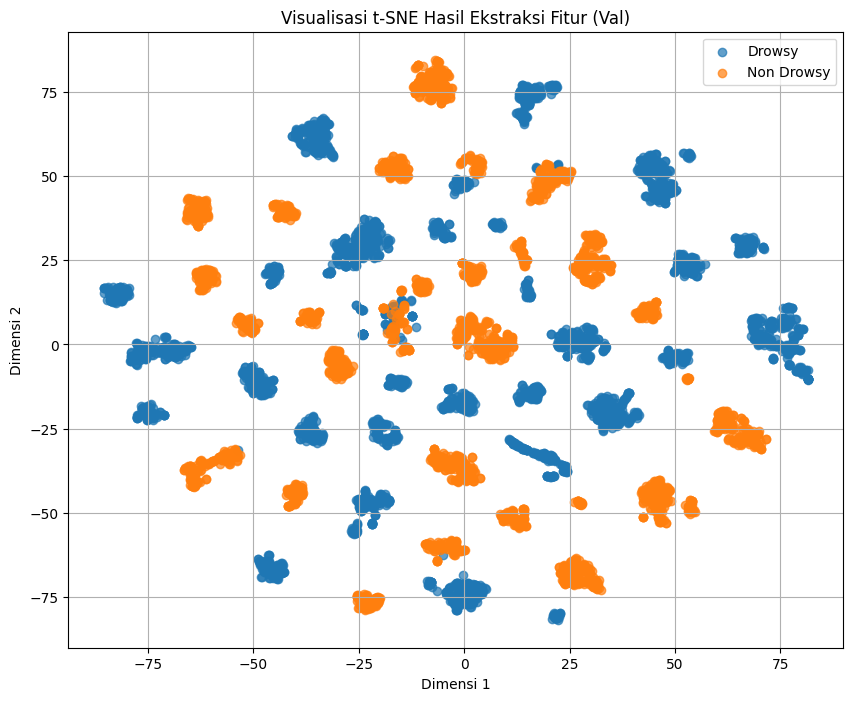

In [6]:
# Visualisasi menggunakan t-SNE
print("Memulai visualisasi t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
fitur_2d = tsne.fit_transform(fitur_test)

# Plot hasil t-SNE
plt.figure(figsize=(10, 8))
for kategori in ["Drowsy", "Non Drowsy"]:
    idx = np.array(label_test) == kategori
    plt.scatter(fitur_2d[idx, 0], fitur_2d[idx, 1], label=kategori, alpha=0.7)

plt.title("Visualisasi t-SNE Hasil Ekstraksi Fitur (Val)")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.legend(loc="best")
plt.grid(True)
plt.show()